In [4]:
library(DBI)
library(RSQLite)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [154]:
load("C:/Users/Guy/Documents/DataScience/Data/movies_ff_v.rdata")

In [155]:
head(movies_ff_v)

,movie_id,budget,original_language,popularity,release_date,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,...,depart_Camera_female,depart_Crew_female,depart_Custom_Mkup_female,depart_Directing_female,depart_Editing_female,depart_Lighting_female,depart_Production_female,depart_Sound_female,depart_Visual_Effects_female,depart_Writing_female
,<int>,<int>,<chr>,<dbl>,<date>,<dbl>,<chr>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,14000000,en,6.58,2015-02-20,93,Short,12314651,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,40000000,en,8.25,2004-08-06,113,Medium,95149435,1,0,...,0,0,0,0,0,0,3,0,0,1
3,3,3300000,en,64.30,2014-10-10,105,Medium,13092000,1,1,...,0,1,0,0,0,0,2,0,0,0
4,4,1200000,hi,3.17,2012-03-09,122,Large,16000000,0,1,...,0,0,0,0,0,0,0,0,0,0
5,5,0,ko,1.15,2009-02-05,118,Medium,3923970,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,8000000,en,0.74,1987-08-06,83,Short,3261638,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
names(movies_ff_v)

[1] "movie_id"                     "budget"                      
 [3] "original_language"            "popularity"                  
 [5] "release_date"                 "runtime"                     
 [7] "runtime_cat"                  "revenue"                     
 [9] "sw_lang_en"                   "sw_web_presence"             
[11] "sw_has_poster"                "sw_tagline"                  
[13] "keyword_cnt"                  "release_year"                
[15] "release_month"                "high_release_month"          
[17] "release_day"                  "seasonality"                 
[19] "sw_collection"                "producers_cnt"               
[21] "countries_cnt"                "lang_US"                     
[23] "lang_FR"                      "lang_RU"                     
[25] "lang_ES"                      "lang_JA"                     
[27] "keywords_cnt"                 "actor0_movies_cnt"           
[29] "actor0_movies_5y_cnt"         "actor1_movies_cnt"           
[31] "actor1_movies_5y_cnt"         "actor2_movies_cnt"           
[33] "actor2_movies_5y_cnt"         "sw_female_actor0"            
[35] "sw_female_actor1"             "sw_female_actor2"            
[37] "sw_male_actor0"               "sw_male_actor1"              
[39] "sw_male_actor2"               "actor0_prev_revenue"         
[41] "actor1_prev_revenue"          "actor2_prev_revenue"         
[43] "director_movies_cnt"          "director_movies_5y_cnt"      
[45] "genre_adventure"              "genre_fantasy"               
[47] "genre_animation"              "genre_drama"                 
[49] "genre_horror"                 "genre_action"                
[51] "genre_comedy"                 "genre_history"               
[53] "genre_western"                "genre_thriller"              
[55] "genre_crime"                  "genre_documentary"           
[57] "genre_science_fiction"        "genre_mystery"               
[59] "genre_music"                  "genre_romance"               
[61] "genre_family"                 "genre_war"                   
[63] "genre_foreign"                "depart_Art"                  
[65] "depart_Camera"                "depart_Crew"                 
[67] "depart_Custom_Mkup"           "depart_Directing"            
[69] "depart_Editing"               "depart_Lighting"             
[71] "depart_Production"            "depart_Sound"                
[73] "depart_Visual_Effects"        "depart_Writing"              
[75] "depart_Art_female"            "depart_Camera_female"        
[77] "depart_Crew_female"           "depart_Custom_Mkup_female"   
[79] "depart_Directing_female"      "depart_Editing_female"       
[81] "depart_Lighting_female"       "depart_Production_female"    
[83] "depart_Sound_female"          "depart_Visual_Effects_female"
[85] "depart_Writing_female"

In [7]:
grep("sw_tagline",colnames(movies_ff_v))

[1] 12

In [126]:
#question 2.1
summary(movies_ff_v)

    movie_id        budget          original_language    popularity     
 Min.   :   1   Min.   :        0   Length:7375        Min.   :  0.000  
 1st Qu.:1848   1st Qu.:        0   Class :character   1st Qu.:  3.970  
 Median :3696   Median :  8000000   Mode  :character   Median :  7.456  
 Mean   :3698   Mean   : 22666657                      Mean   :  8.540  
 3rd Qu.:5550   3rd Qu.: 29000000                      3rd Qu.: 10.932  
 Max.   :7398   Max.   :380000000                      Max.   :547.488  
                                                                        
  release_date           runtime      runtime_cat           revenue         
 Min.   :1918-08-01   Min.   :  0.0   Length:7375        Min.   :1.000e+00  
 1st Qu.:1992-11-13   1st Qu.: 94.0   Class :character   1st Qu.:2.405e+06  
 Median :2004-07-29   Median :104.0   Mode  :character   Median :1.693e+07  
 Mean   :2000-03-15   Mean   :107.7                      Mean   :6.688e+07  
 3rd Qu.:2011-06-27   3rd Qu.:1

In [127]:
#install.packages("pastecs")
library(pastecs)
options(scipen=100)
options(digits=2)
stat.desc(movies_ff_v[,2:85], basic=TRUE, desc=TRUE, norm=FALSE, p=0.95)

Warning message:
"package 'pastecs' was built under R version 3.6.2"

Attaching package: 'pastecs'


The following objects are masked from 'package:dplyr':

    first, last




,budget,original_language,popularity,release_date,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,sw_has_poster,...,depart_Camera_female,depart_Crew_female,depart_Custom_Mkup_female,depart_Directing_female,depart_Editing_female,depart_Lighting_female,depart_Production_female,depart_Sound_female,depart_Visual_Effects_female,depart_Writing_female
,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,7375.0,NA,7375.000000,7374.00,7370.00,NA,2993.0,7375.0000,7375.0000,7375.00000,...,7341.0000,7341.0000,7341.0000,7341.0000,7341.0000,7341.00000,7341.000,7341.0000,7341.0000,7341.0000
nbr.null,2012.0,NA,0.000000,1.00,19.00,NA,0.0,1039.0000,5012.0000,2.00000,...,7194.0000,6971.0000,5293.0000,6297.0000,6516.0000,7336.00000,3872.000,6840.0000,7281.0000,6578.0000
nbr.na,0.0,NA,0.000000,1.00,5.00,NA,4382.0,0.0000,0.0000,0.00000,...,34.0000,34.0000,34.0000,34.0000,34.0000,34.00000,34.000,34.0000,34.0000,34.0000
min,0.0,NA,0.000001,-18781.00,0.00,NA,1.0,0.0000,0.0000,0.00000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.000,0.0000,0.0000,0.0000
max,380000000.0,NA,547.488298,17389.00,338.00,NA,1519557910.0,1.0000,1.0000,1.00000,...,3.0000,10.0000,6.0000,4.0000,5.0000,1.00000,12.000,6.0000,2.0000,5.0000
range,380000000.0,NA,547.488297,36170.00,338.00,NA,1519557909.0,1.0000,1.0000,1.00000,...,3.0000,10.0000,6.0000,4.0000,5.0000,1.00000,12.000,6.0000,2.0000,5.0000
sum,167166594664.0,NA,62980.853408,81343960.00,794097.00,NA,200169779760.0,6336.0000,2363.0000,7373.00000,...,150.0000,473.0000,2595.0000,1127.0000,893.0000,5.00000,6898.000,581.0000,62.0000,912.0000
median,8000000.0,NA,7.455875,12628.00,104.00,NA,16928137.0,1.0000,0.0000,1.00000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.000,0.0000,0.0000,0.0000
mean,22666656.9,NA,8.539777,11031.19,107.75,NA,66879311.6,0.8591,0.3204,0.99973,...,0.0204,0.0644,0.3535,0.1535,0.1216,0.00068,0.940,0.0791,0.0084,0.1242


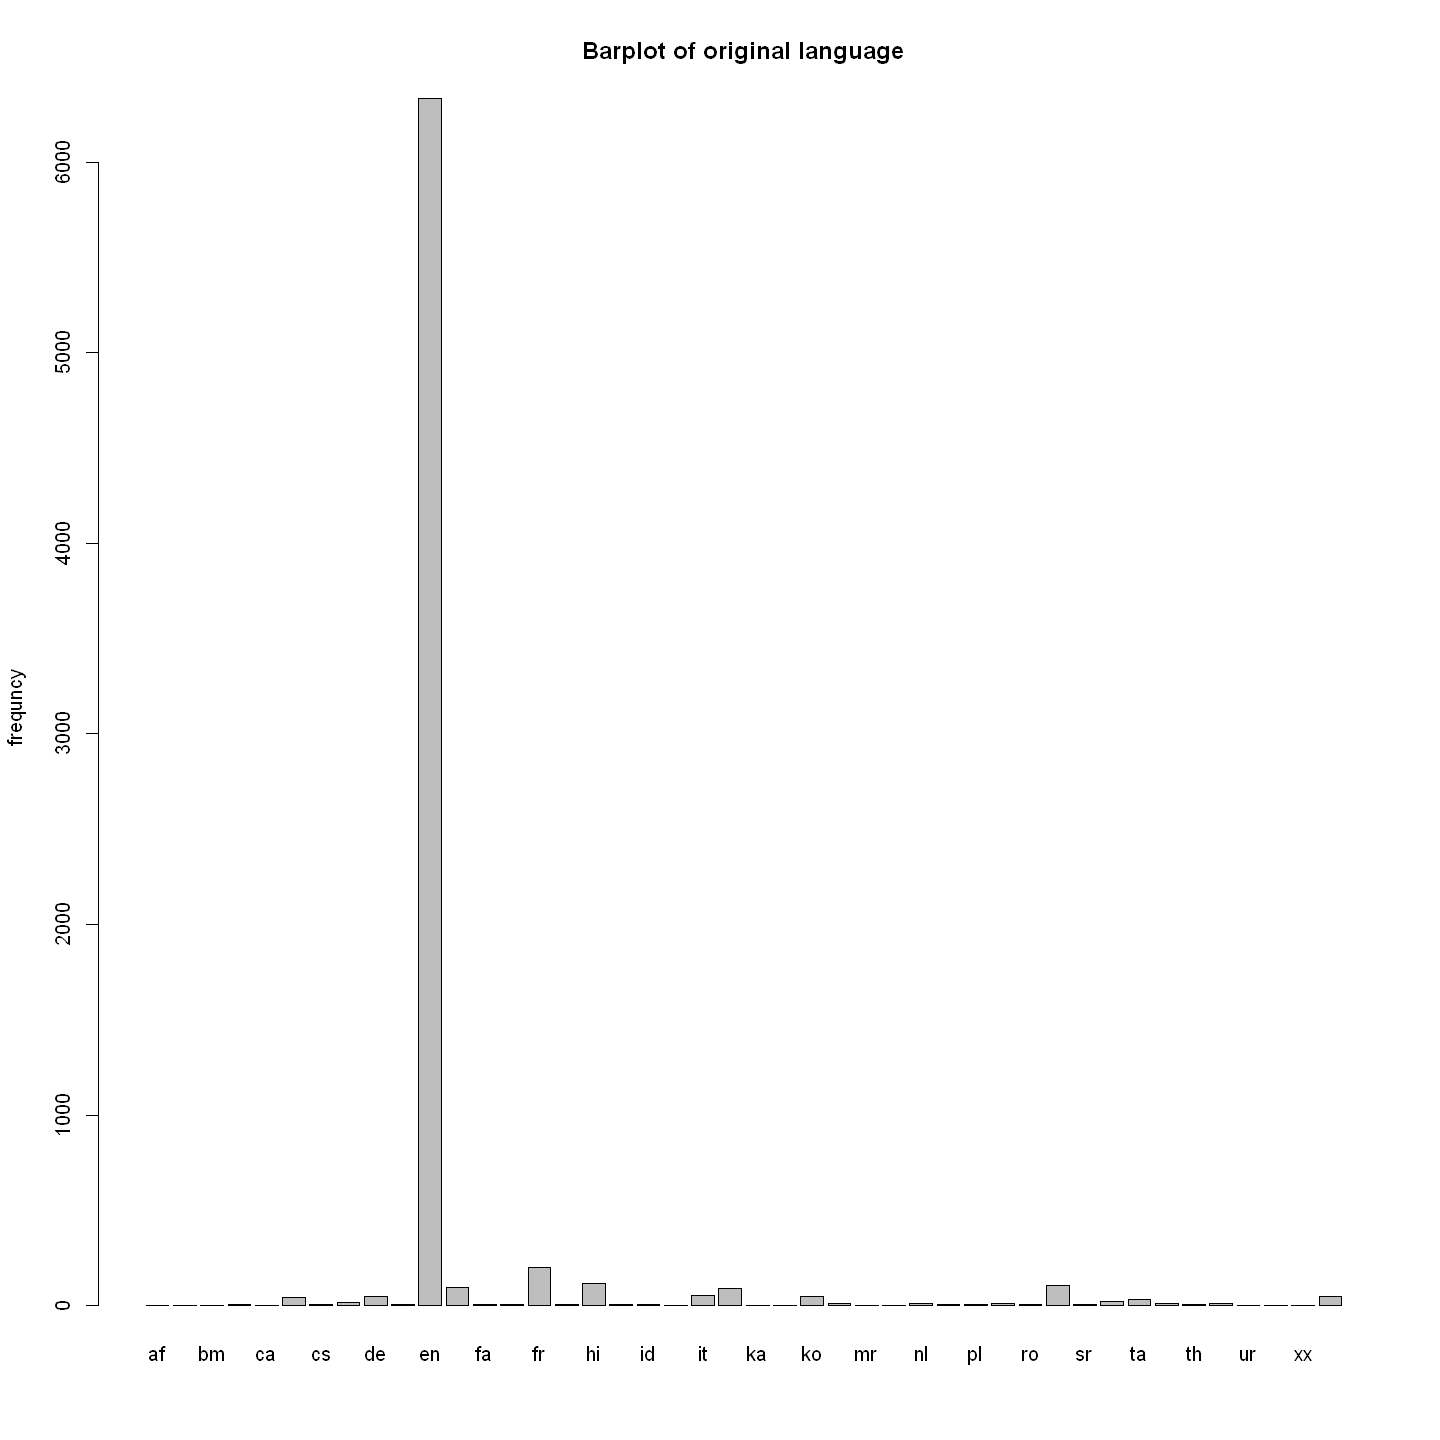

In [17]:
options(repr.plot.width = 12, repr.plot.height = 12)
barplot(table(movies_ff_v$original_language),ylab='frequncy',main='Barplot of original language')

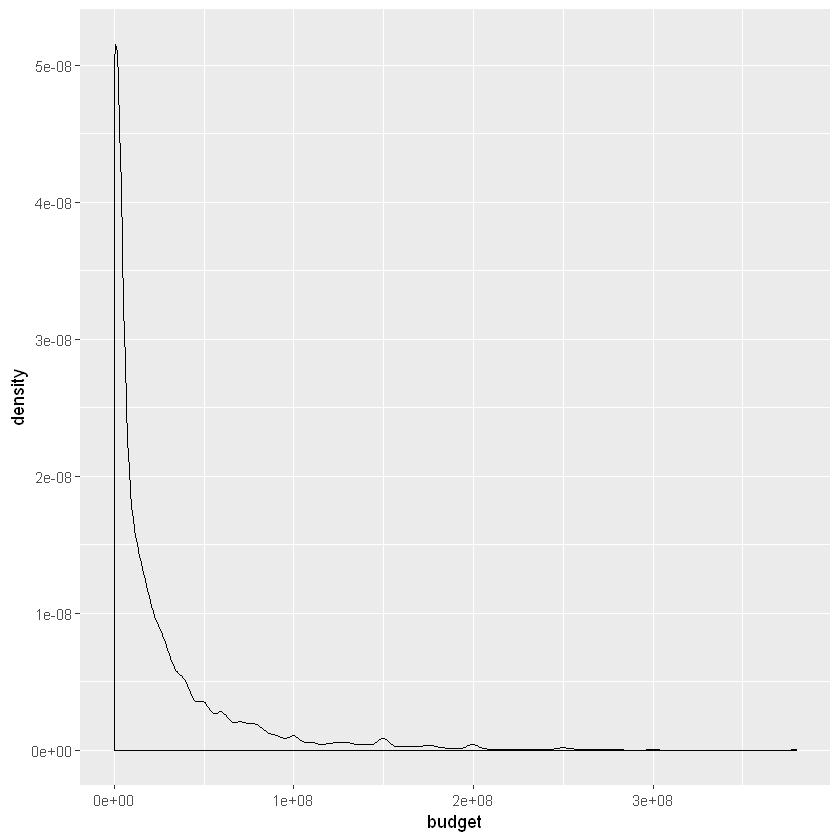

In [8]:
ggplot(data=movies_ff_v) +
    geom_density(aes(budget))

In [47]:
ggplot(data=movies_ff_v) +
    geom_density(aes(popularity))
ggplot(data=movies_ff_v) +
    geom_density(aes(runtime))
barplot(table(movies_ff_v$keyword_cnt),ylab='frequncy',main='keyword_cnt')
hist(movies_ff_v$seasonality)j

ERROR: Error in parse(text = x, srcfile = src): <text>:6:30: unexpected symbol
5: barplot(table(movies_ff_v$keyword_cnt),ylab='frequncy',main='keyword_cnt')
6: hist(movies_ff_v$seasonality)j
                                ^


In [29]:
for (v in names(movies_ff_v[9:12])) { barplot(table(movies_ff_v[v]),ylab='frequncy',main=v)}

ERROR: Error in parse(text = x, srcfile = src): <text>:3:64: unexpected symbol
2: for (v in vn[c(9:12,14:17,22:26,34:39,45:63)]) {
3:                barplot(table(movies_ff_v[v],ylab='frequncy'))} h
                                                                  ^


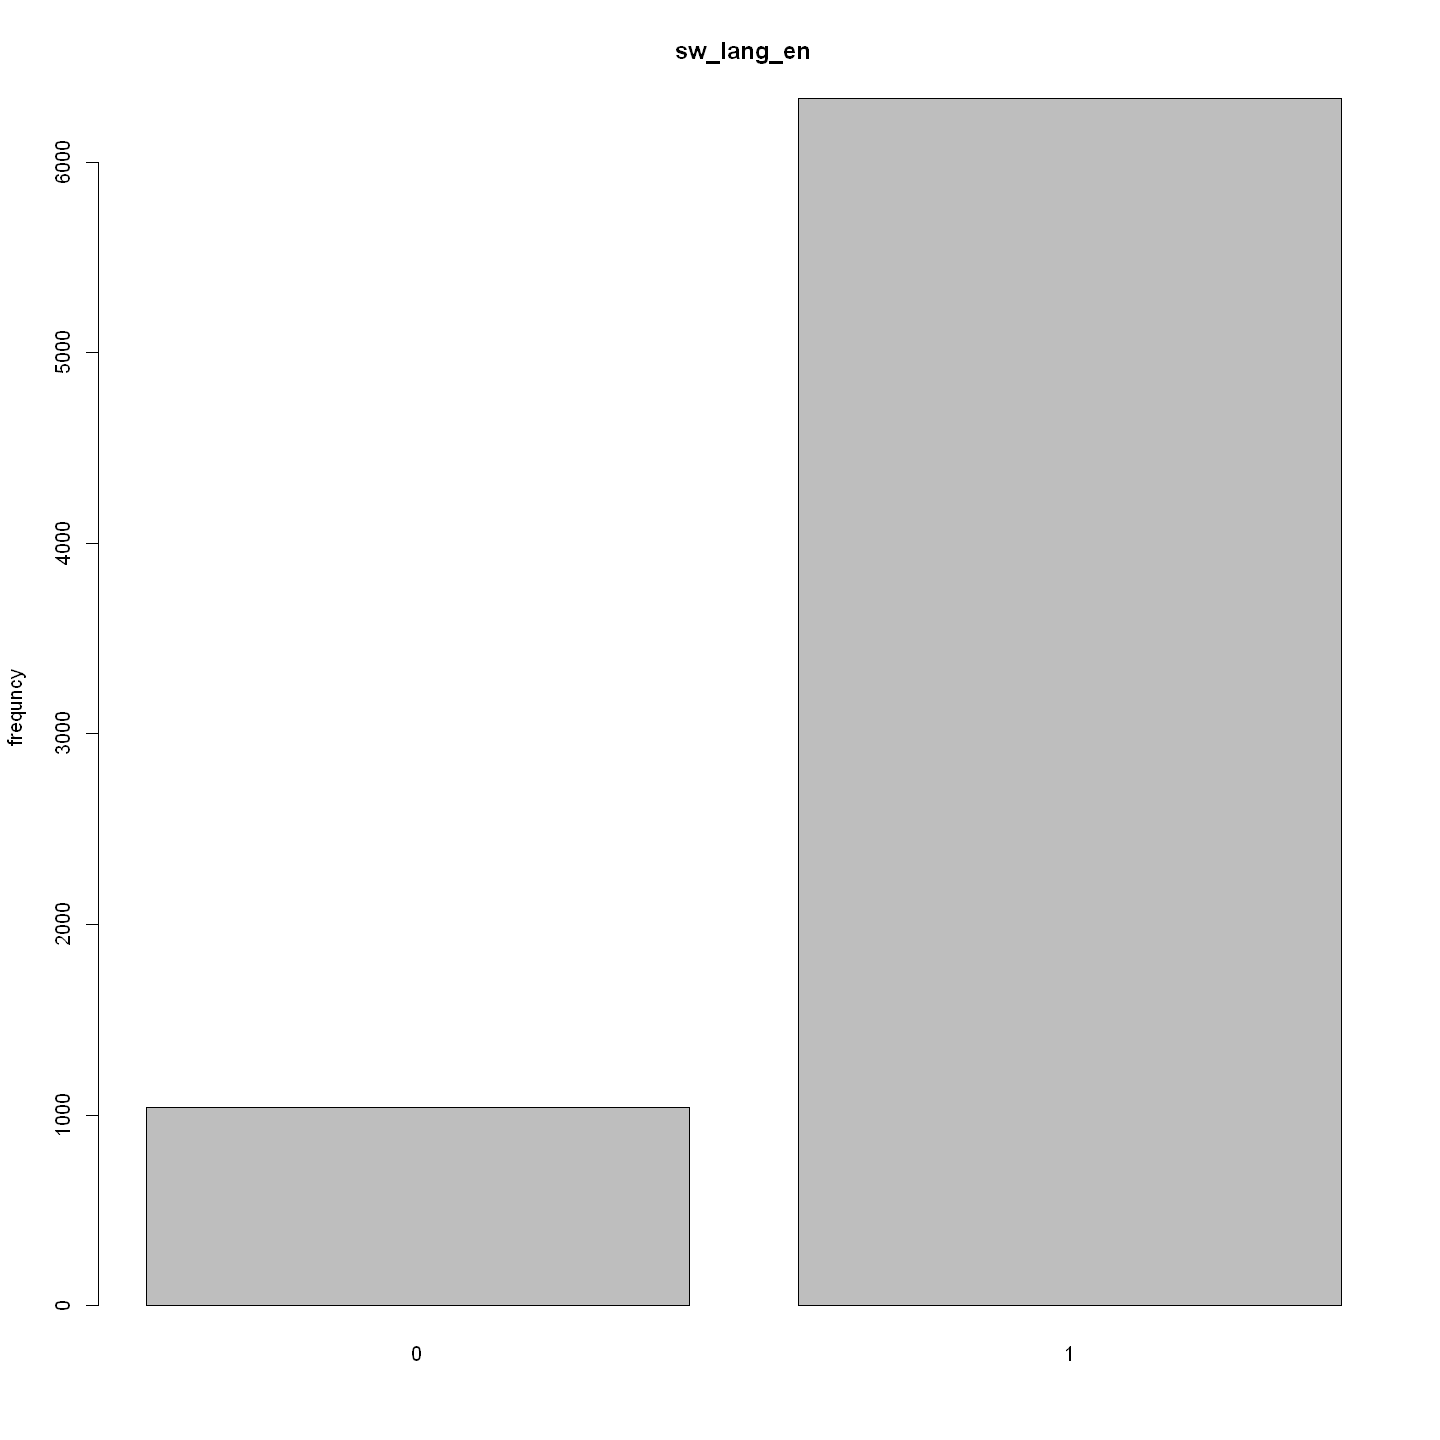

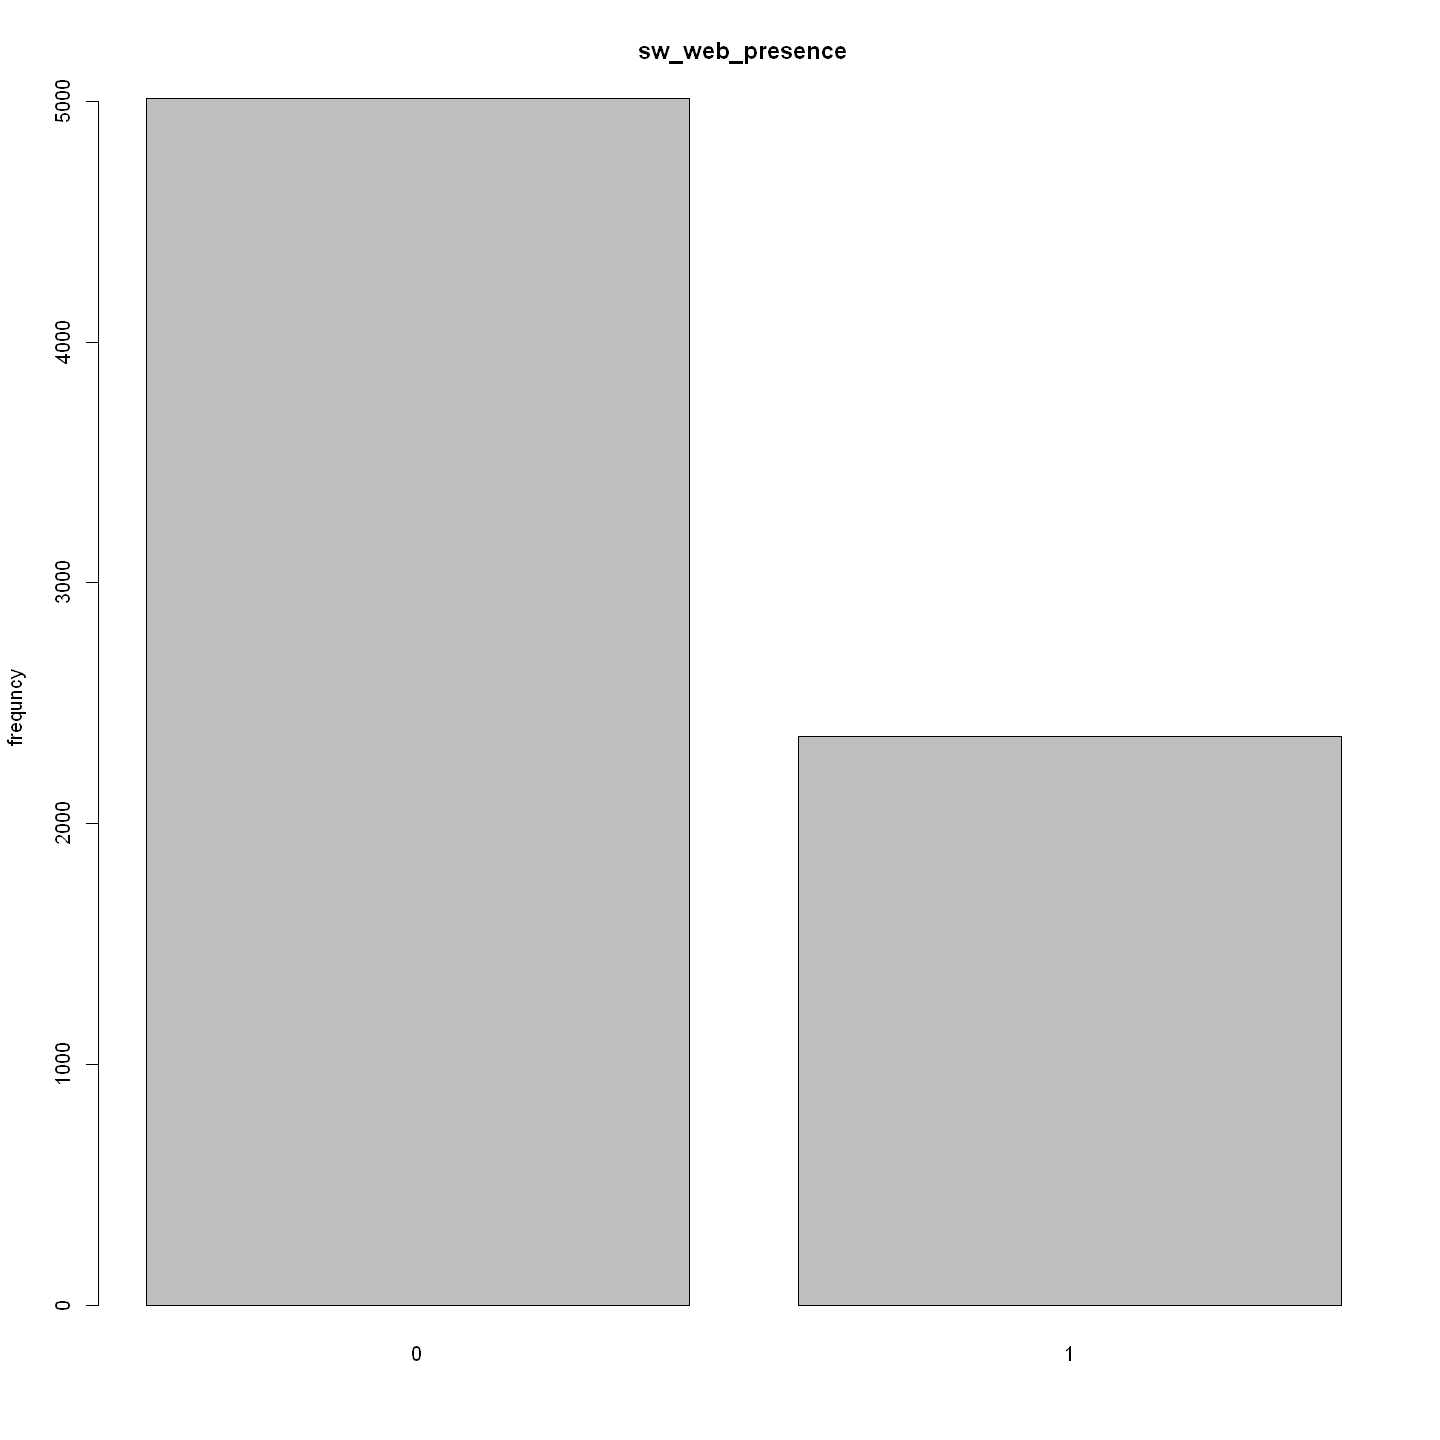

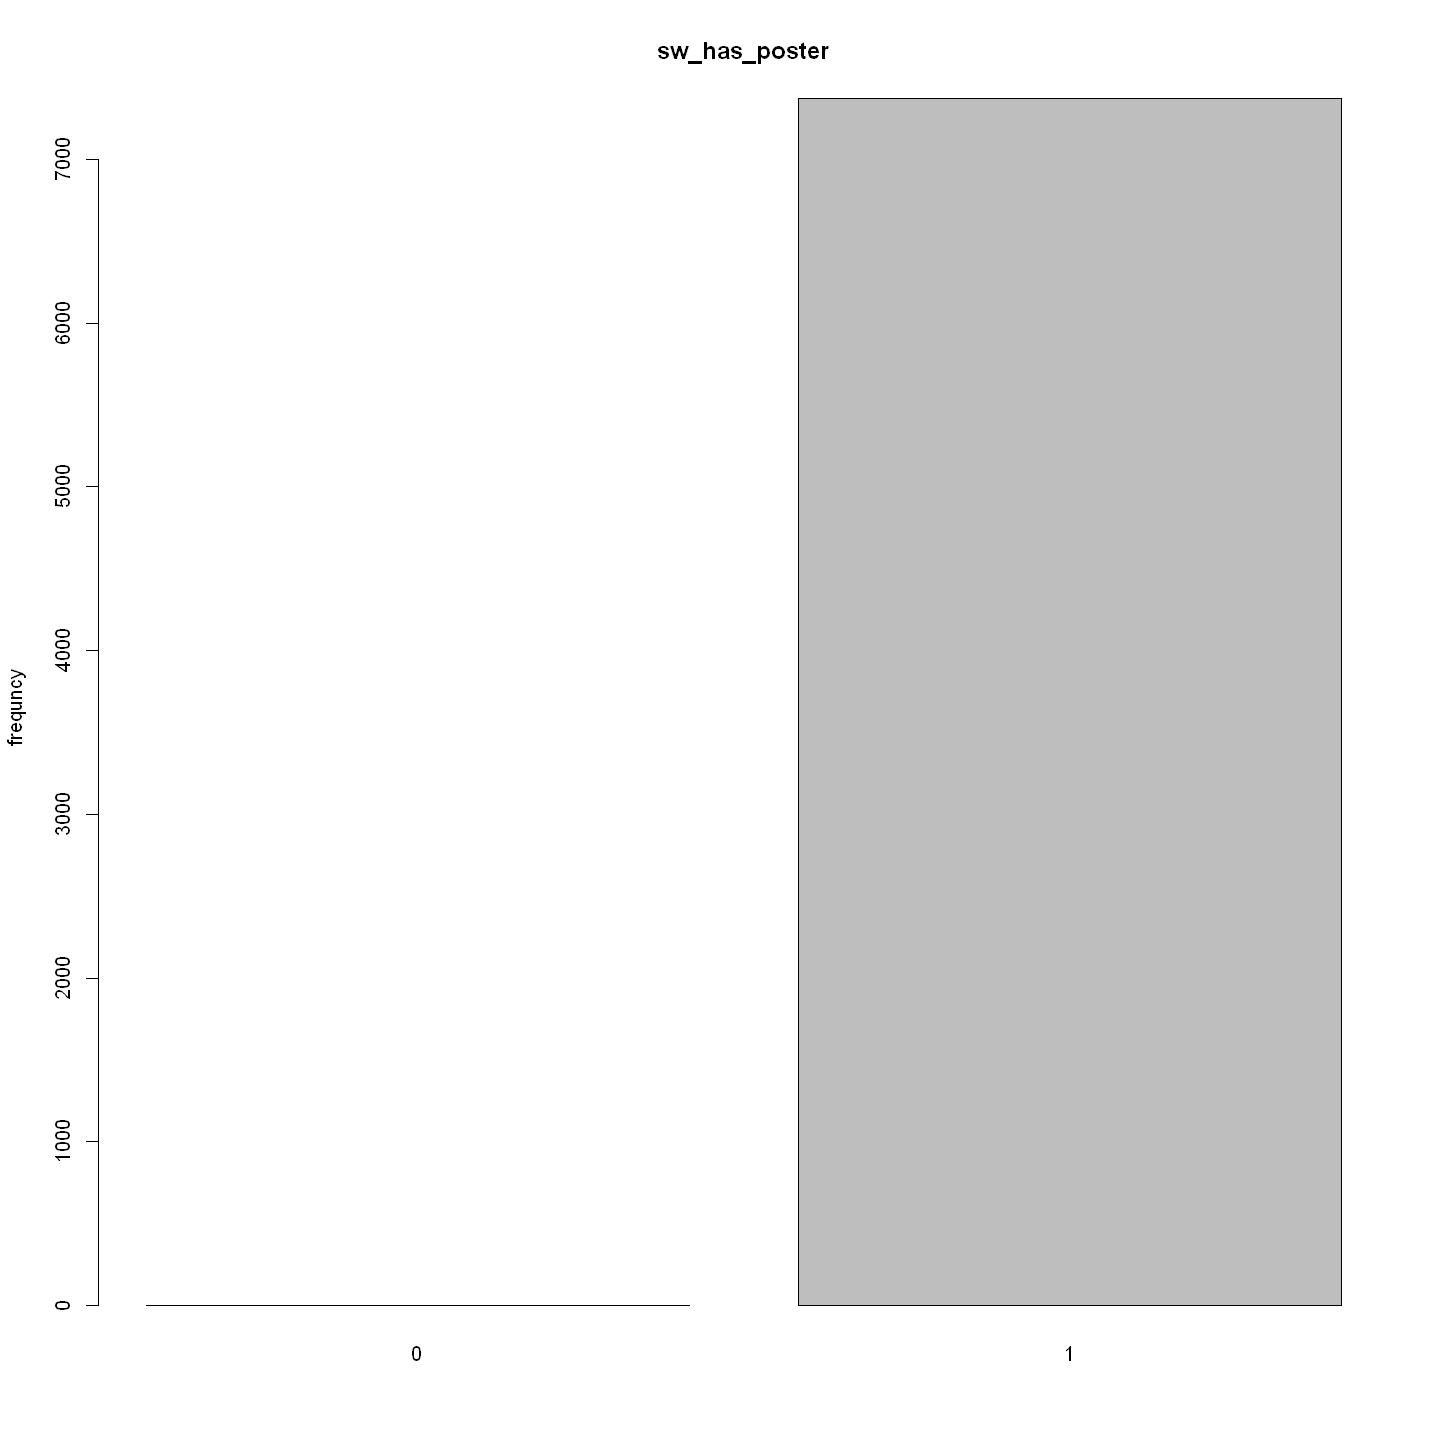

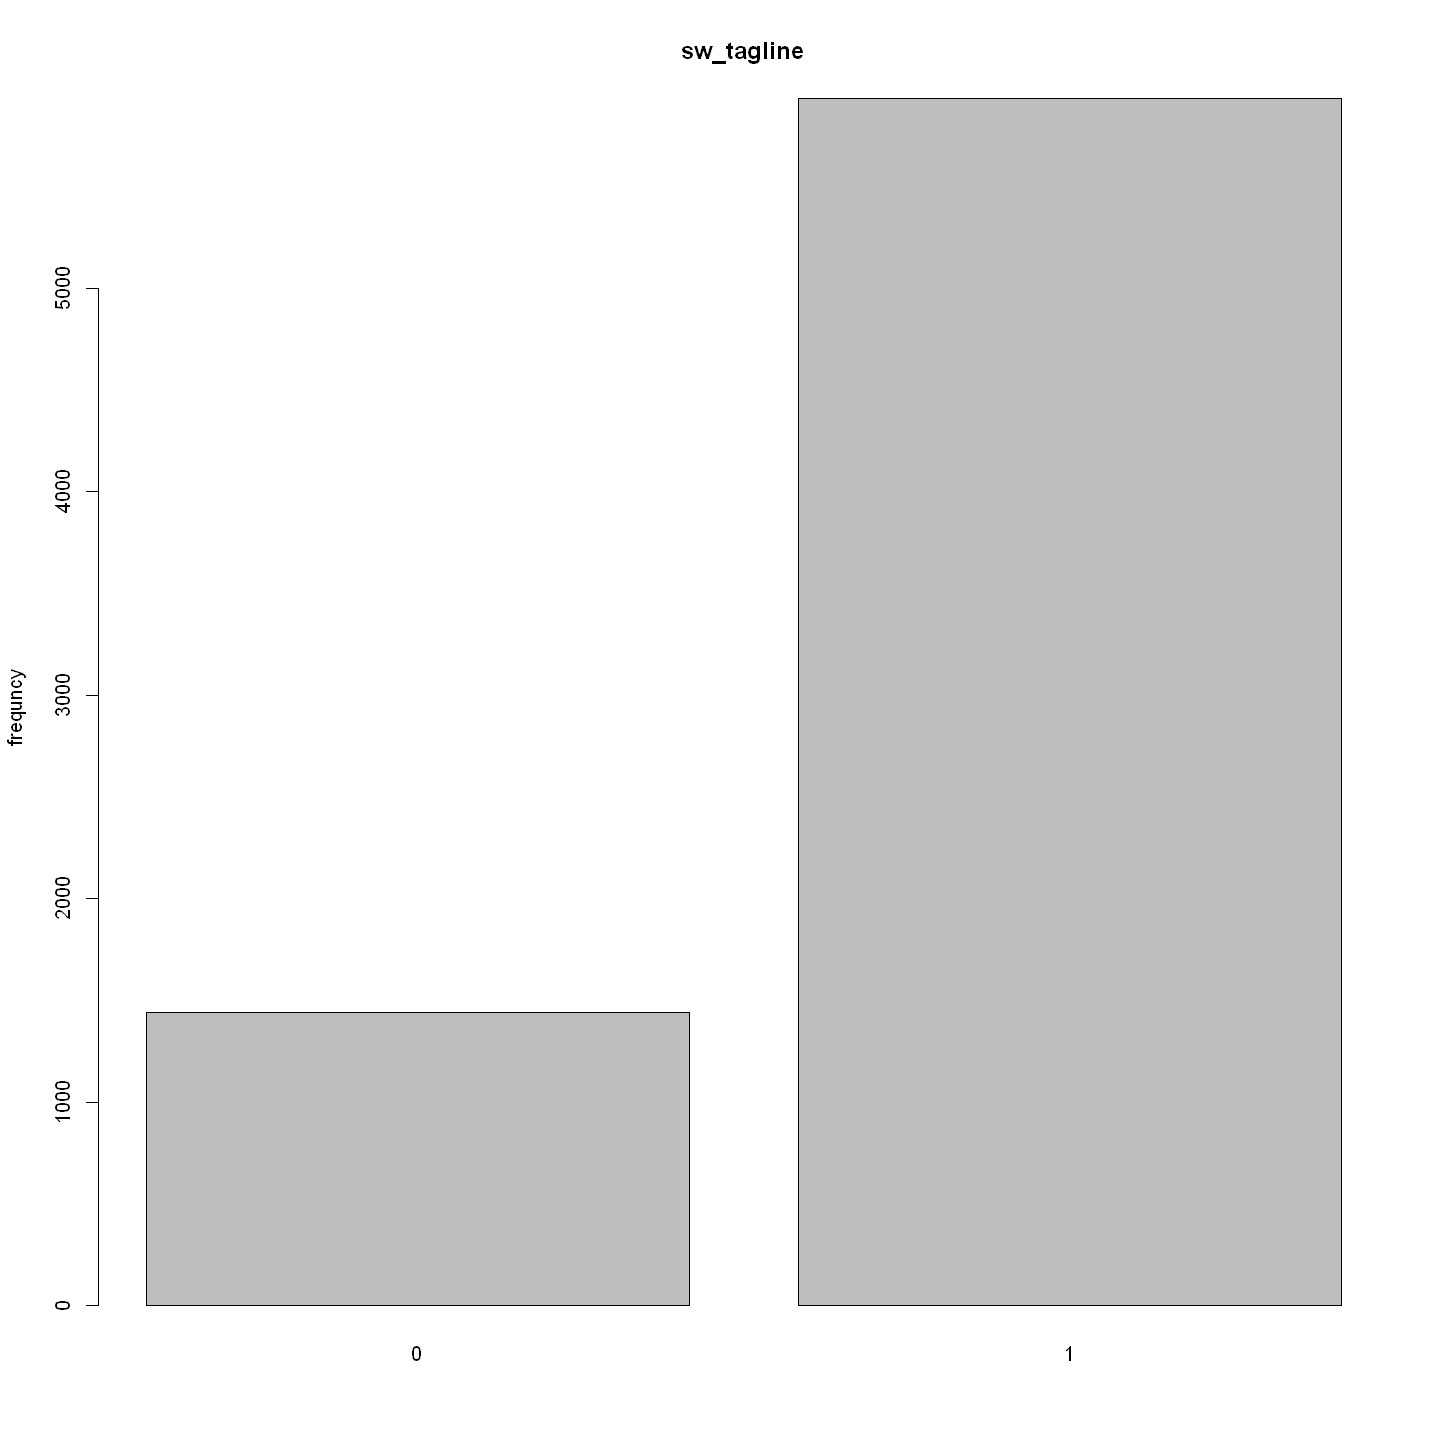

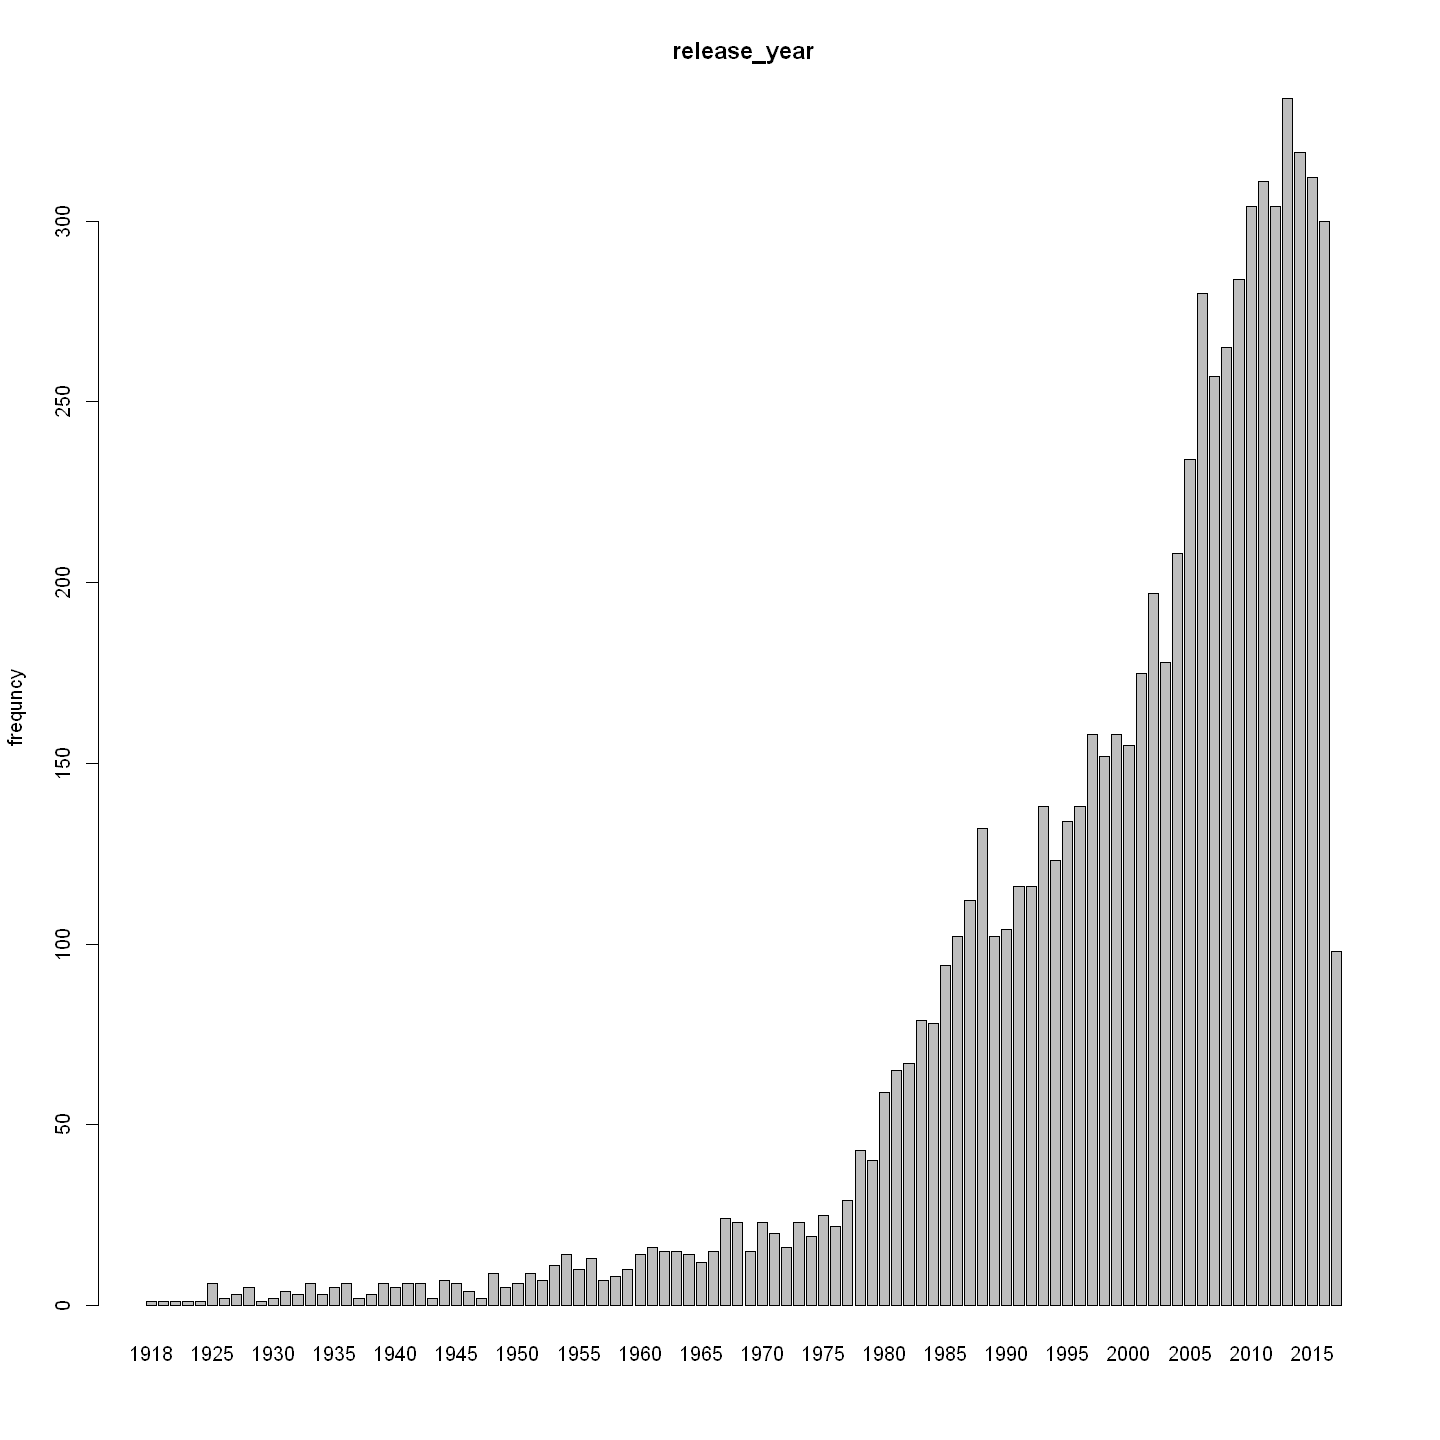

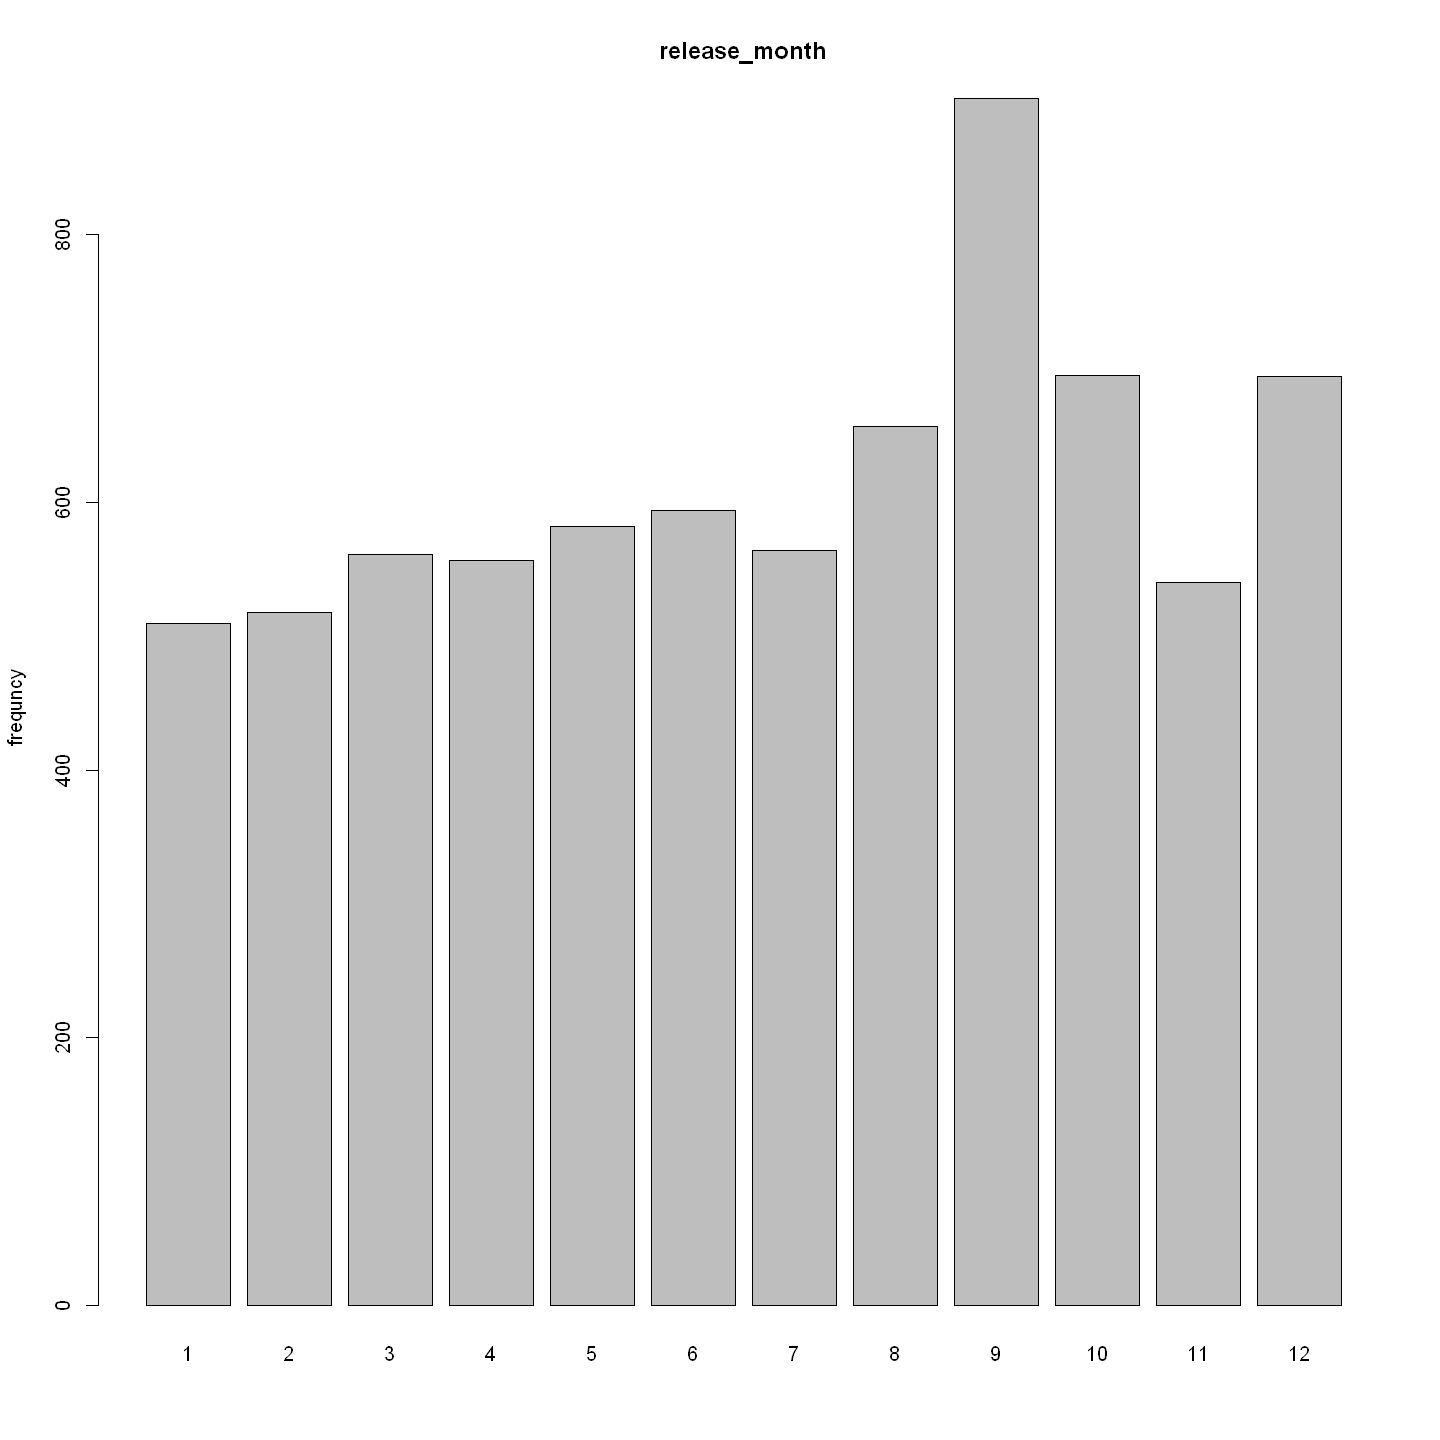

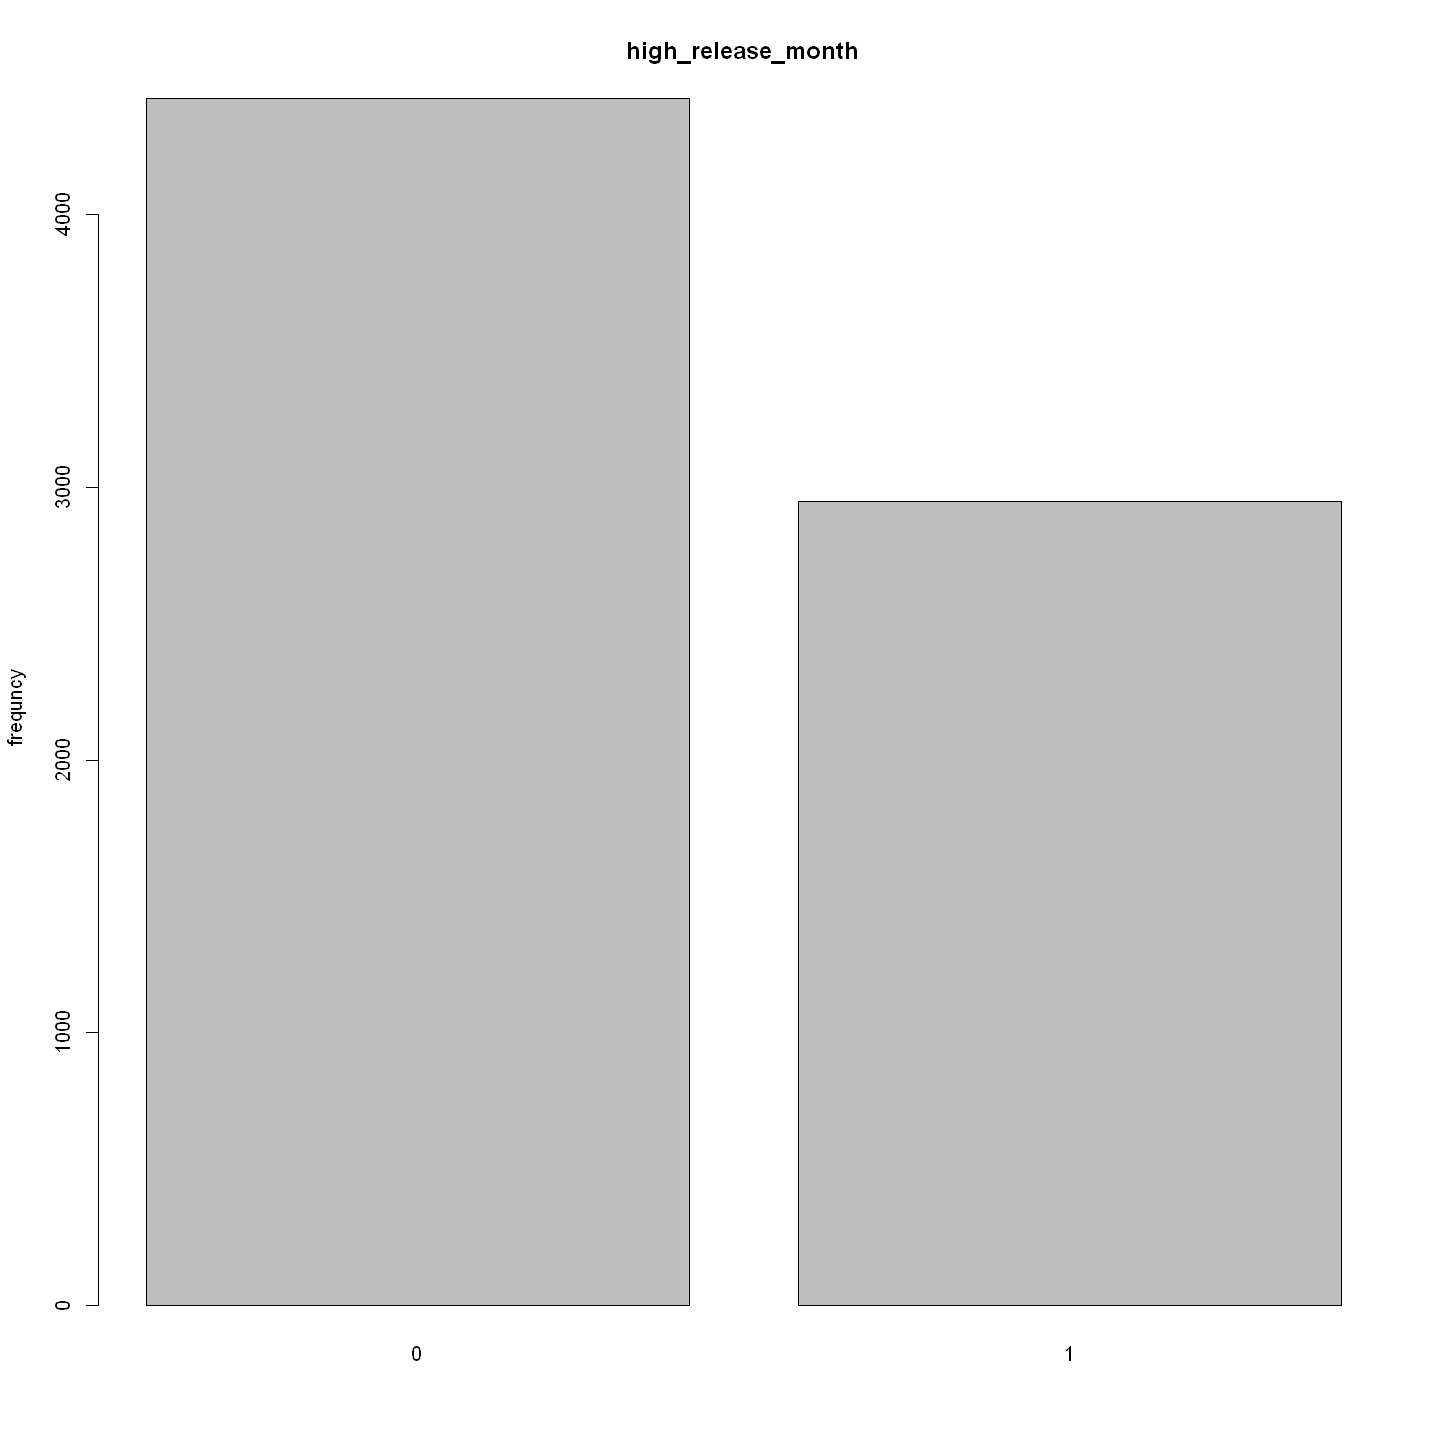

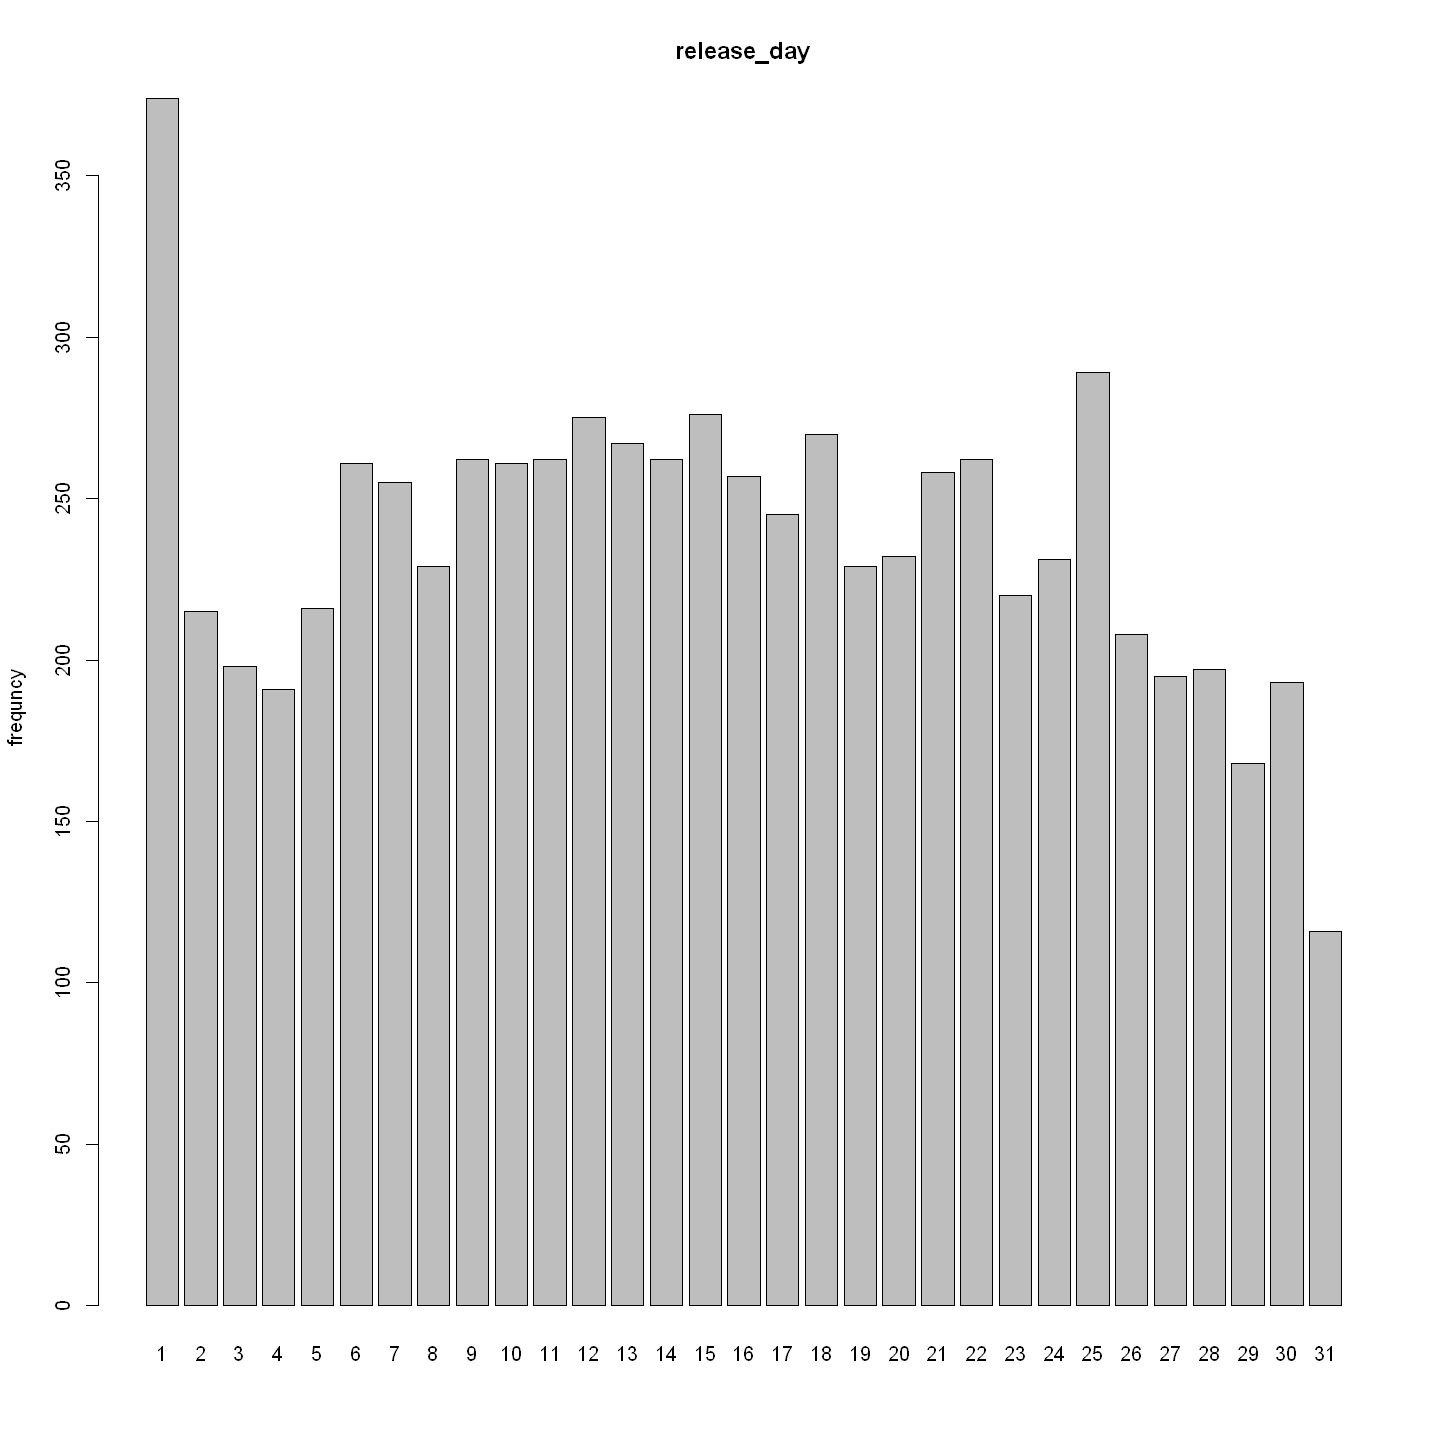

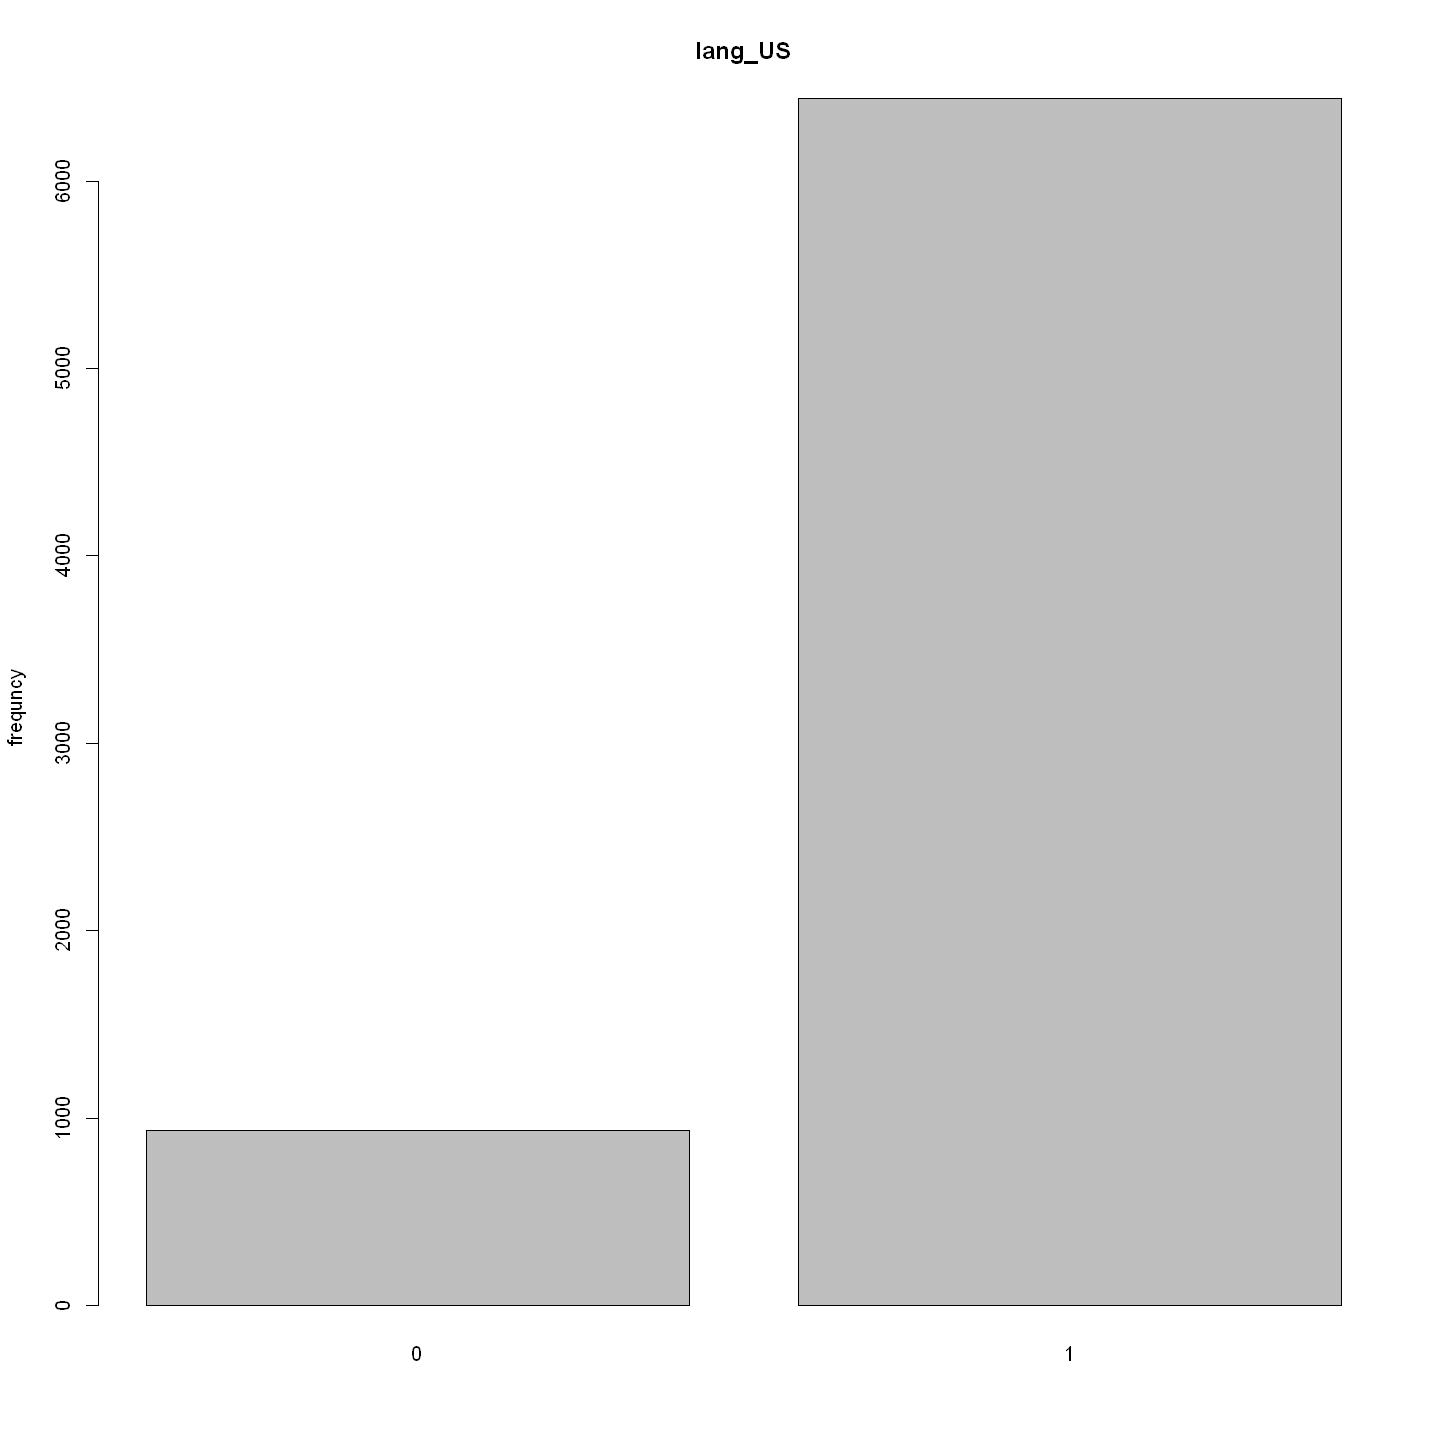

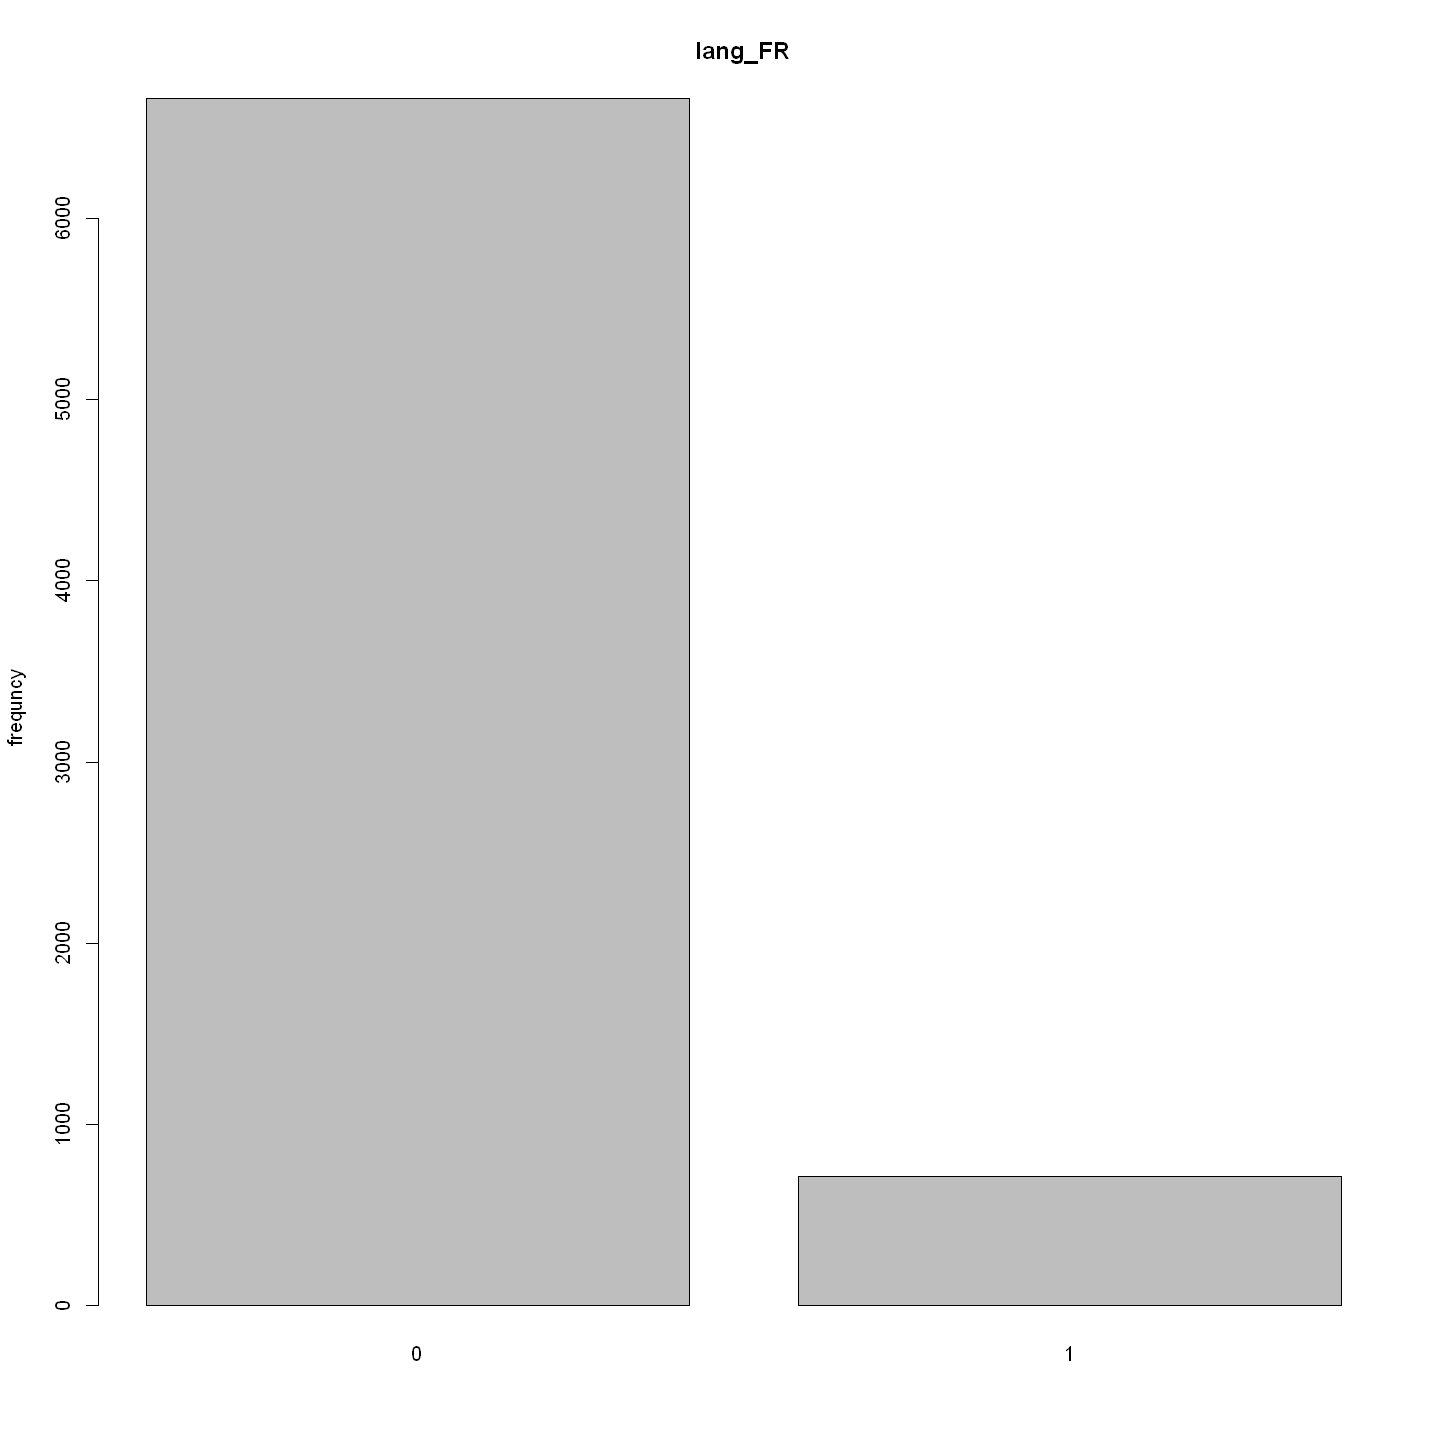

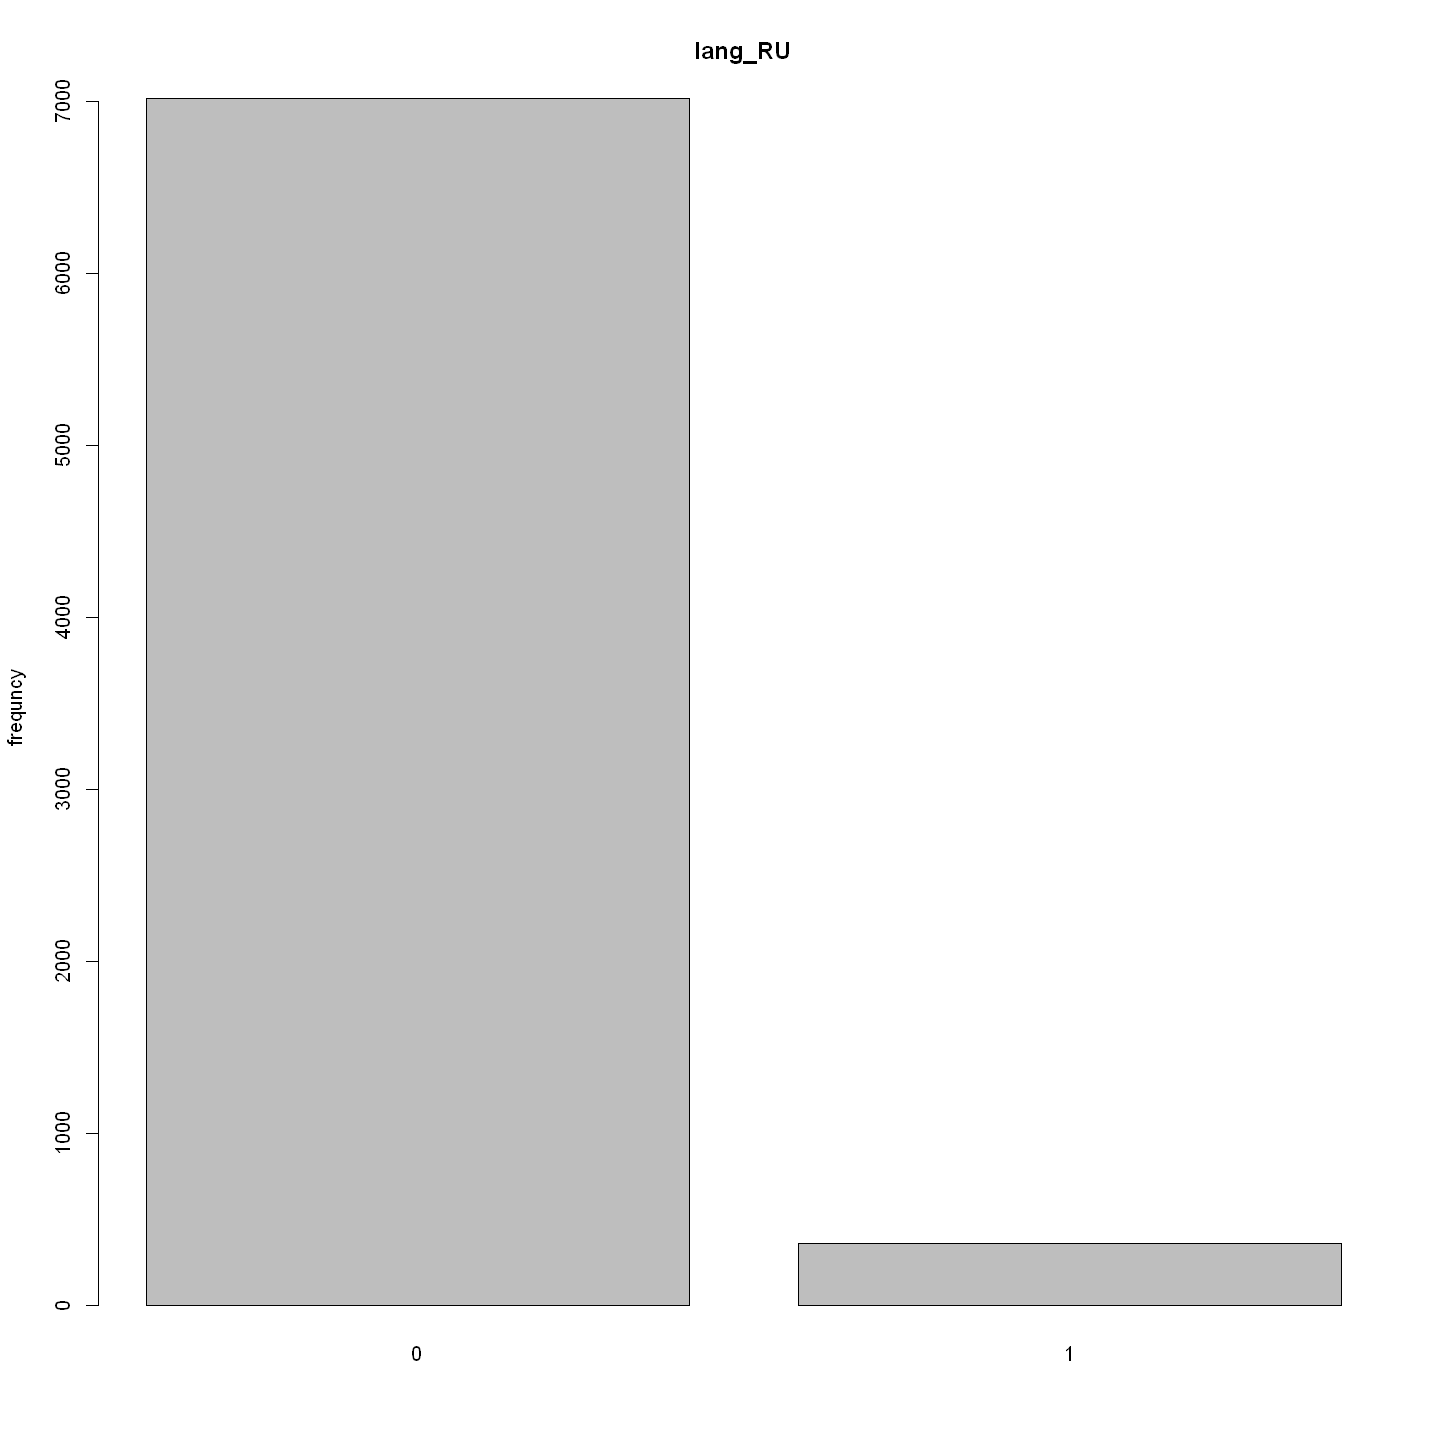

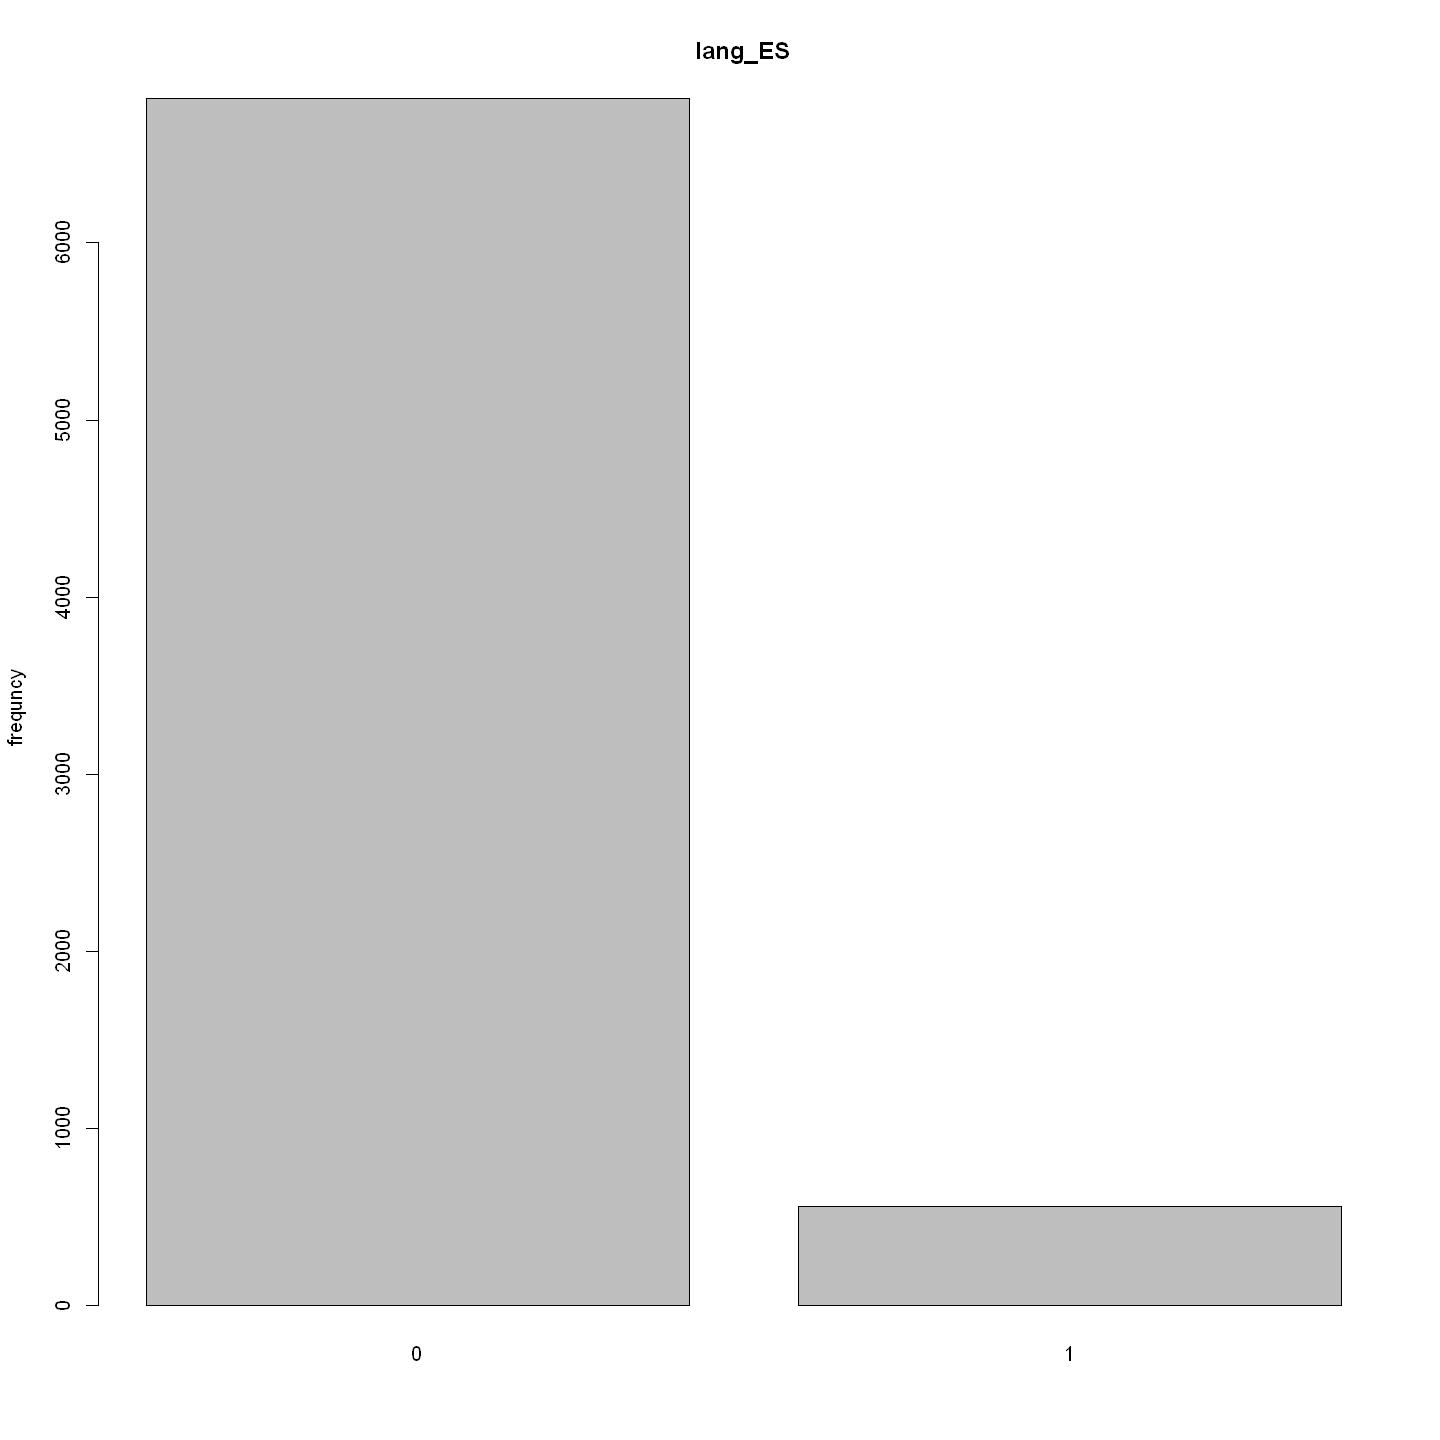

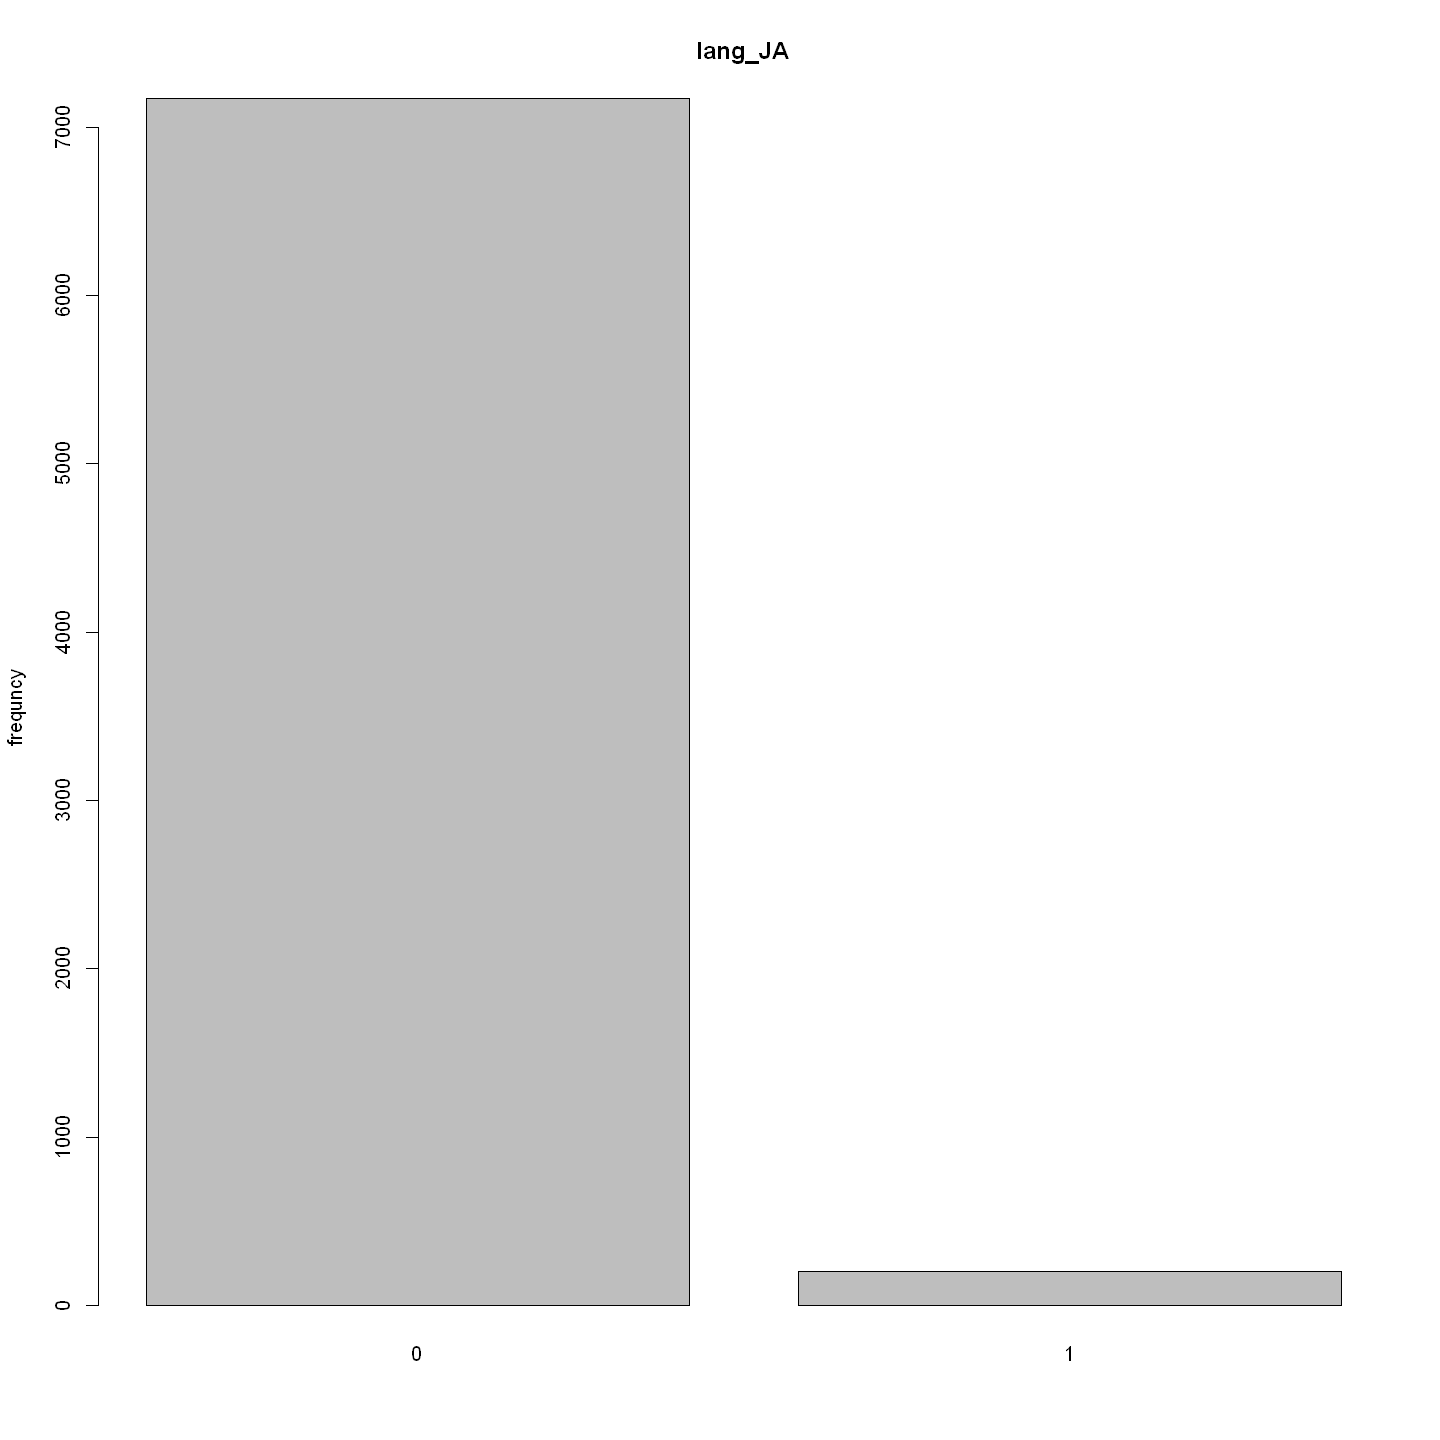

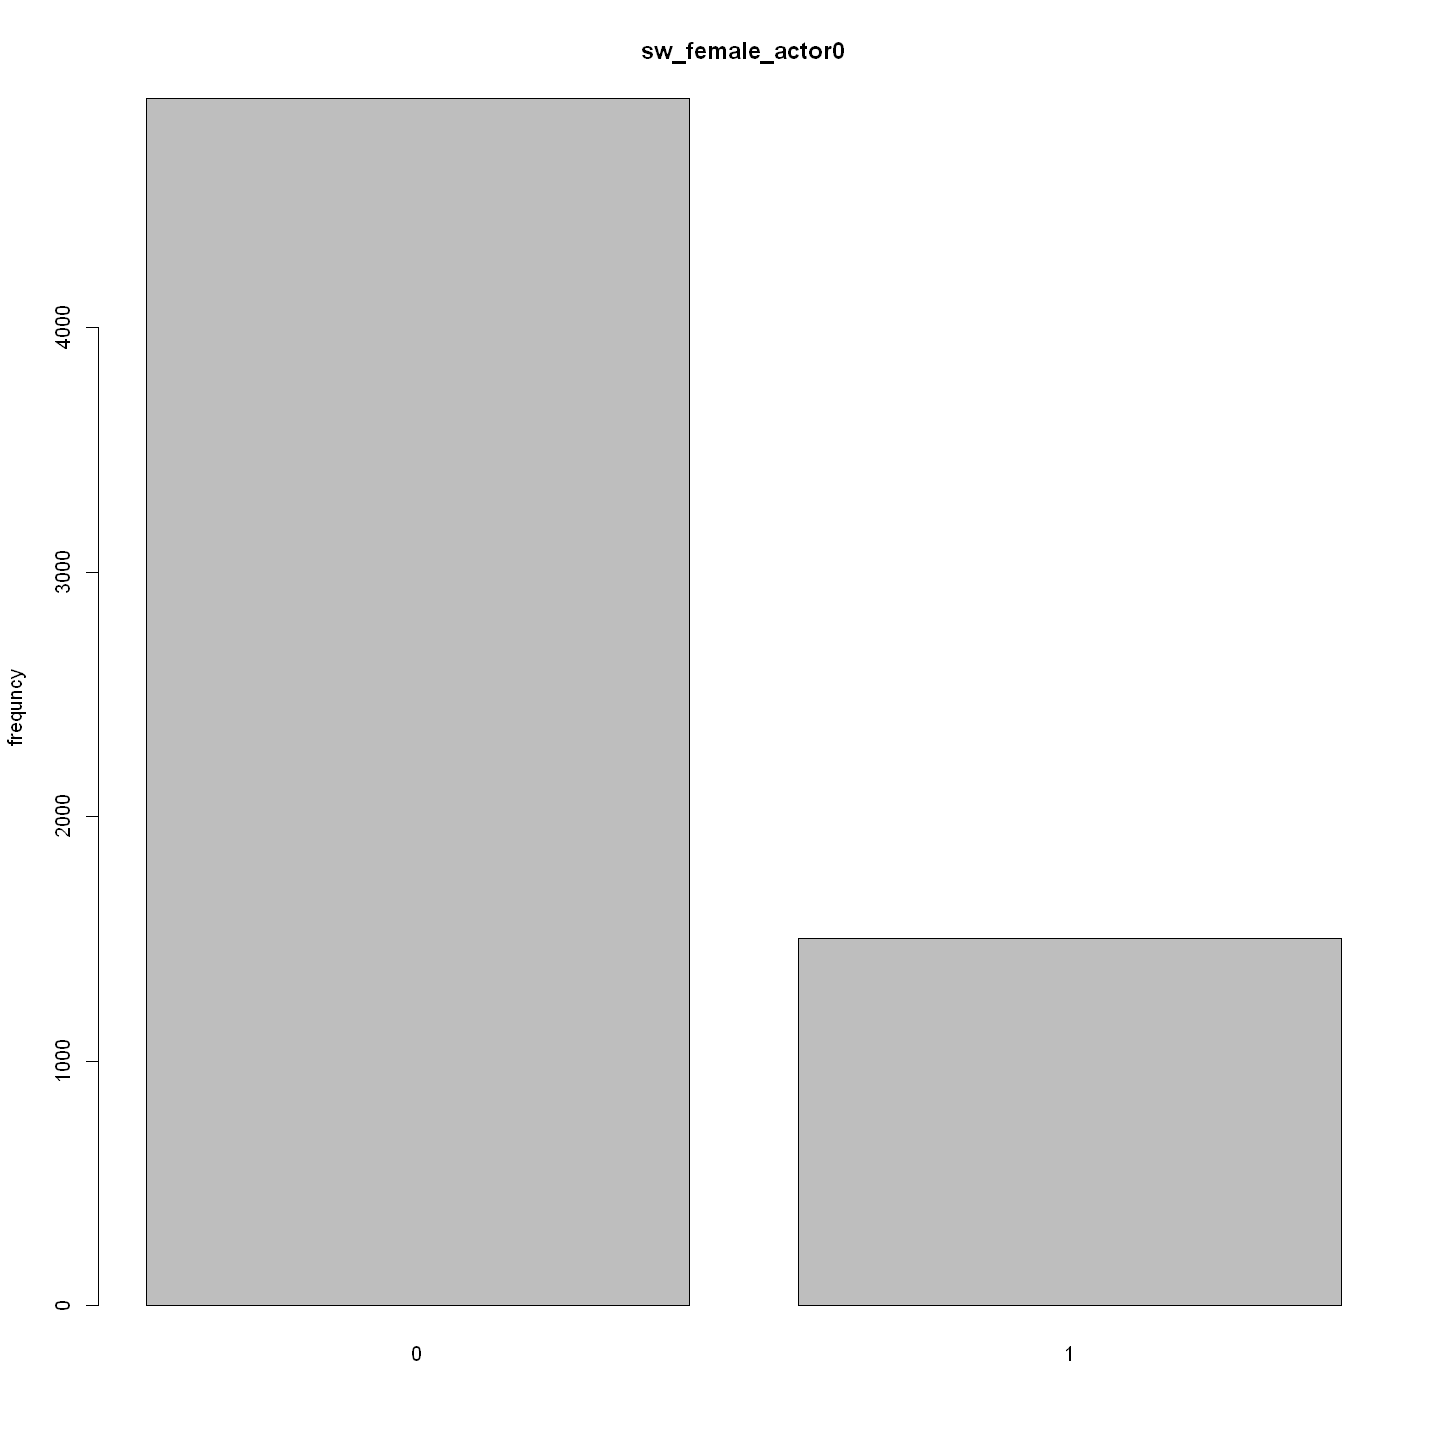

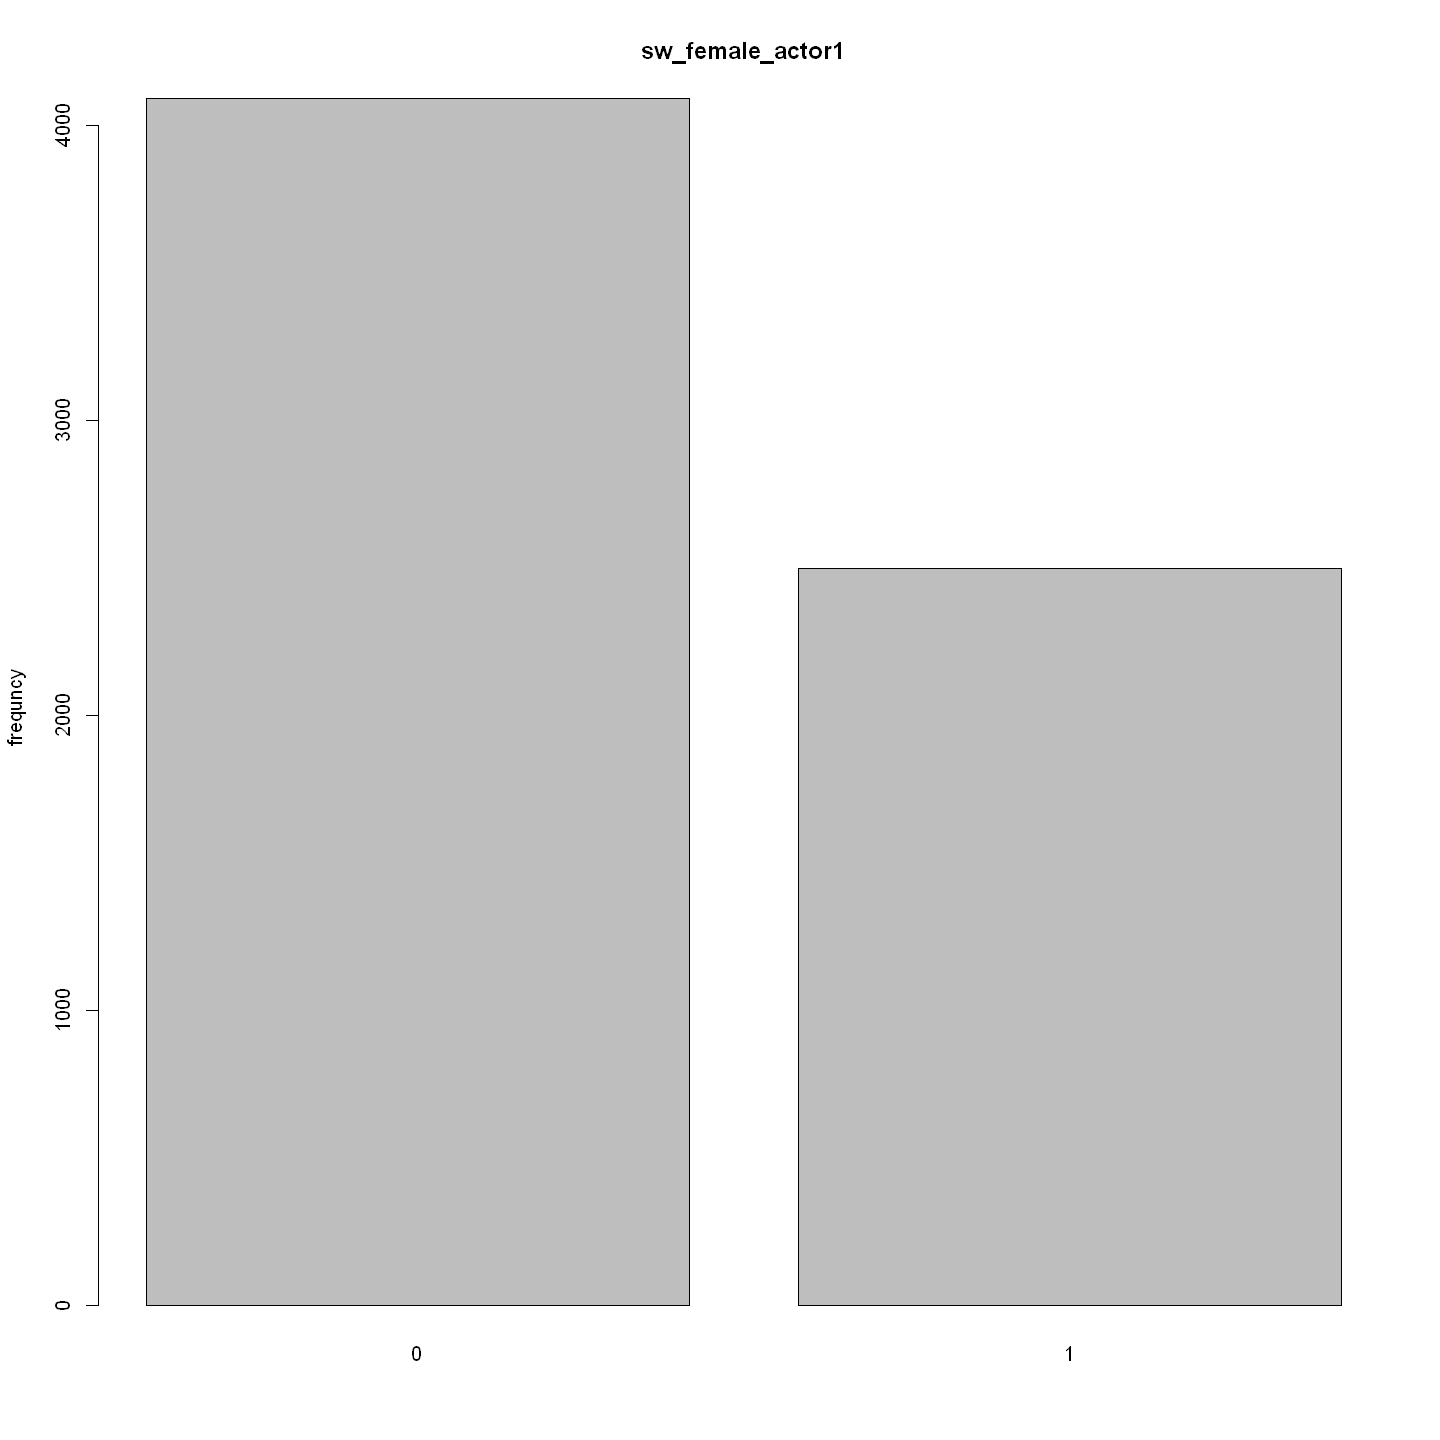

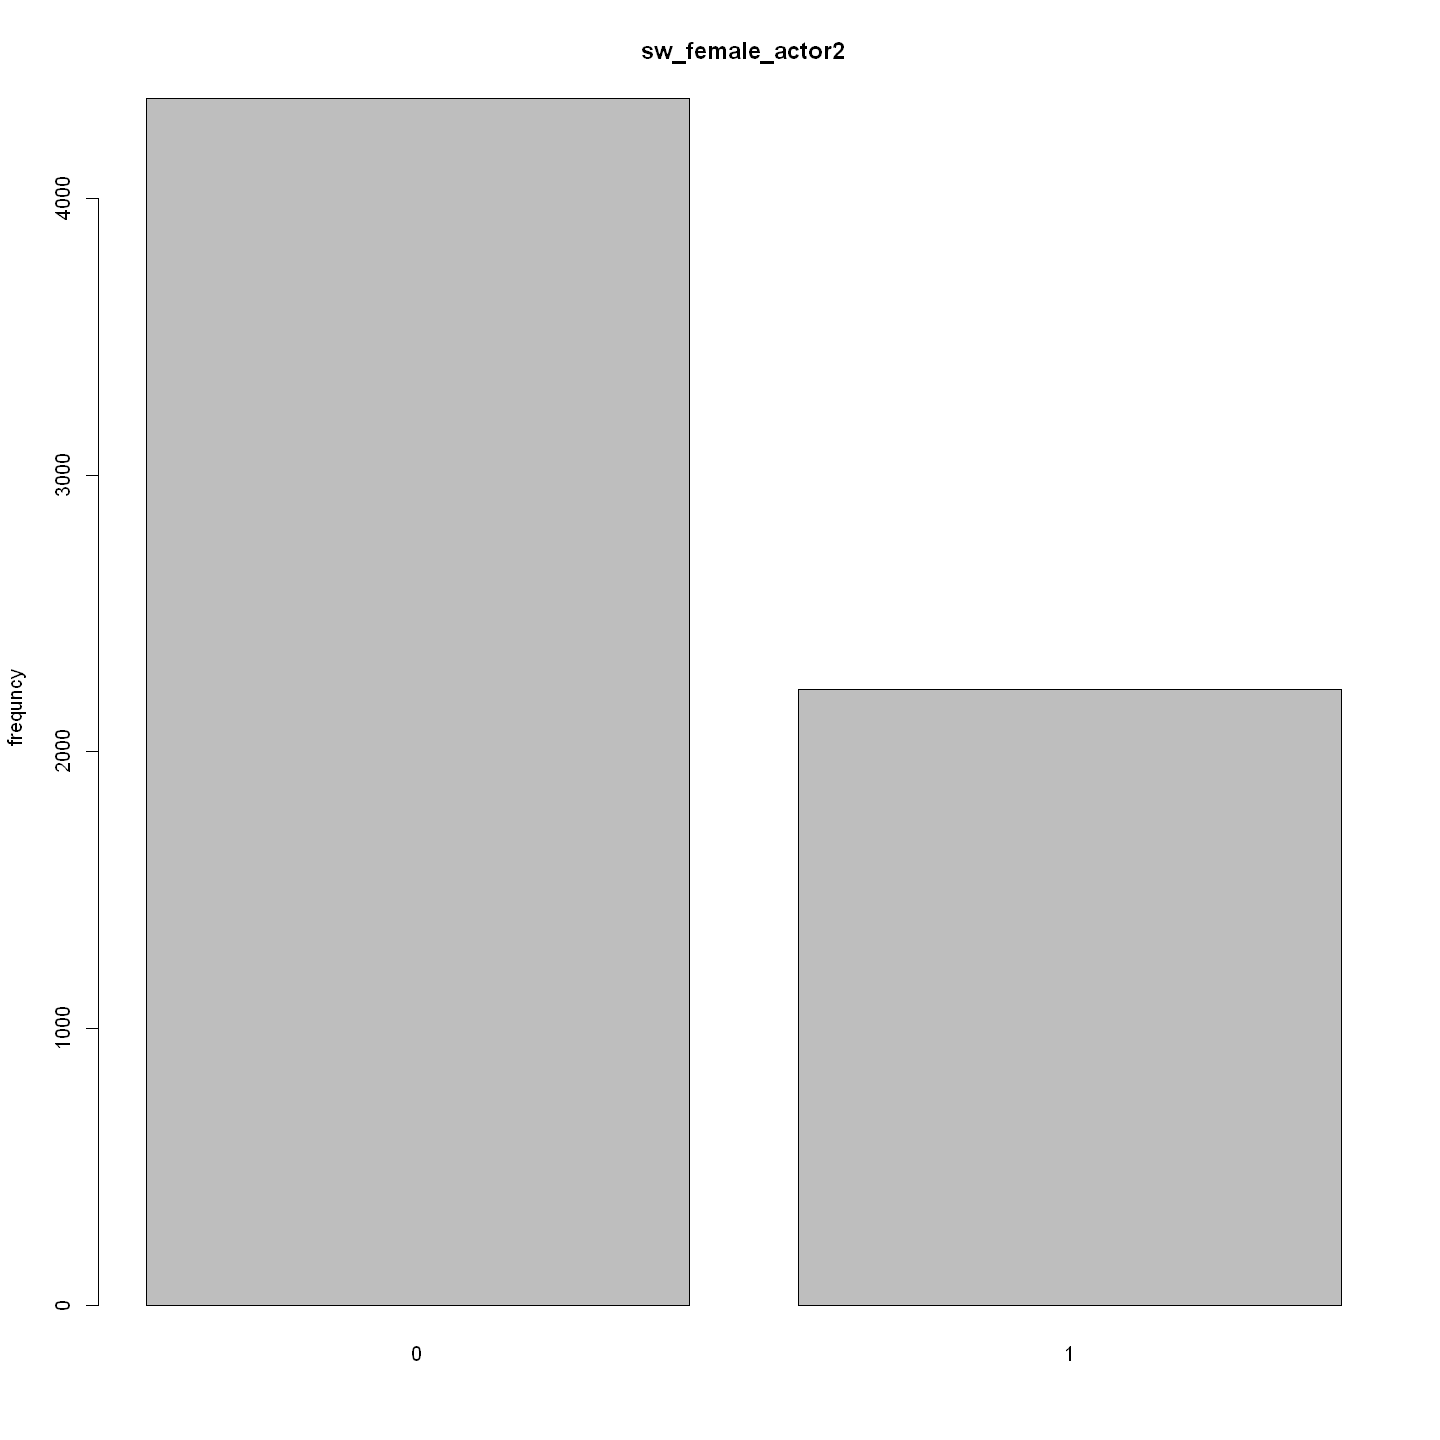

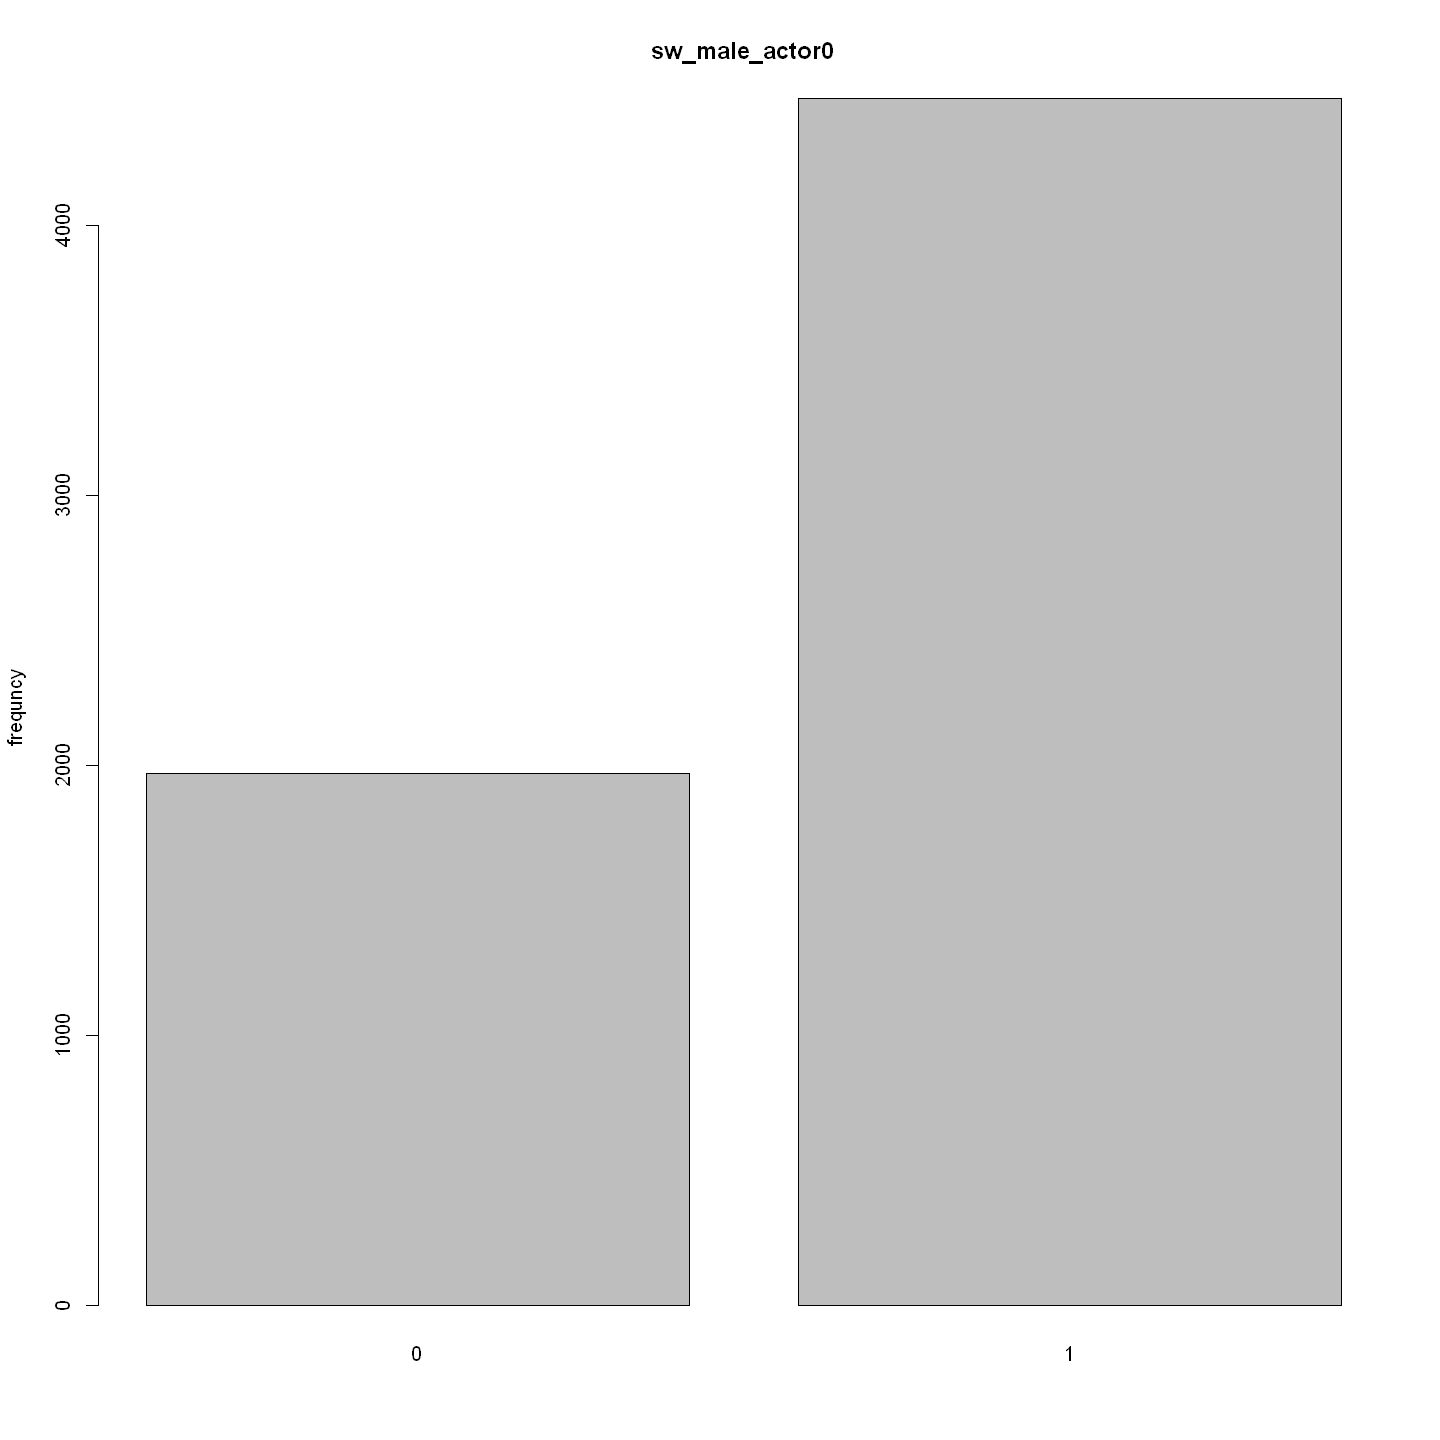

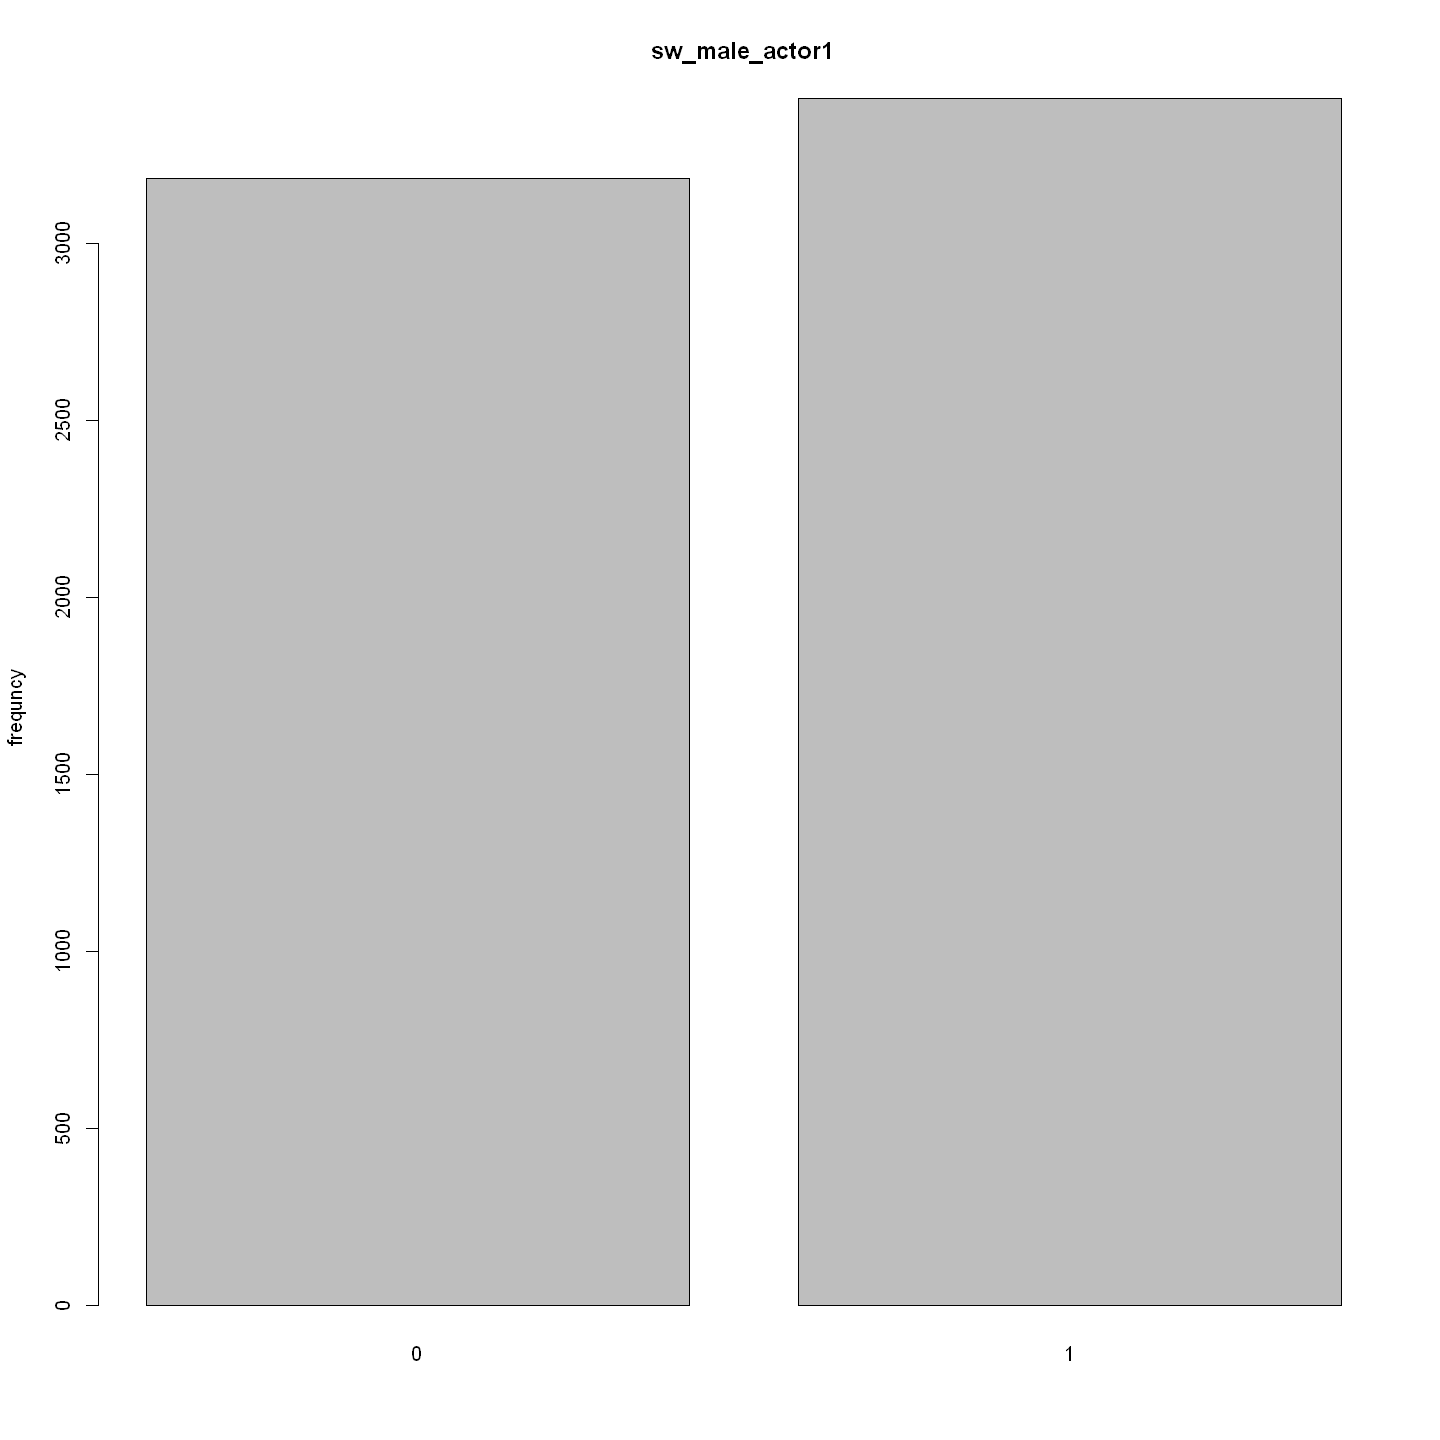

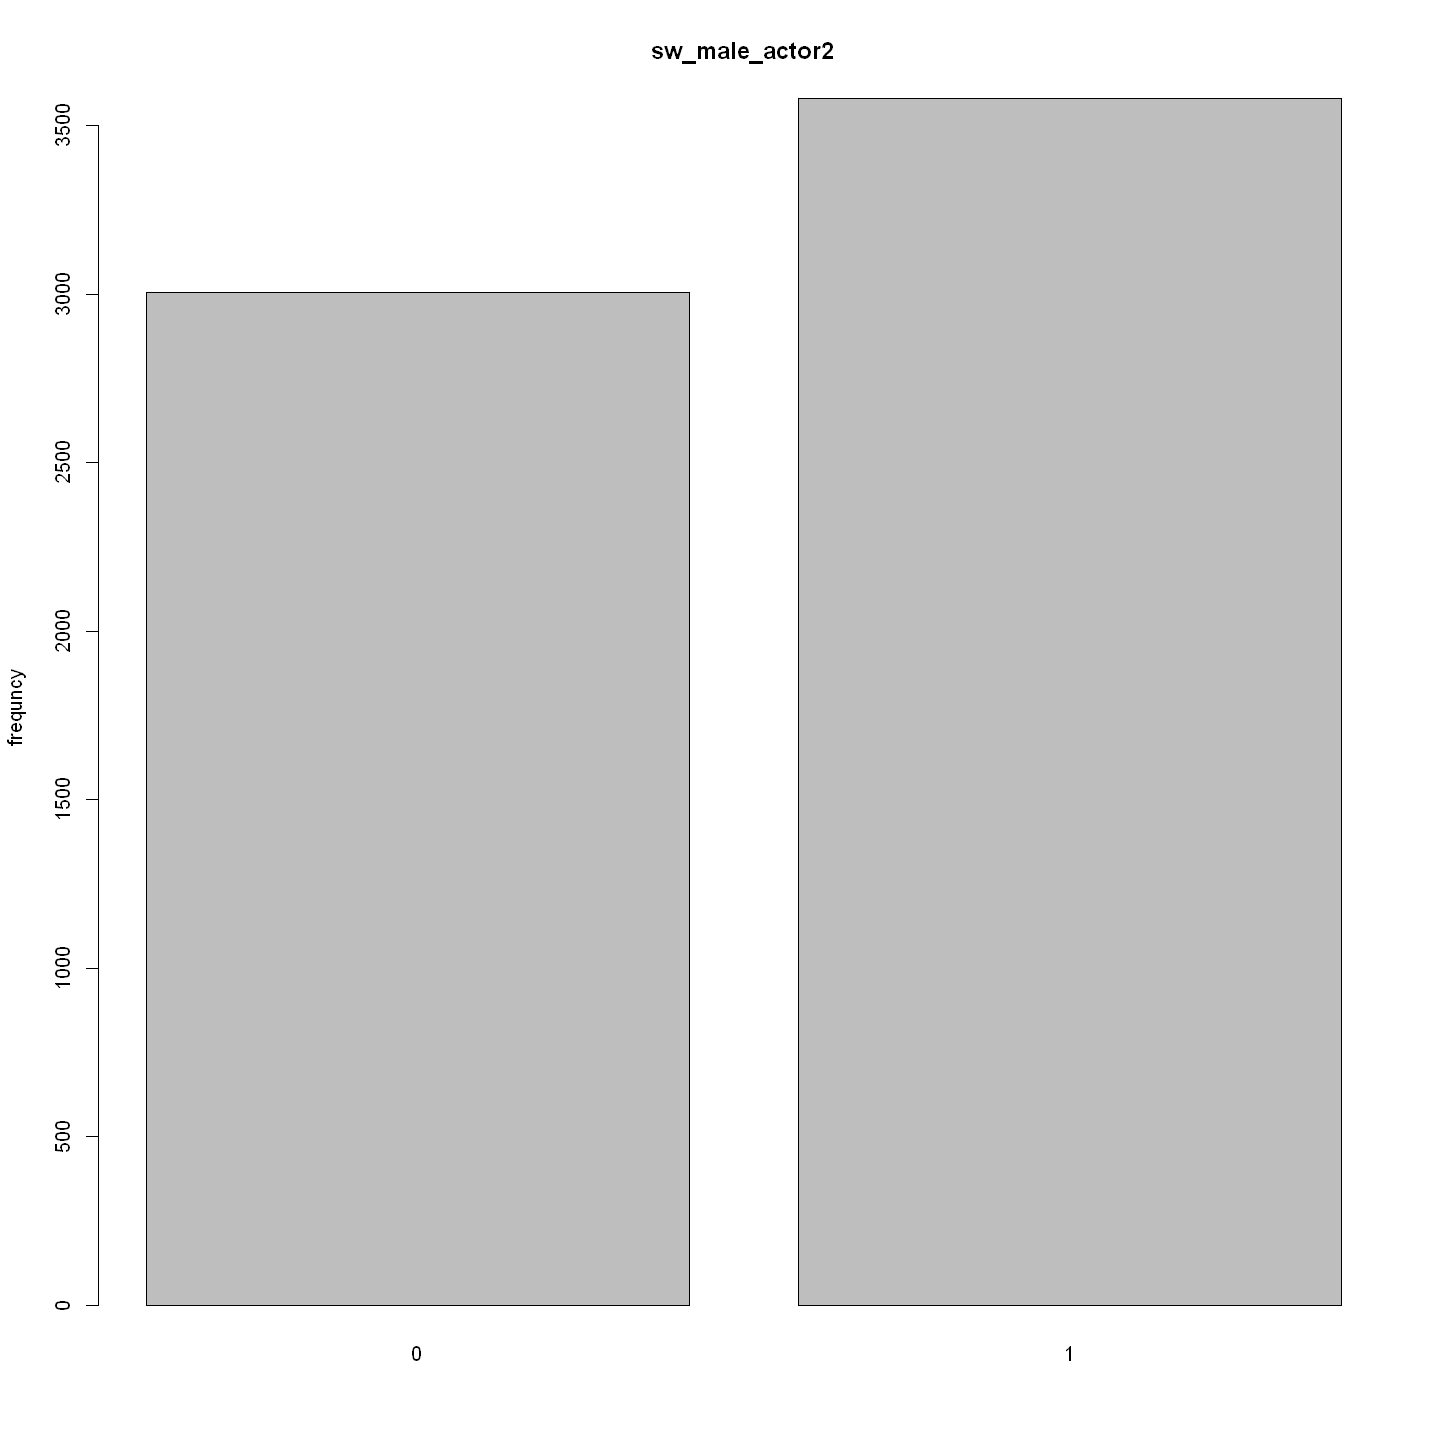

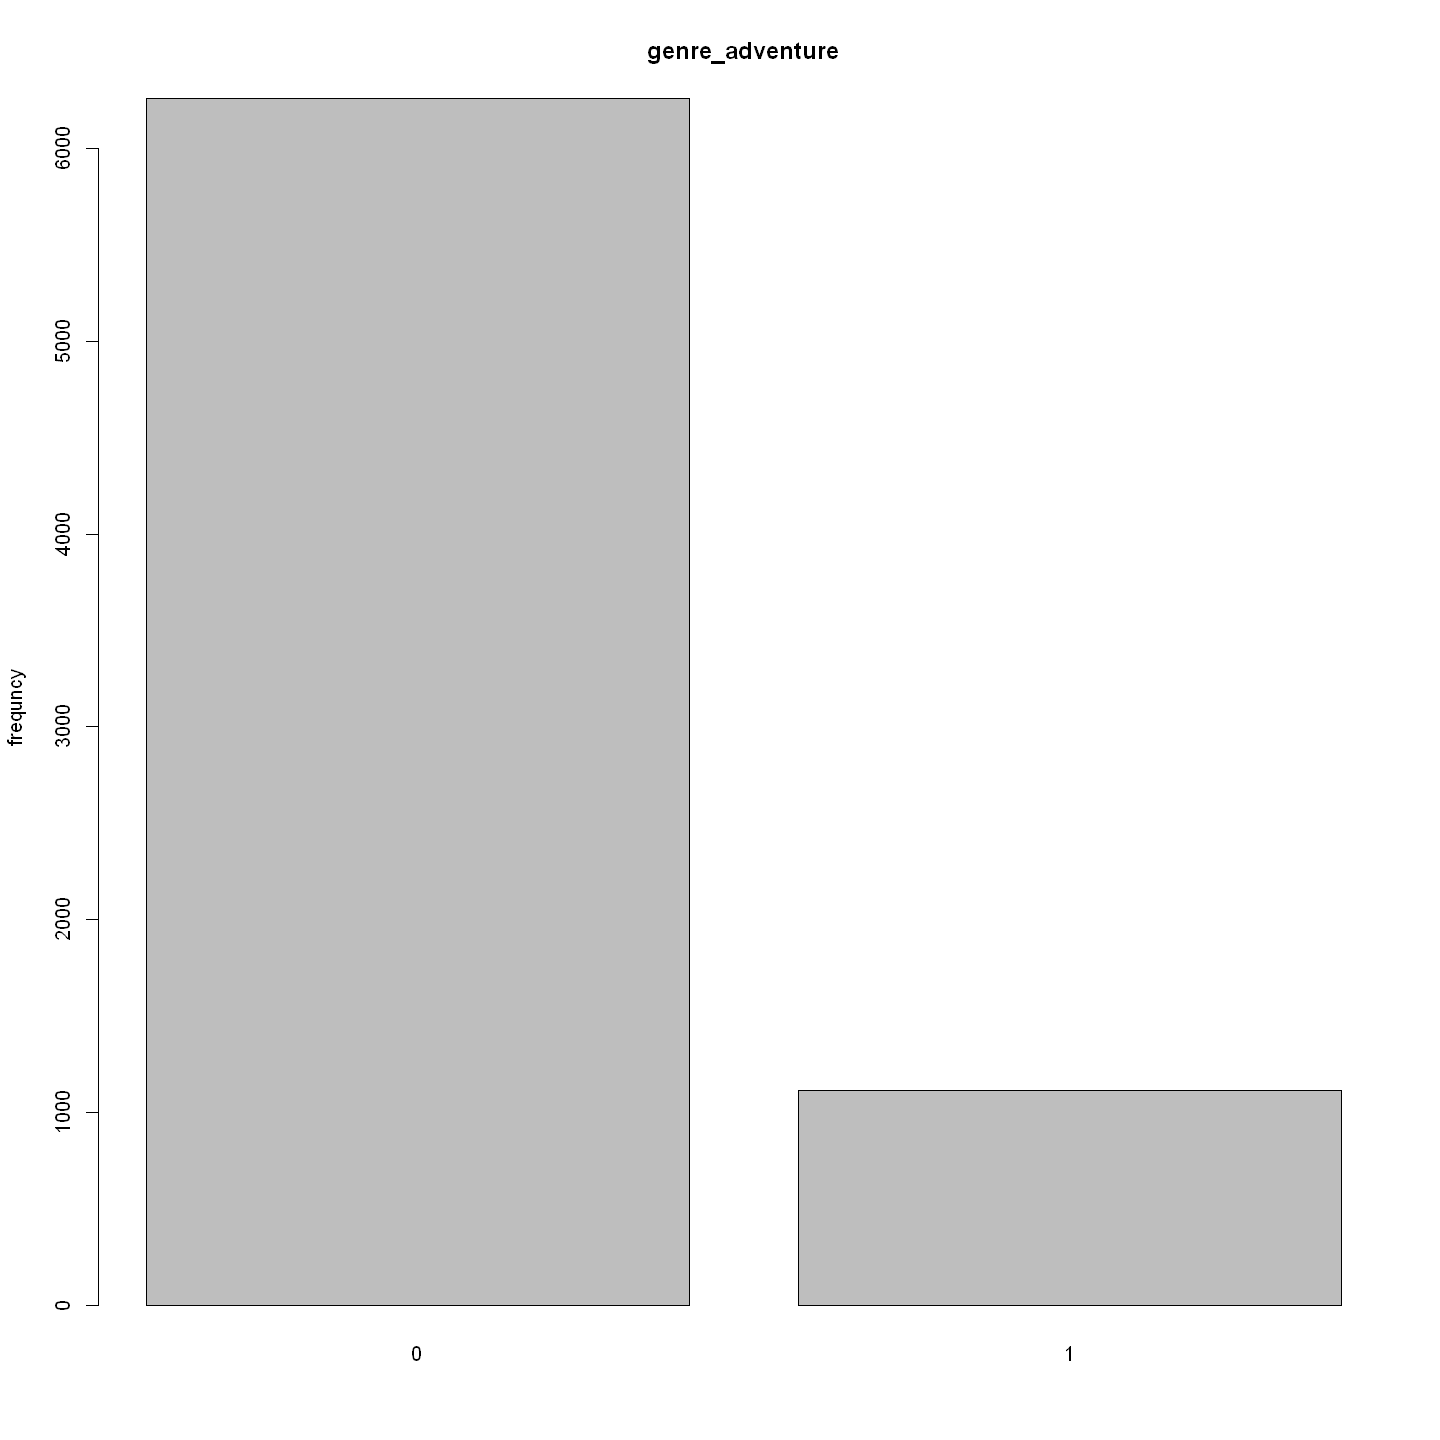

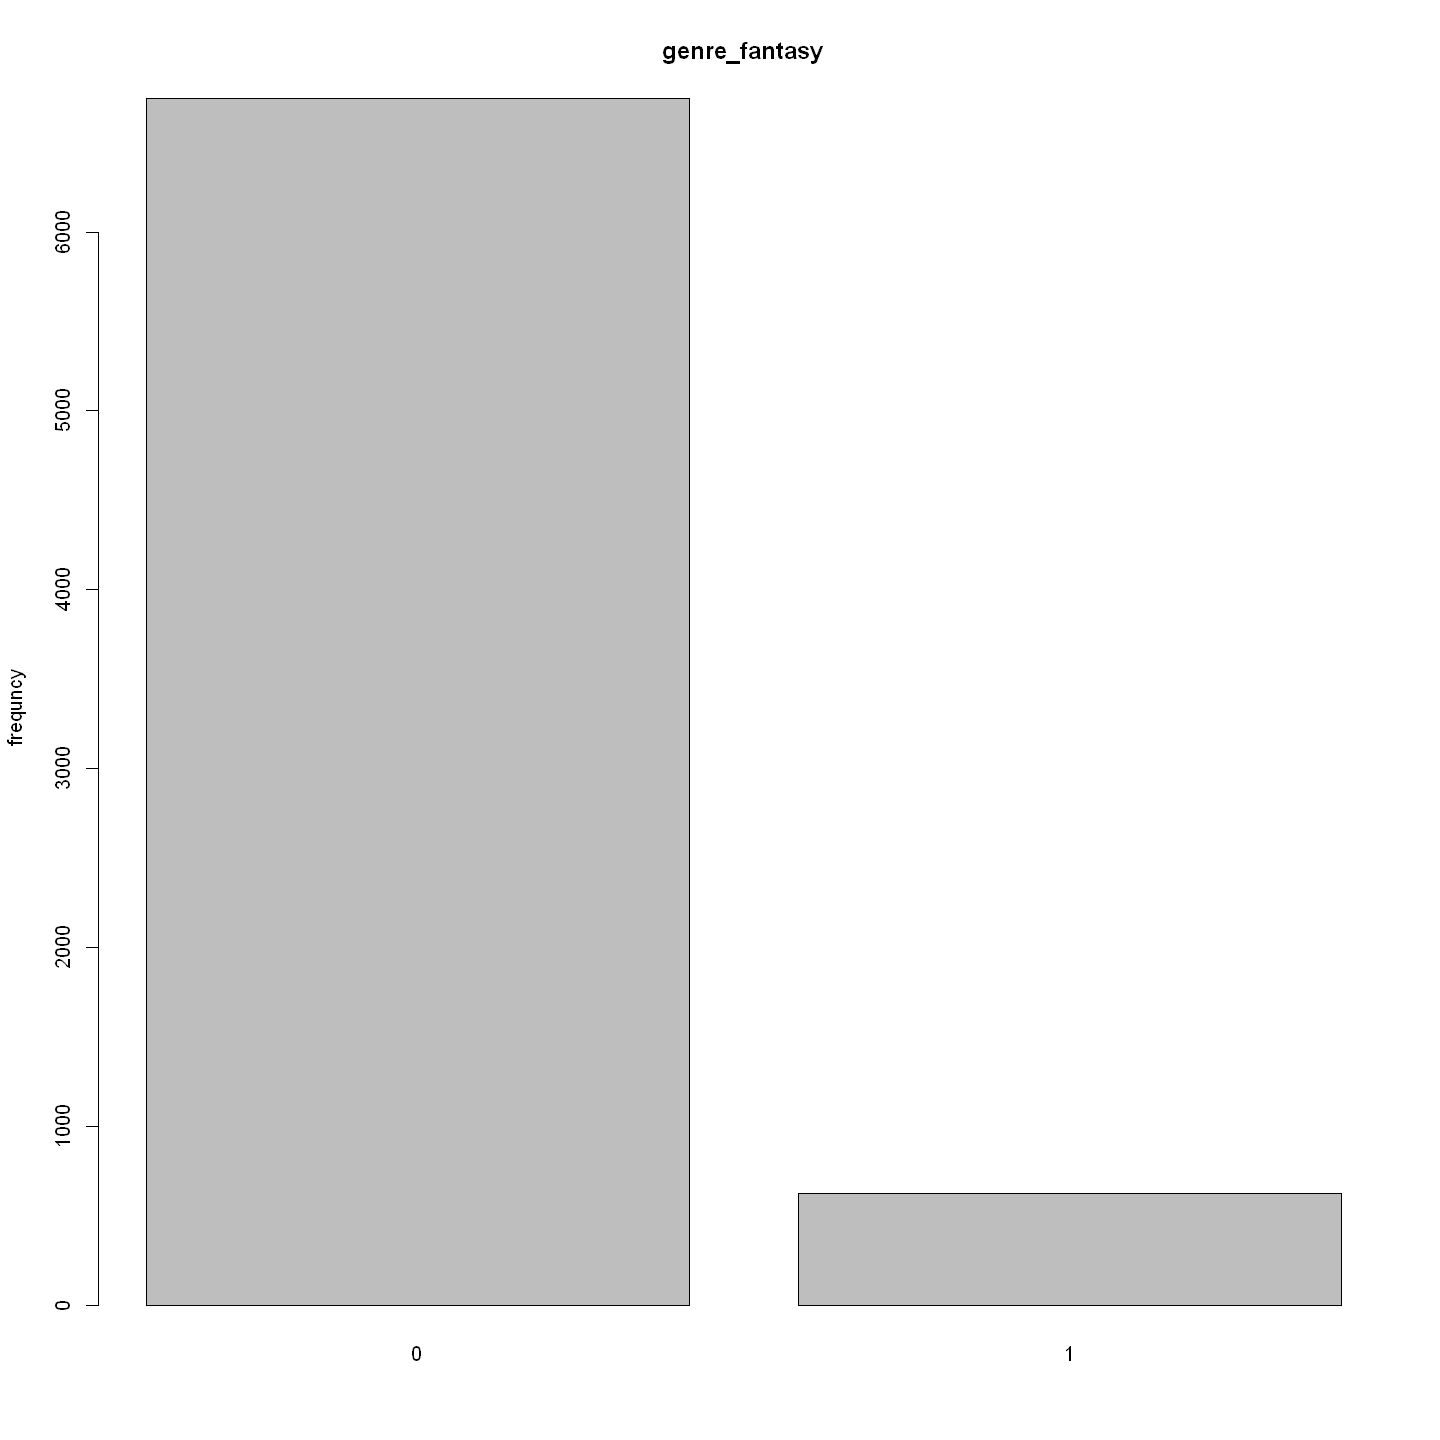

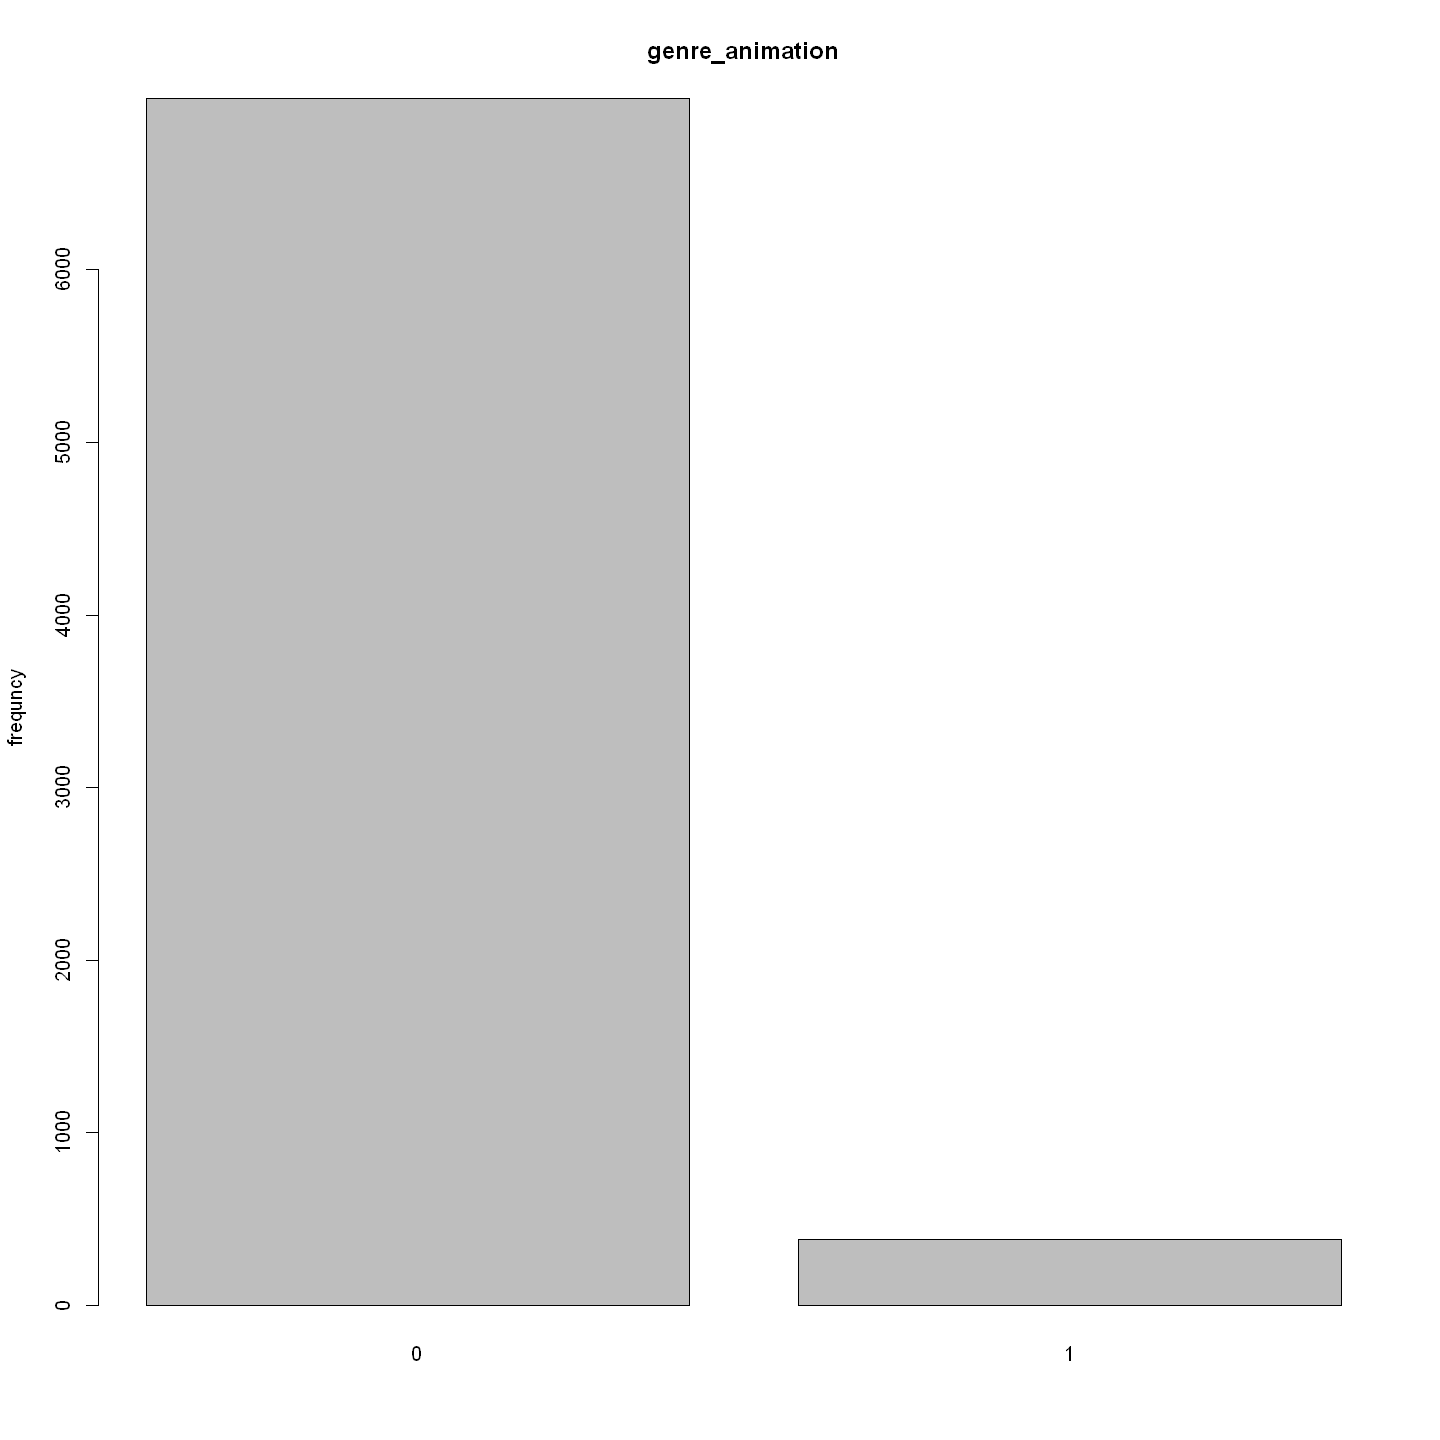

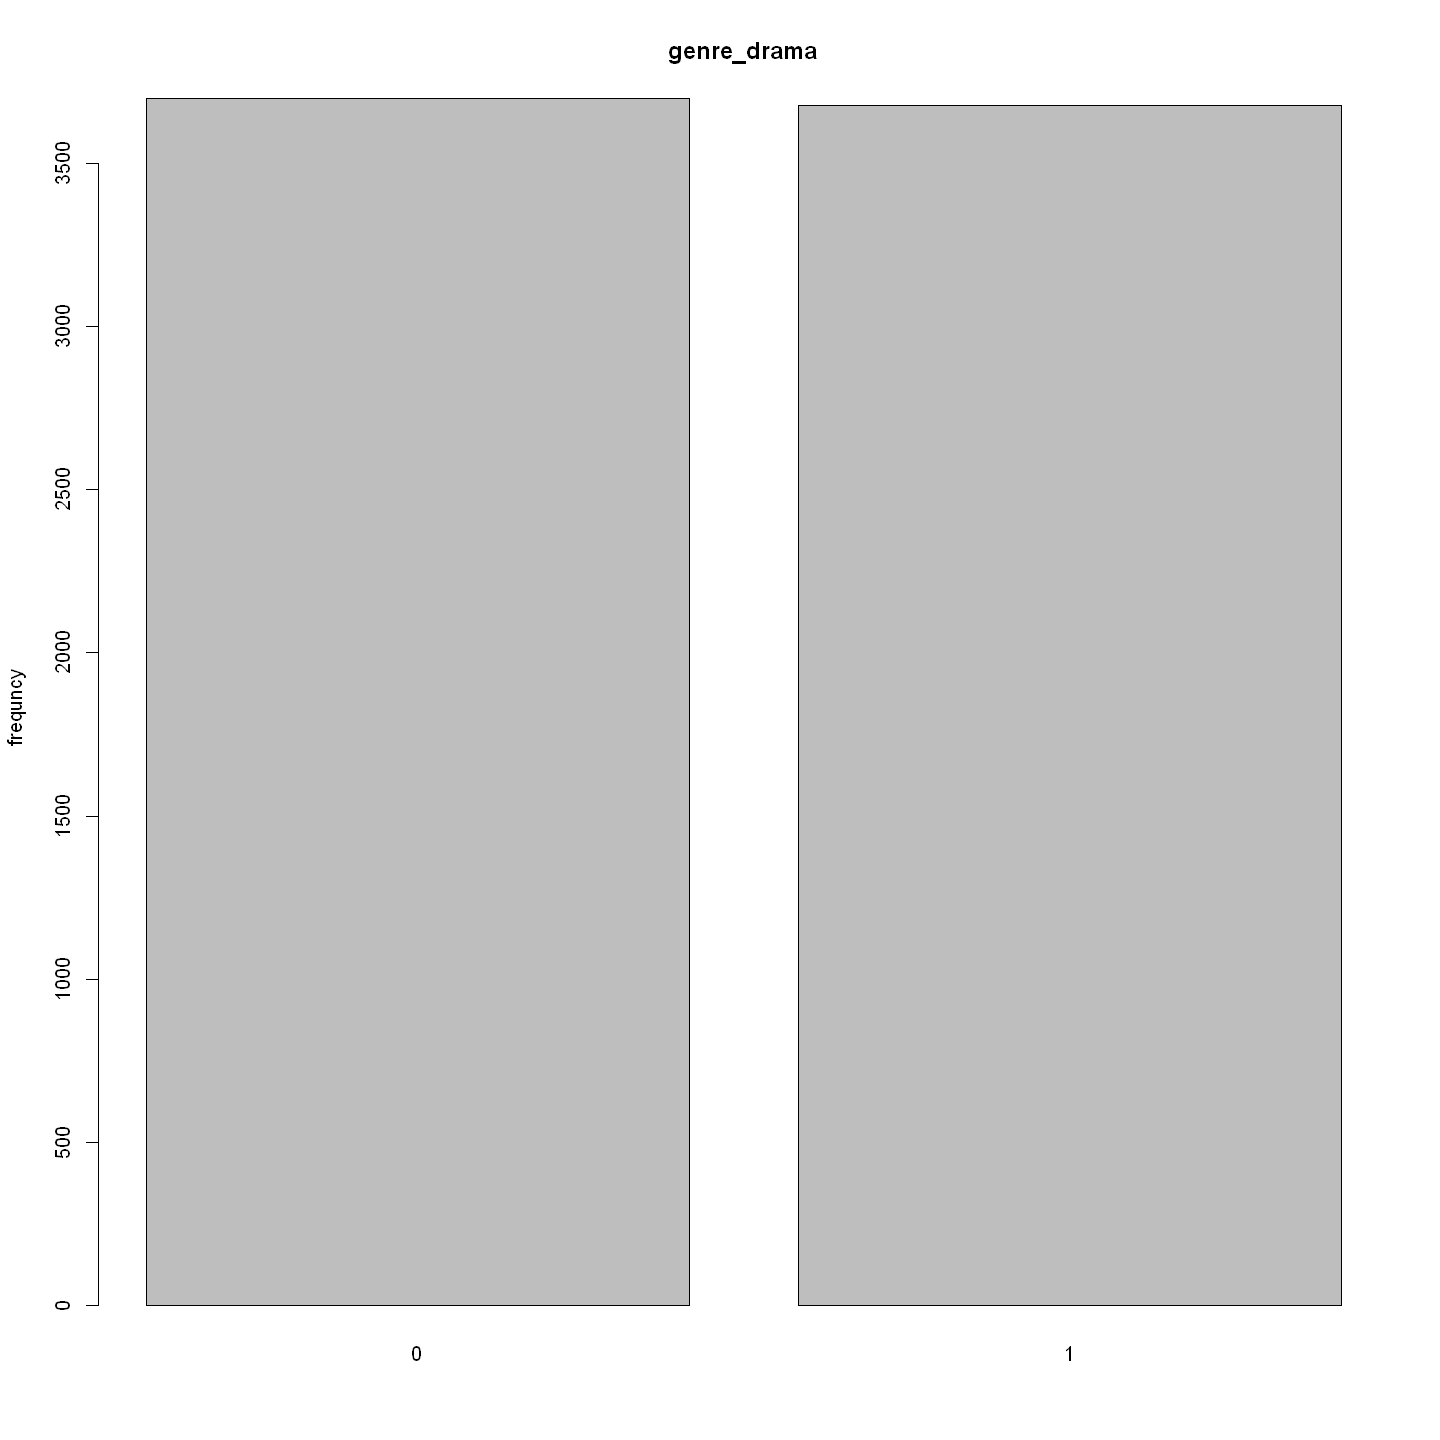

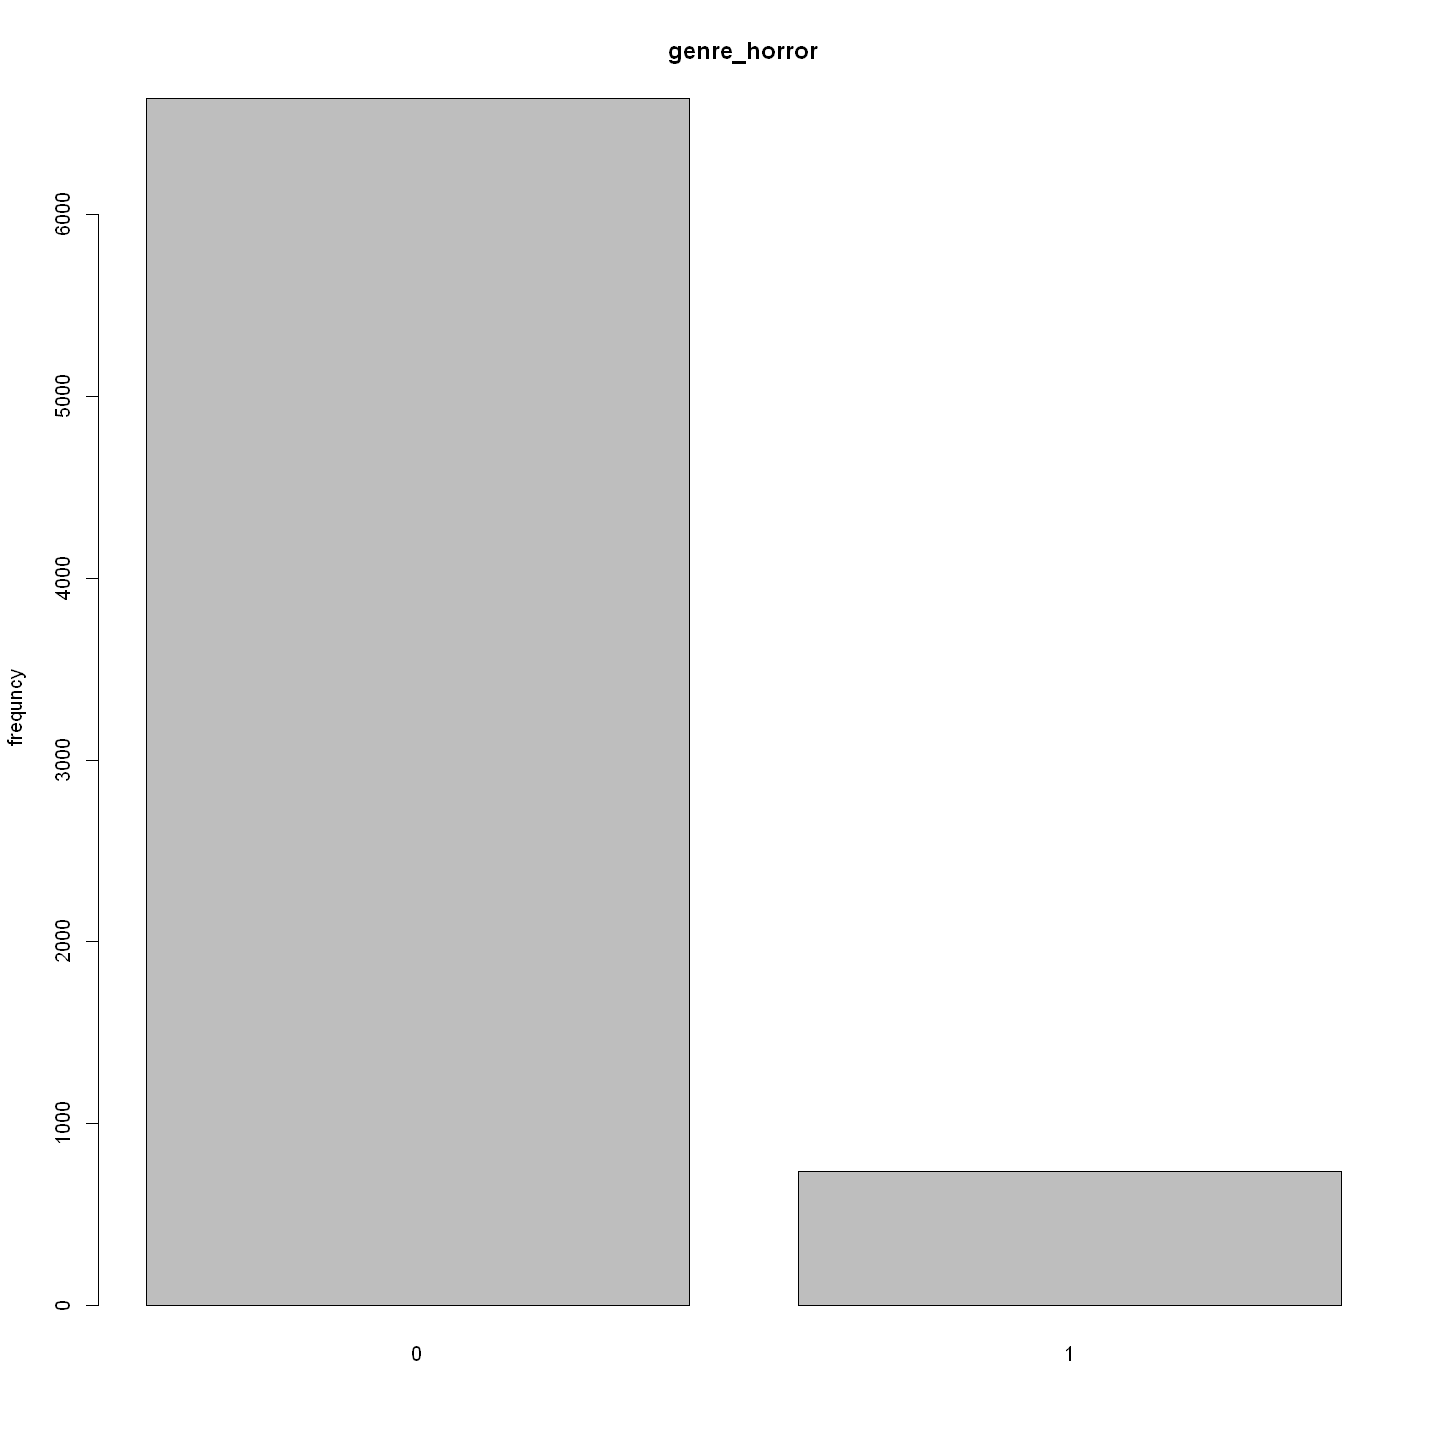

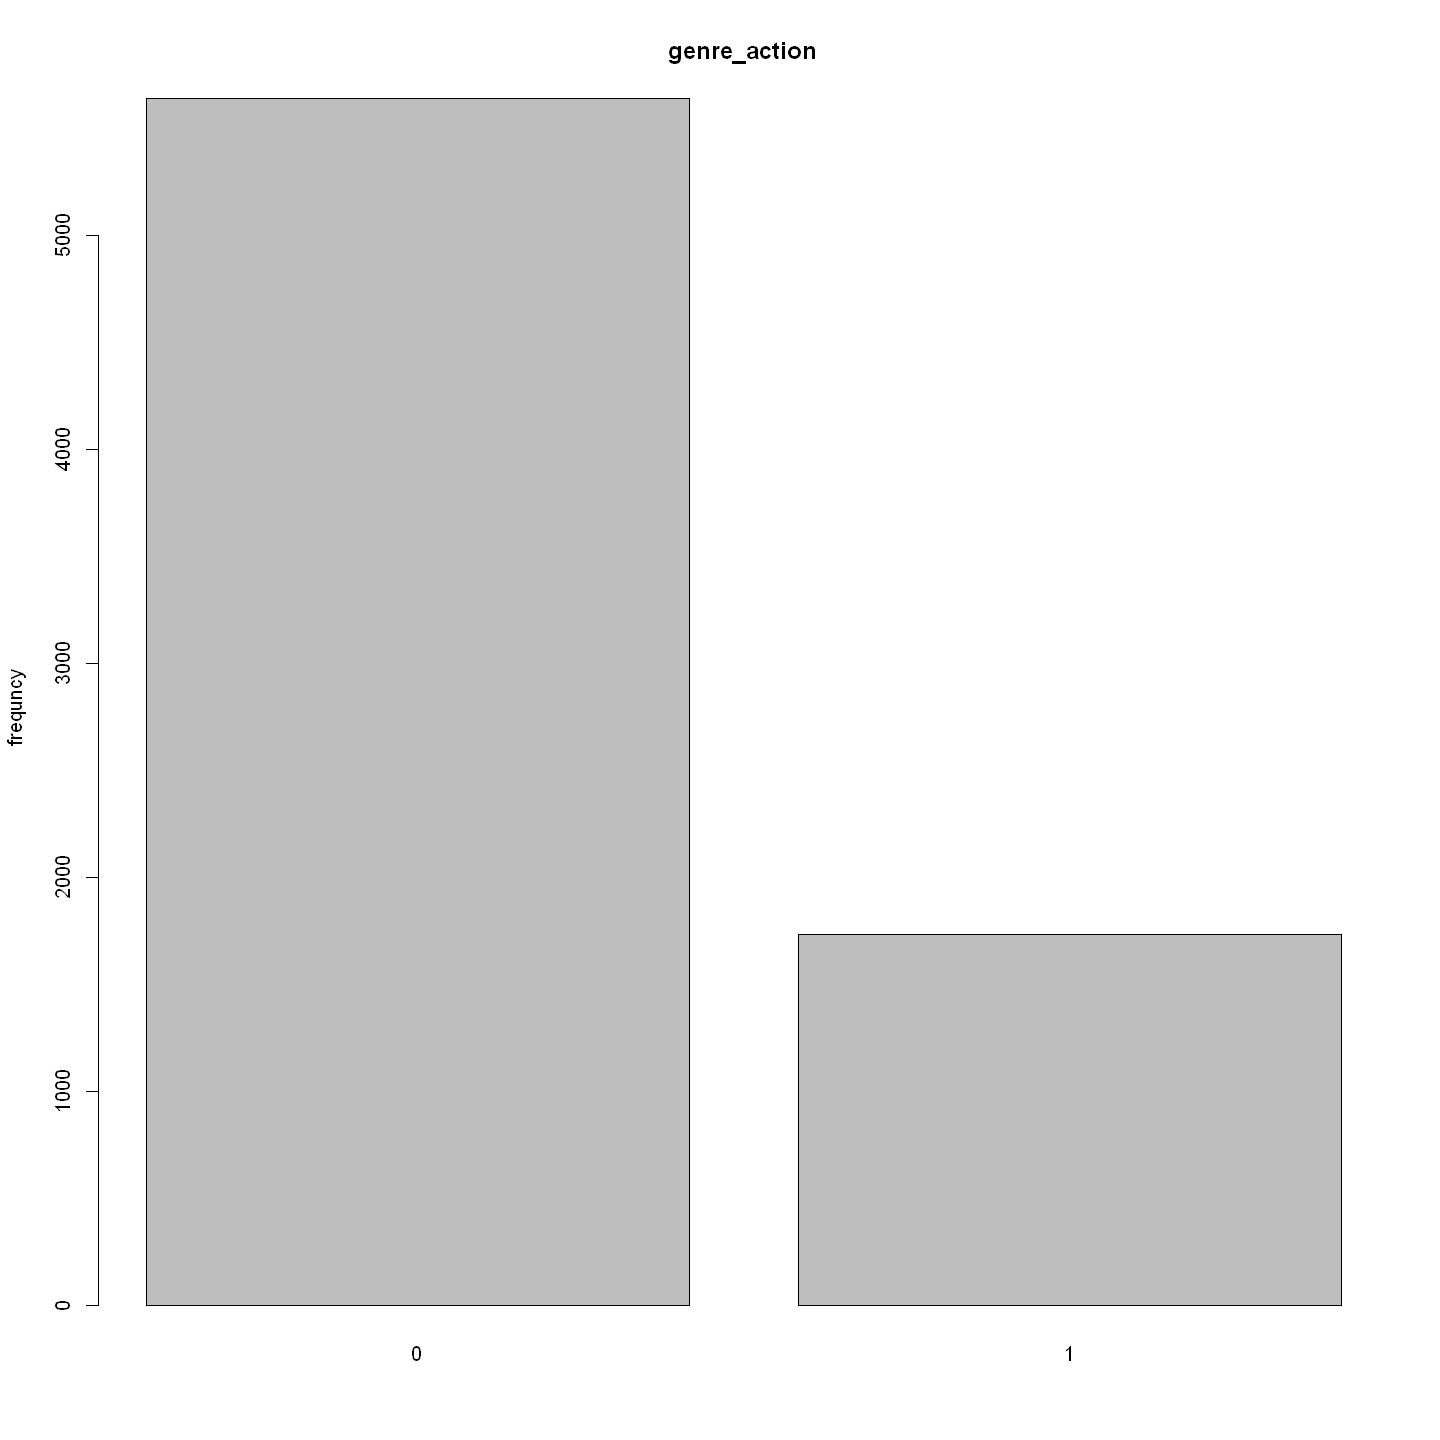

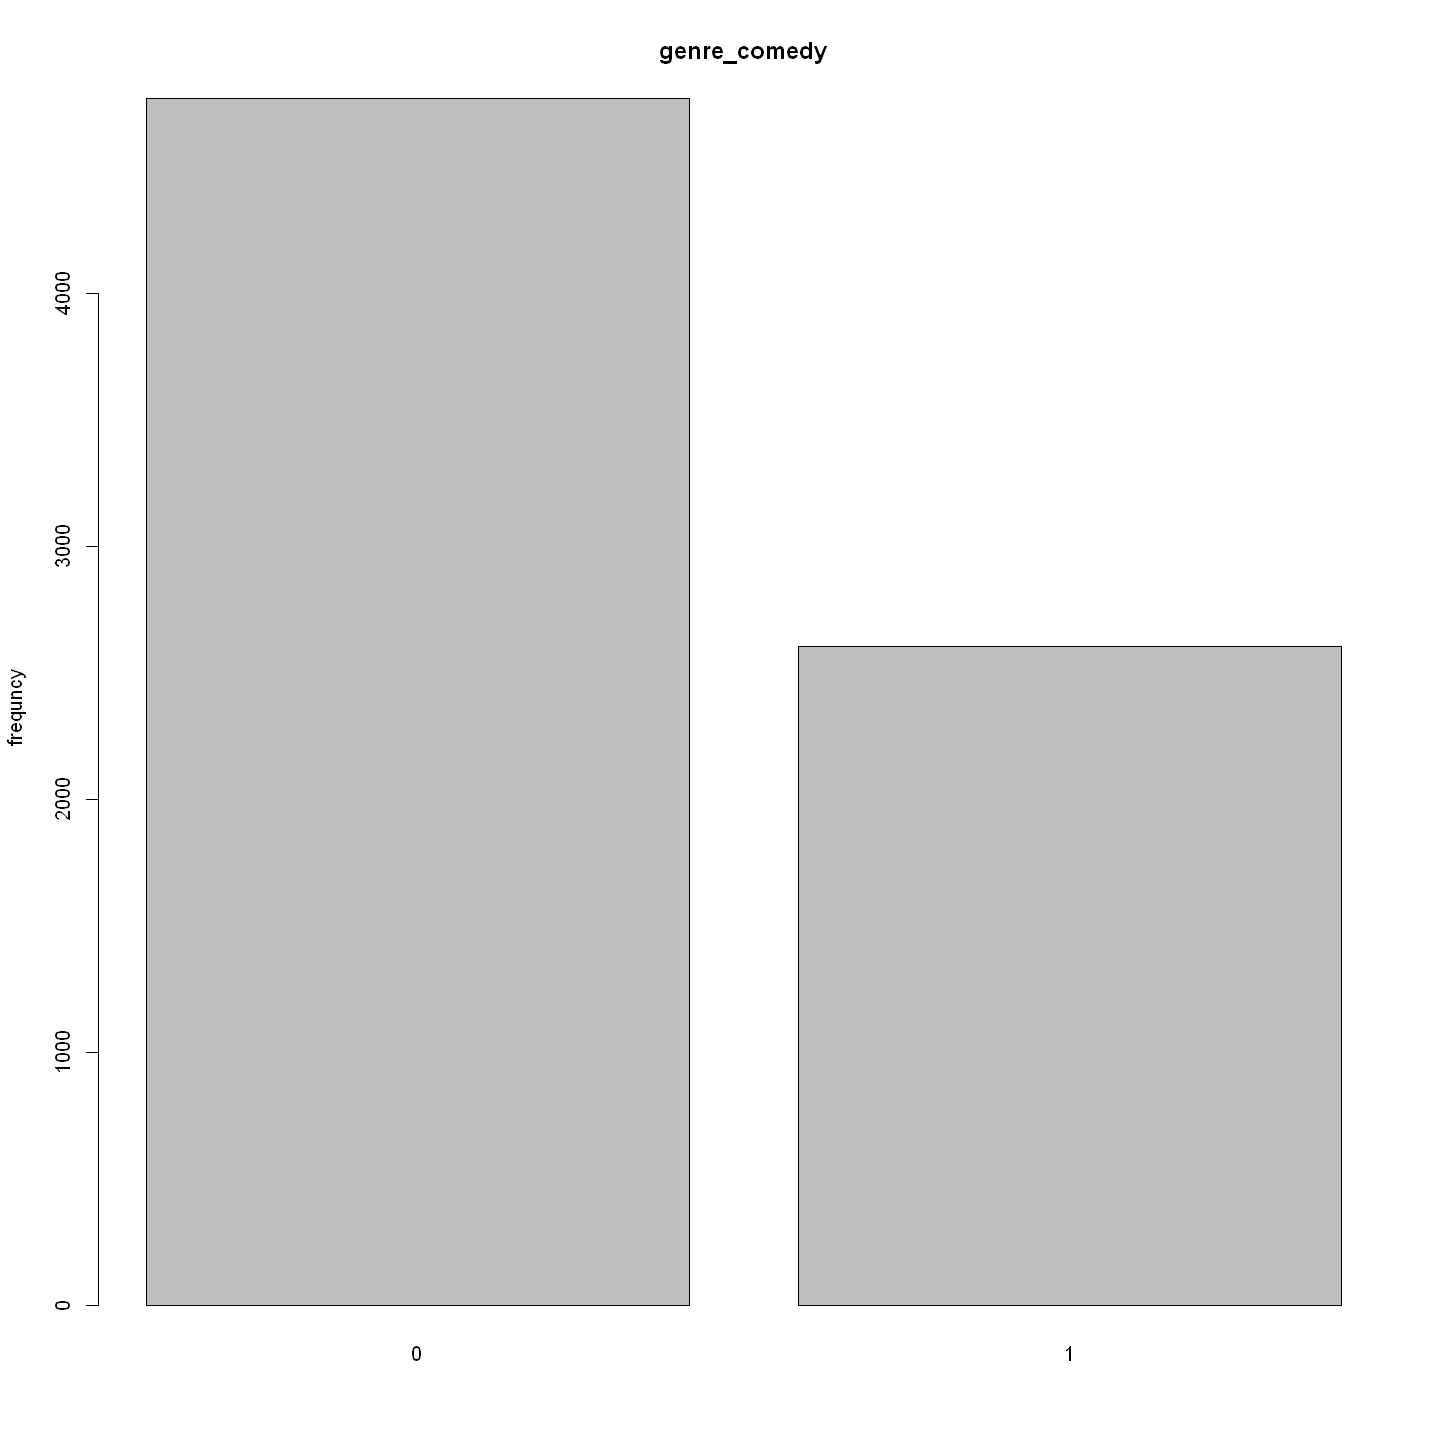

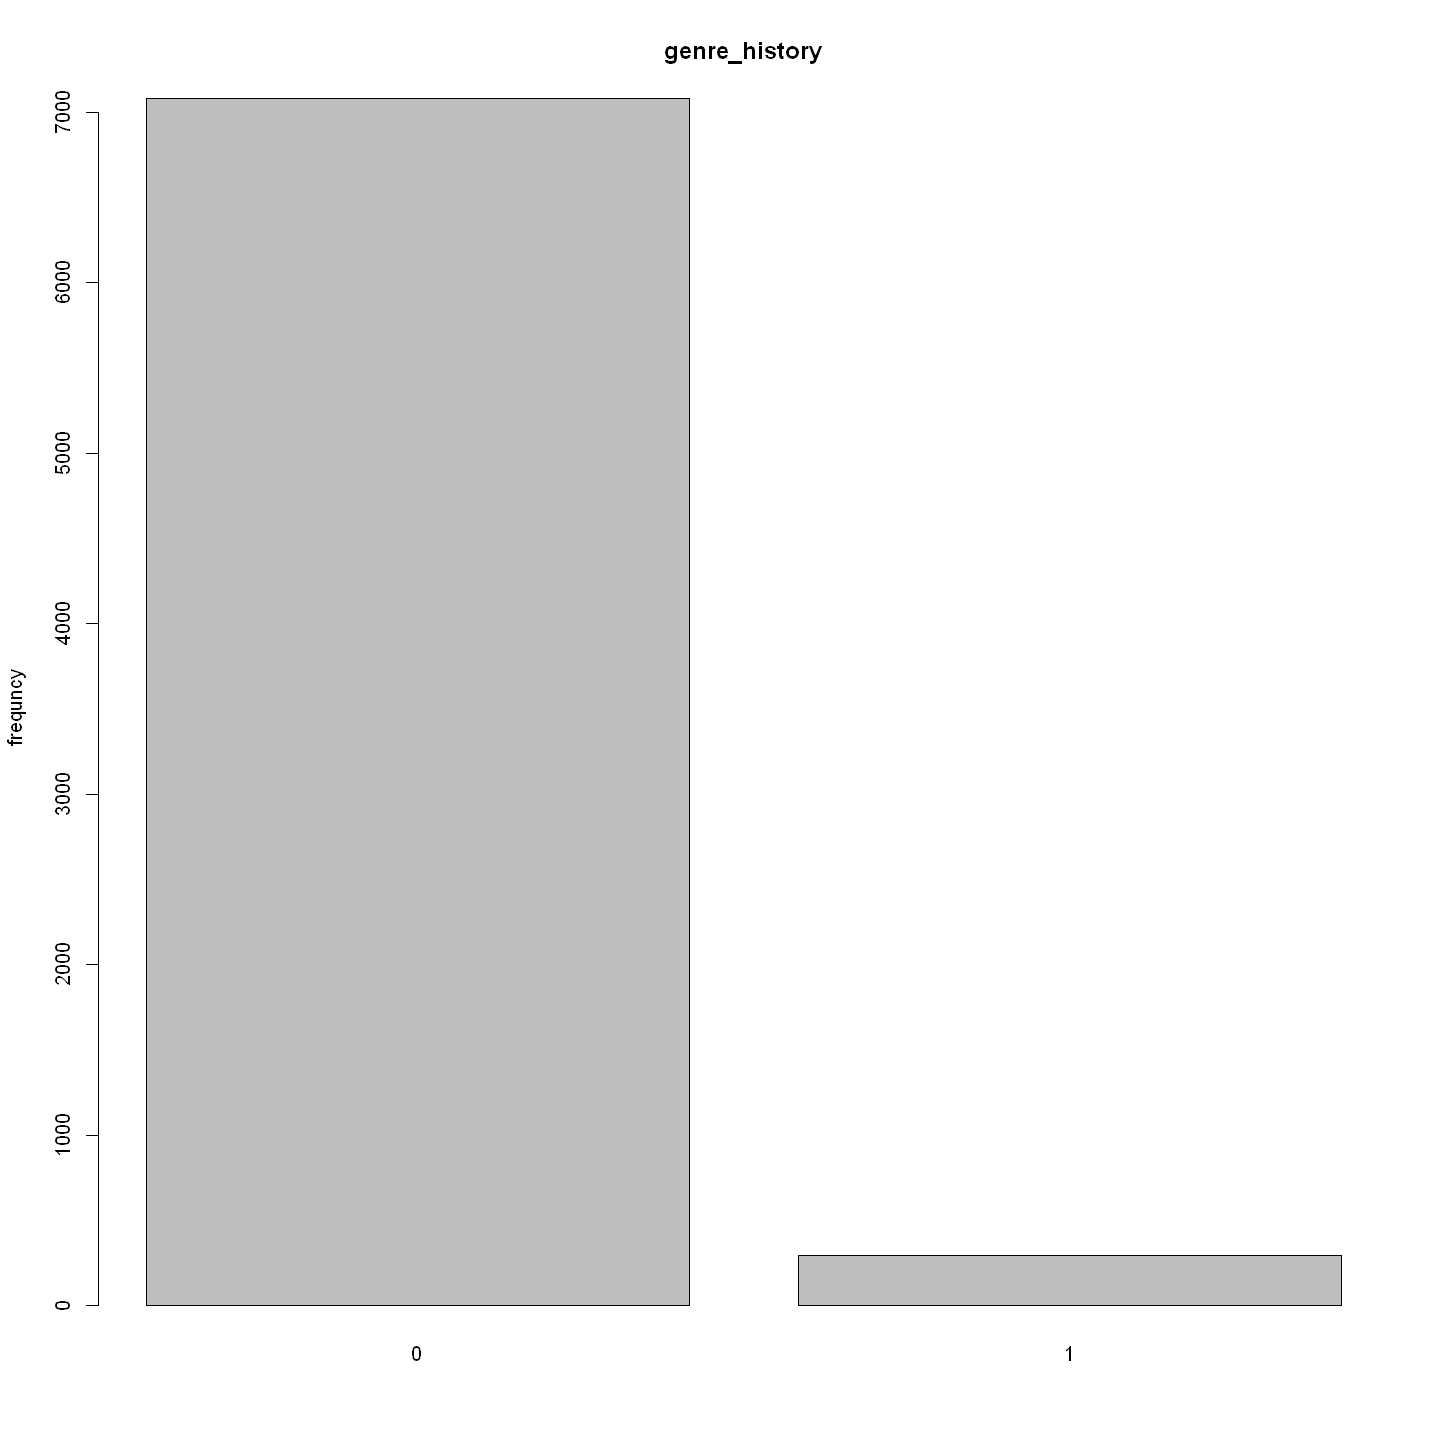

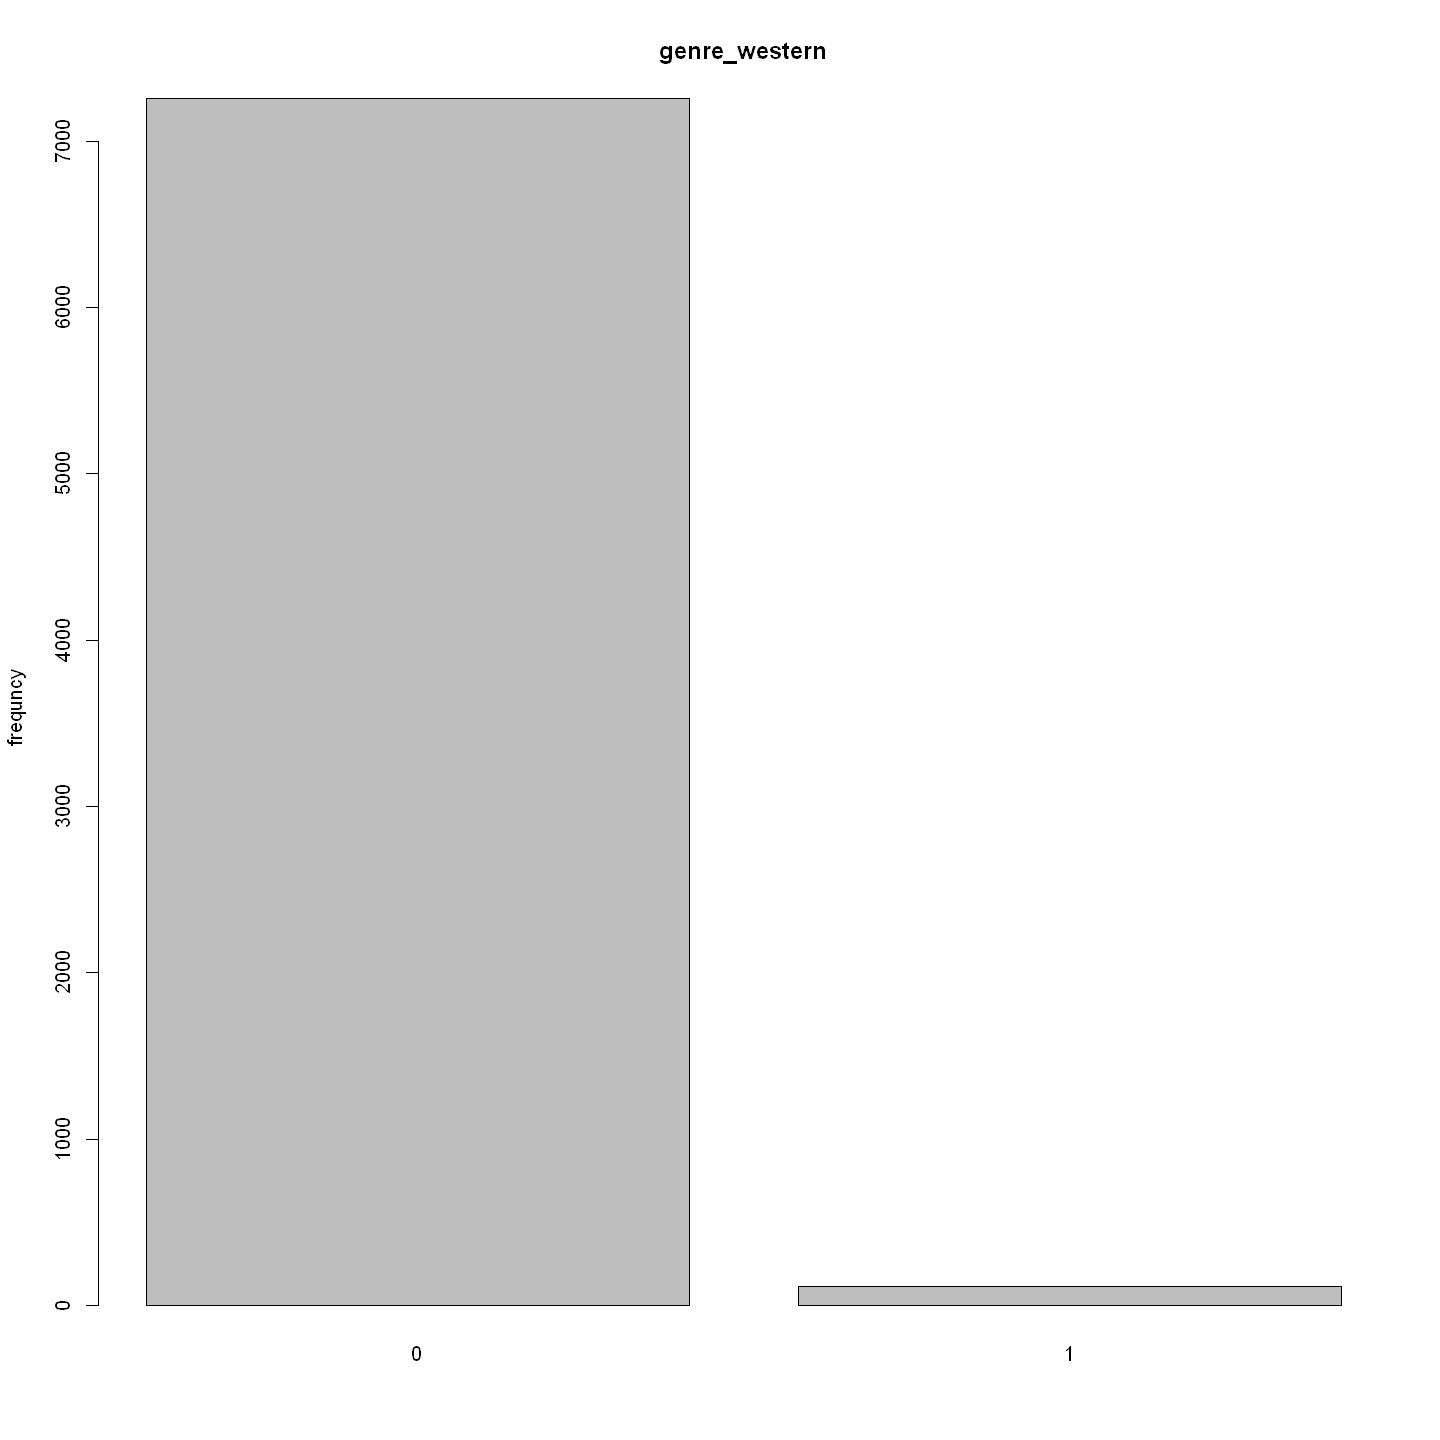

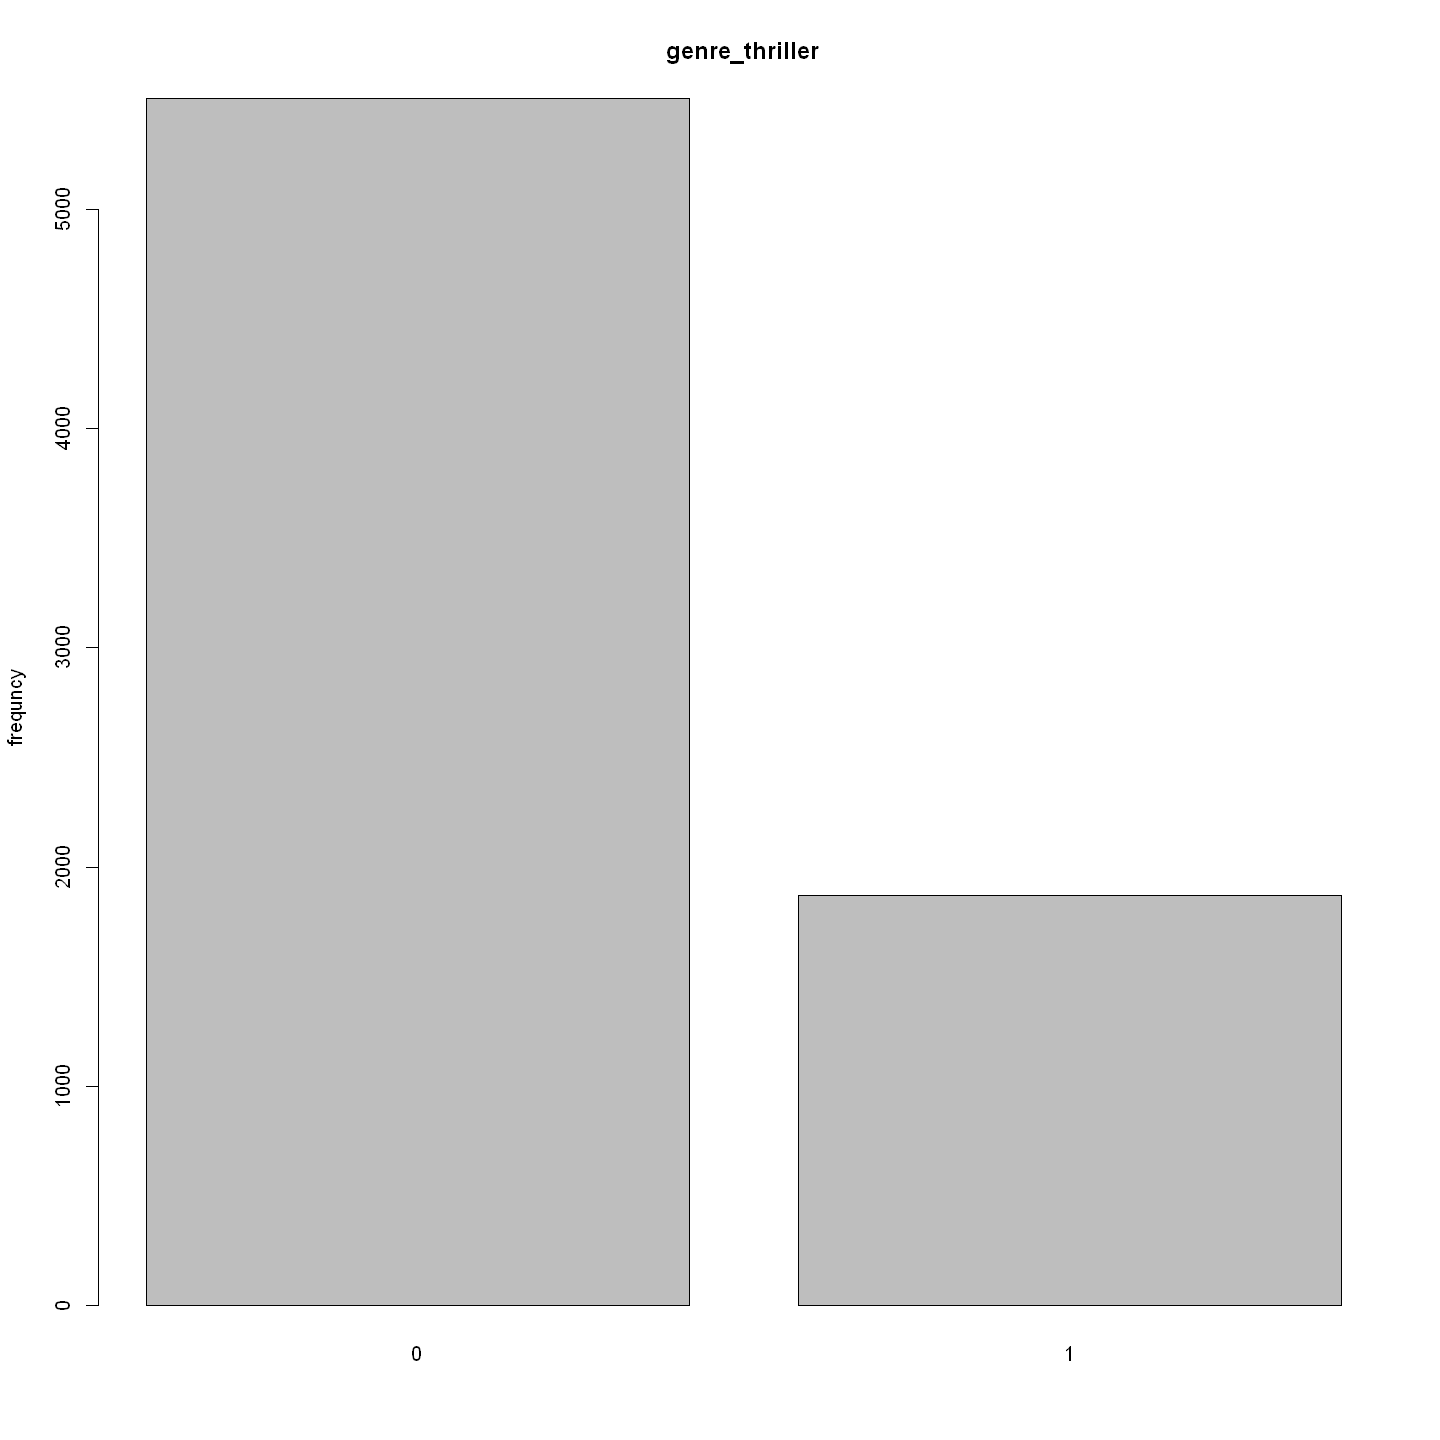

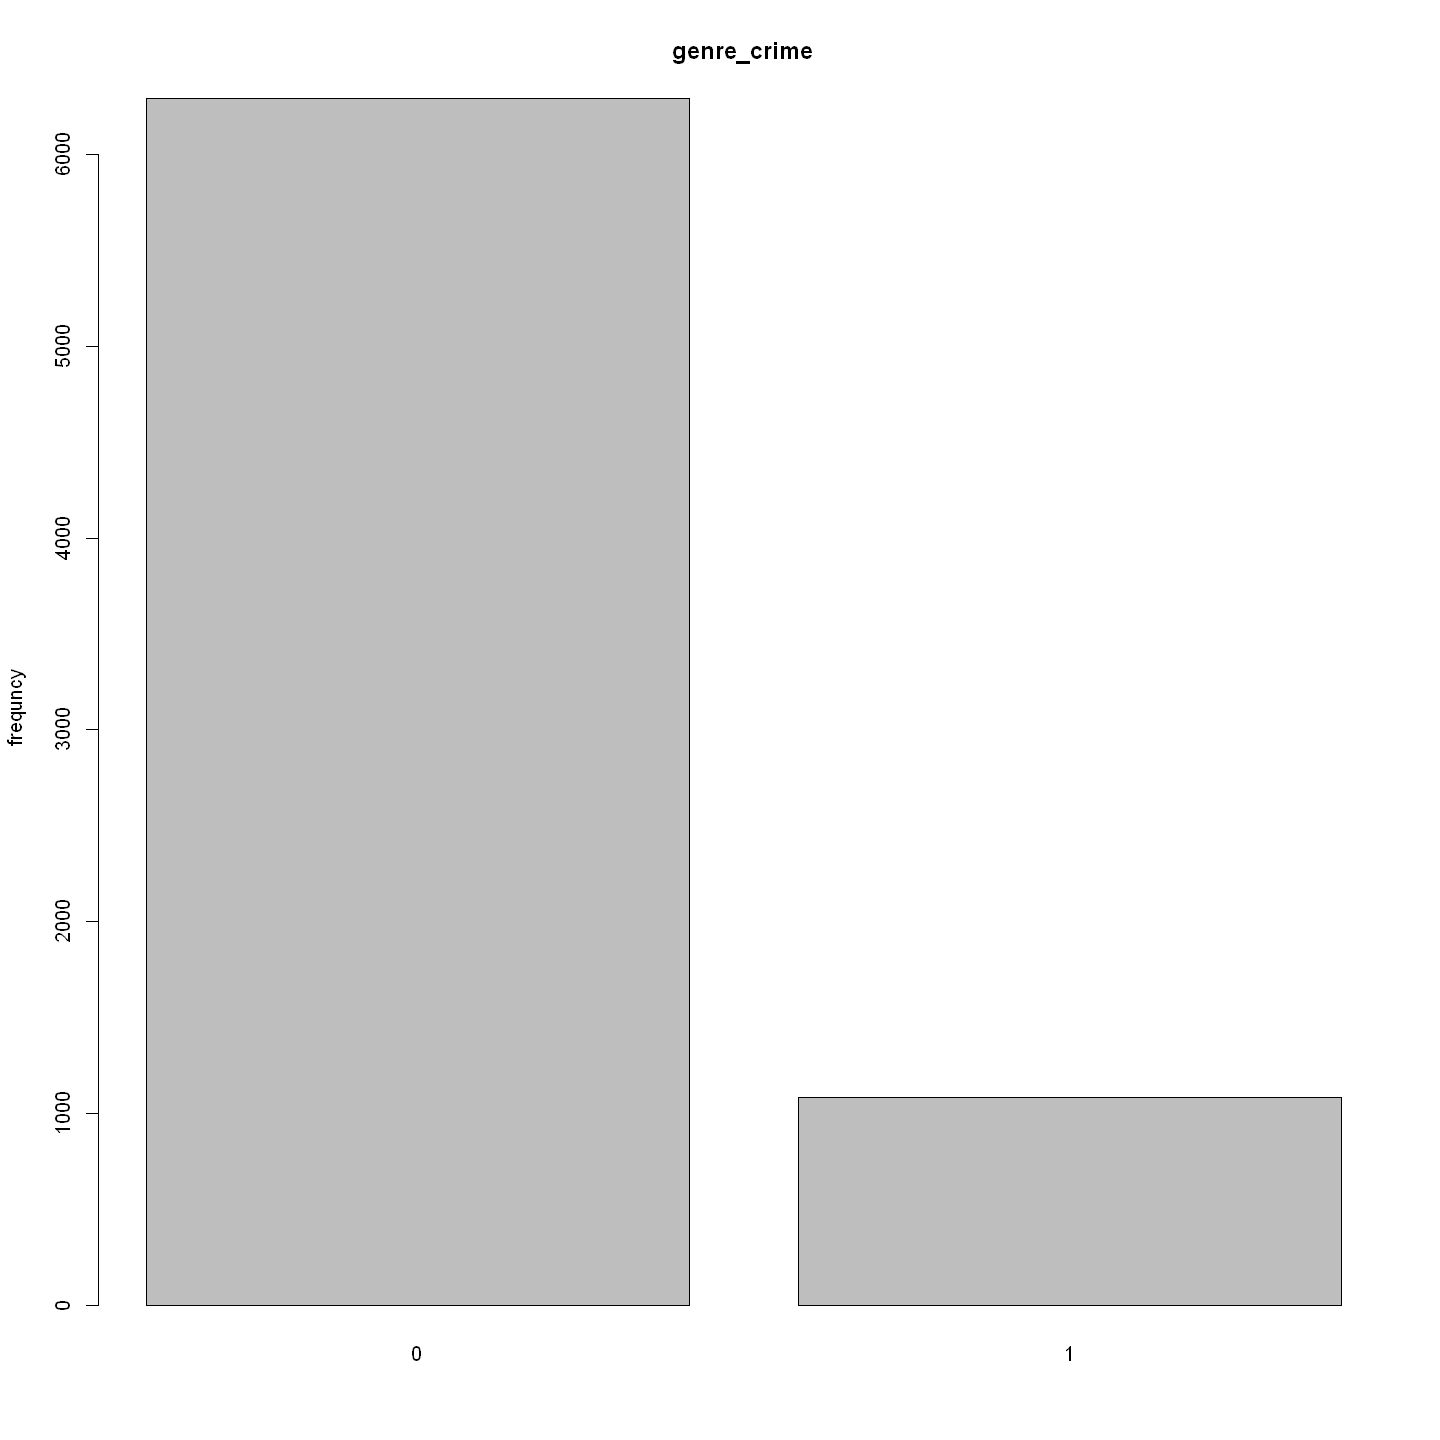

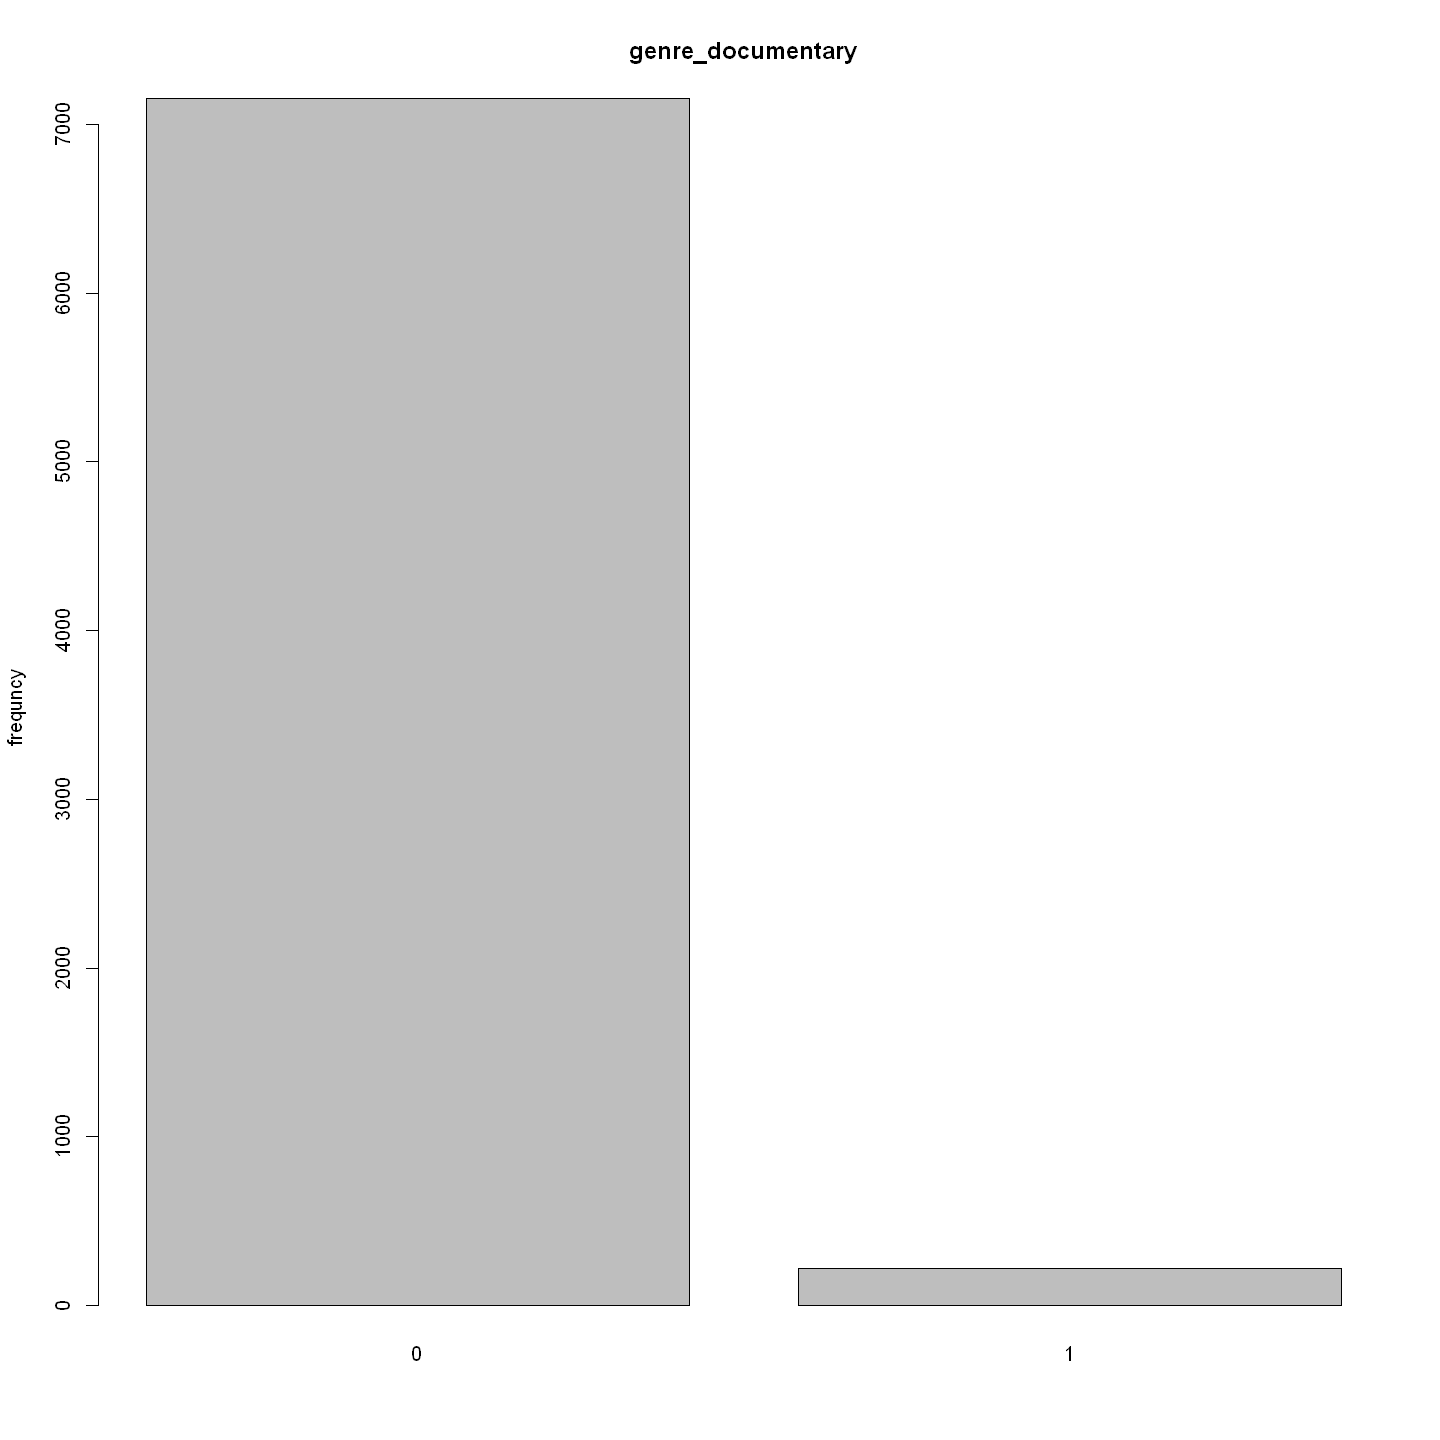

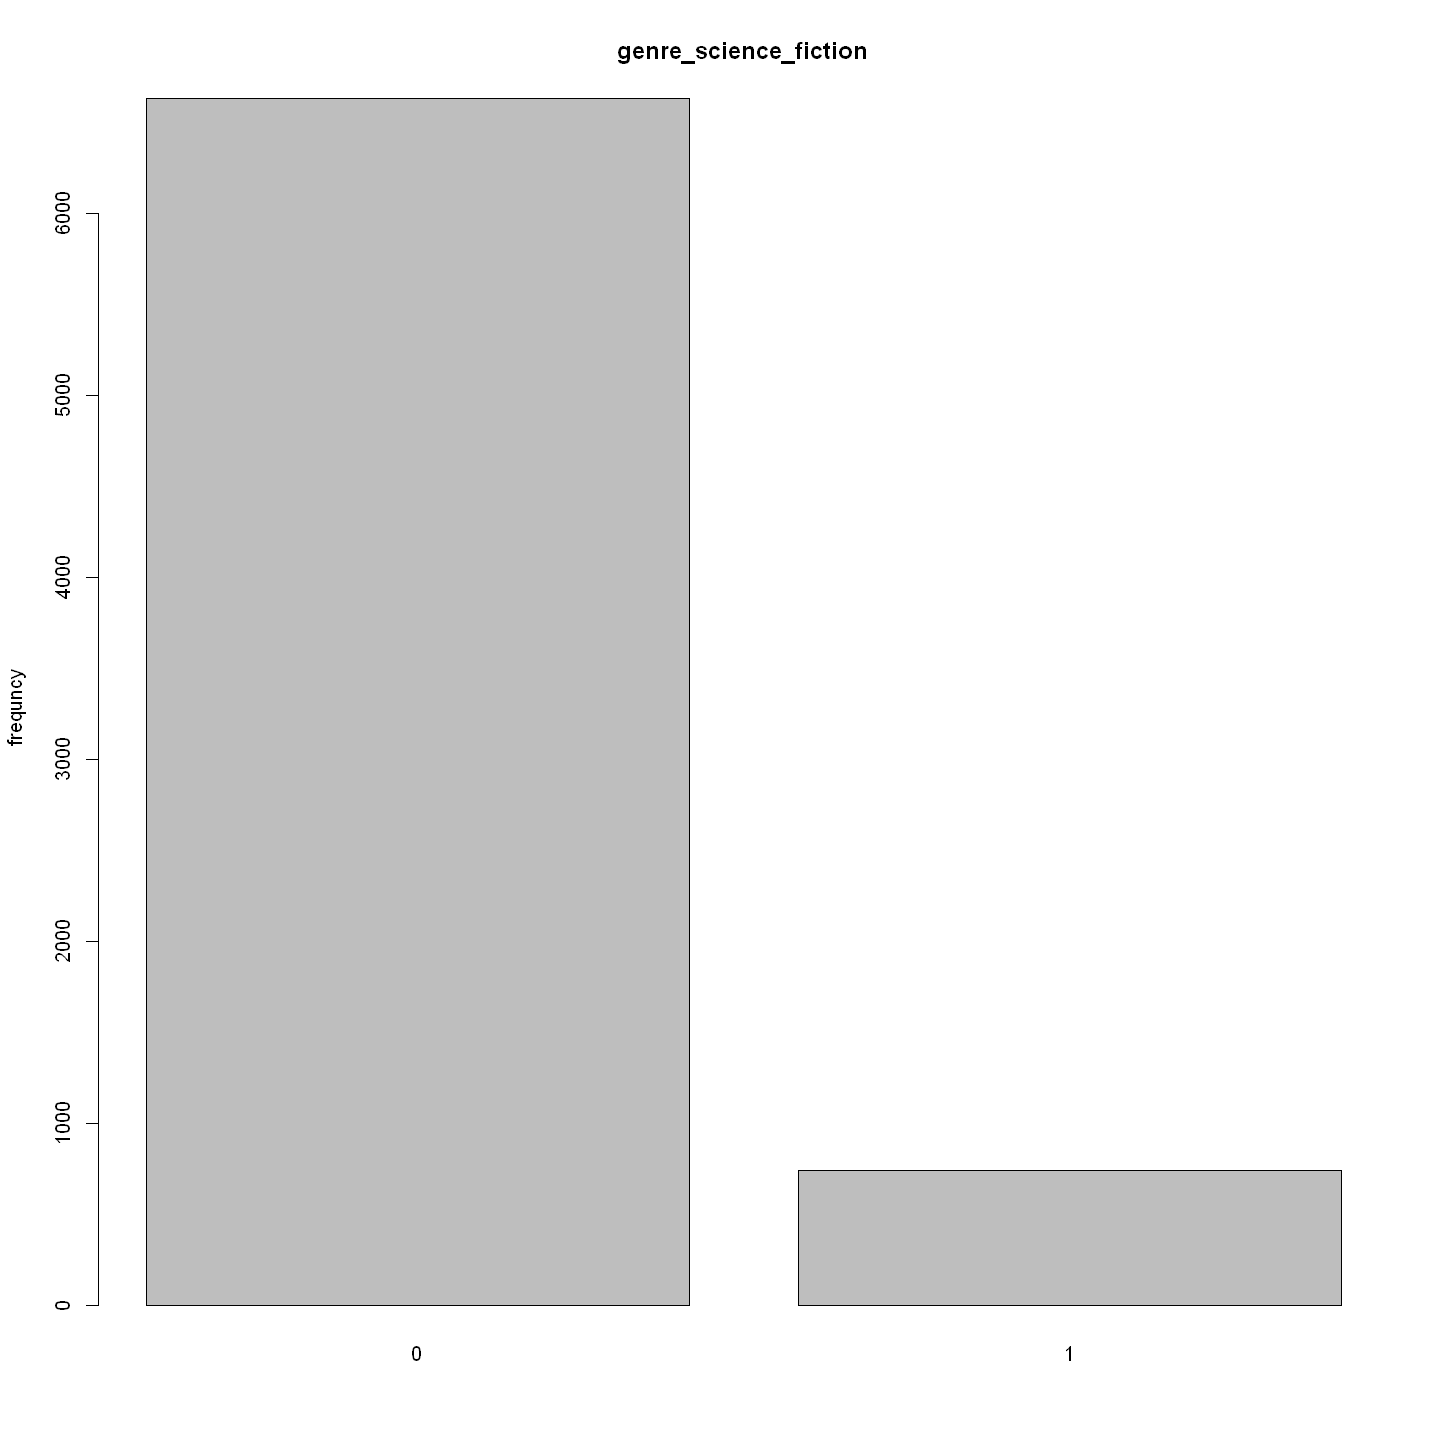

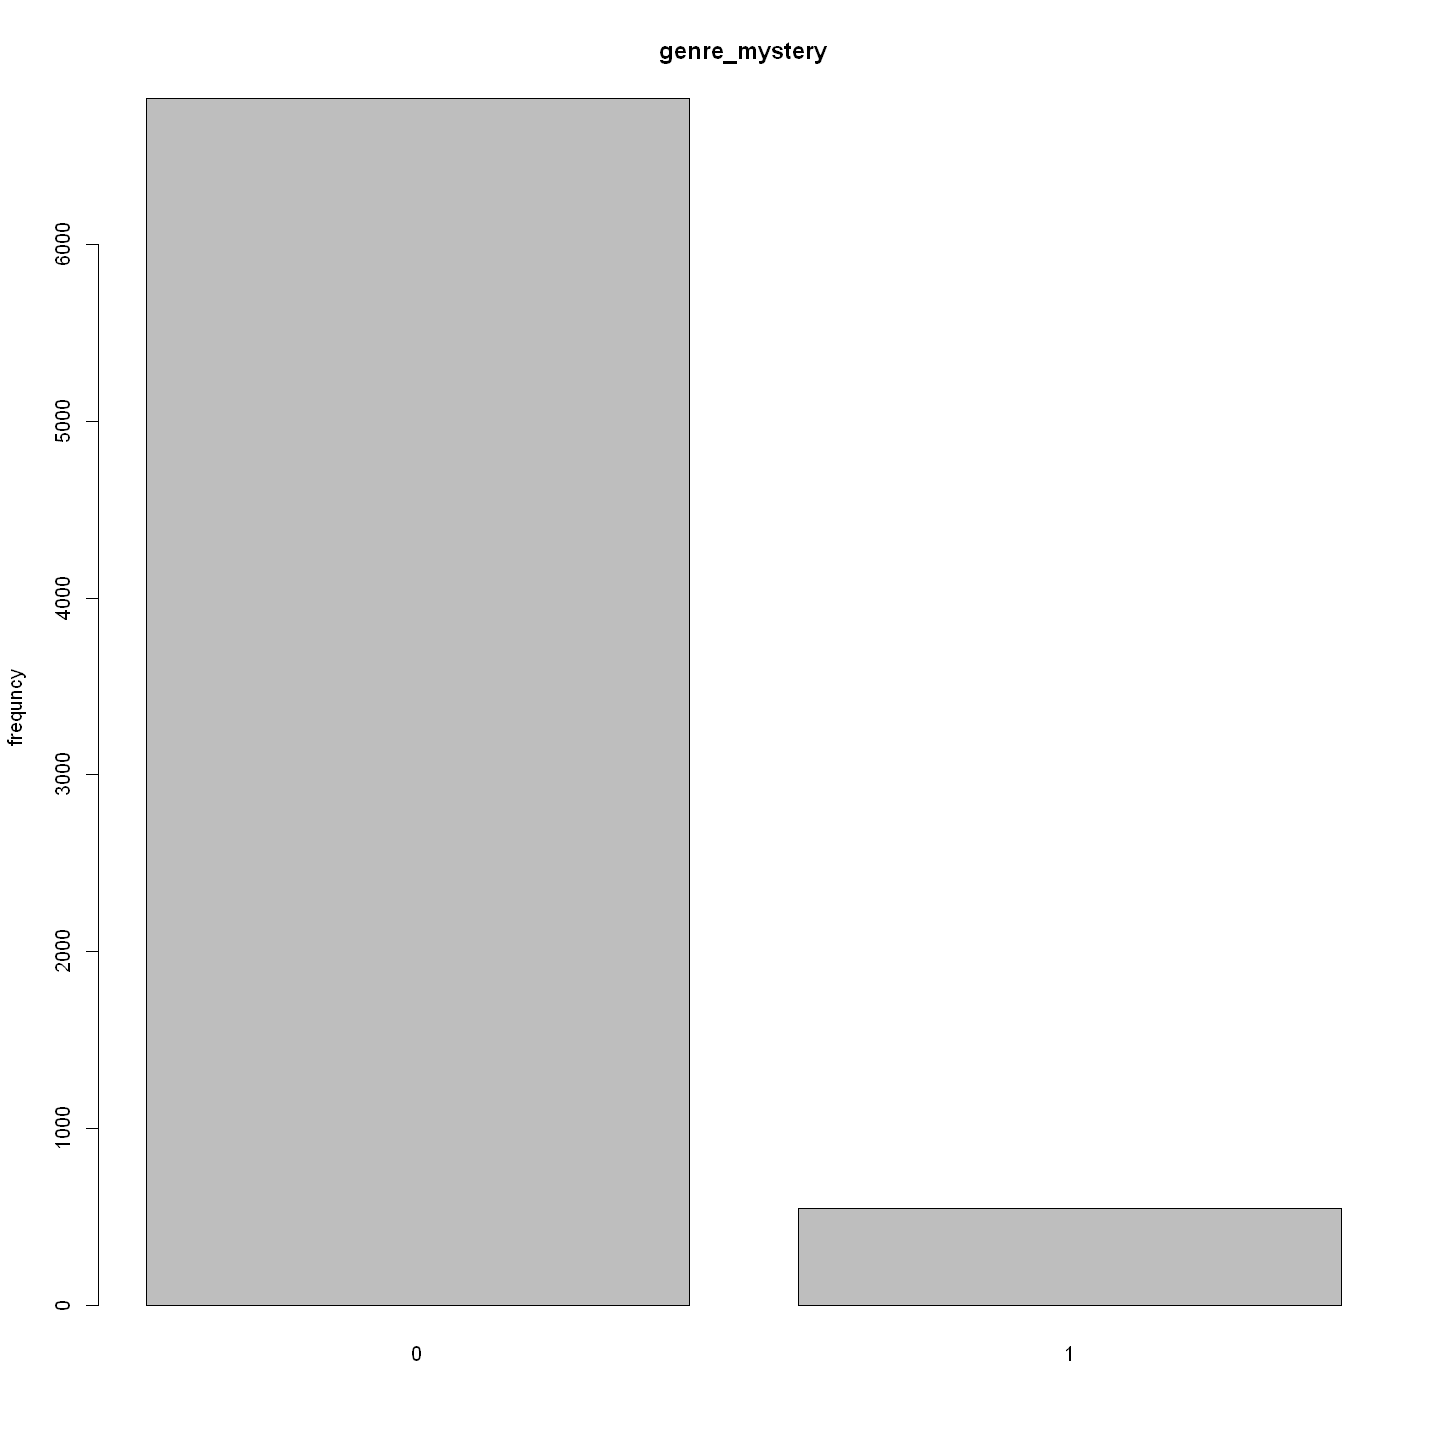

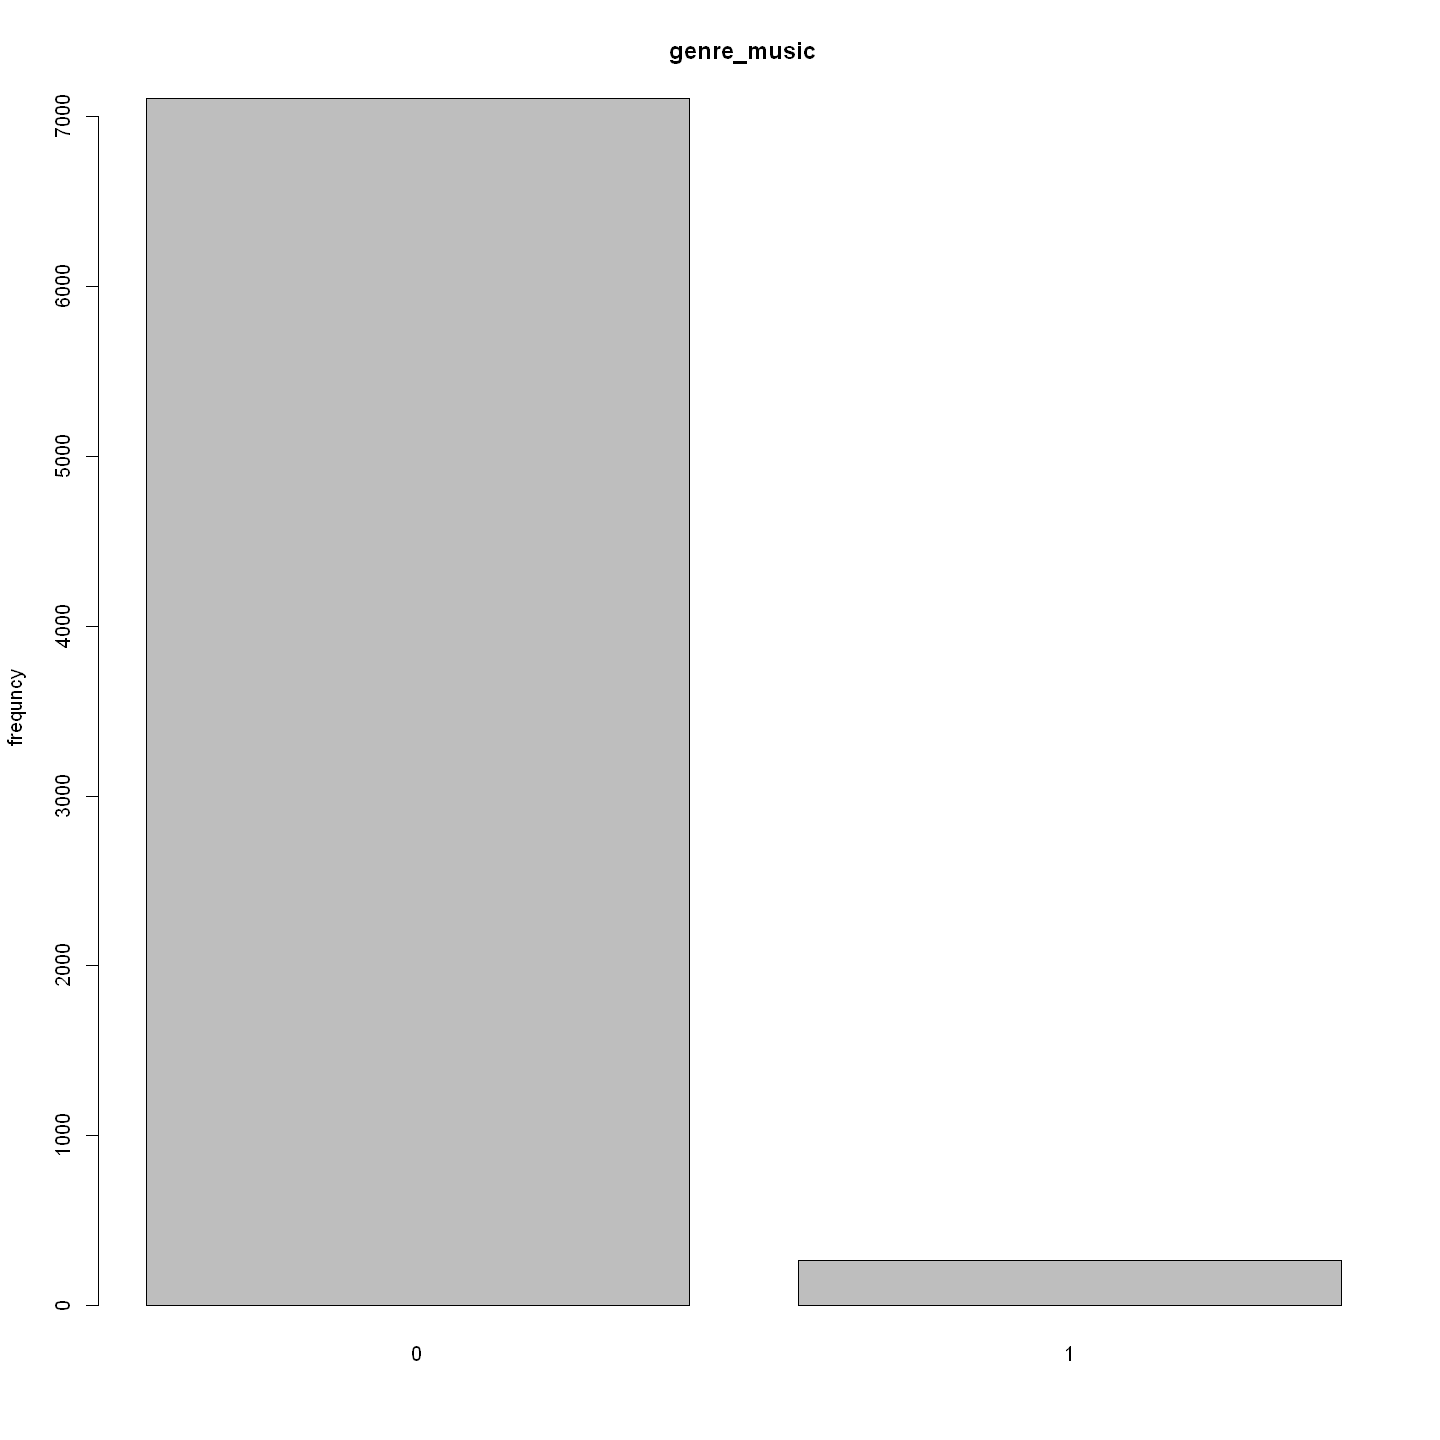

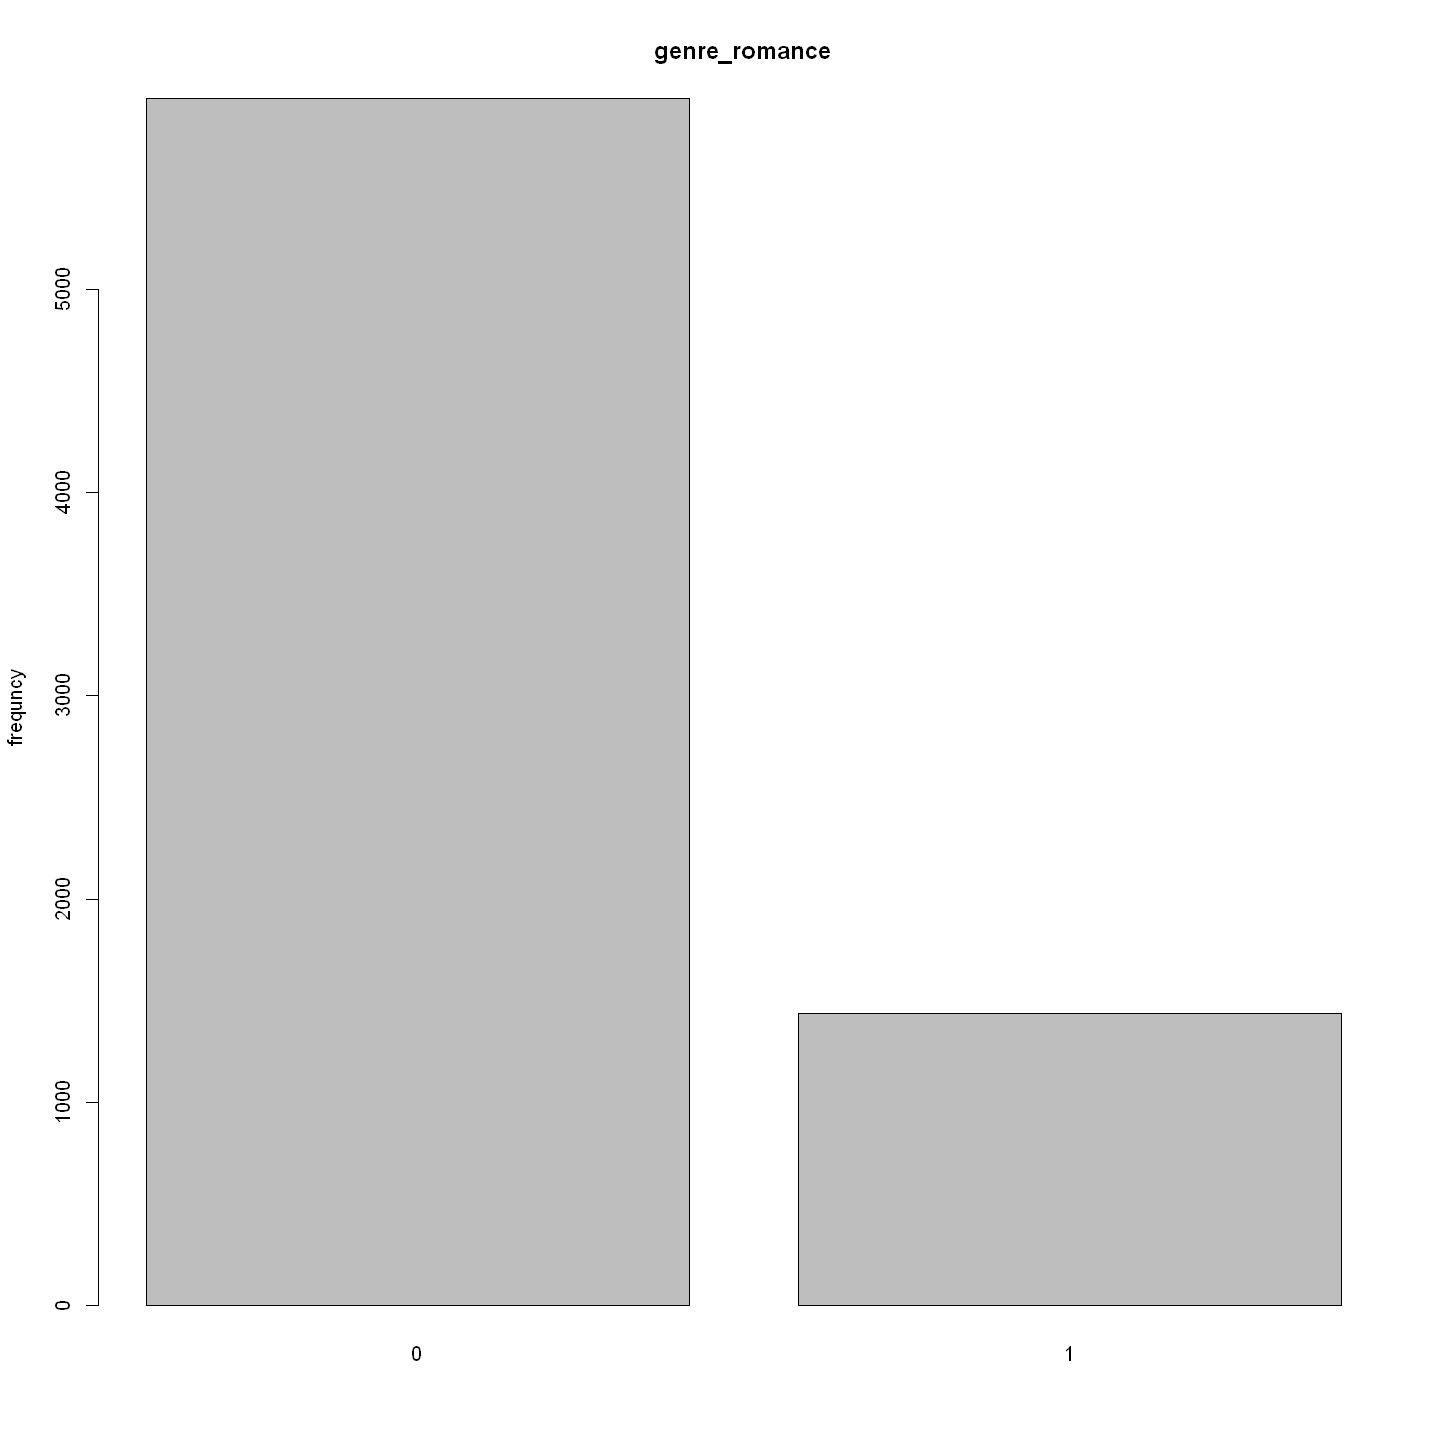

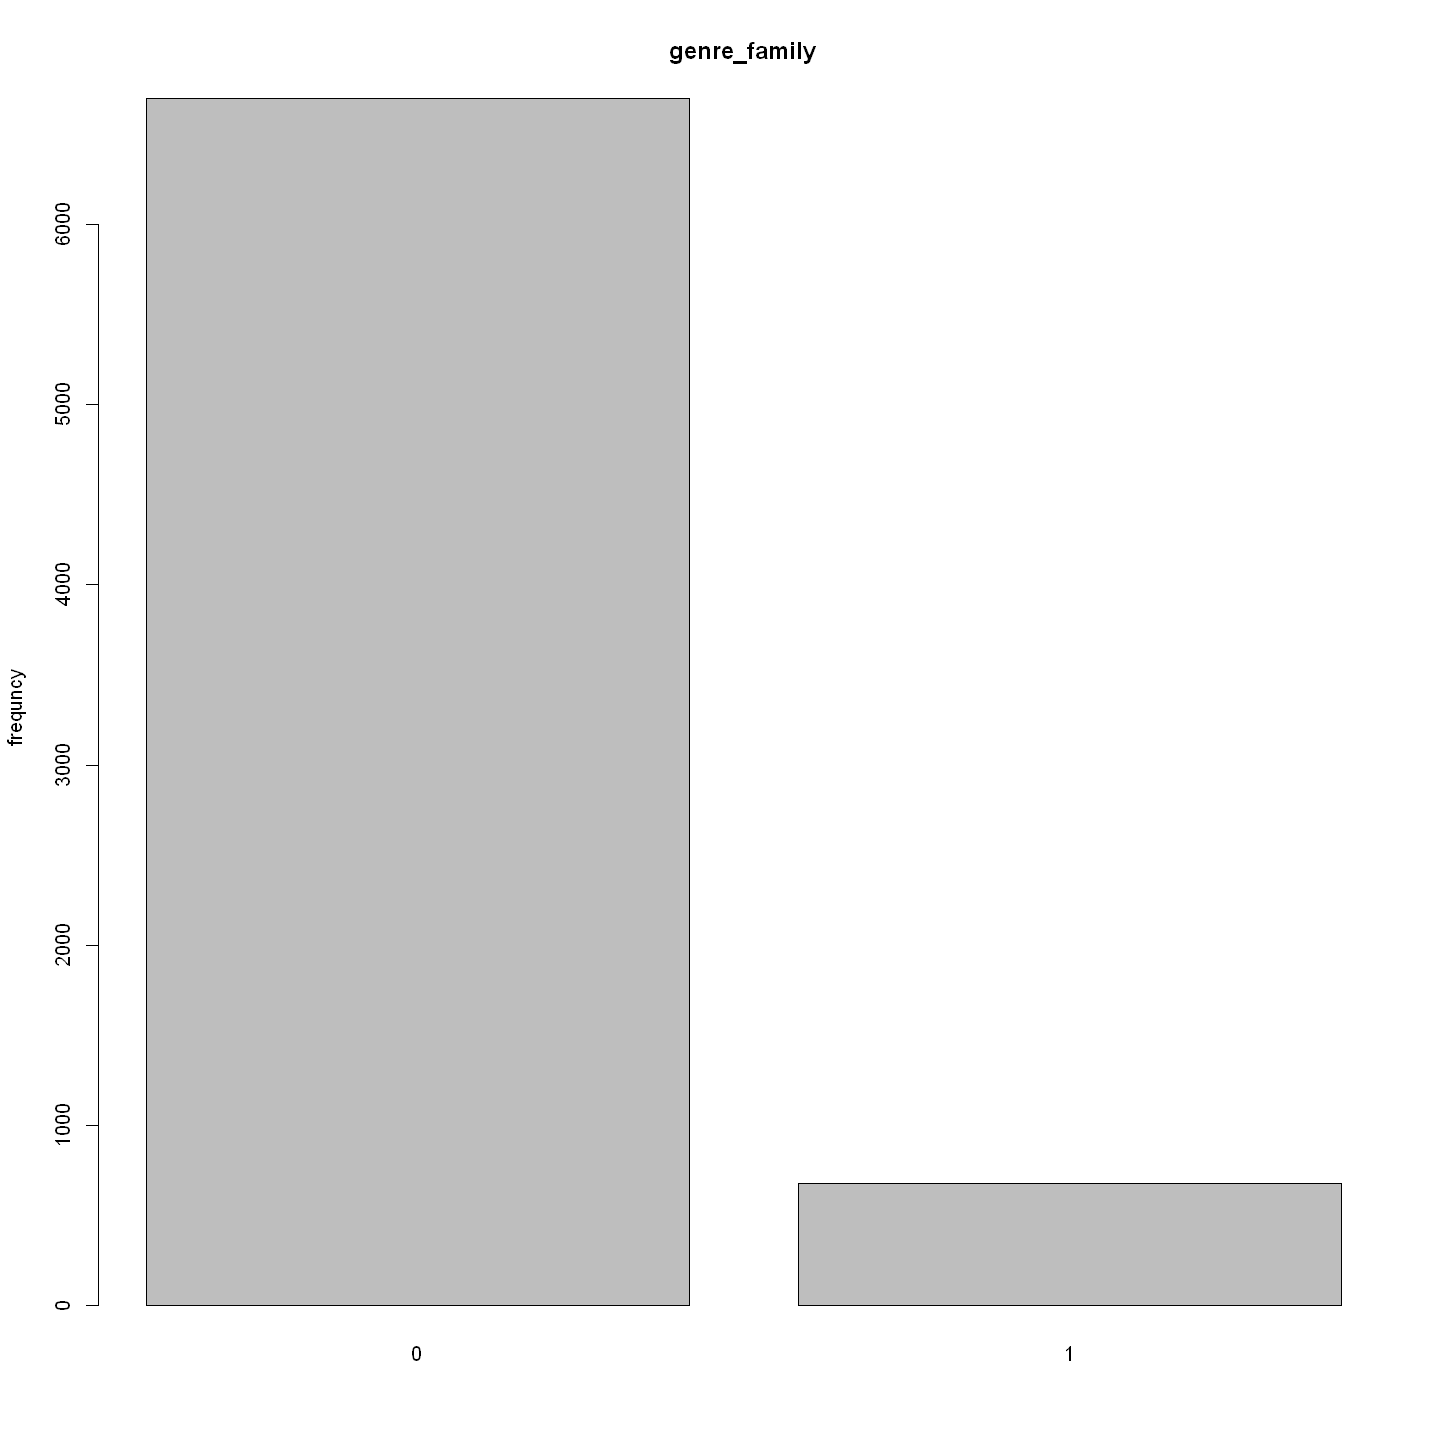

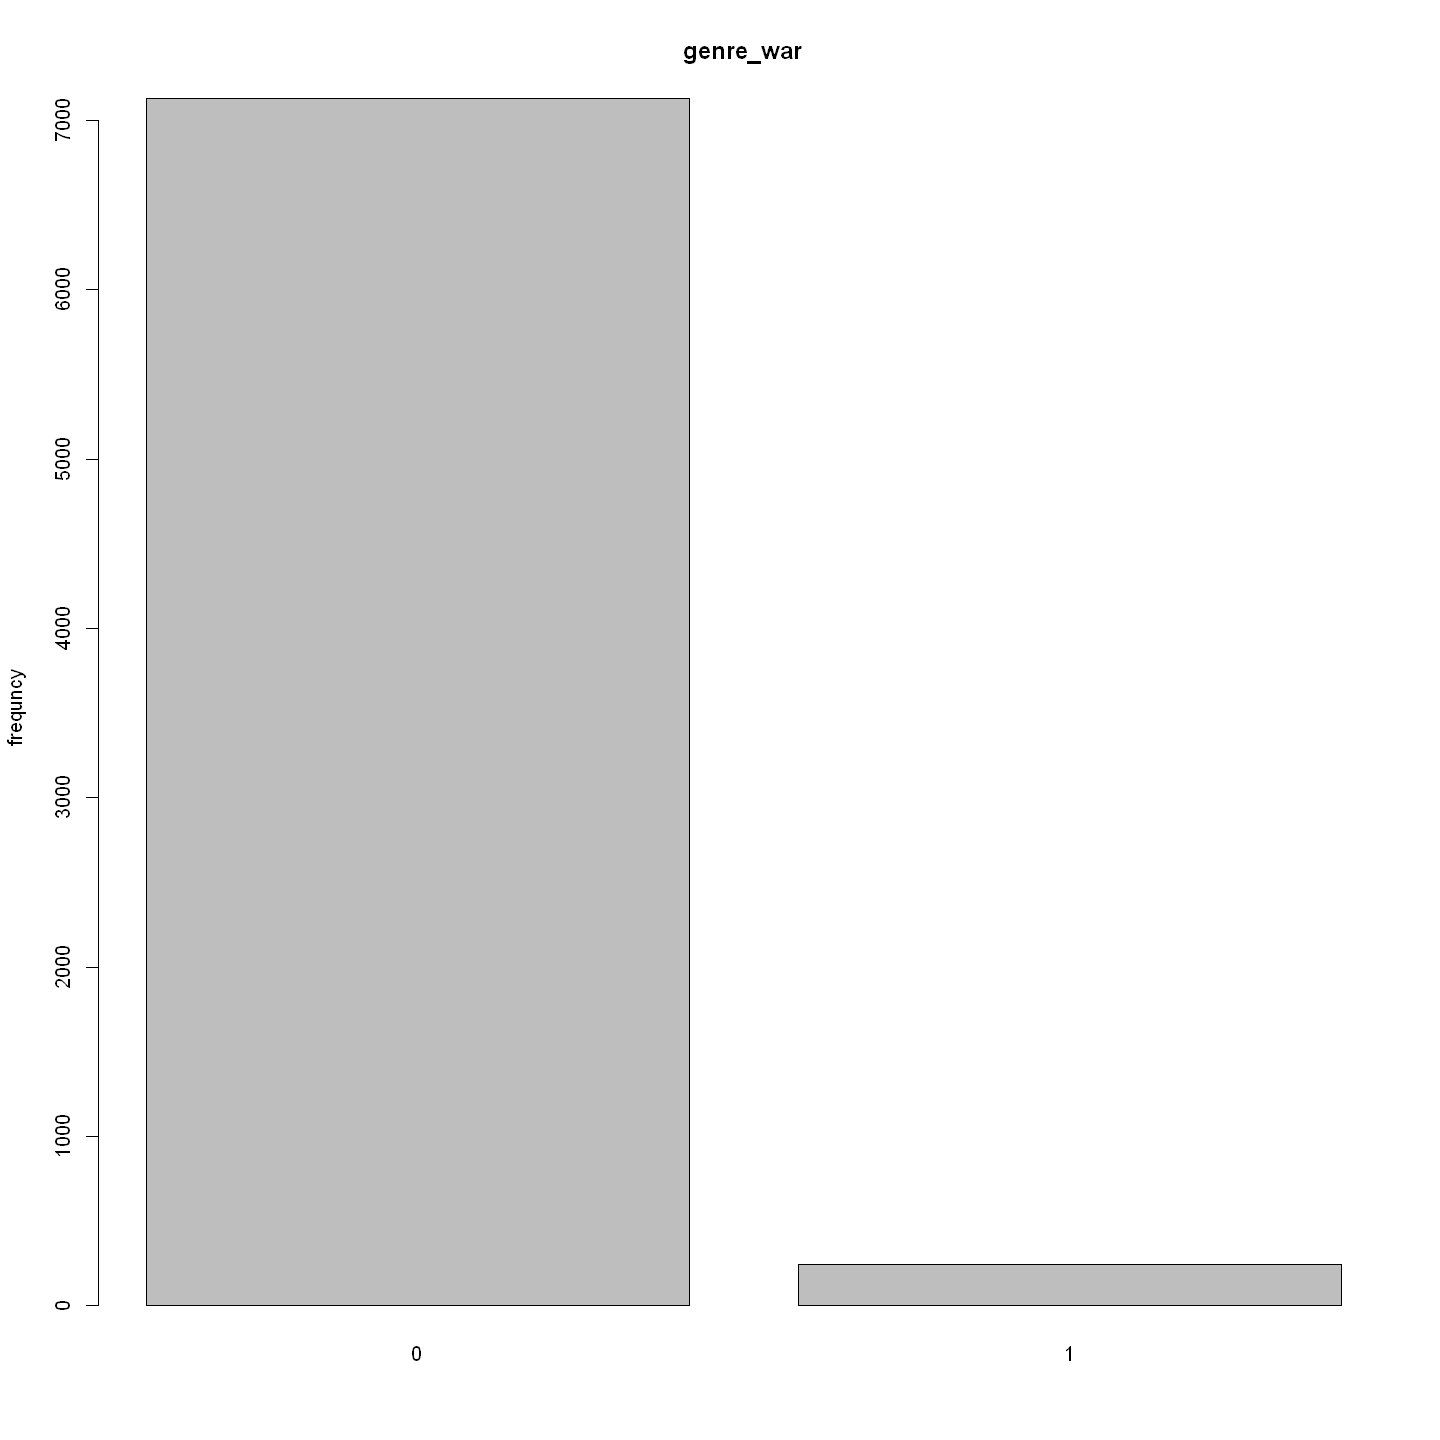

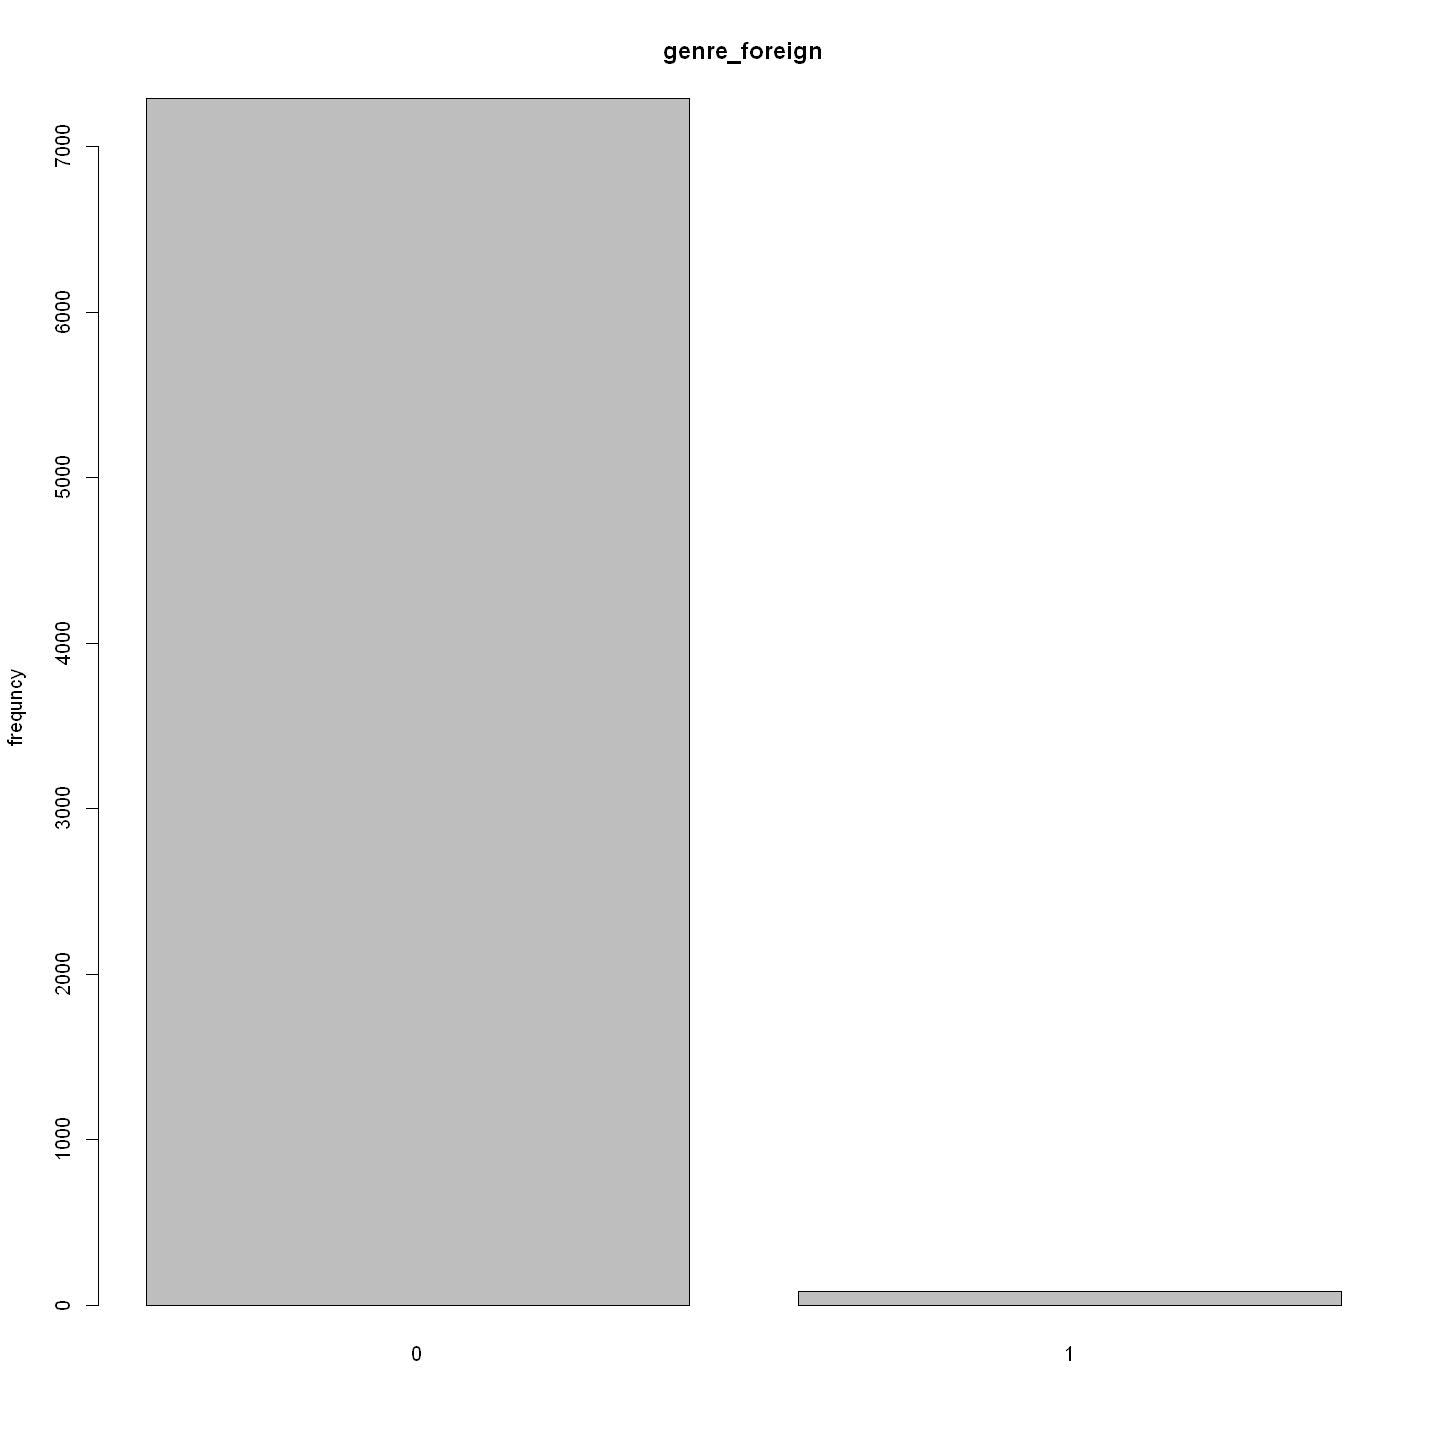

In [37]:
for (v in names(movies_ff_v[c(3,4,7,9:17,19:39,45:85)])) { barplot(table(movies_ff_v[v]),ylab='frequncy',main=v)}



In [63]:
for (v in names(movies_ff_v[c(2,6,8,18,40:44)]))
    hist(movies_ff_v[v])

ERROR: Error in hist.default(movies_ff_v[v]): 'x' must be numeric


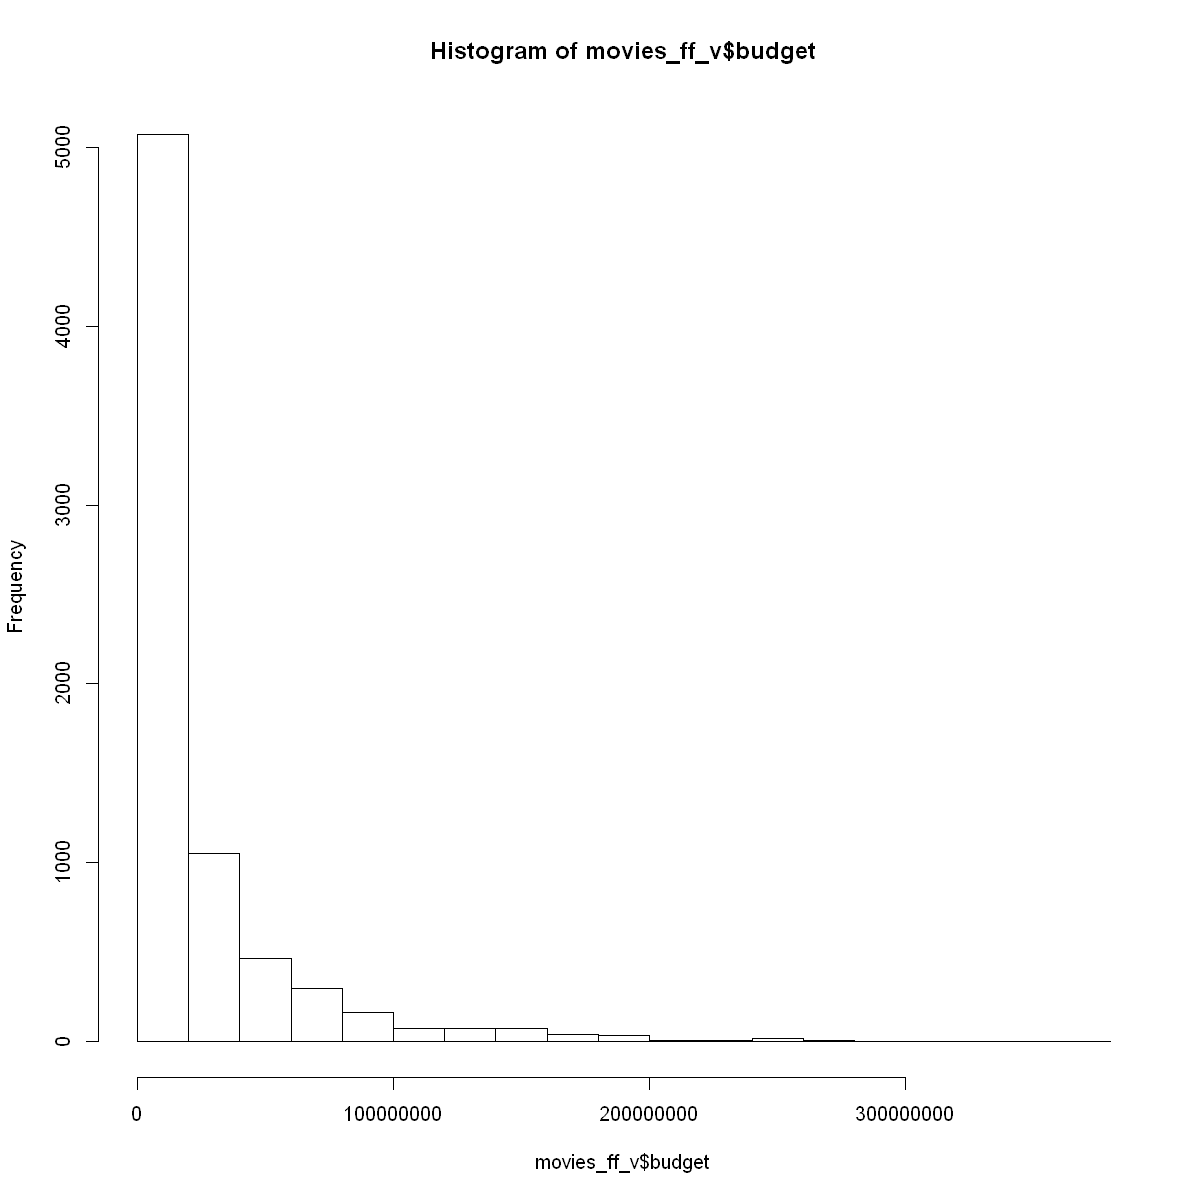

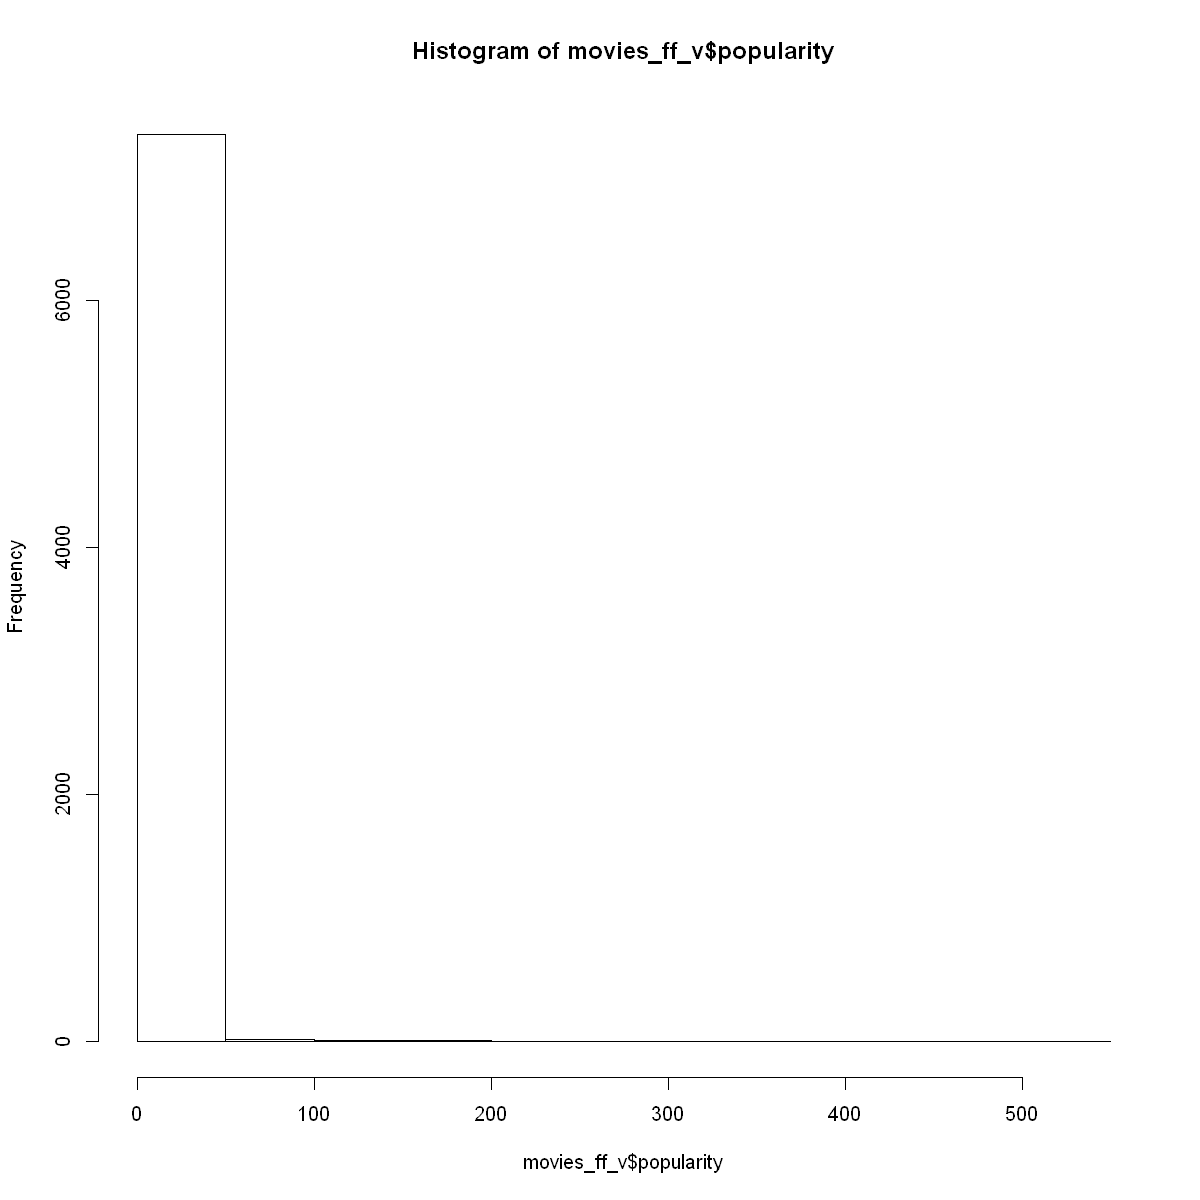

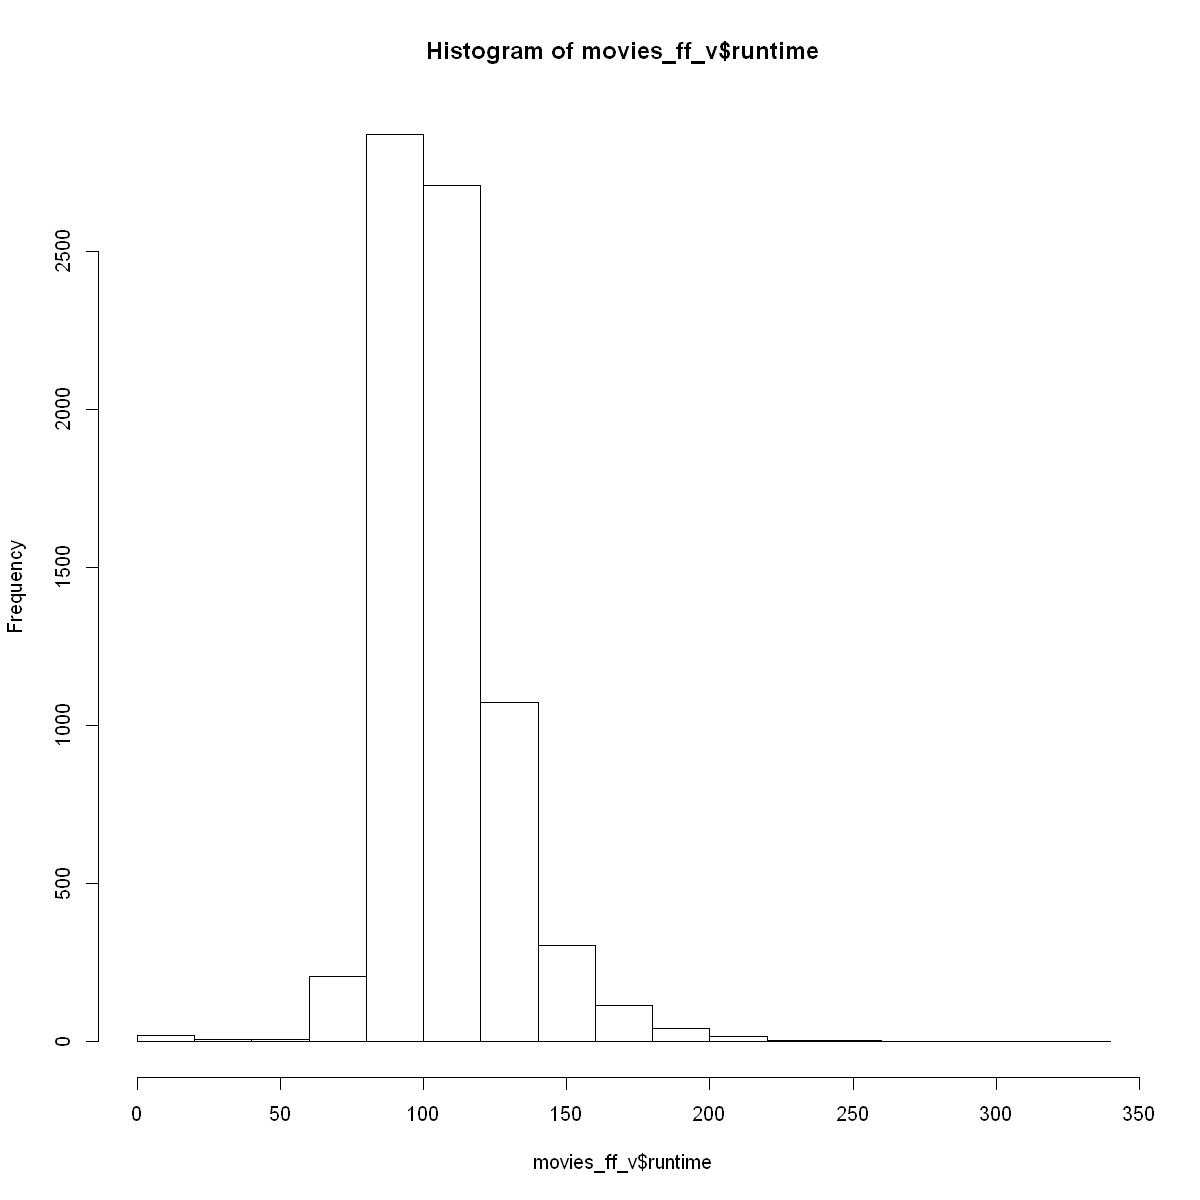

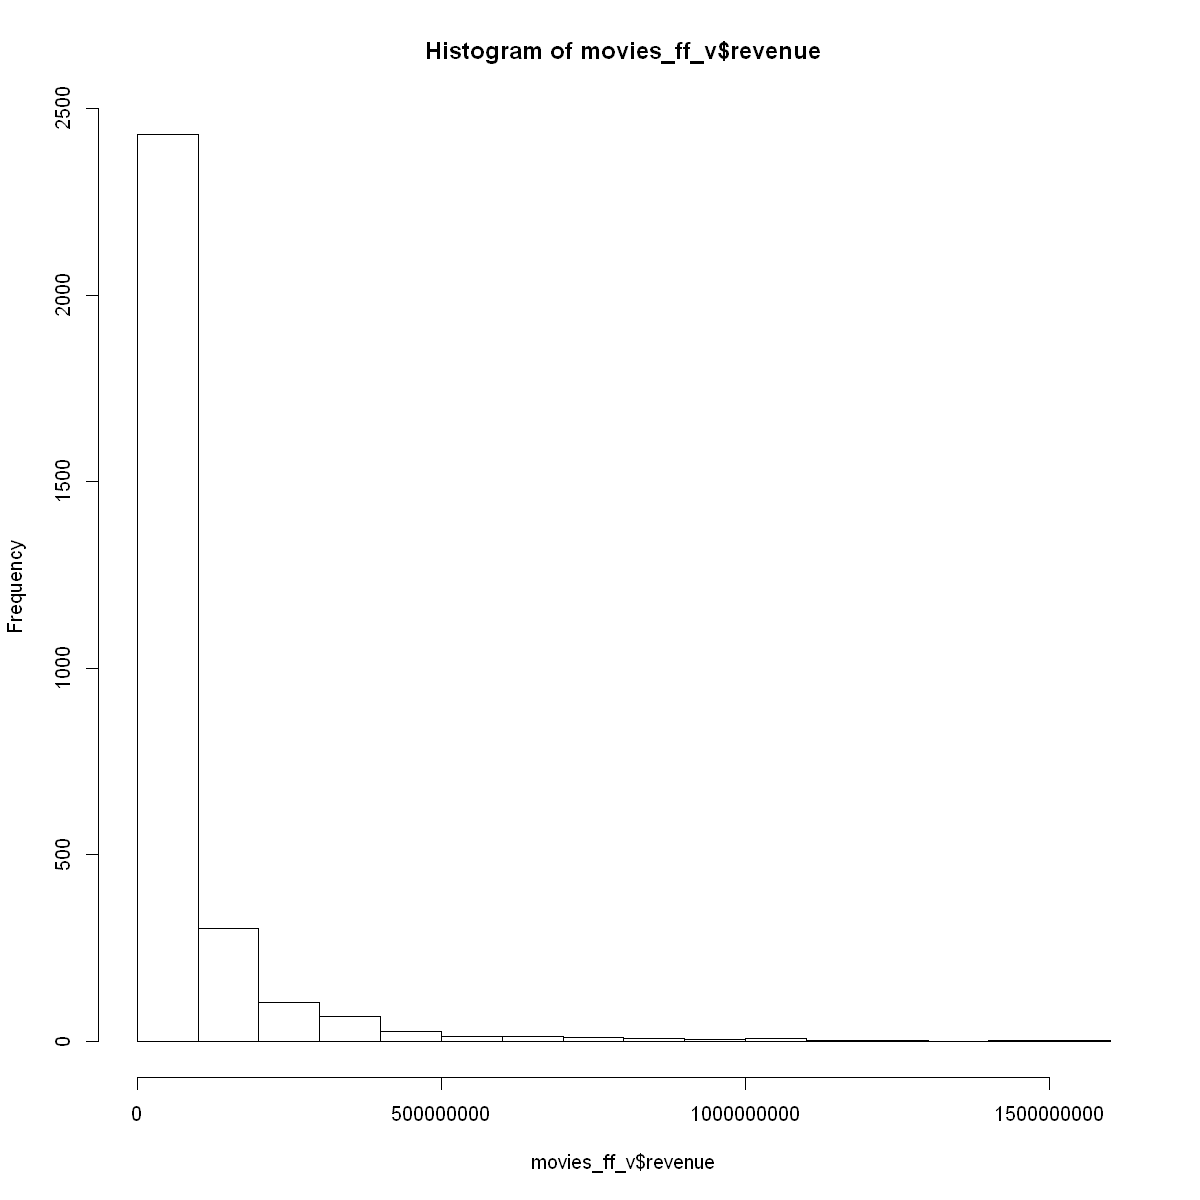

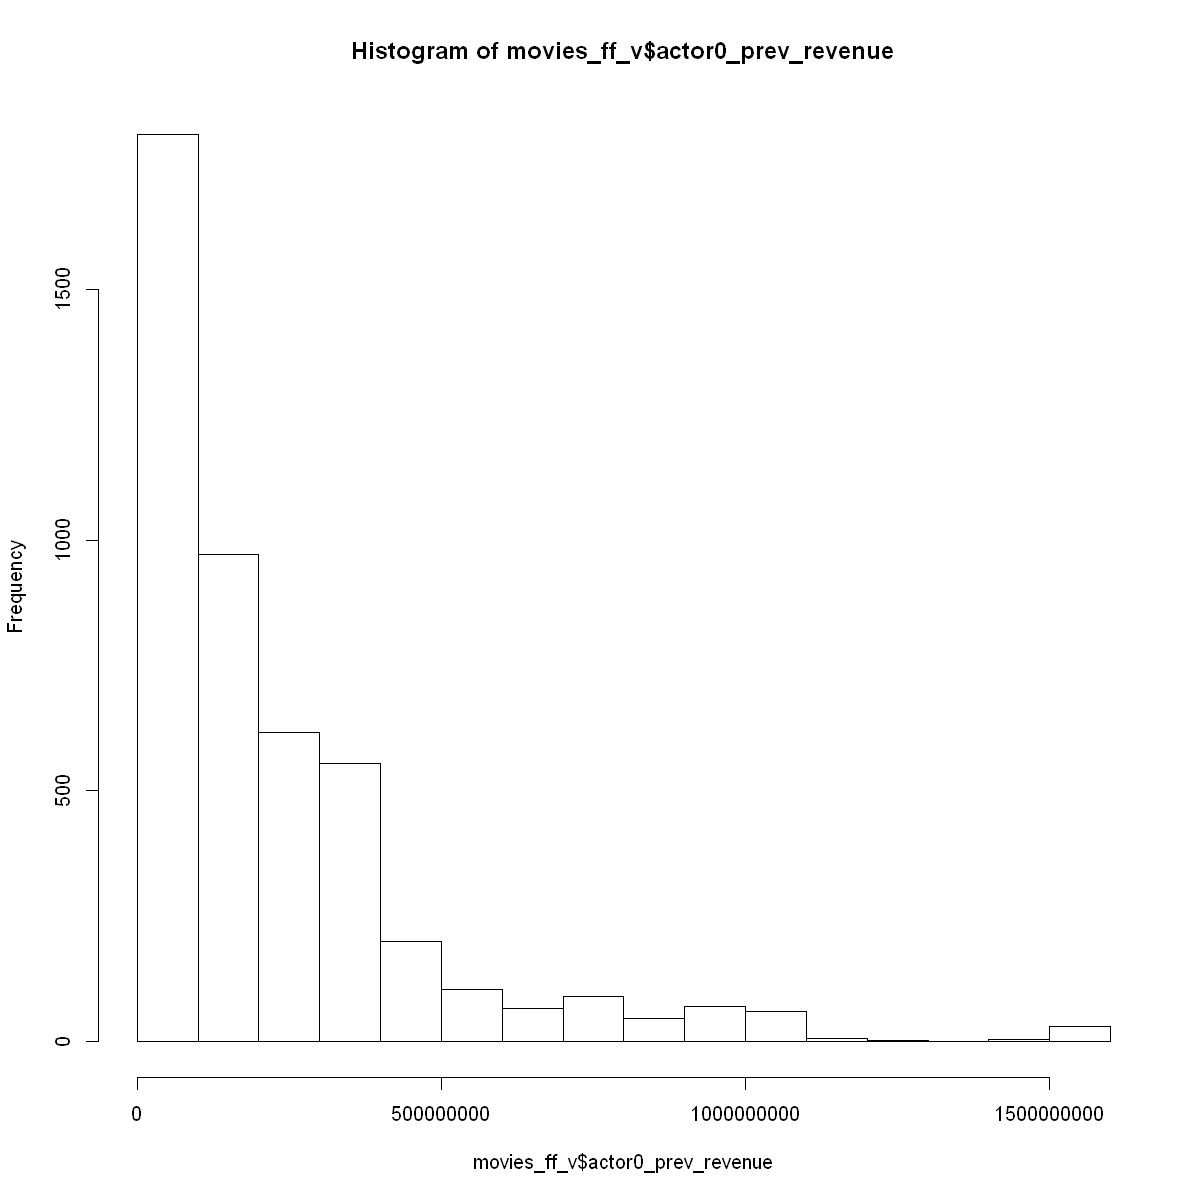

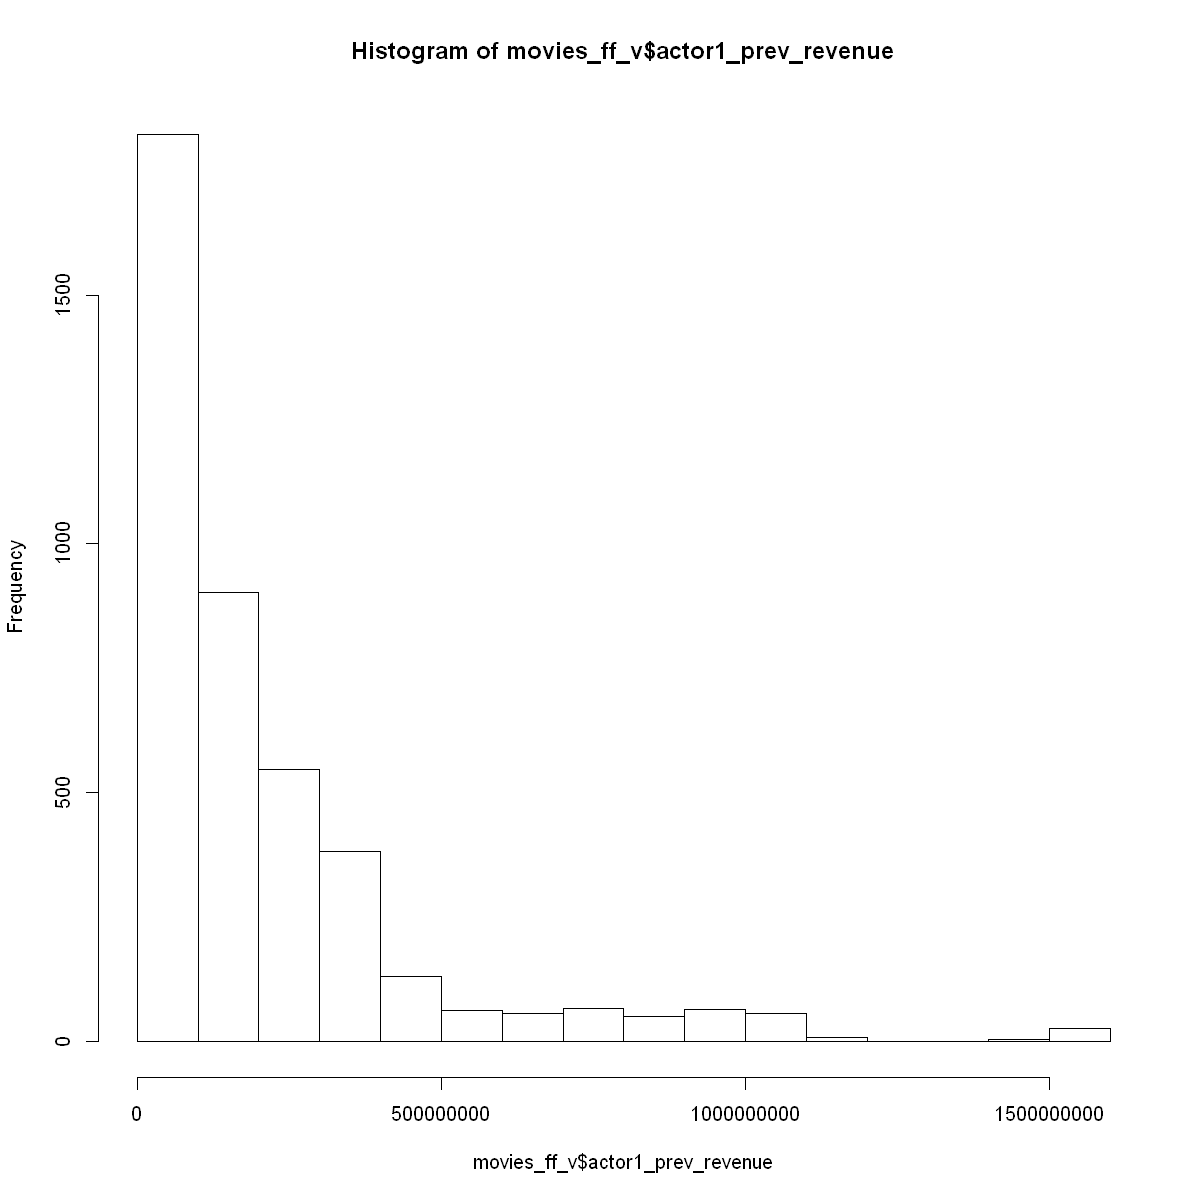

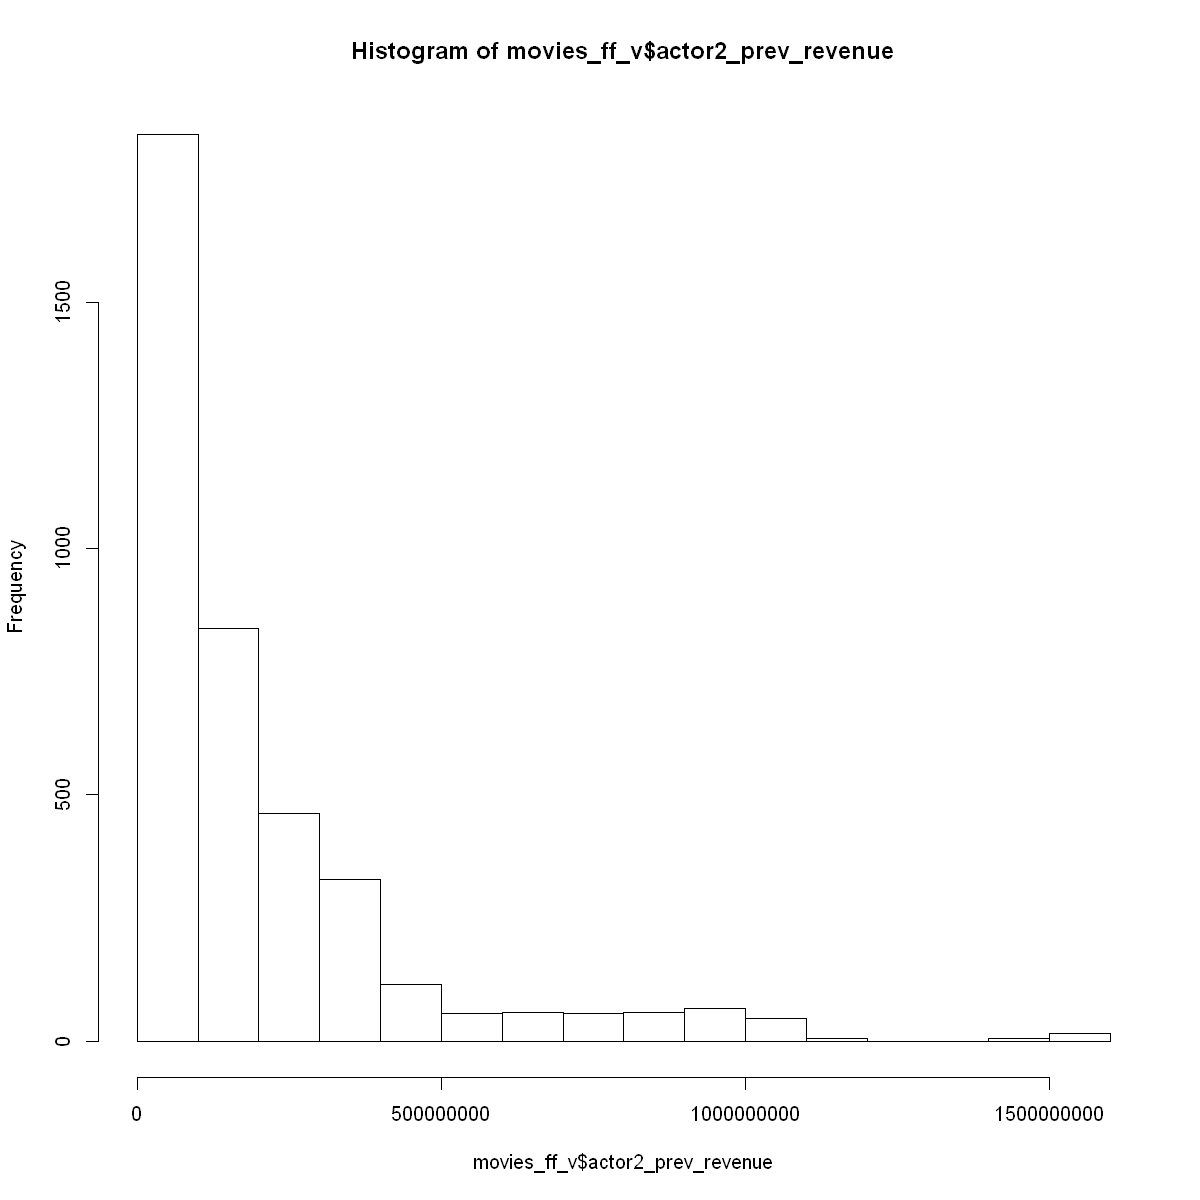

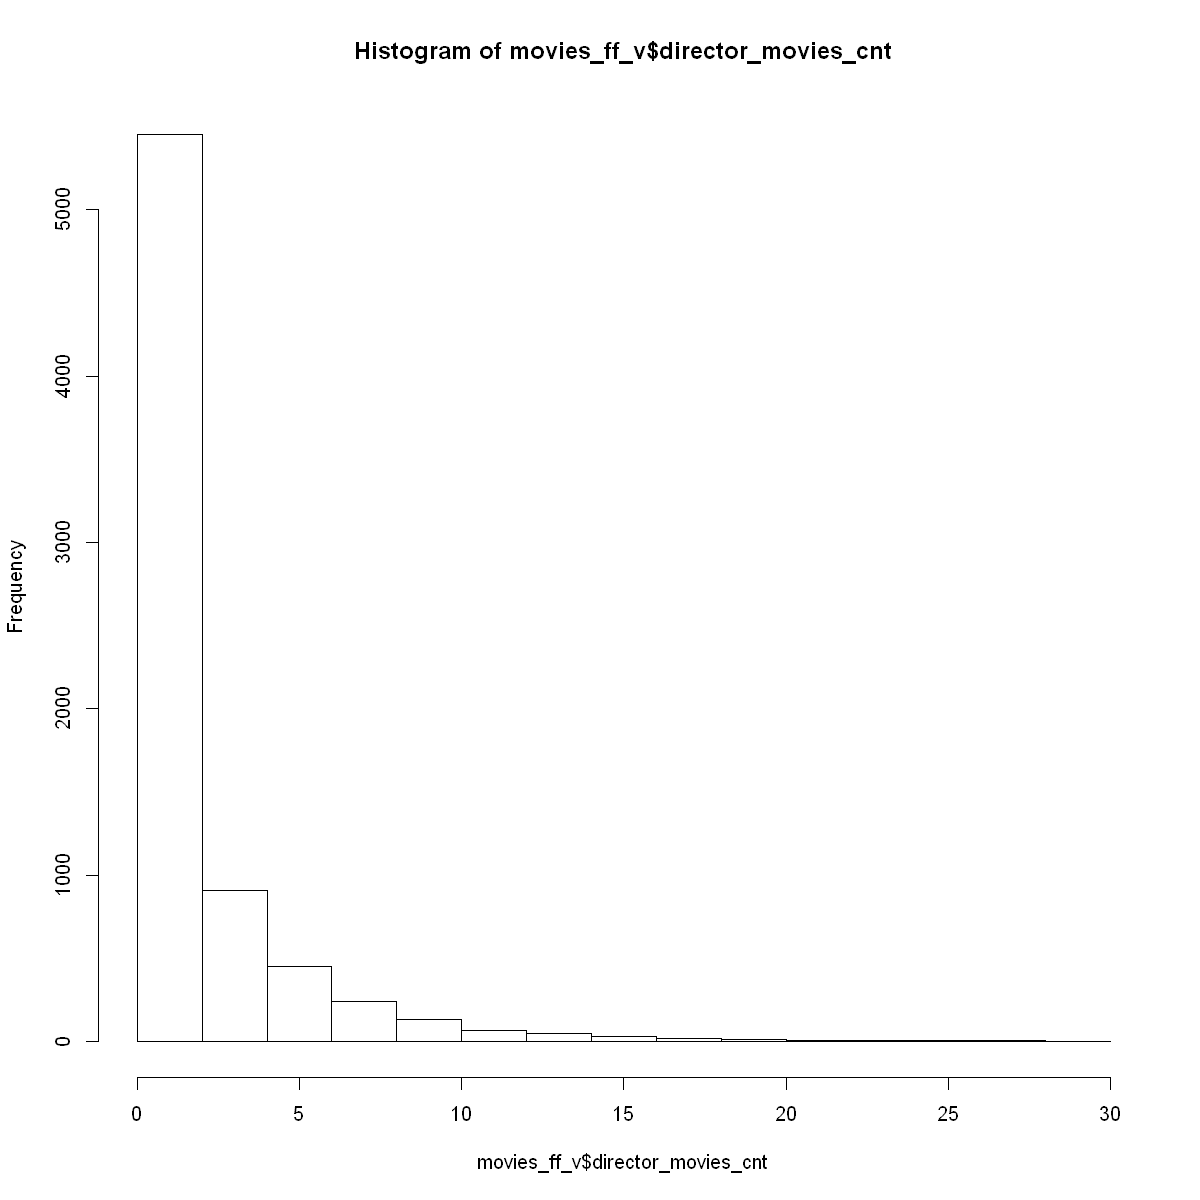

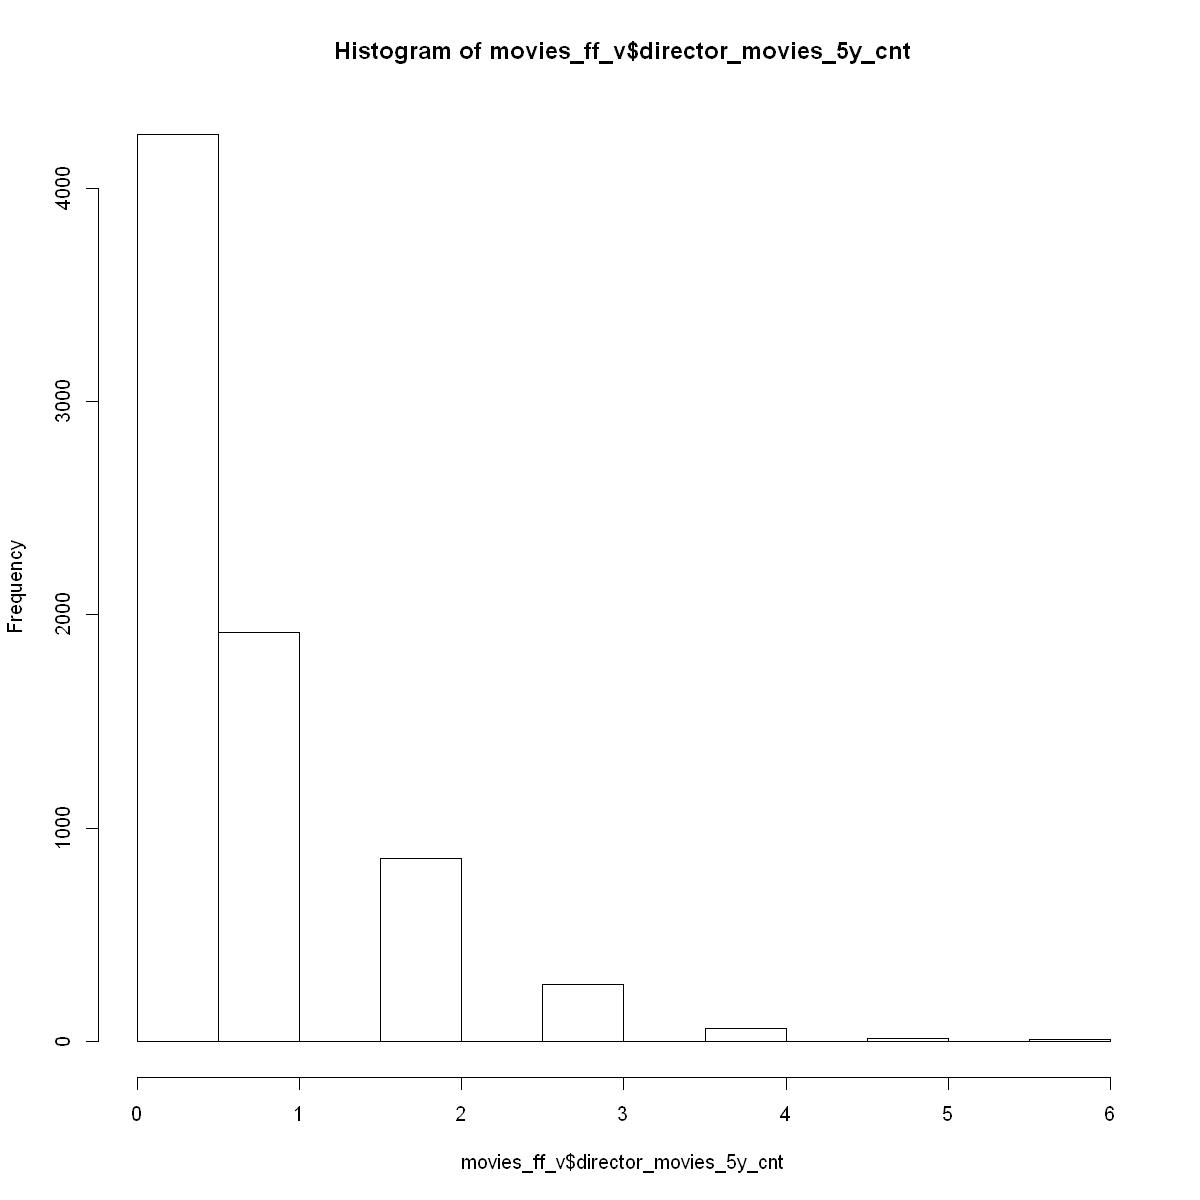

In [136]:

options(repr.plot.width = 10, repr.plot.height = 10)
hist(movies_ff_v$budget) #2
hist(movies_ff_v$popularity)#4
hist(movies_ff_v$runtime)#6
hist(movies_ff_v$revenue)#8
hist(movies_ff_v$actor0_prev_revenue)
hist(movies_ff_v$actor1_prev_revenue)
hist(movies_ff_v$actor2_prev_revenue)
hist(movies_ff_v$director_movies_cnt)
hist(movies_ff_v$director_movies_5y_cnt)


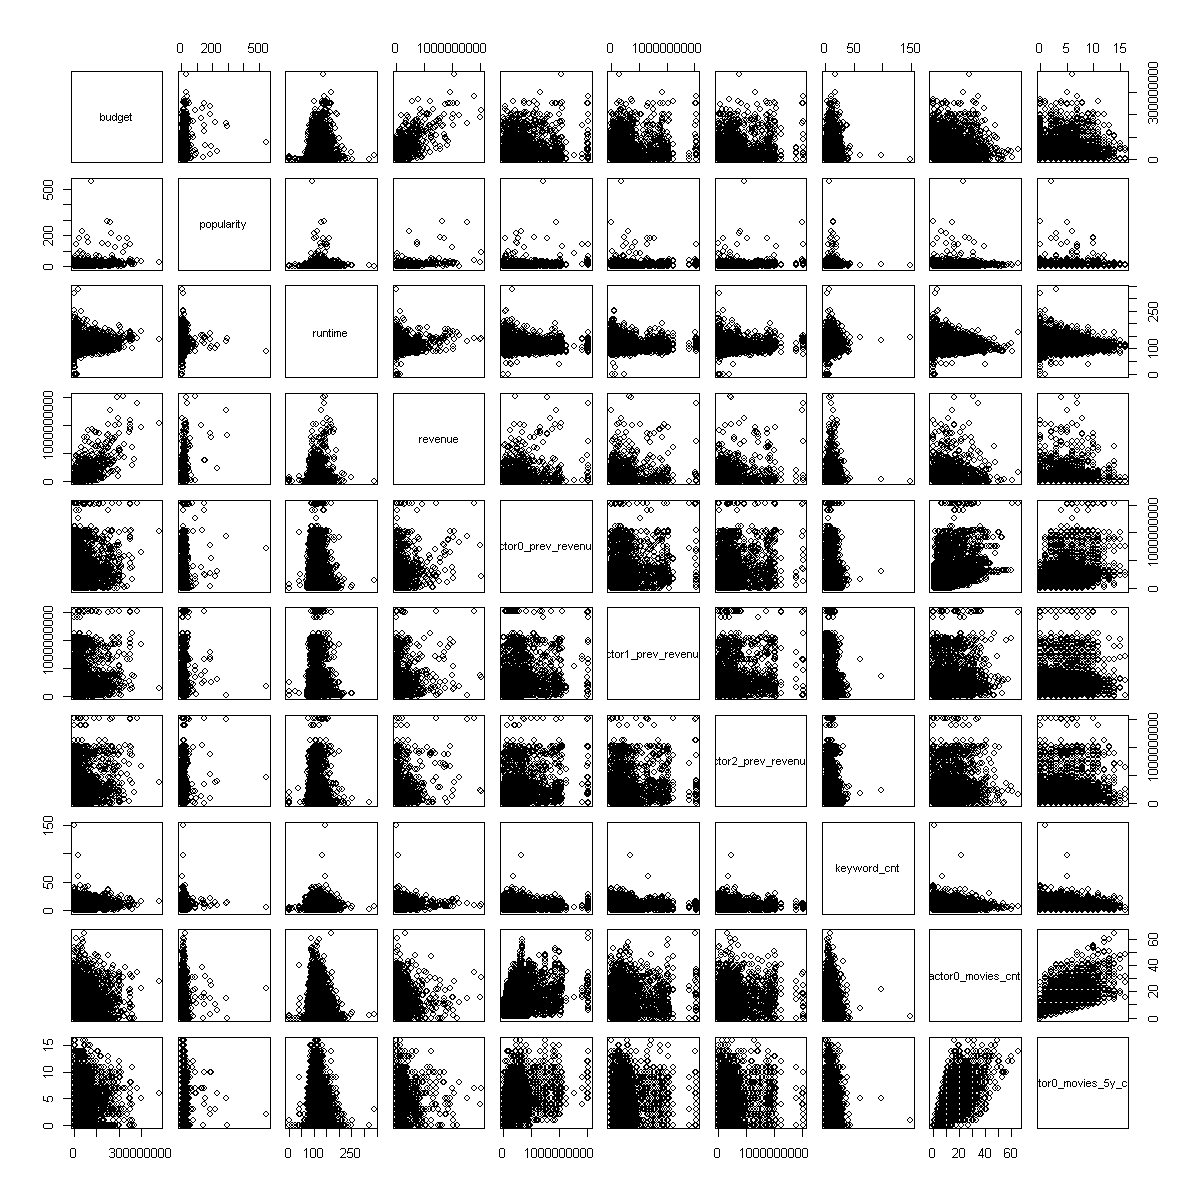

In [164]:
movies.cor <- movies_ff_v %>% select(budget,popularity,runtime,revenue,actor0_prev_revenue,actor1_prev_revenue,actor2_prev_revenue,
                 keyword_cnt,actor0_movies_cnt,actor0_movies_5y_cnt)
options(repr.plot.width = 10, repr.plot.height = 10)
pairs(movies.cor)

Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."
Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


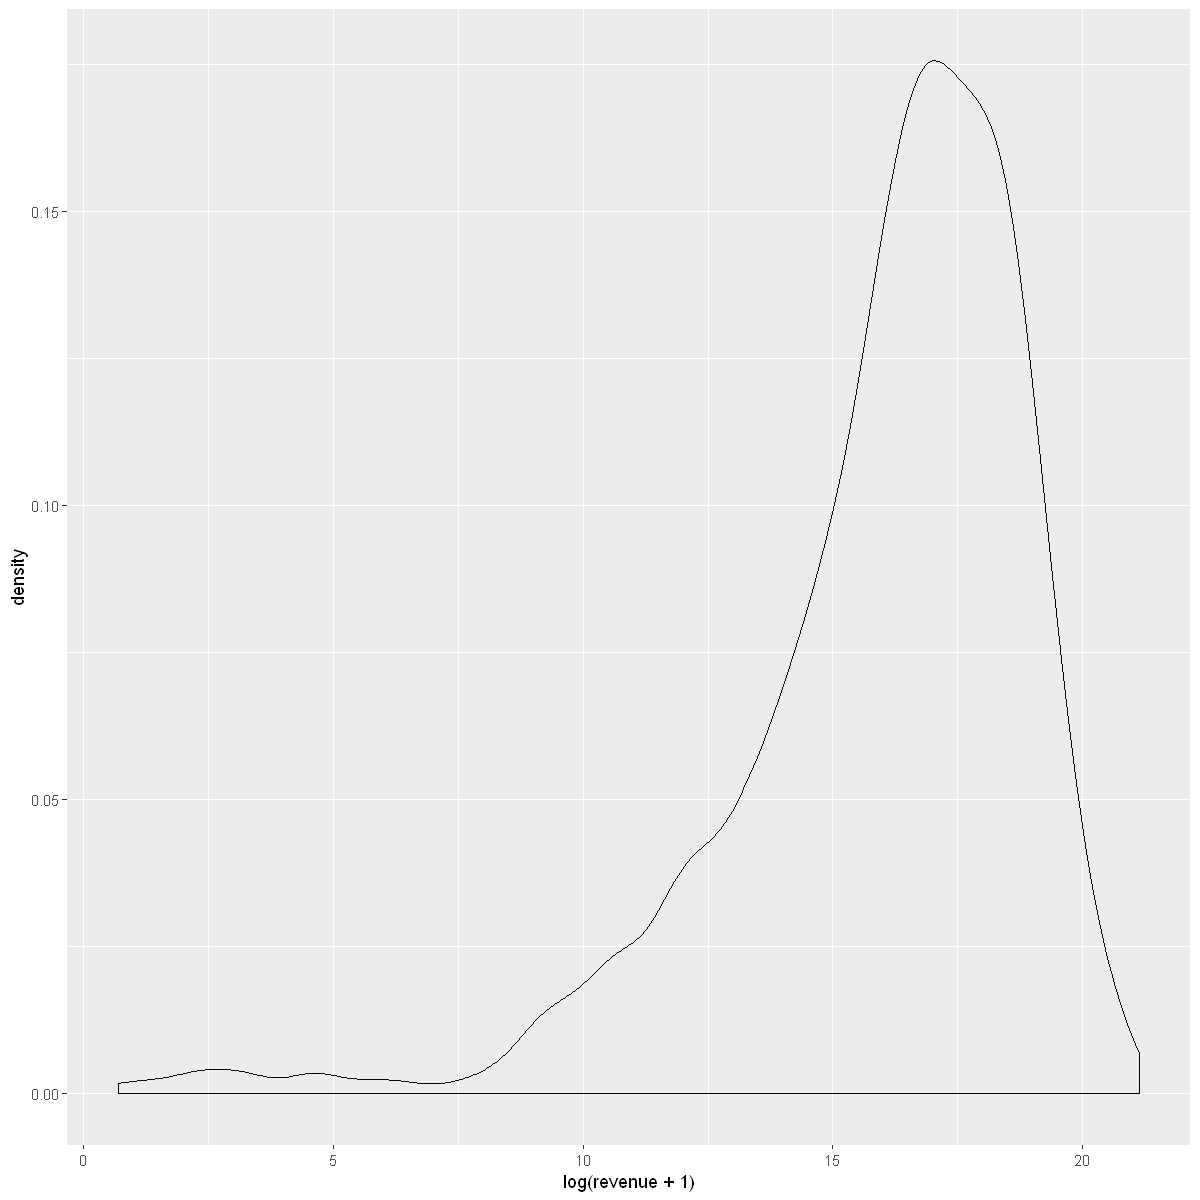

Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


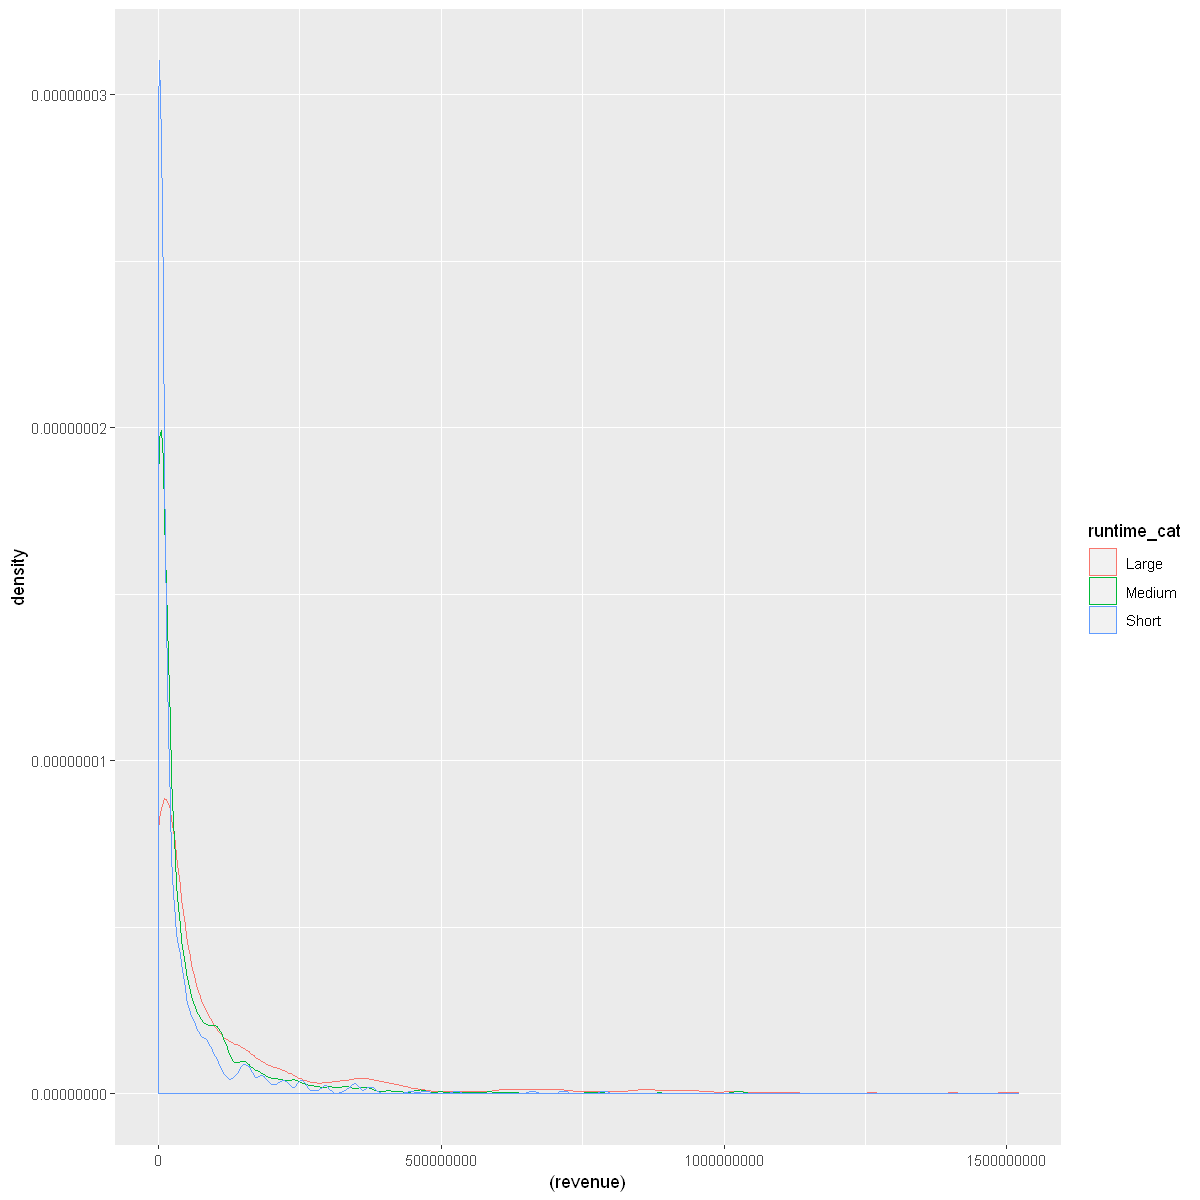

Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


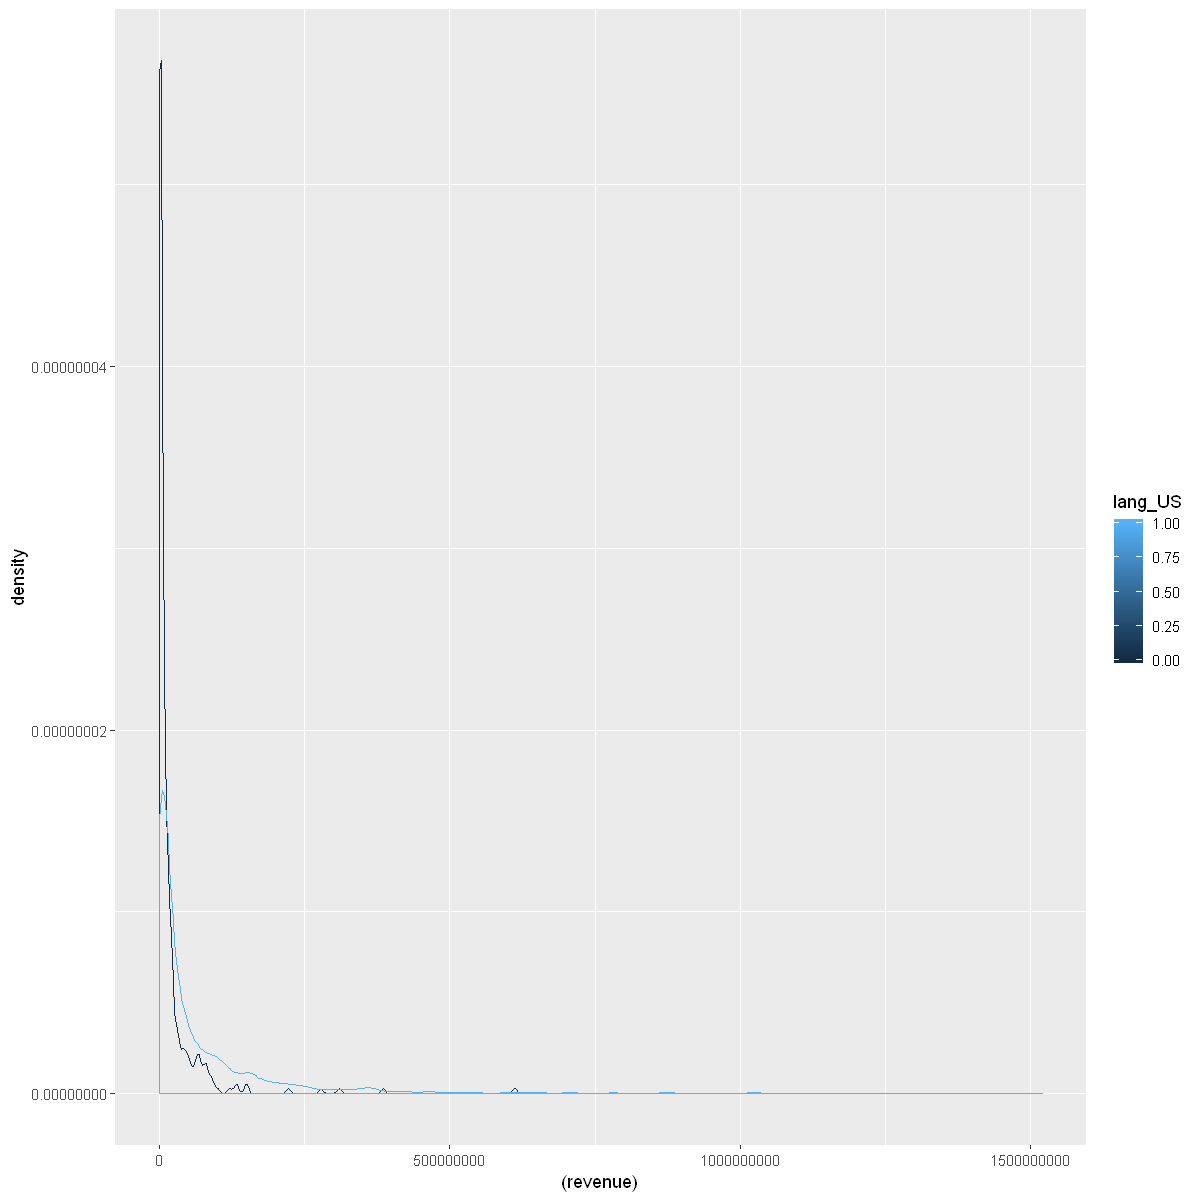

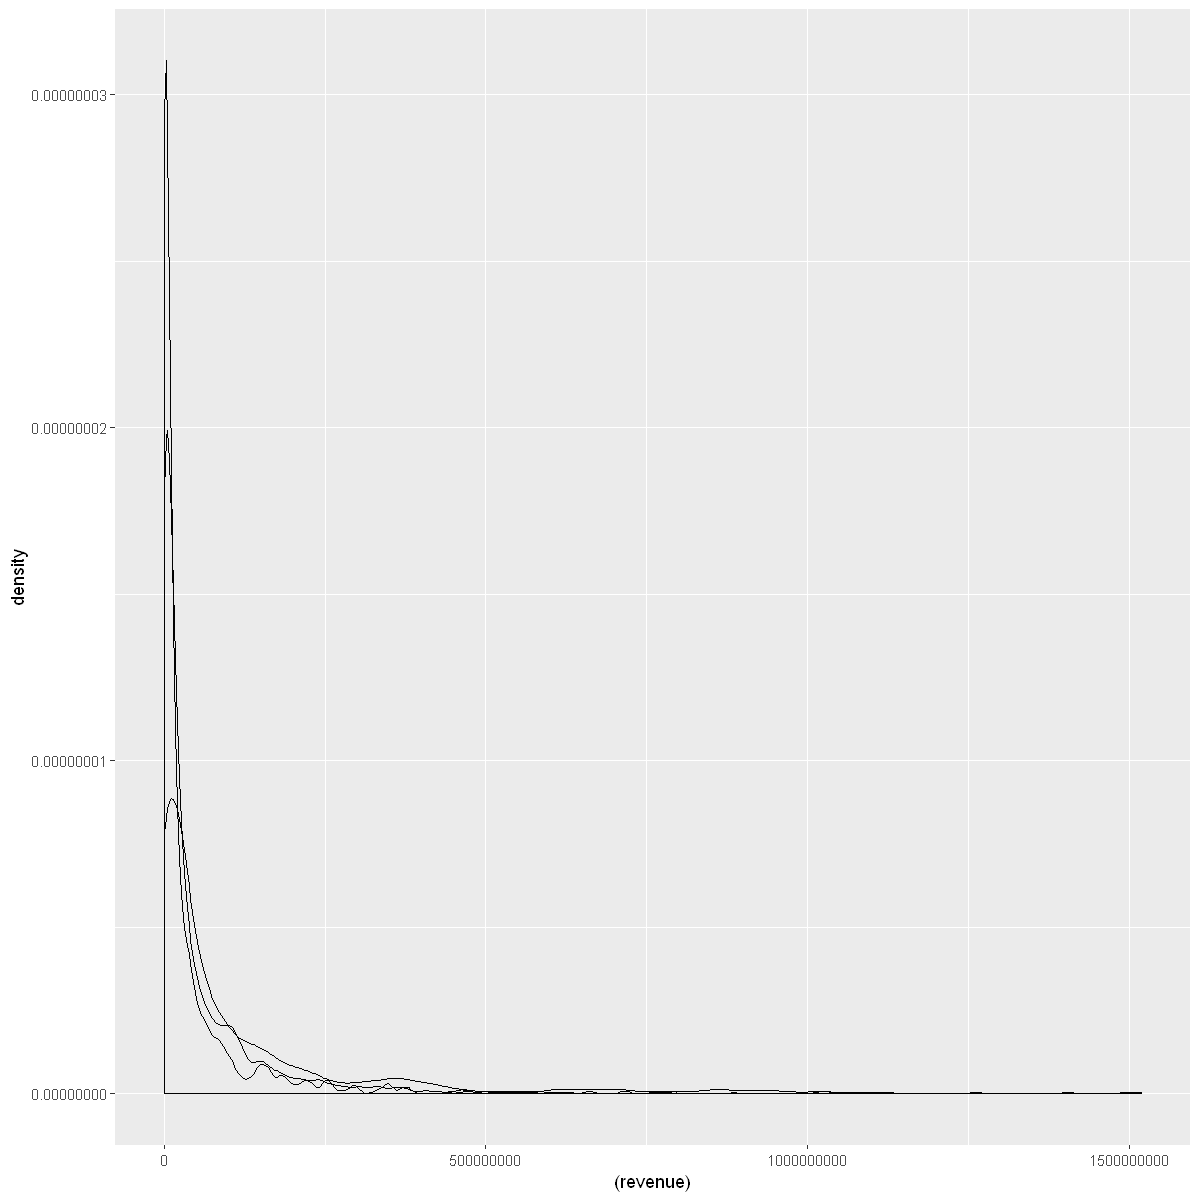

In [163]:

library(ggplot2)
ggplot(data=movies_ff_v) +
    geom_density(aes(log(revenue+1)))
library(ggplot2)
ggplot(data=movies_ff_v) +
    geom_density(aes((revenue), group=runtime_cat, color=runtime_cat))
library(ggplot2)
ggplot(data=movies_ff_v) +
    geom_density(aes((revenue), group=lang_US,color=lang_US))

library(ggplot2)
ggplot(data=movies_ff_v) +
    geom_density(aes((revenue), group=runtime_cat, color=sw_female_actor0))

In [176]:
numericMatrix <- function(data) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn[1:85]) {
         if (is.numeric(data[[v]])) {  
                mv <- data[[v]] 
                outdata[v] <- mv }
            
        else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}



In [177]:
num.movies <- numericMatrix(movies_ff_v)

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"
Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"
Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"
Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


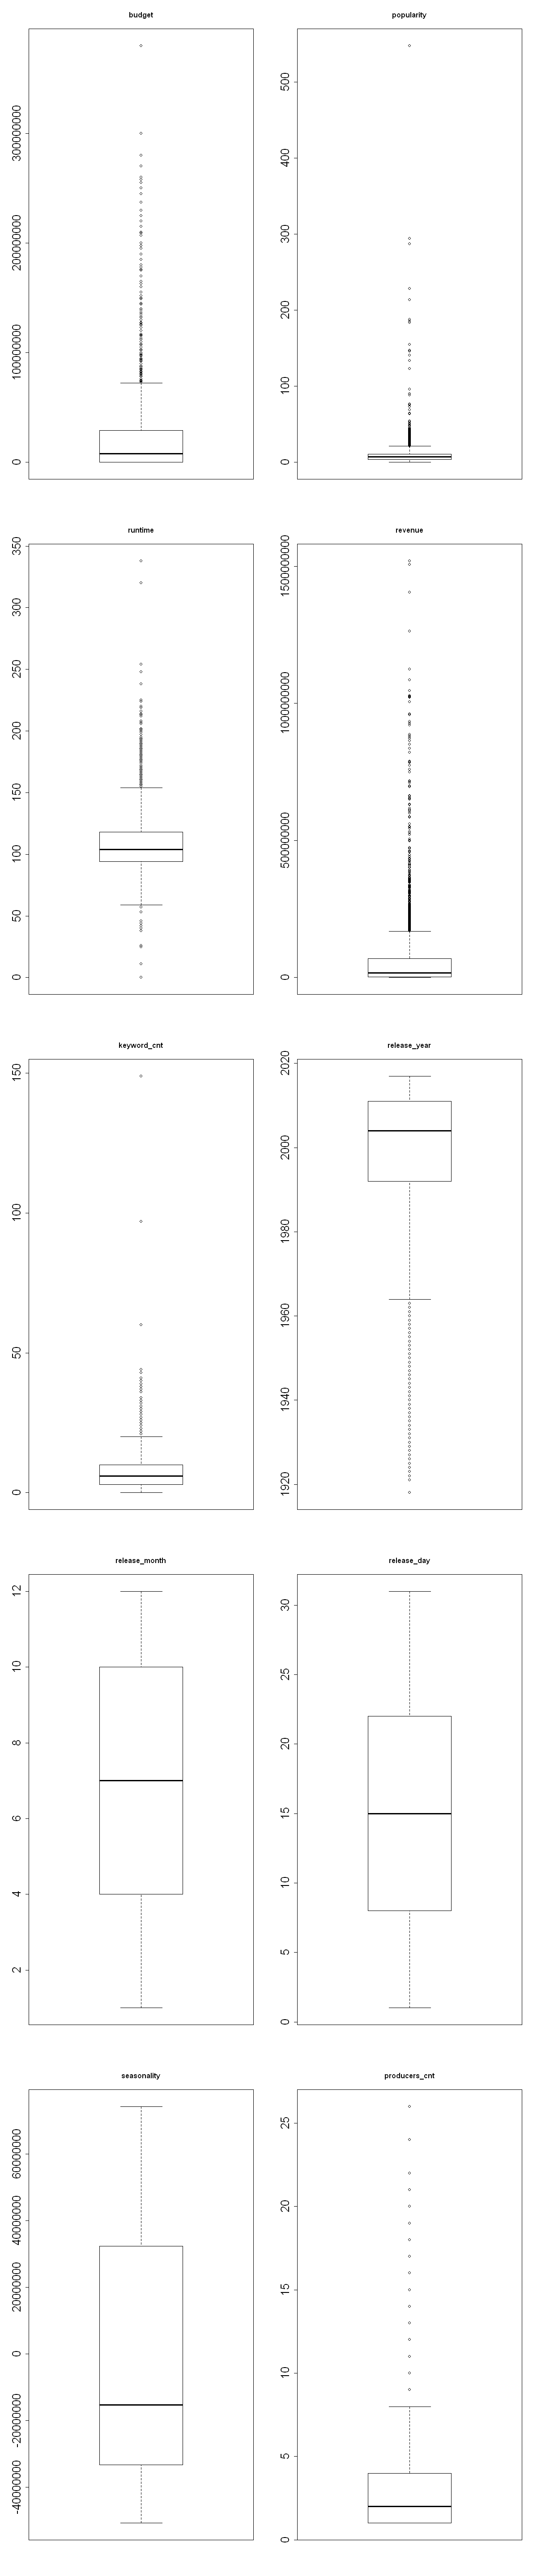

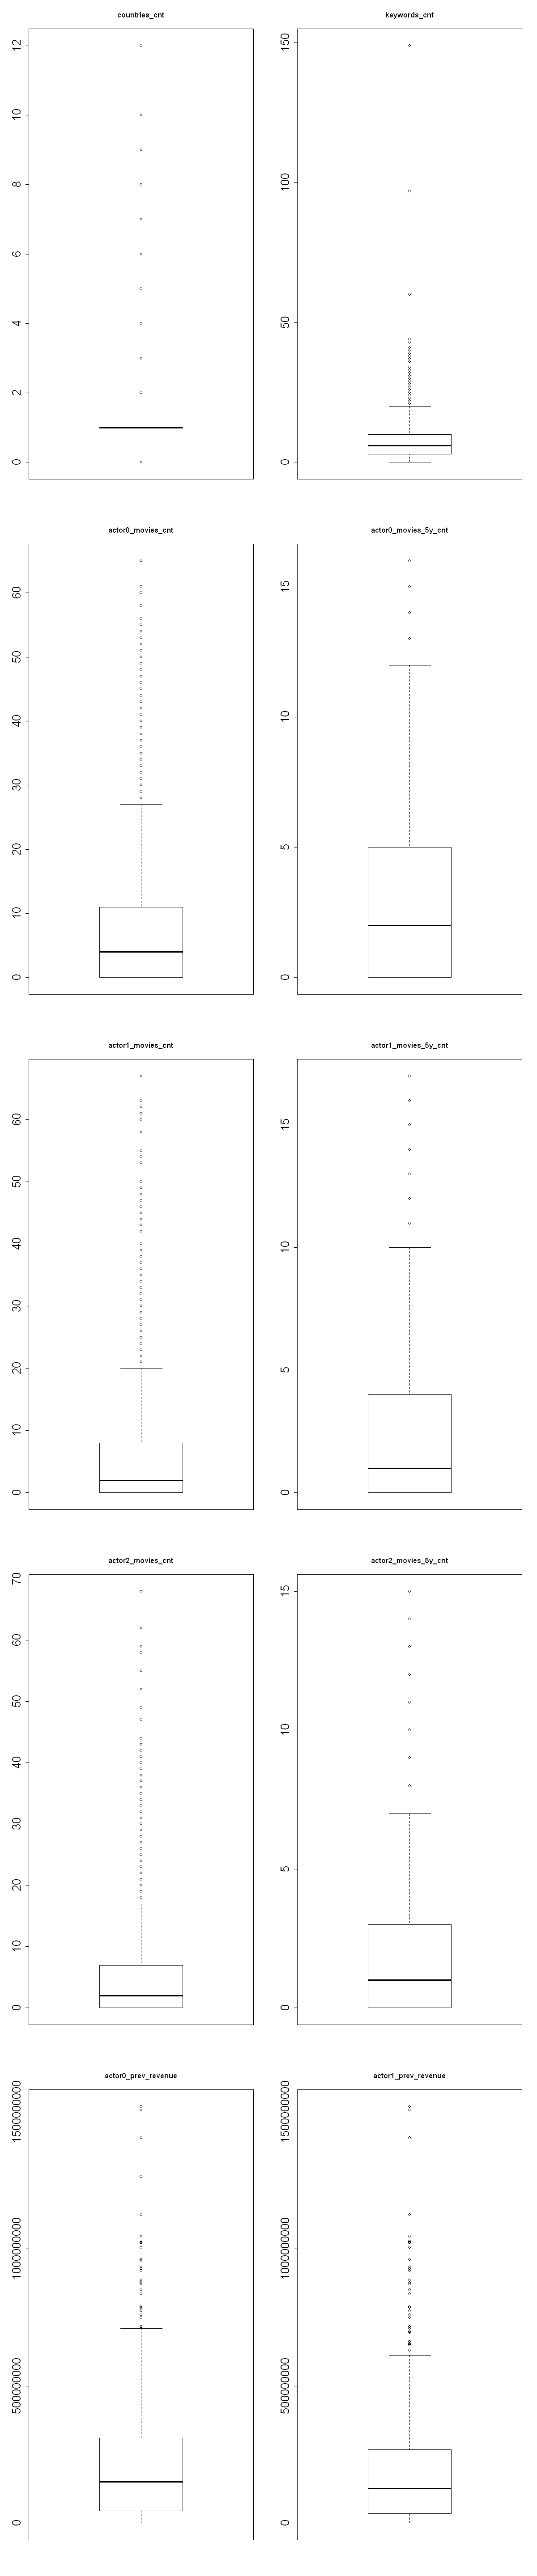

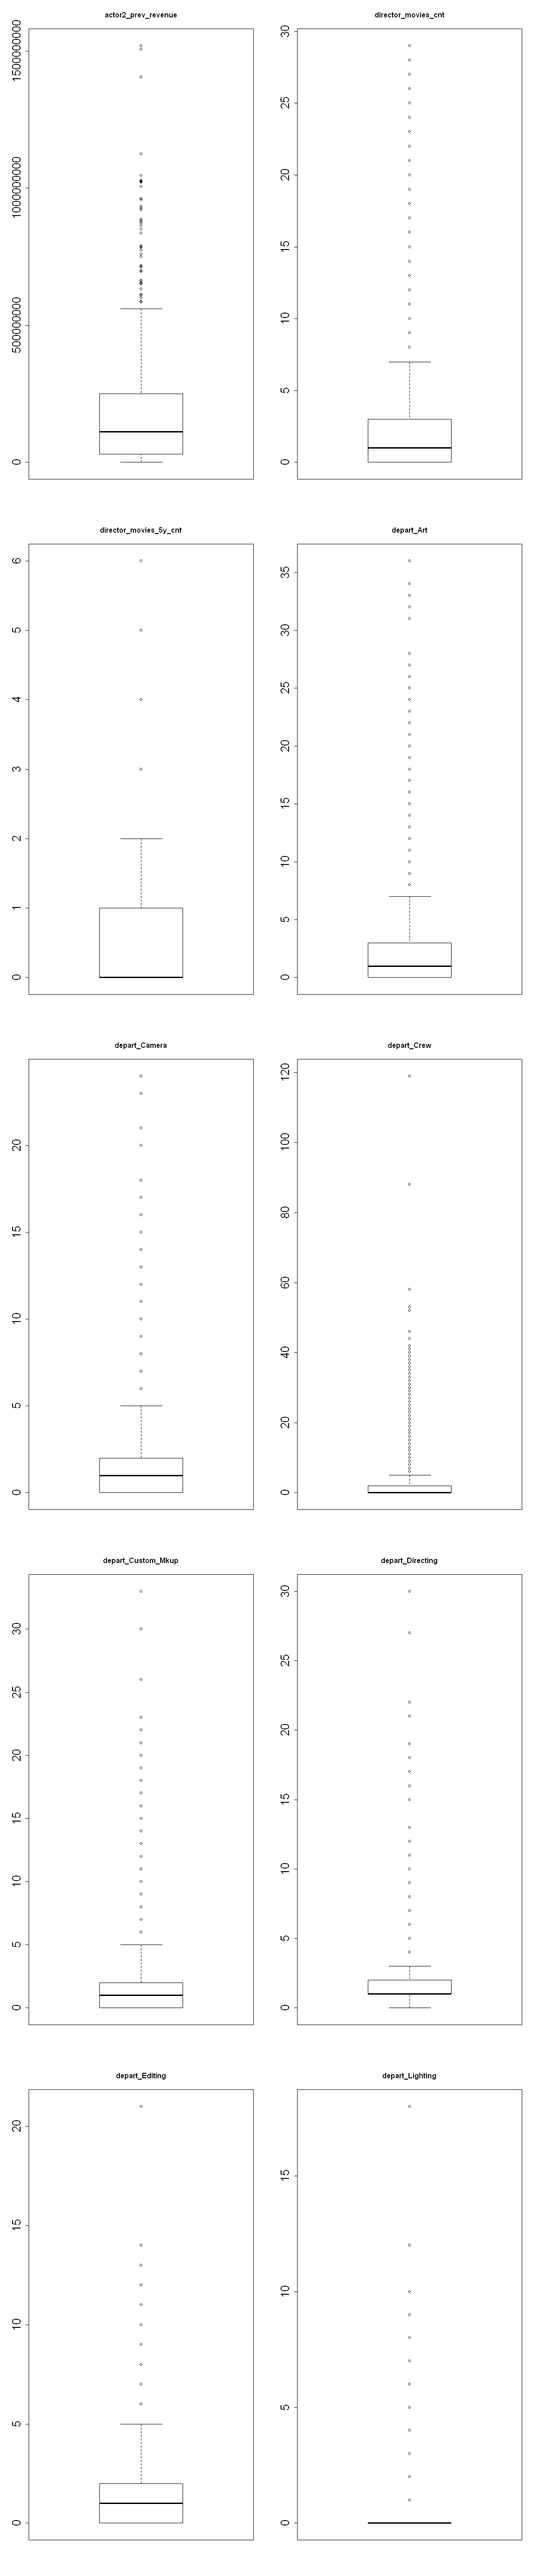

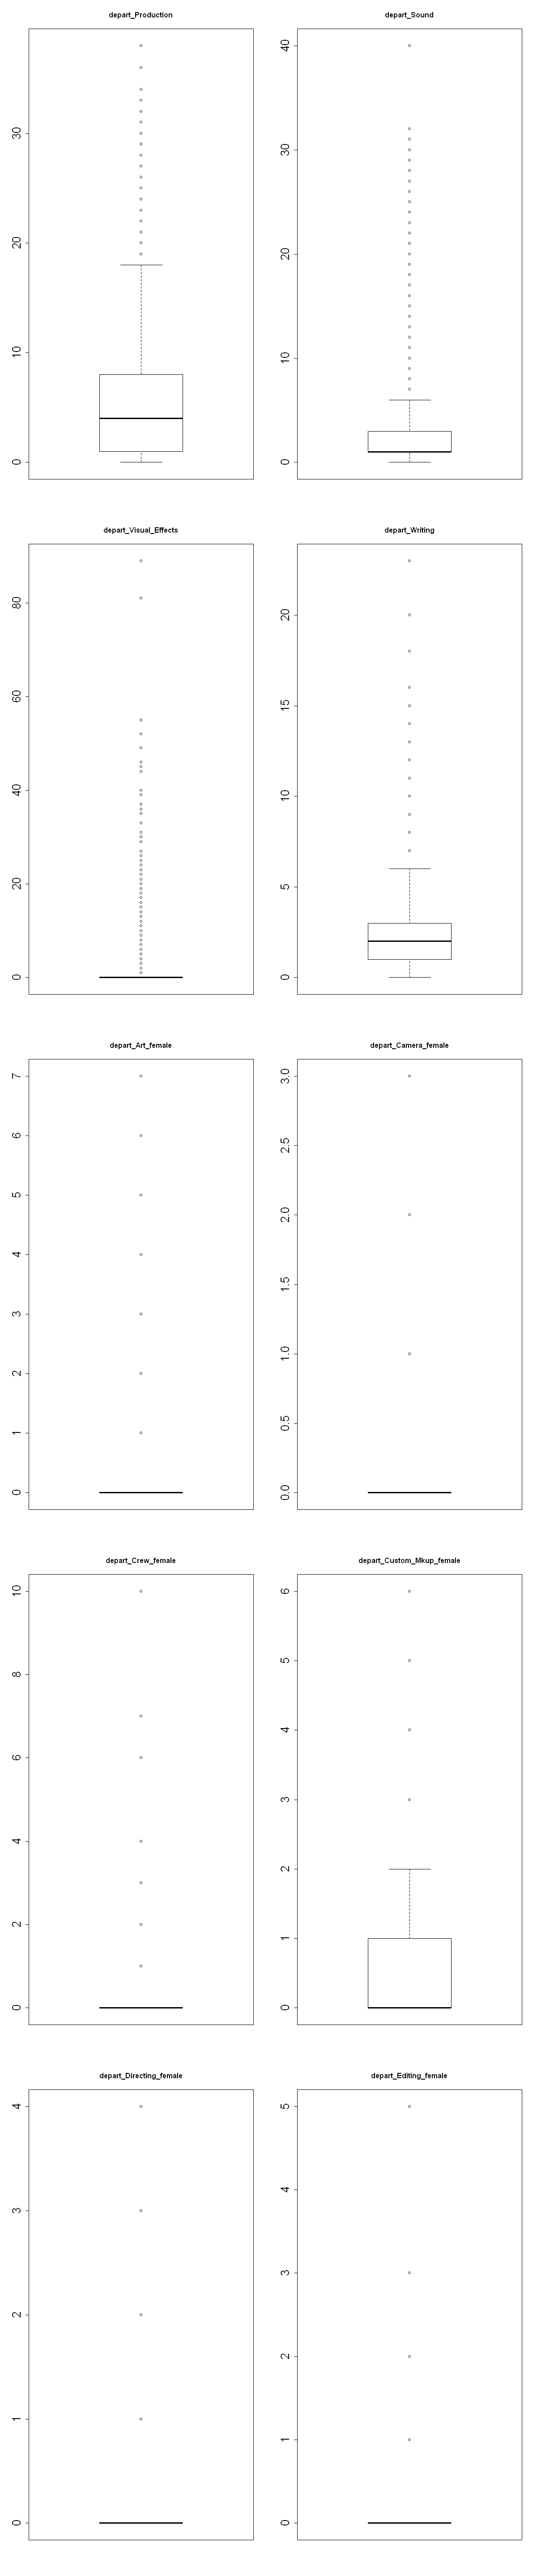

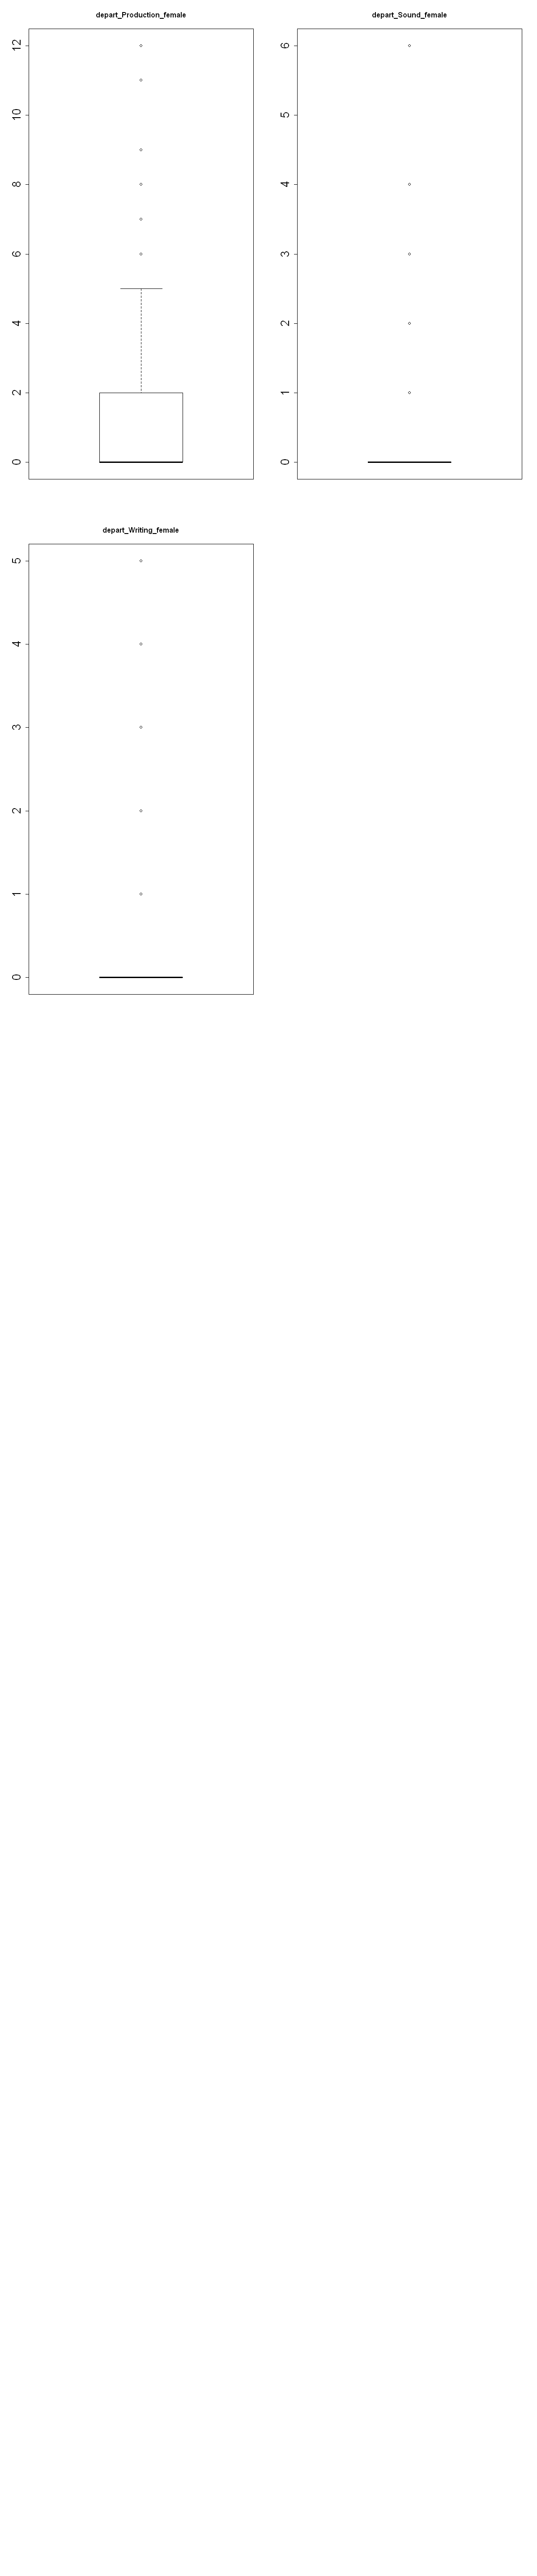

In [178]:
options(repr.plot.width =10, repr.plot.height = 48)
par(mfrow=c(5,2))
par(cex.lab=2)
par(cex.axis=2)
for (v in names(num.movies[2:ncol(num.movies)])){ if (max(num.movies[v],na.rm=TRUE)>2)
    boxplot(num.movies[v],main=v,cex=1)
}



In [190]:
missingMatrix <- function(data) {
    vn <- names(data[,2:85])
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [173]:
getMissingness(movies_ff_v)

[[1]]
                   var na.count rate
1              revenue     4382   59
2  actor2_prev_revenue     3423   46
3  actor1_prev_revenue     3201   43
4  actor0_prev_revenue     2752   37
5     sw_female_actor0      934   13
6       sw_male_actor0      934   13
7     sw_female_actor2      788   11
8       sw_male_actor2      788   11
9     sw_female_actor1      782   11
10      sw_male_actor1      782   11

[[2]]
[1] "This dataset has 1154 (15.6%) complete rows. Original data has 7375 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>
revenue,4382,59.4
actor2_prev_revenue,3423,46.4
actor1_prev_revenue,3201,43.4
actor0_prev_revenue,2752,37.3
sw_female_actor0,934,12.7
sw_male_actor0,934,12.7
sw_female_actor2,788,10.7
sw_male_actor2,788,10.7
sw_female_actor1,782,10.6


In [191]:
movies.miss <- missingMatrix(movies_ff_v)

In [192]:
movies.miss

budget,original_language,popularity,release_date,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,sw_has_poster,...,depart_Camera_female,depart_Crew_female,depart_Custom_Mkup_female,depart_Directing_female,depart_Editing_female,depart_Lighting_female,depart_Production_female,depart_Sound_female,depart_Visual_Effects_female,depart_Writing_female
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
png("57.png",width=20,height=20)
cexRow=5
cexCol=5
heatmap(as.matrix(movies.miss),scale="column",col=heat.colors(2),main="NA values of movies data")

ERROR: Error in plot.new(): figure margins too large


ERROR: Error in par(op): invalid value specified for graphical parameter "pin"


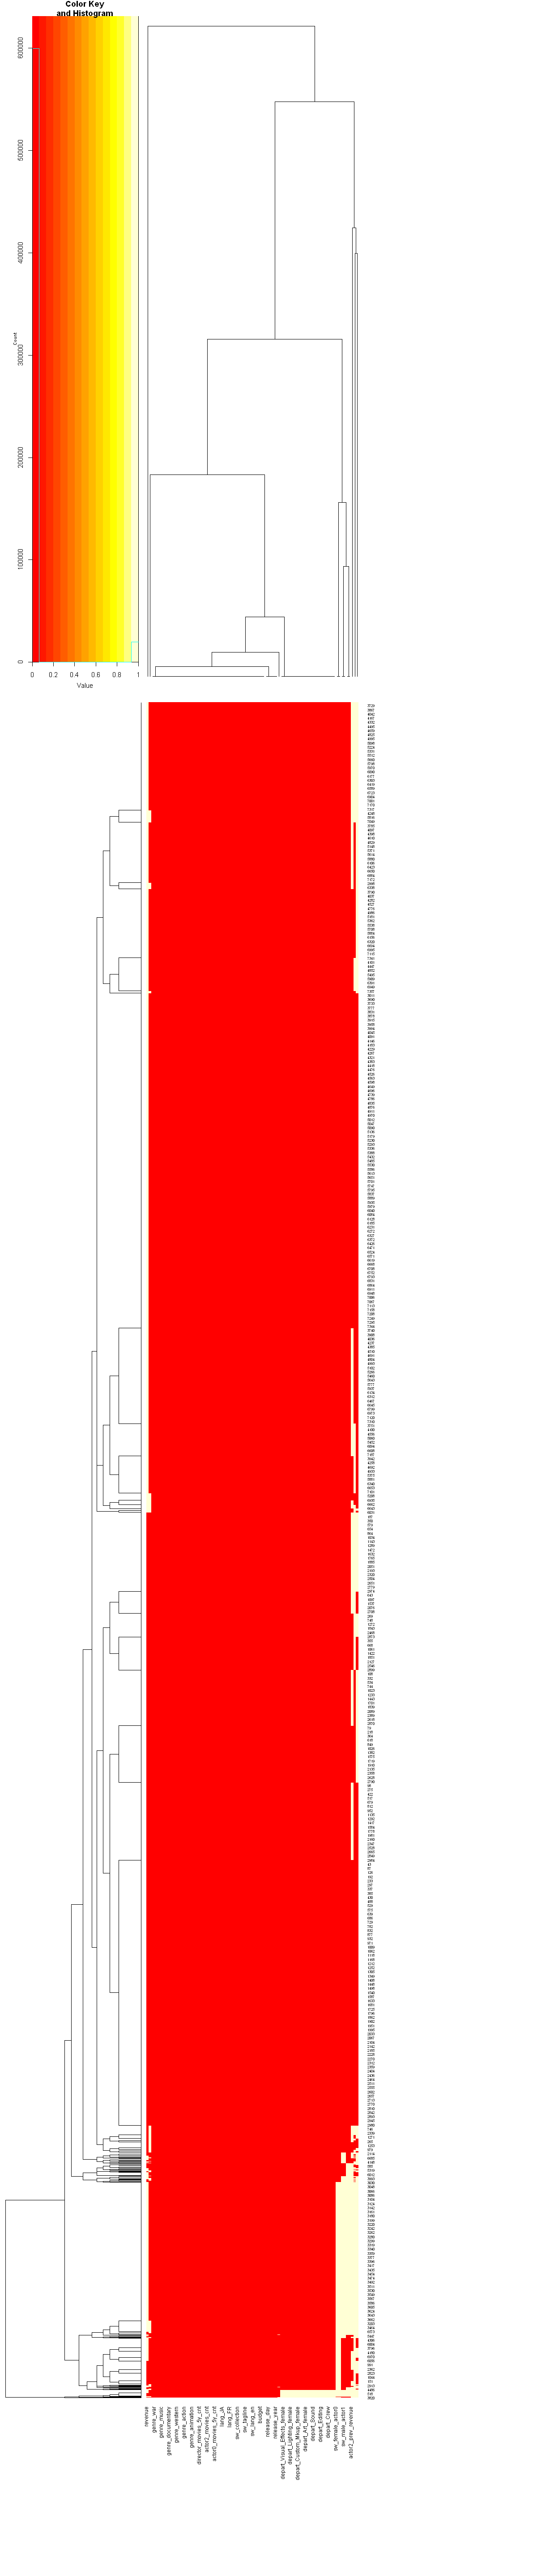

In [193]:
#install.packages("gplots")
library(gplots)
y <- data.matrix(movies.miss)
heatmap.2(y,trace="none",margins=c(20,20))

In [204]:
outlierRepMatrix <- function(data,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <- median(data[[v]],na.rm = TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh  & (v!='revenue'),NA,data[[v]])
            outdata[v] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}



In [205]:
movies.rem.outliers <- outlierRepMatrix(movies_ff_v)

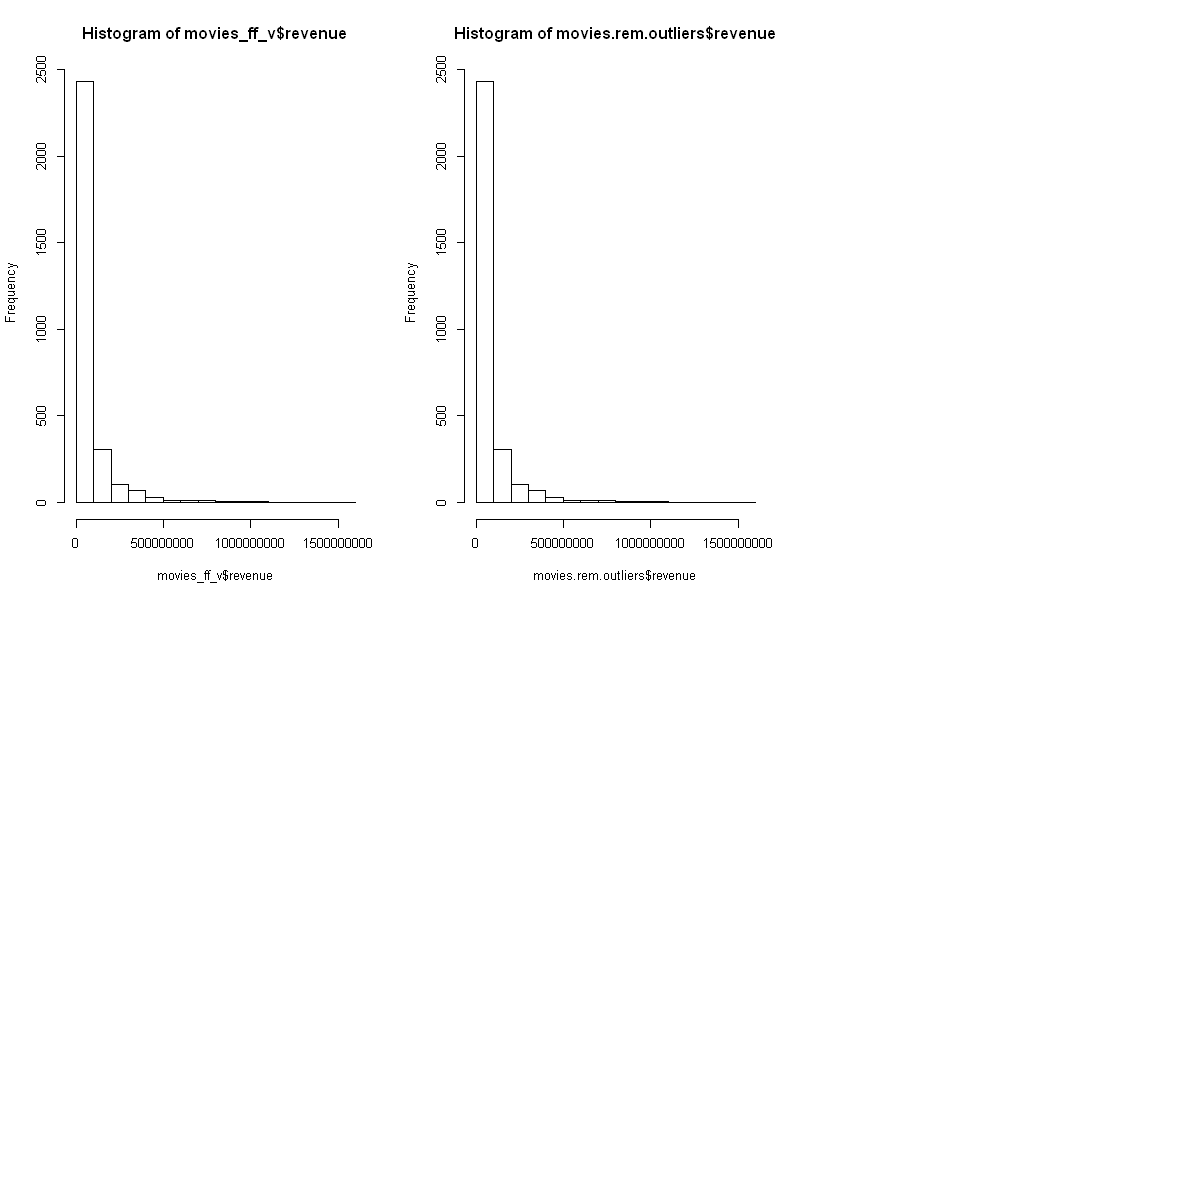

In [206]:
options(repr.plot.width =10, repr.plot.height = 10)
par(mfrow=c(2,3))
hist(movies_ff_v$revenue)
hist(movies.rem.outliers$revenue)


In [199]:
summary(movies_ff_v)

    movie_id        budget          original_language    popularity 
 Min.   :   1   Min.   :        0   Length:7375        Min.   :  0  
 1st Qu.:1848   1st Qu.:        0   Class :character   1st Qu.:  4  
 Median :3696   Median :  8000000   Mode  :character   Median :  7  
 Mean   :3698   Mean   : 22666657                      Mean   :  9  
 3rd Qu.:5550   3rd Qu.: 29000000                      3rd Qu.: 11  
 Max.   :7398   Max.   :380000000                      Max.   :547  
                                                                    
  release_date           runtime    runtime_cat           revenue          
 Min.   :1918-08-01   Min.   :  0   Length:7375        Min.   :         1  
 1st Qu.:1992-11-13   1st Qu.: 94   Class :character   1st Qu.:   2405420  
 Median :2004-07-29   Median :104   Mode  :character   Median :  16928137  
 Mean   :2000-03-15   Mean   :108                      Mean   :  66879312  
 3rd Qu.:2011-06-27   3rd Qu.:118                      3rd Qu.:  690

In [200]:
summary(movies.rem.outliers)

    movie_id        budget           popularity     runtime   
 Min.   :   1   Min.   :       0   Min.   : 0    Min.   : 59  
 1st Qu.:1848   1st Qu.:       0   1st Qu.: 4    1st Qu.: 94  
 Median :3696   Median : 5500000   Median : 7    Median :103  
 Mean   :3698   Mean   :13517000   Mean   : 7    Mean   :106  
 3rd Qu.:5550   3rd Qu.:20000000   3rd Qu.:11    3rd Qu.:116  
 Max.   :7398   Max.   :72500000   Max.   :21    Max.   :154  
                NA's   :624        NA's   :201   NA's   :280  
    revenue            sw_lang_en   sw_web_presence sw_has_poster
 Min.   :        1   Min.   :1      Min.   :0.00    Min.   :1    
 1st Qu.:  1749265   1st Qu.:1      1st Qu.:0.00    1st Qu.:1    
 Median : 12000000   Median :1      Median :0.00    Median :1    
 Mean   : 30454231   Mean   :1      Mean   :0.32    Mean   :1    
 3rd Qu.: 42763574   3rd Qu.:1      3rd Qu.:1.00    3rd Qu.:1    
 Max.   :167977596   Max.   :1      Max.   :1.00    Max.   :1    
 NA's   :4697        NA's   :1039 

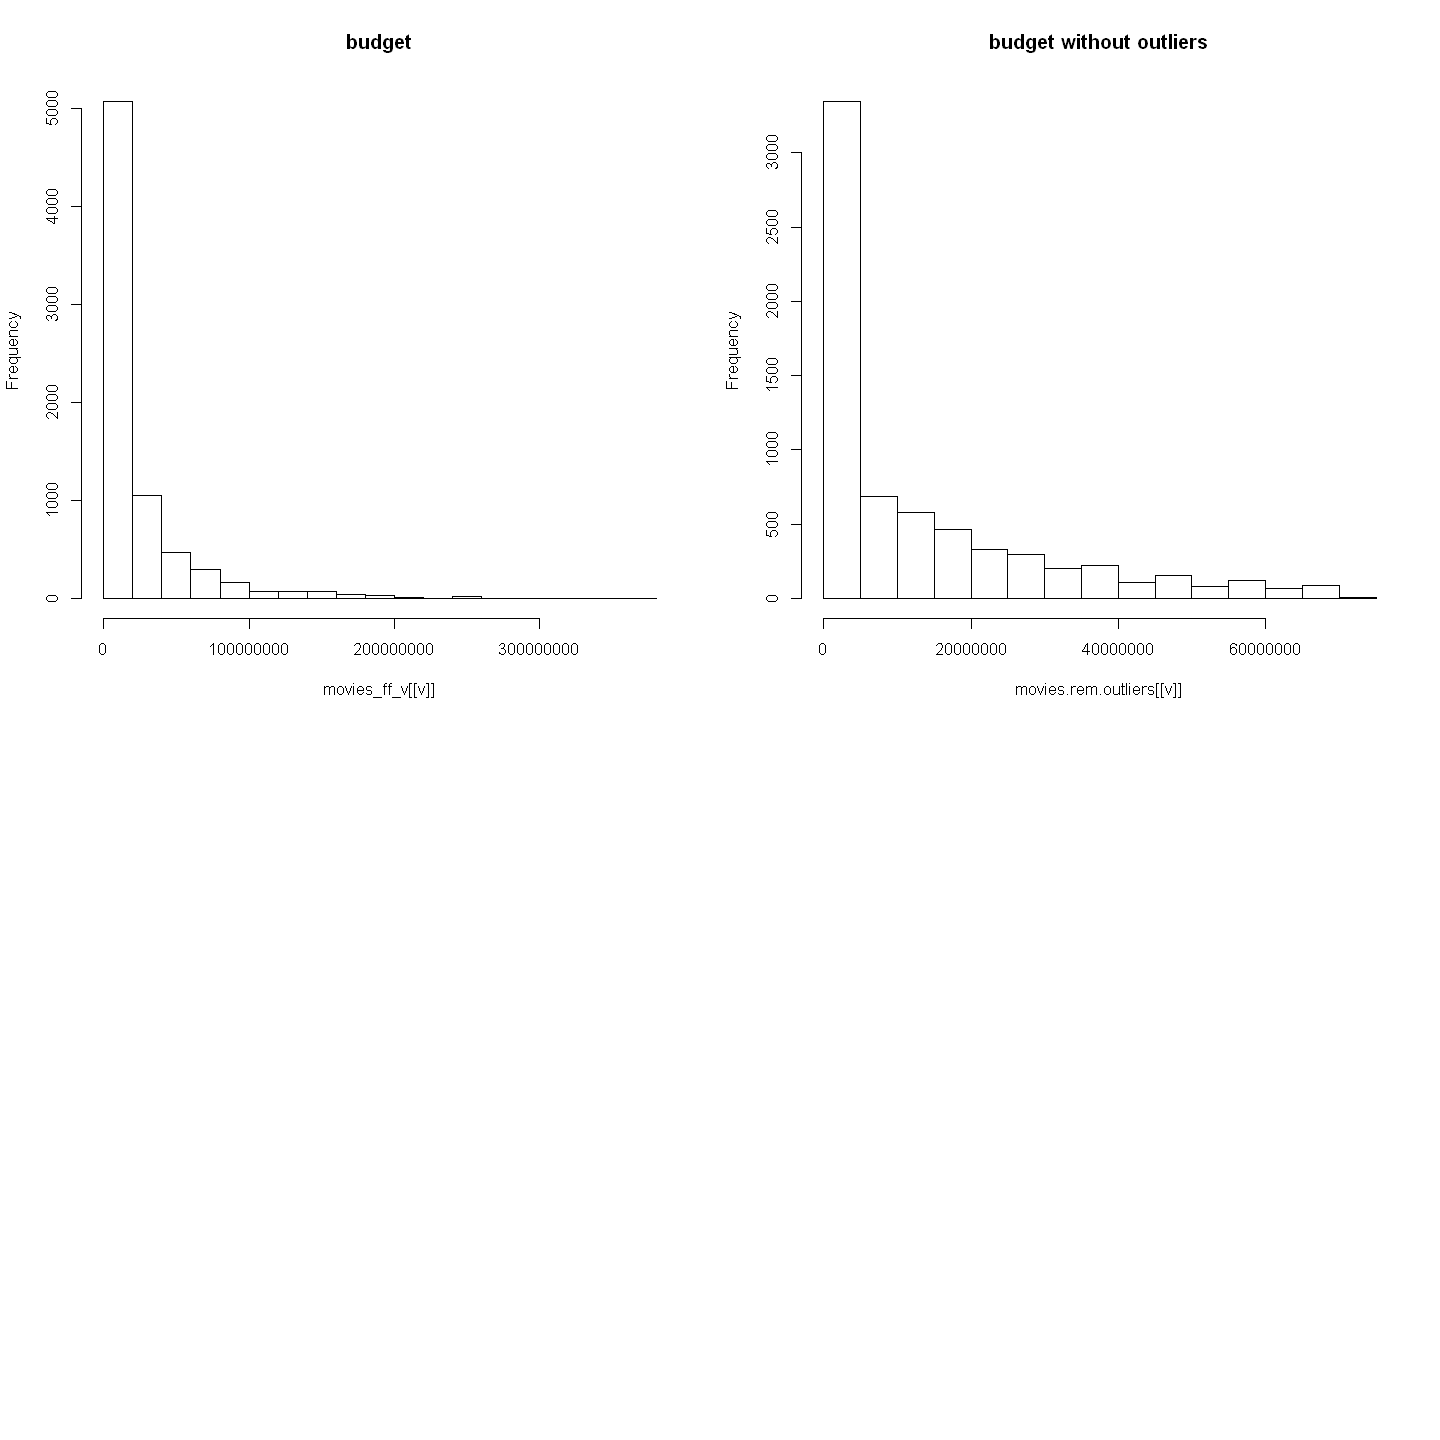

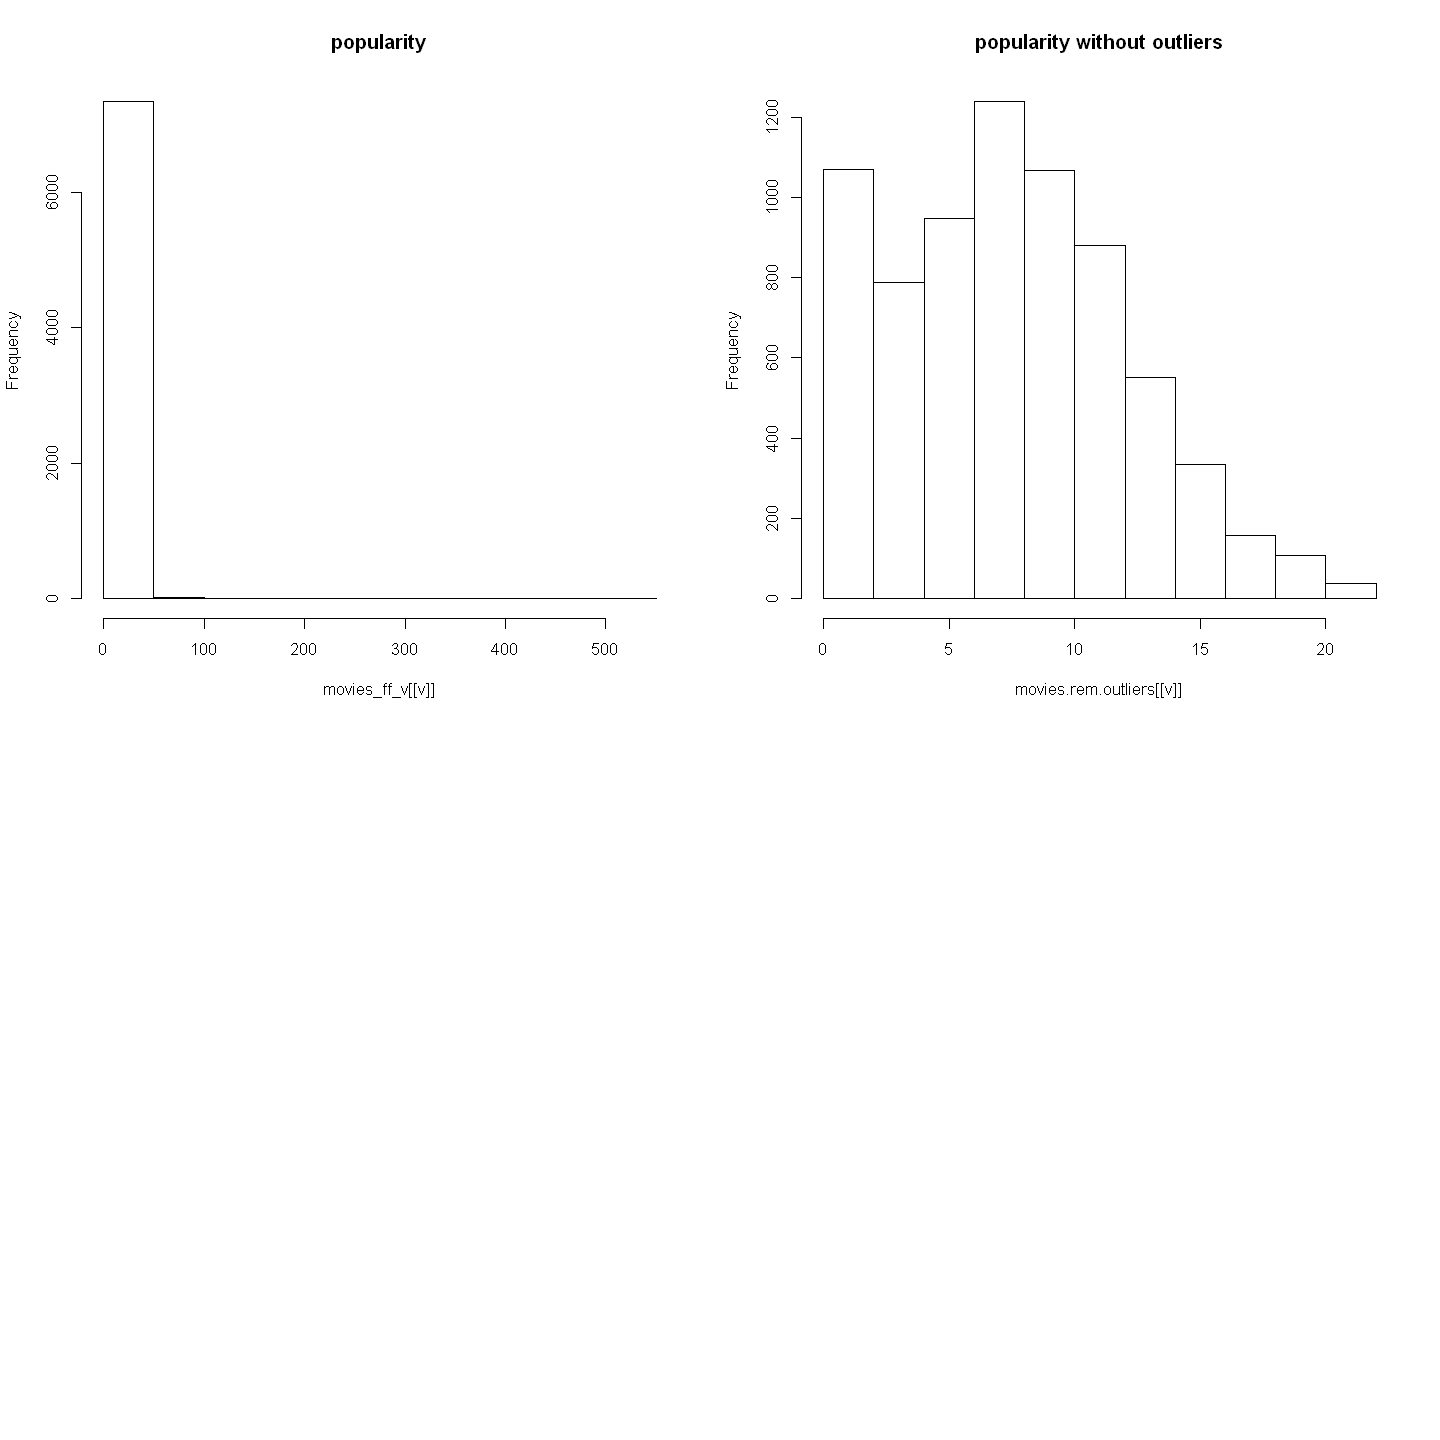

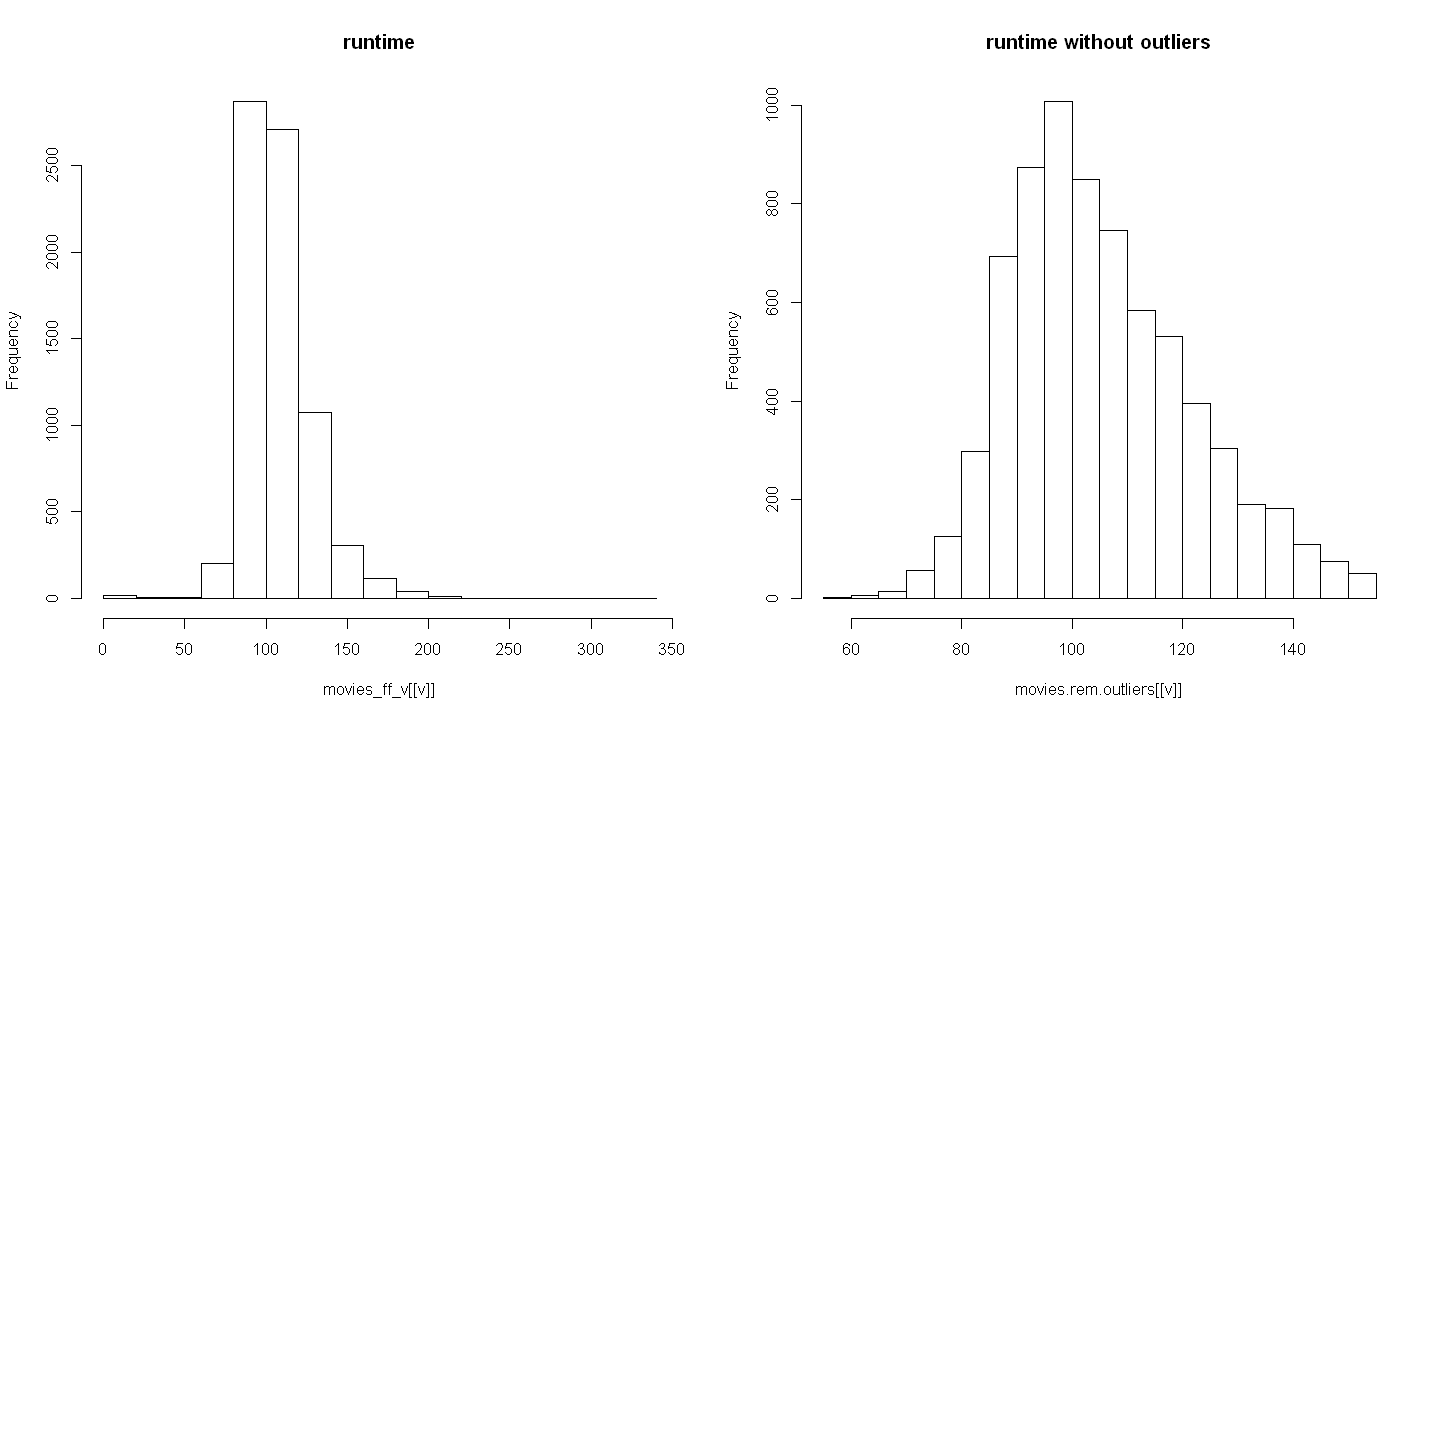

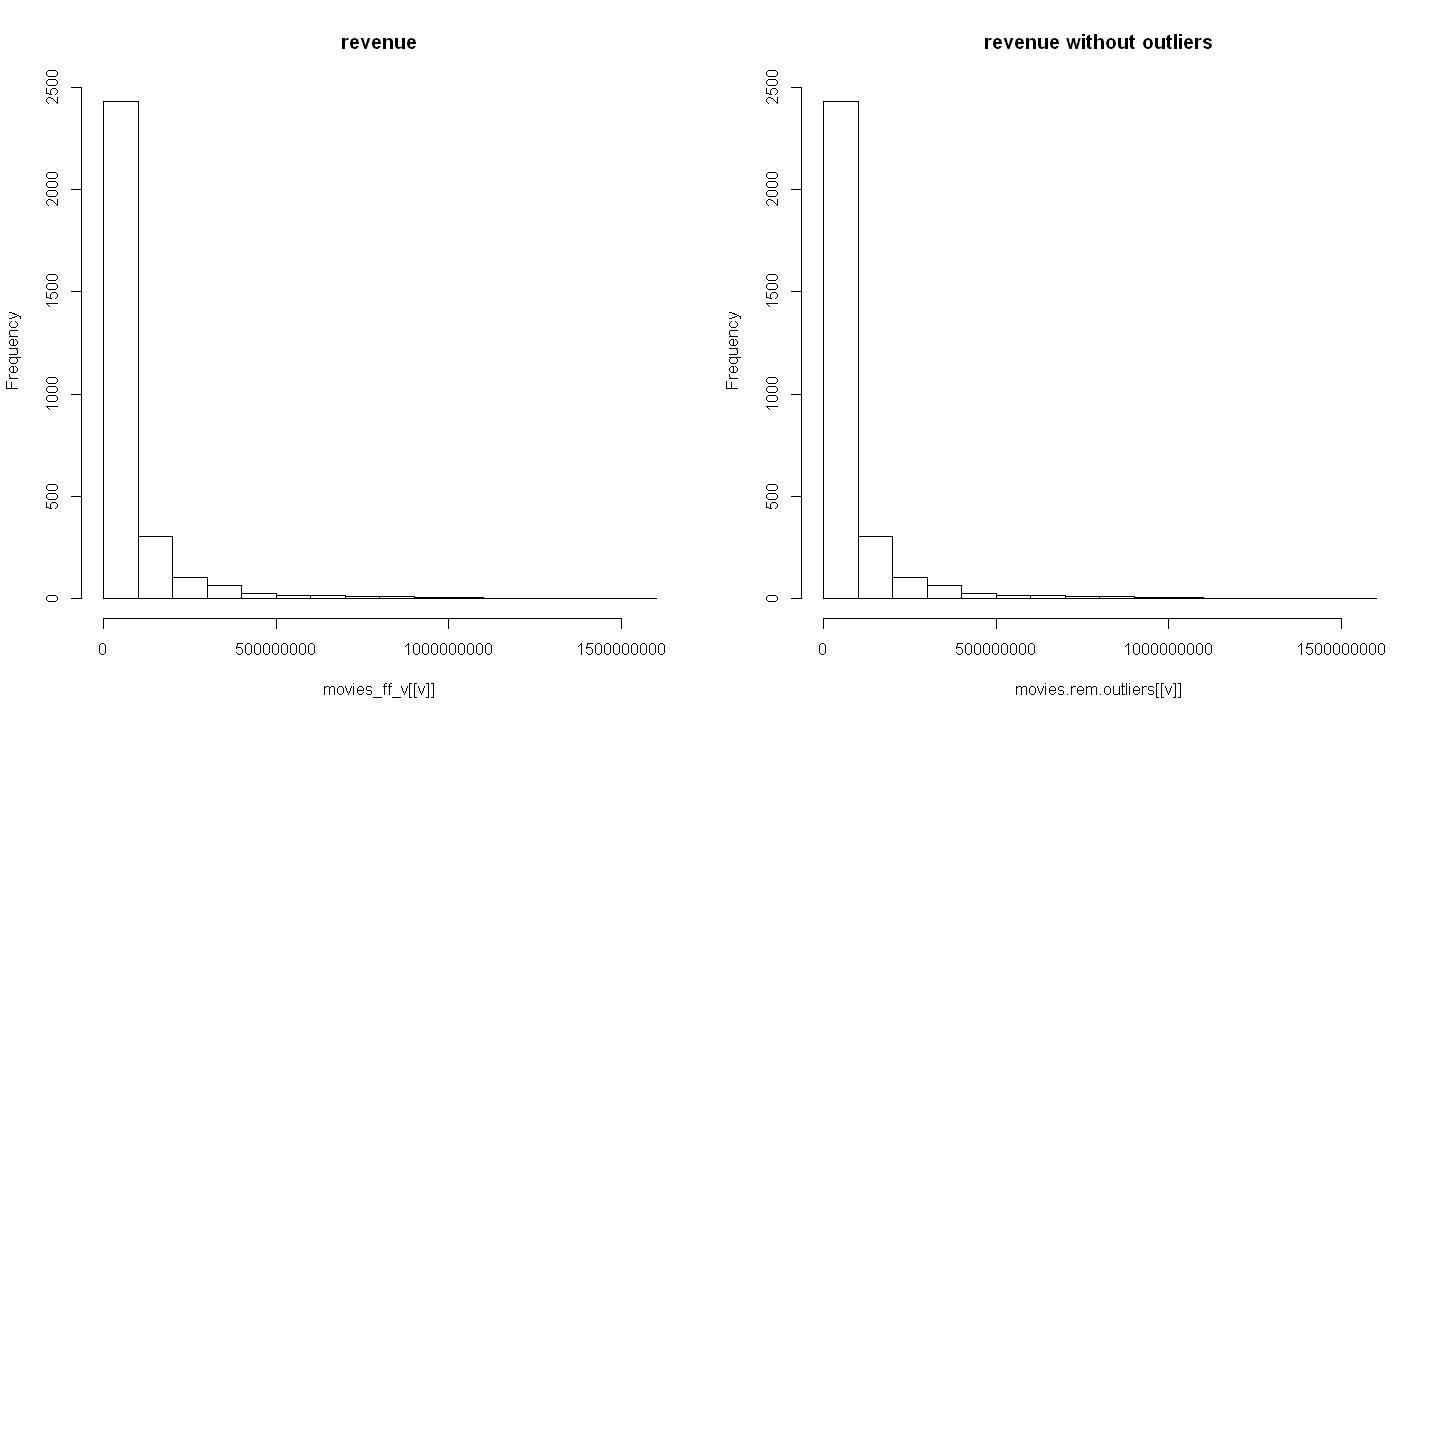

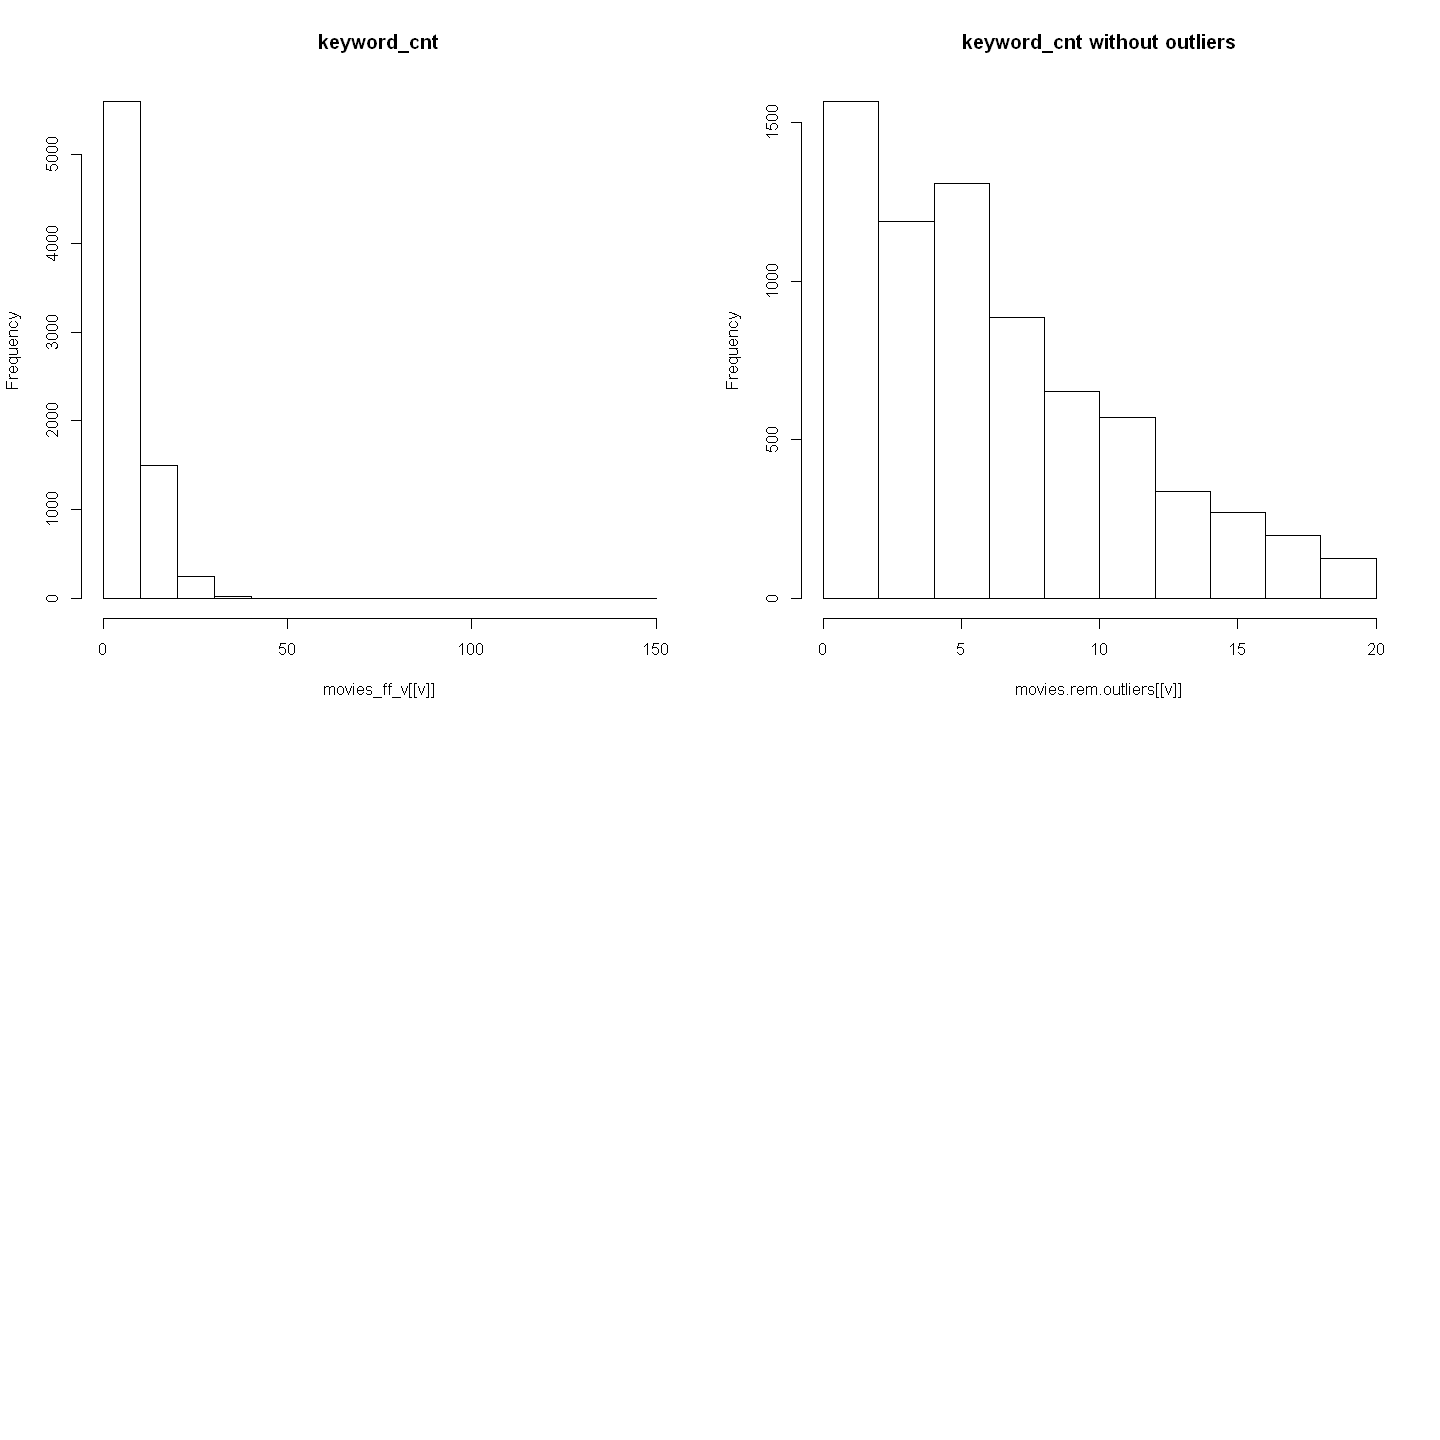

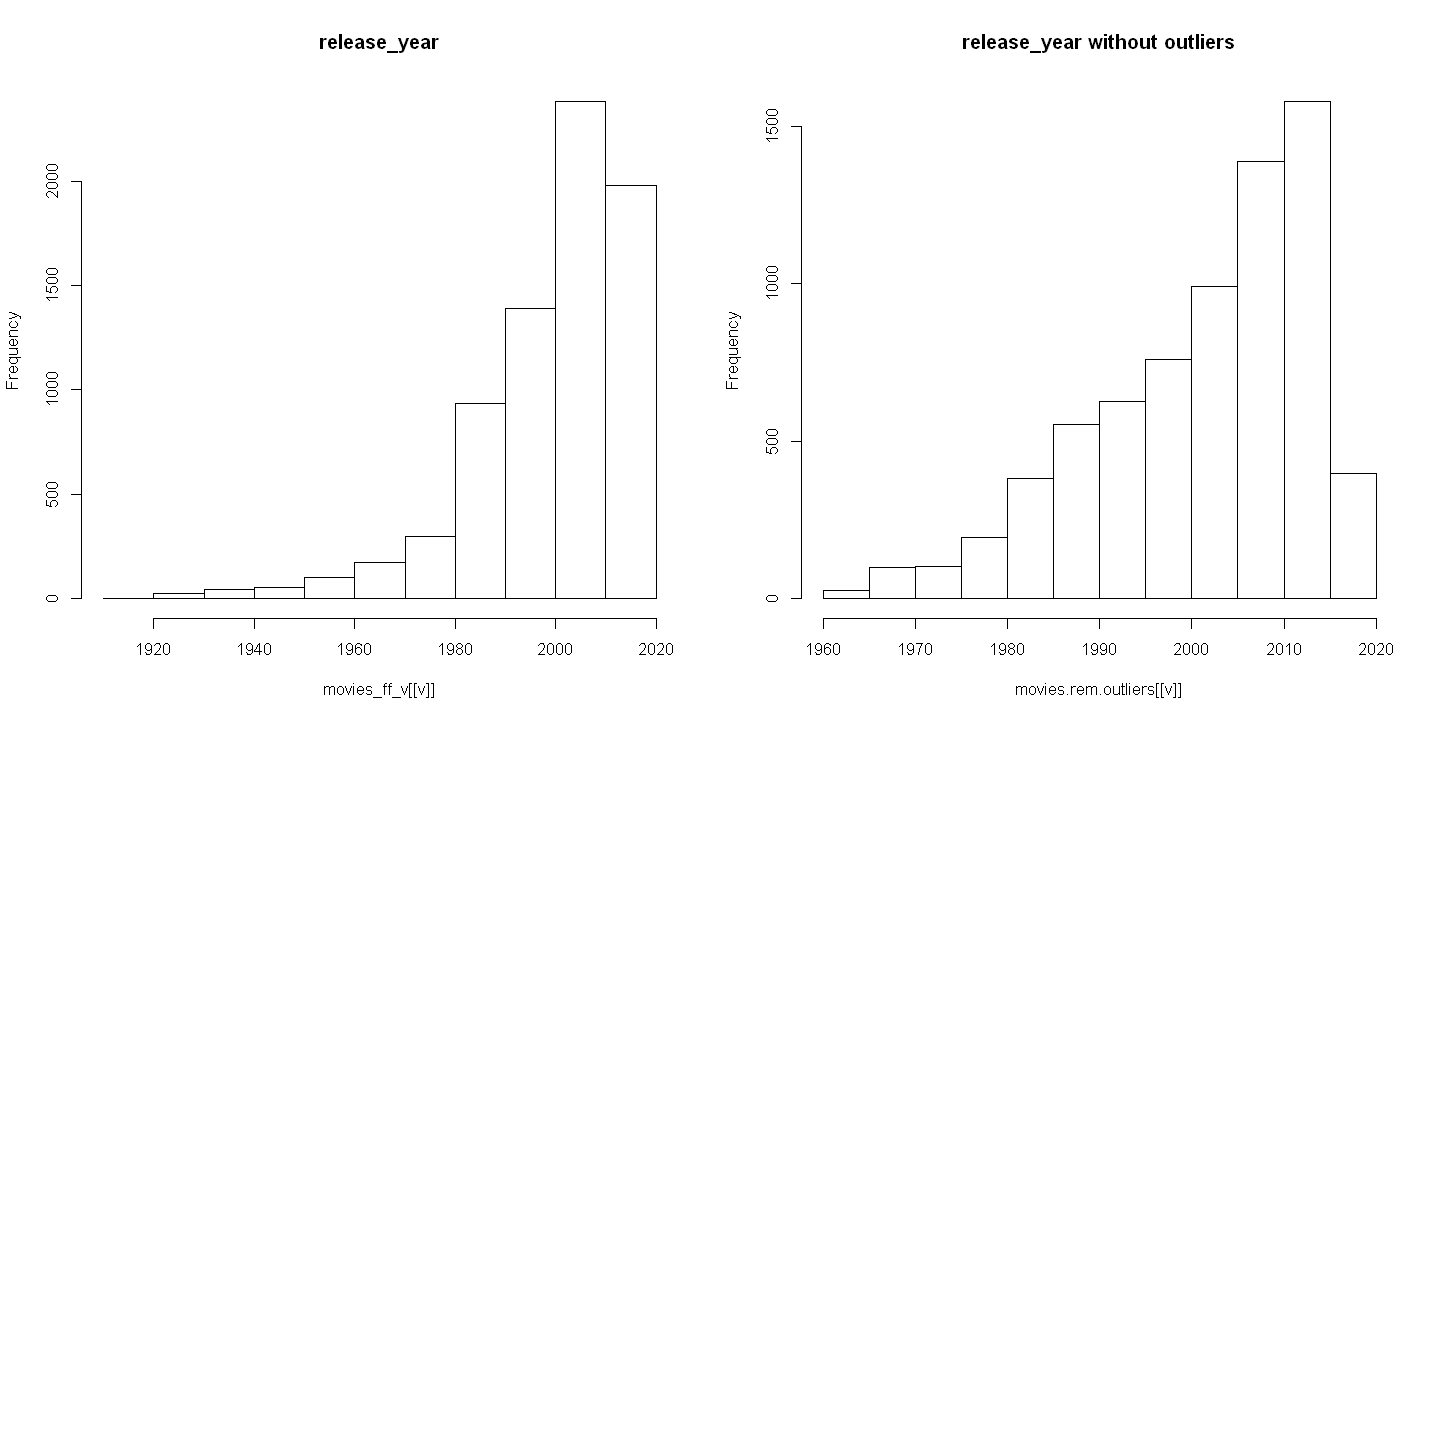

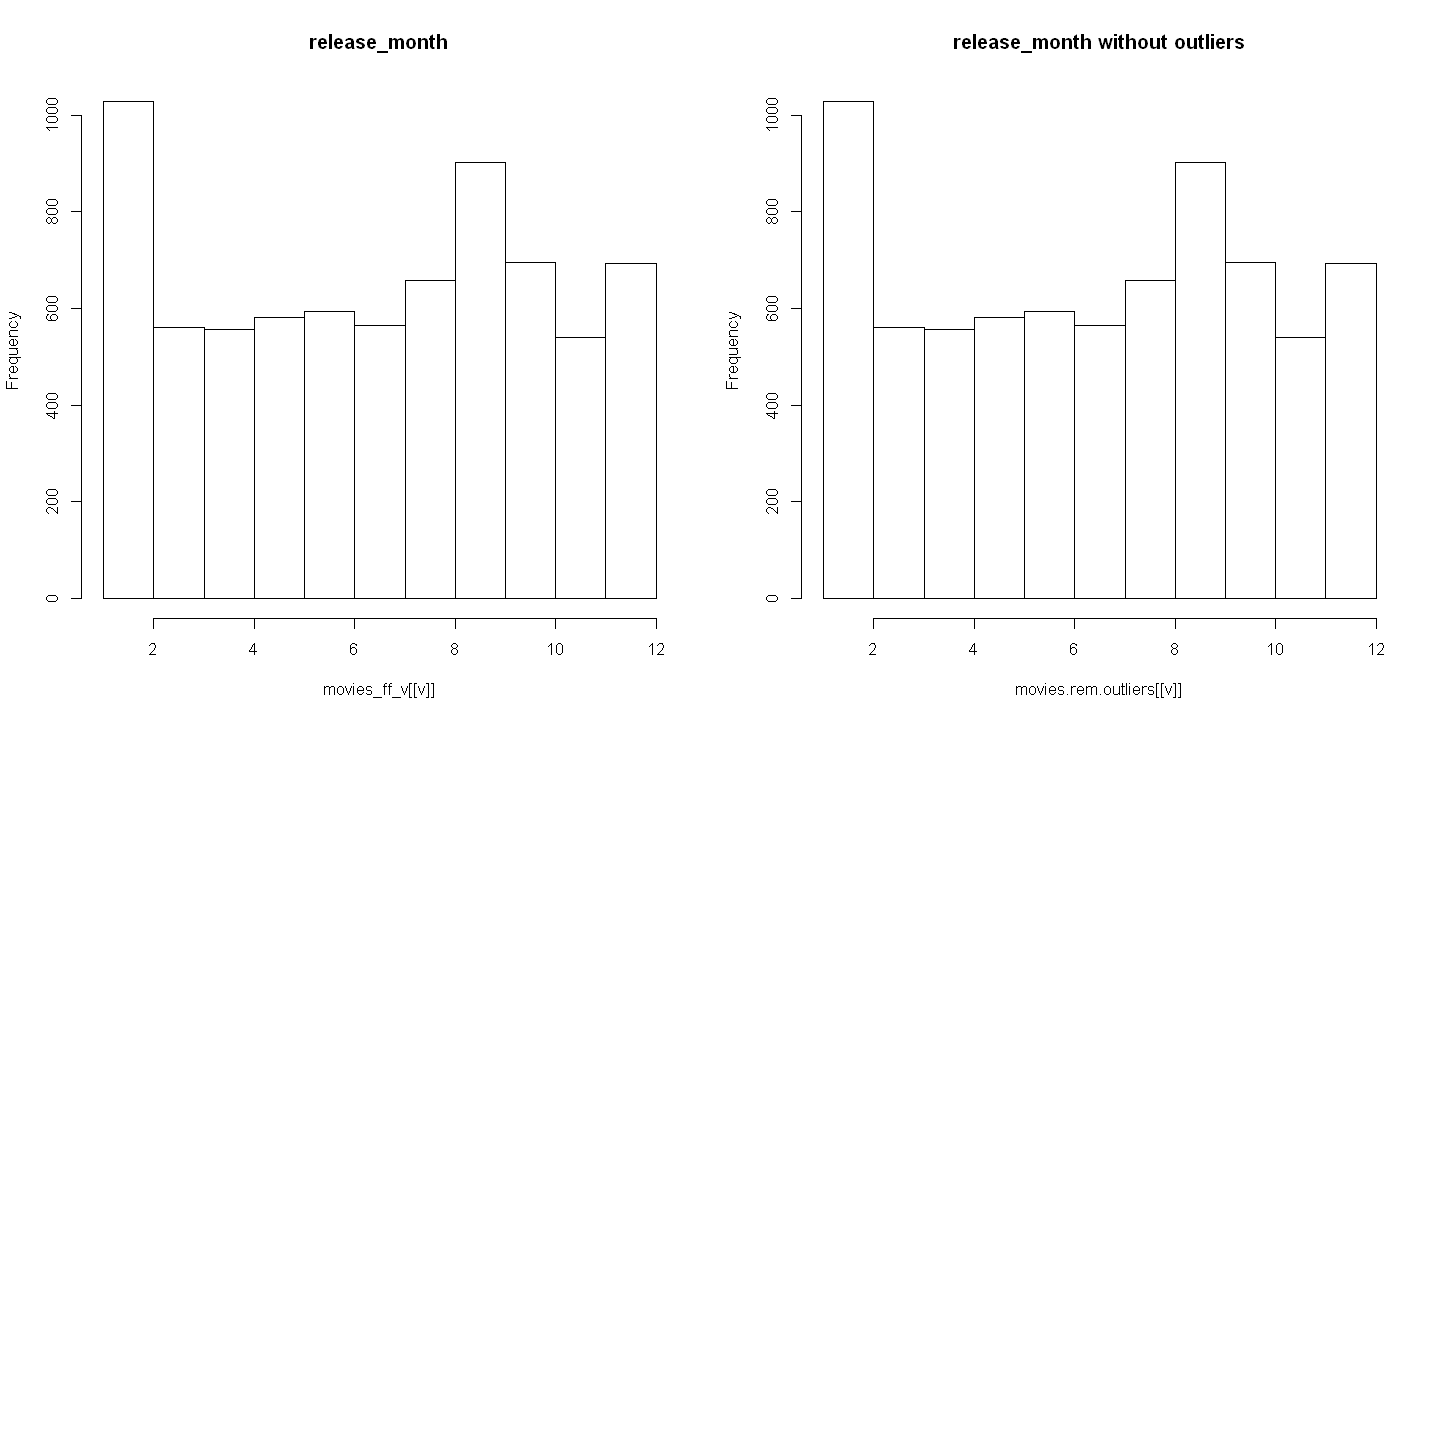

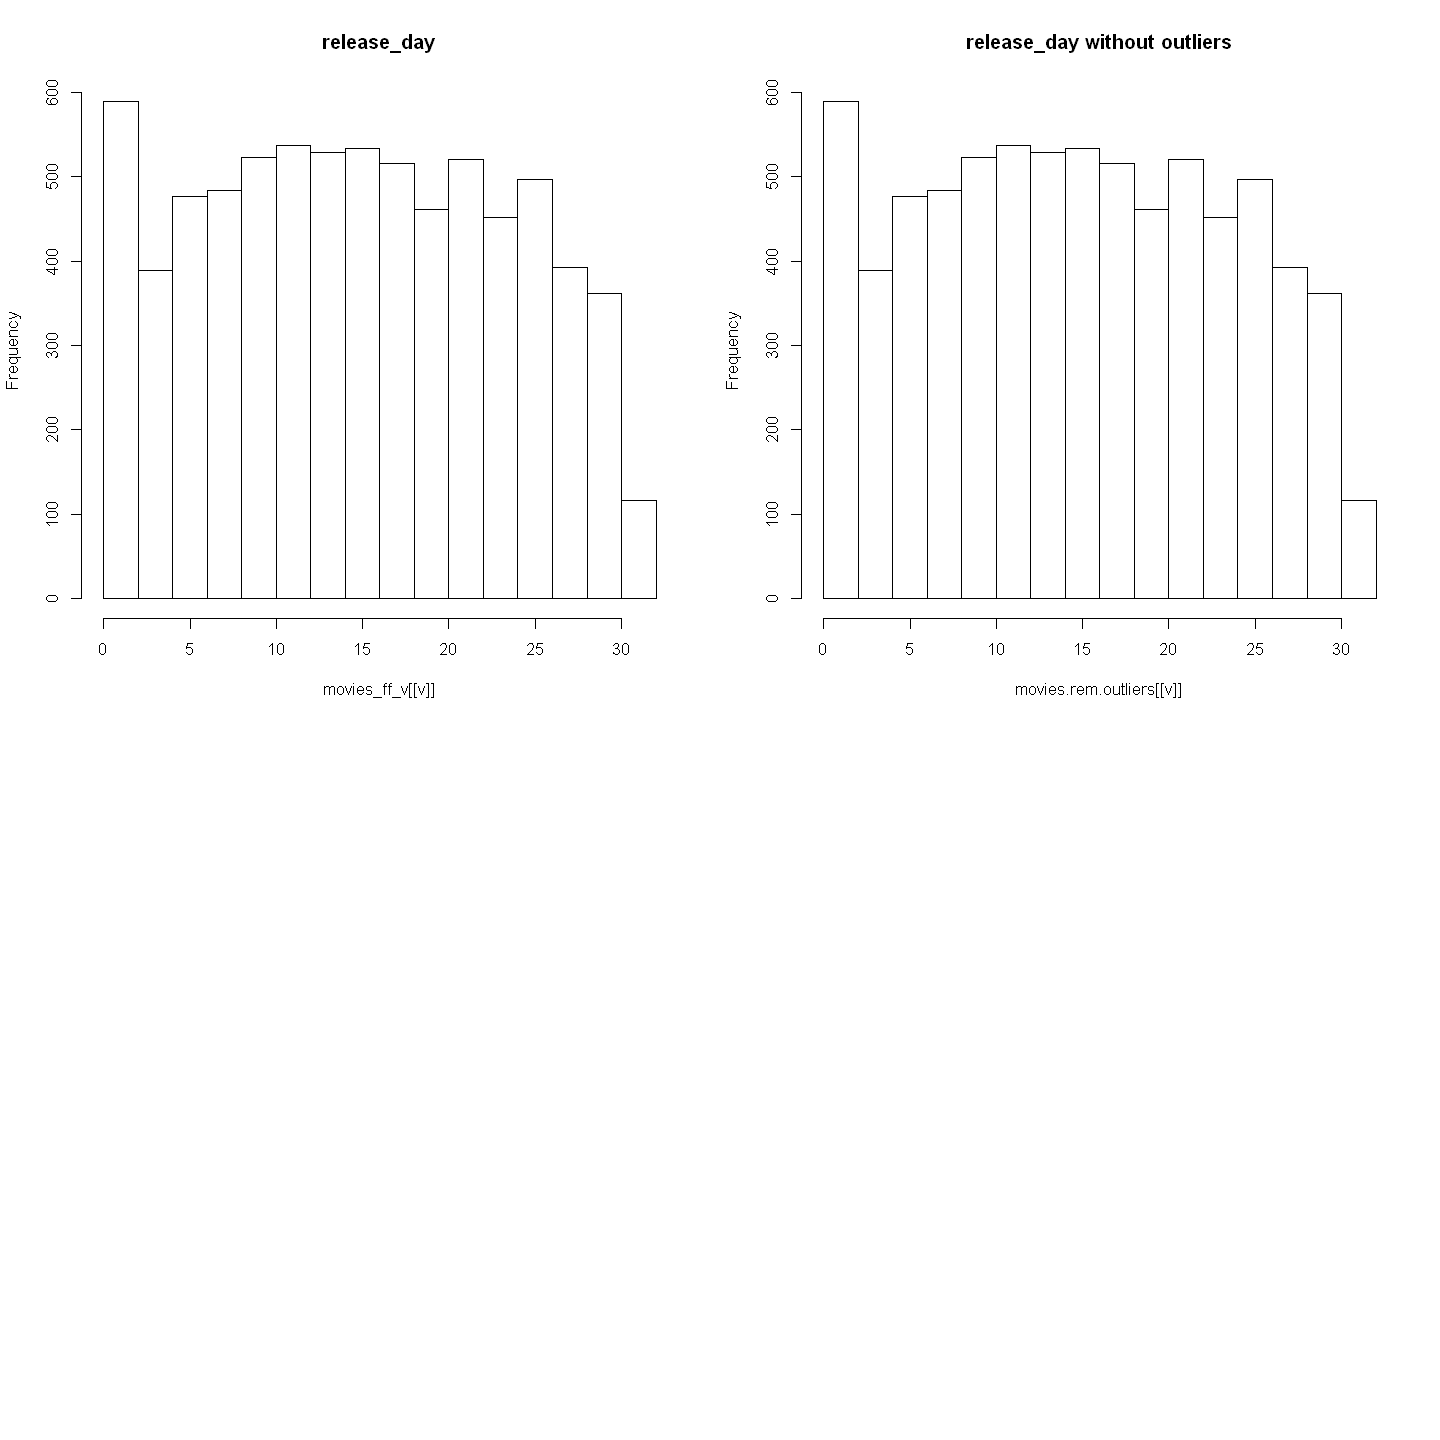

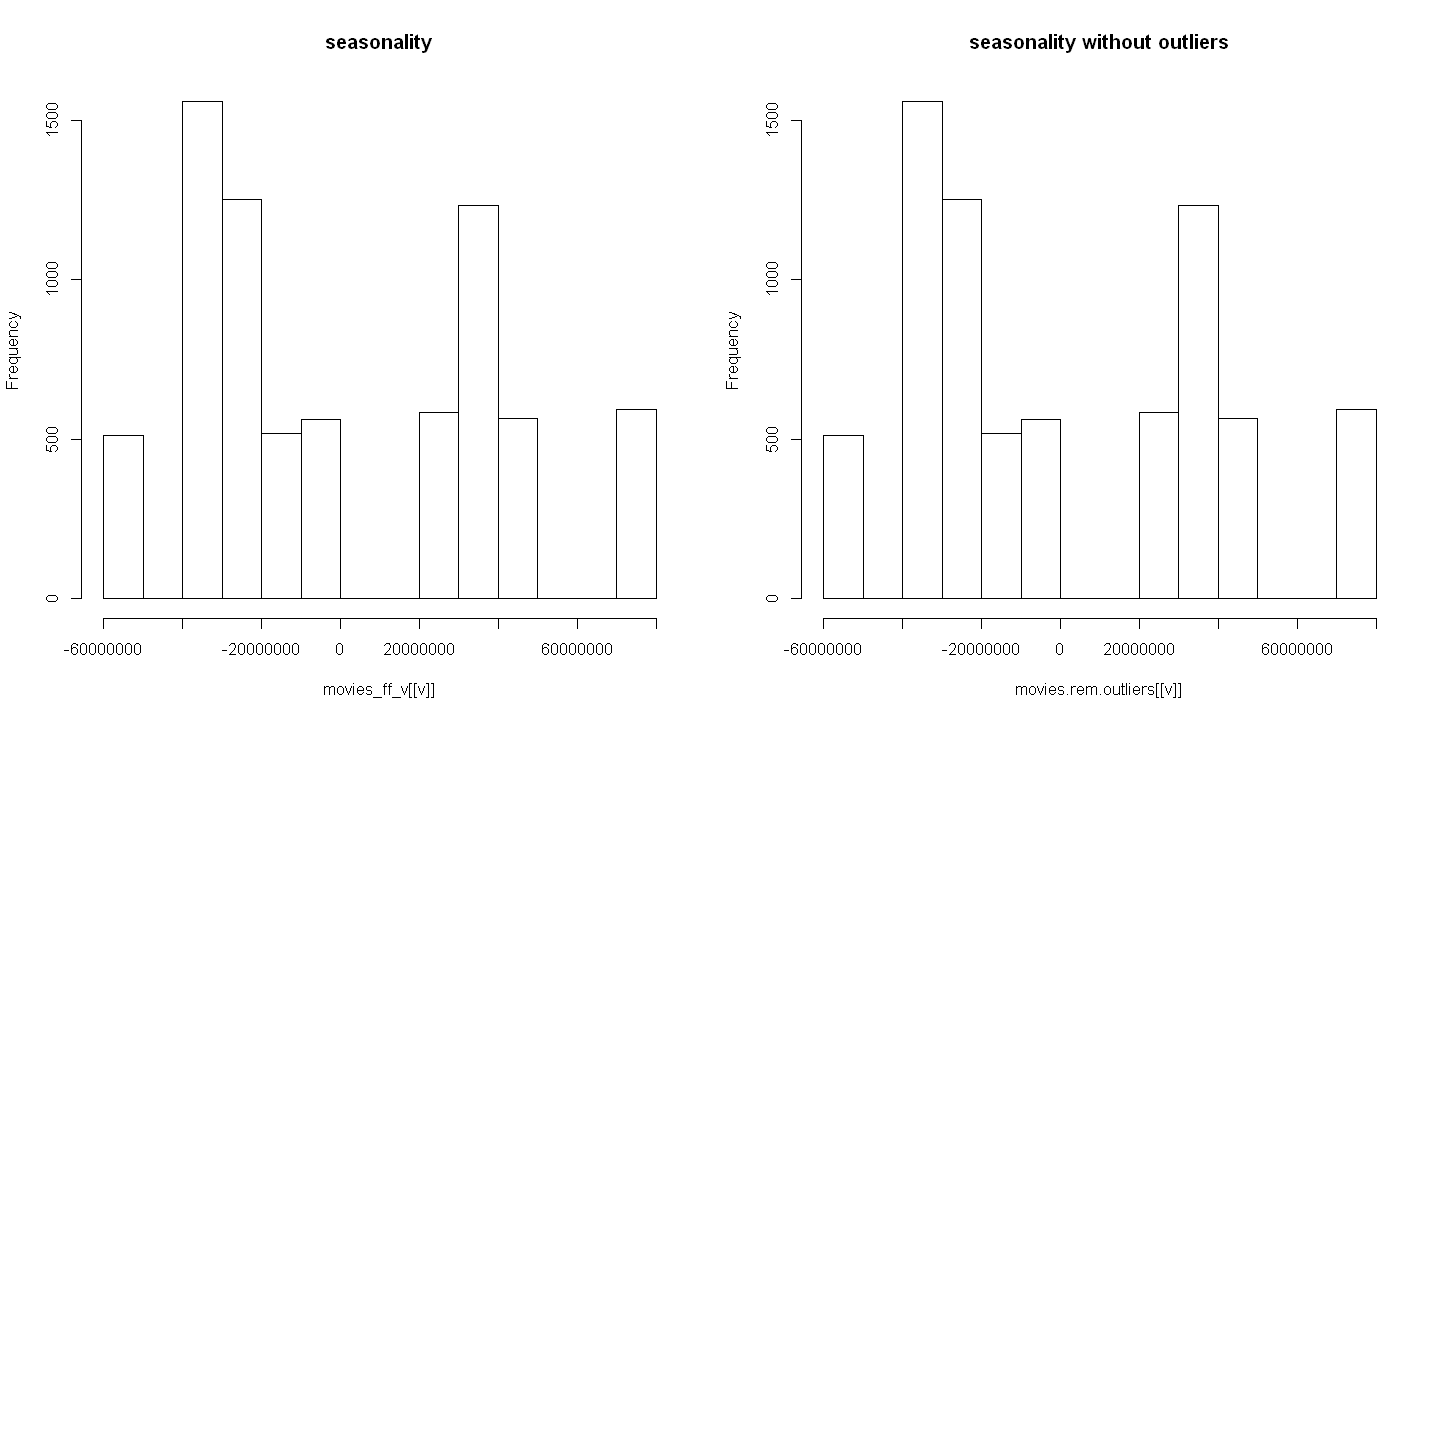

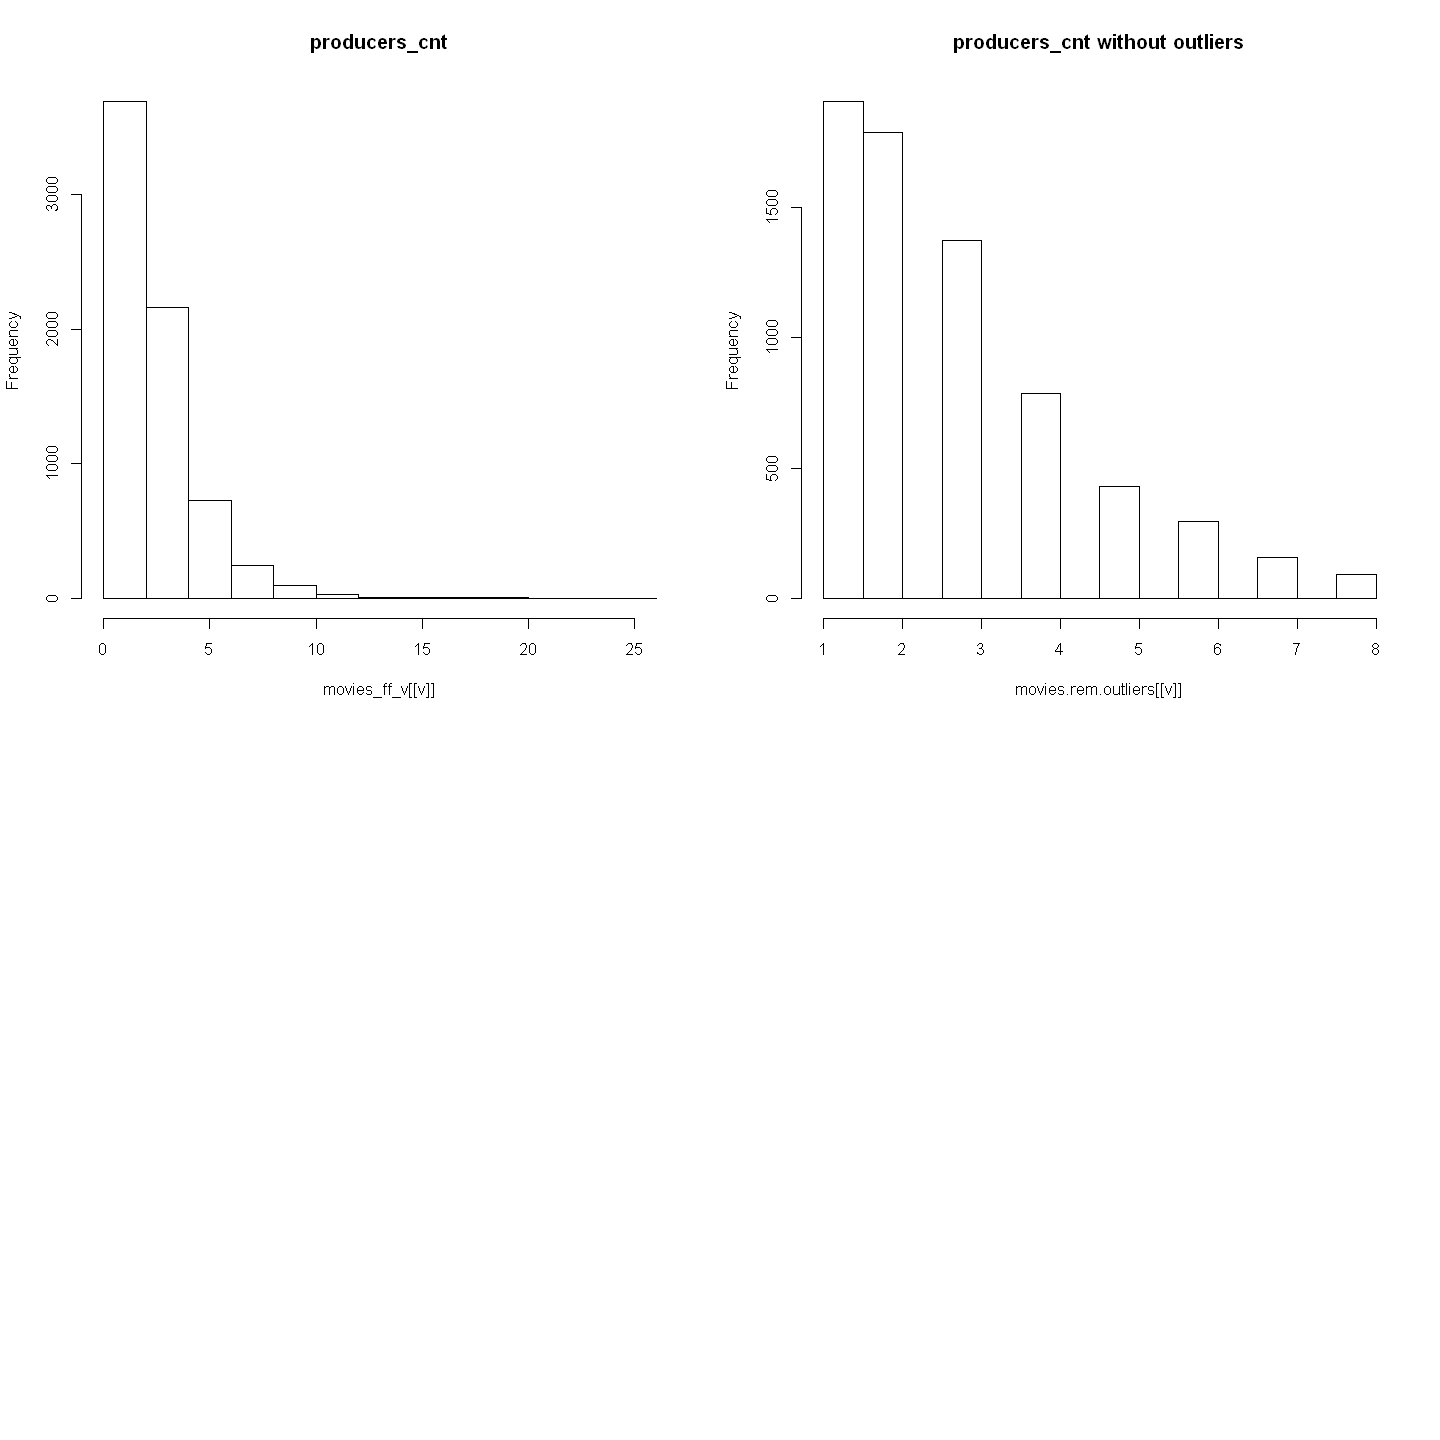

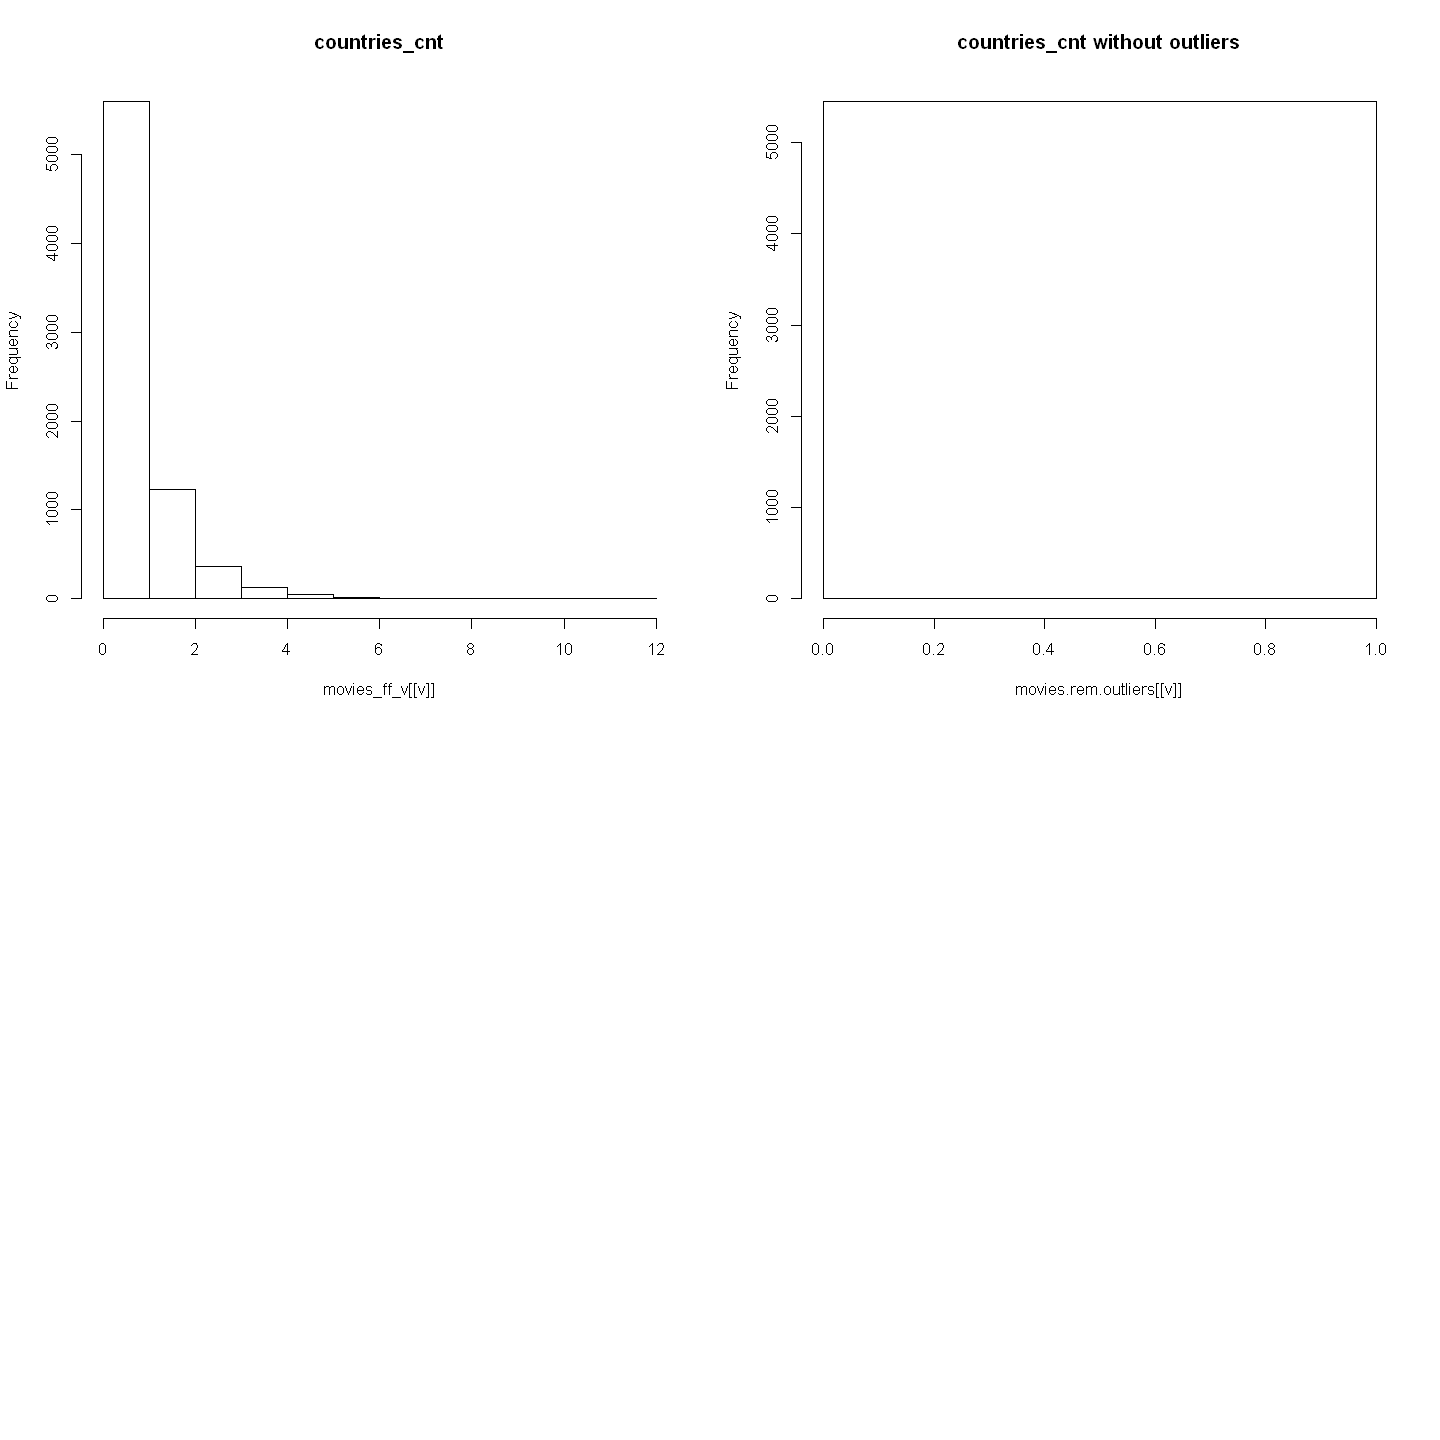

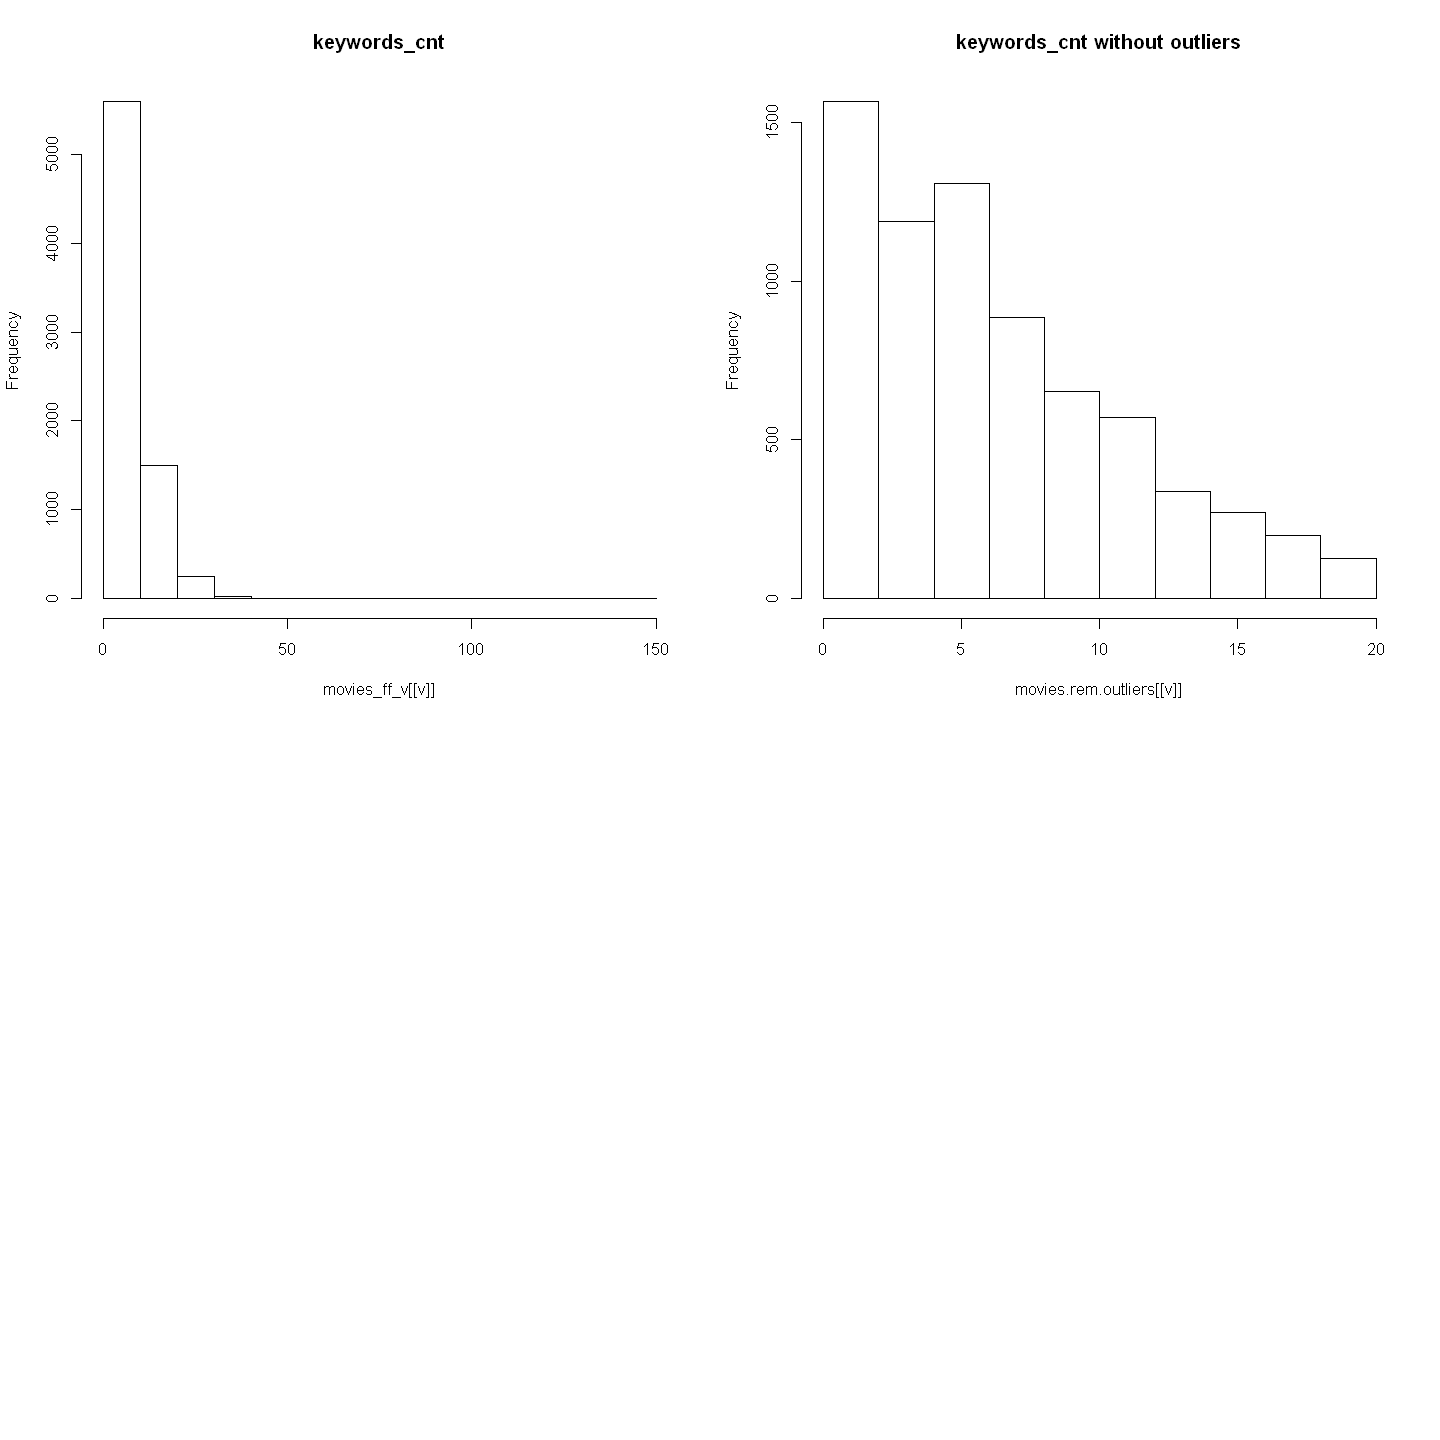

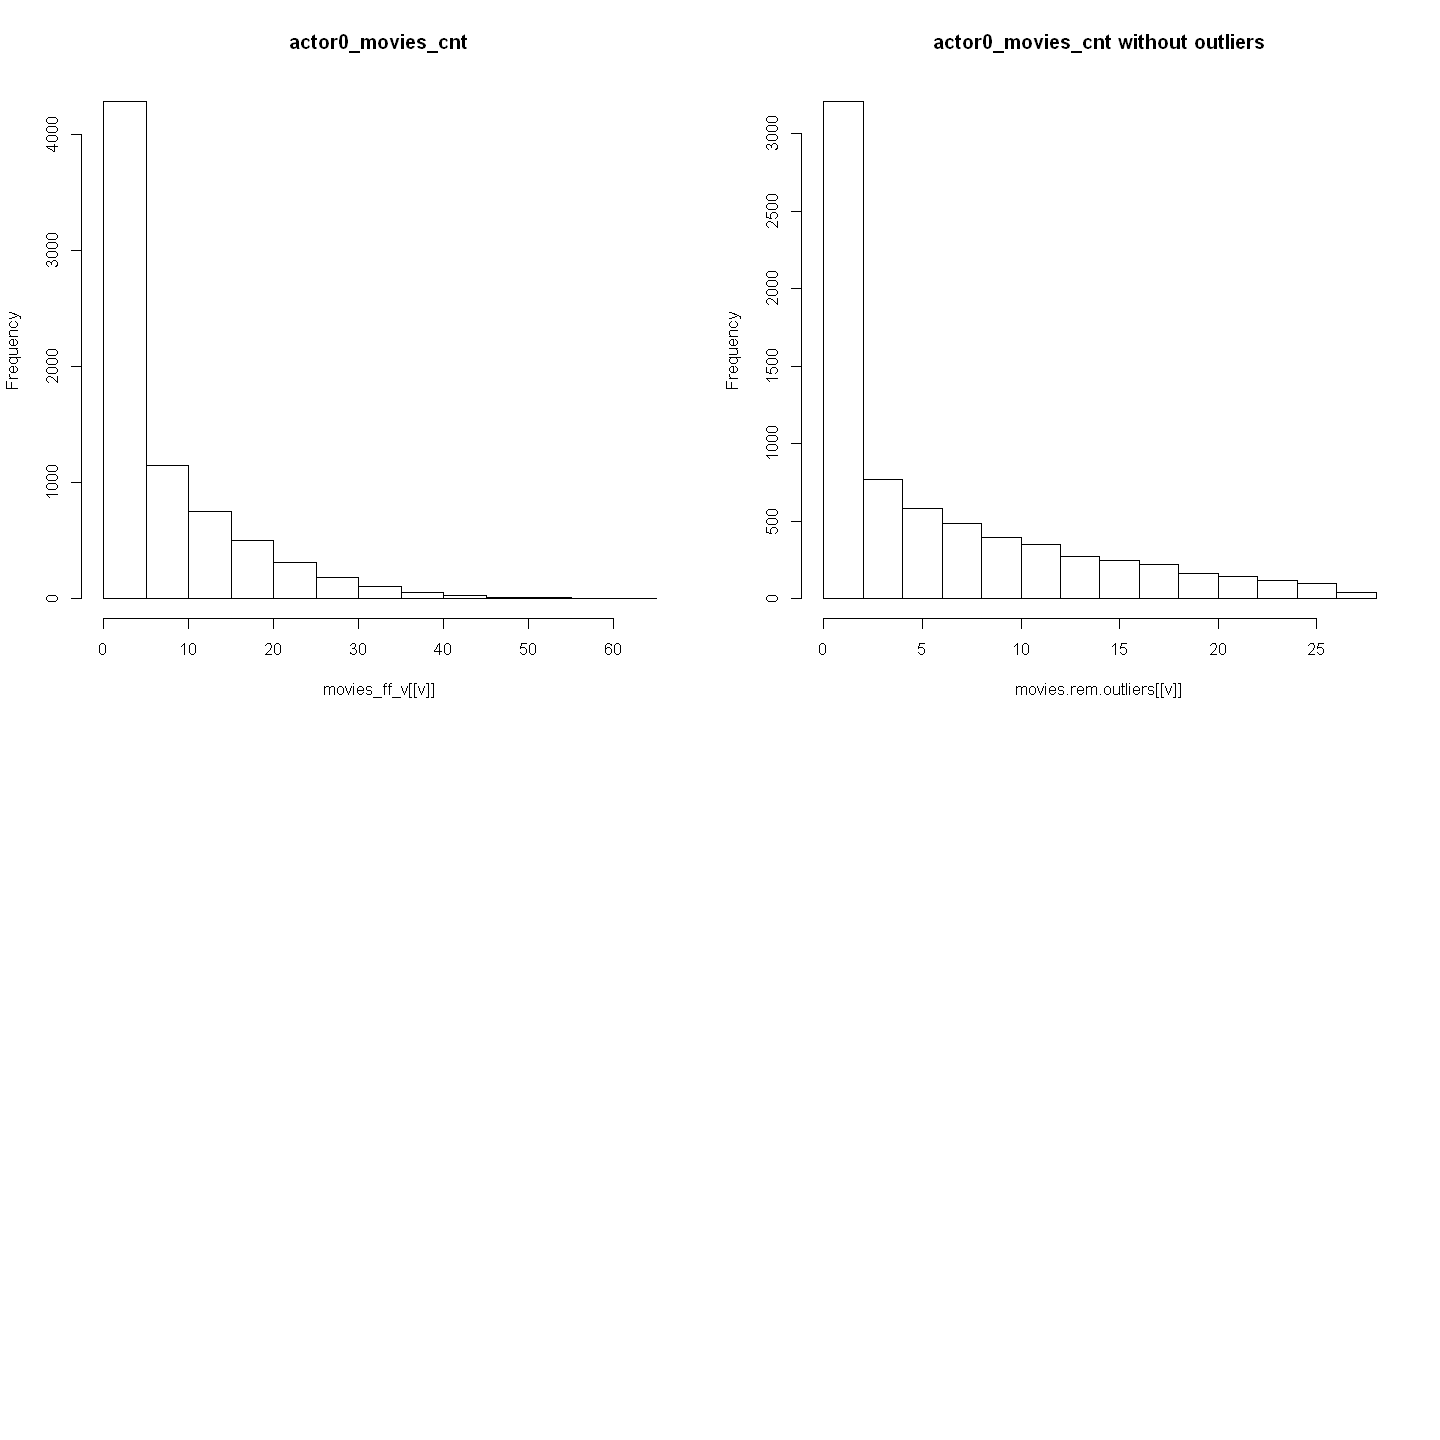

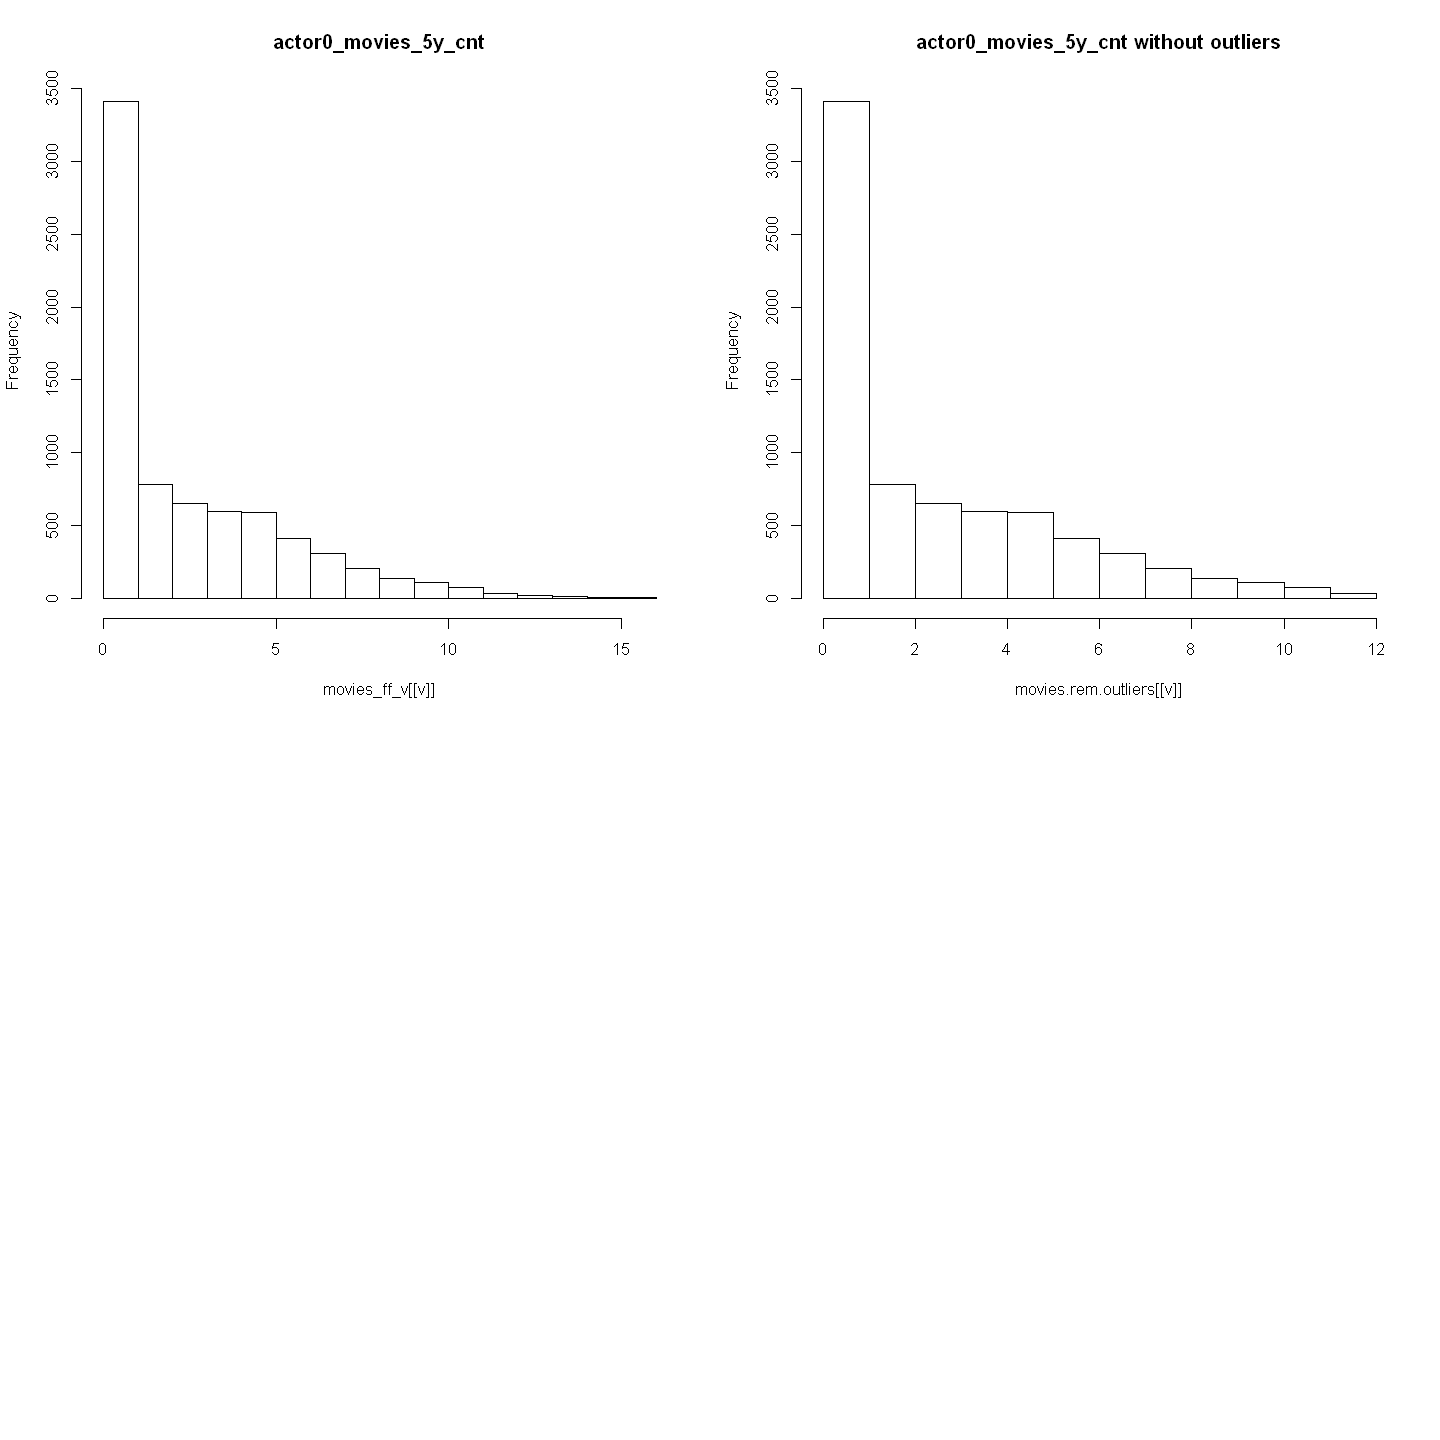

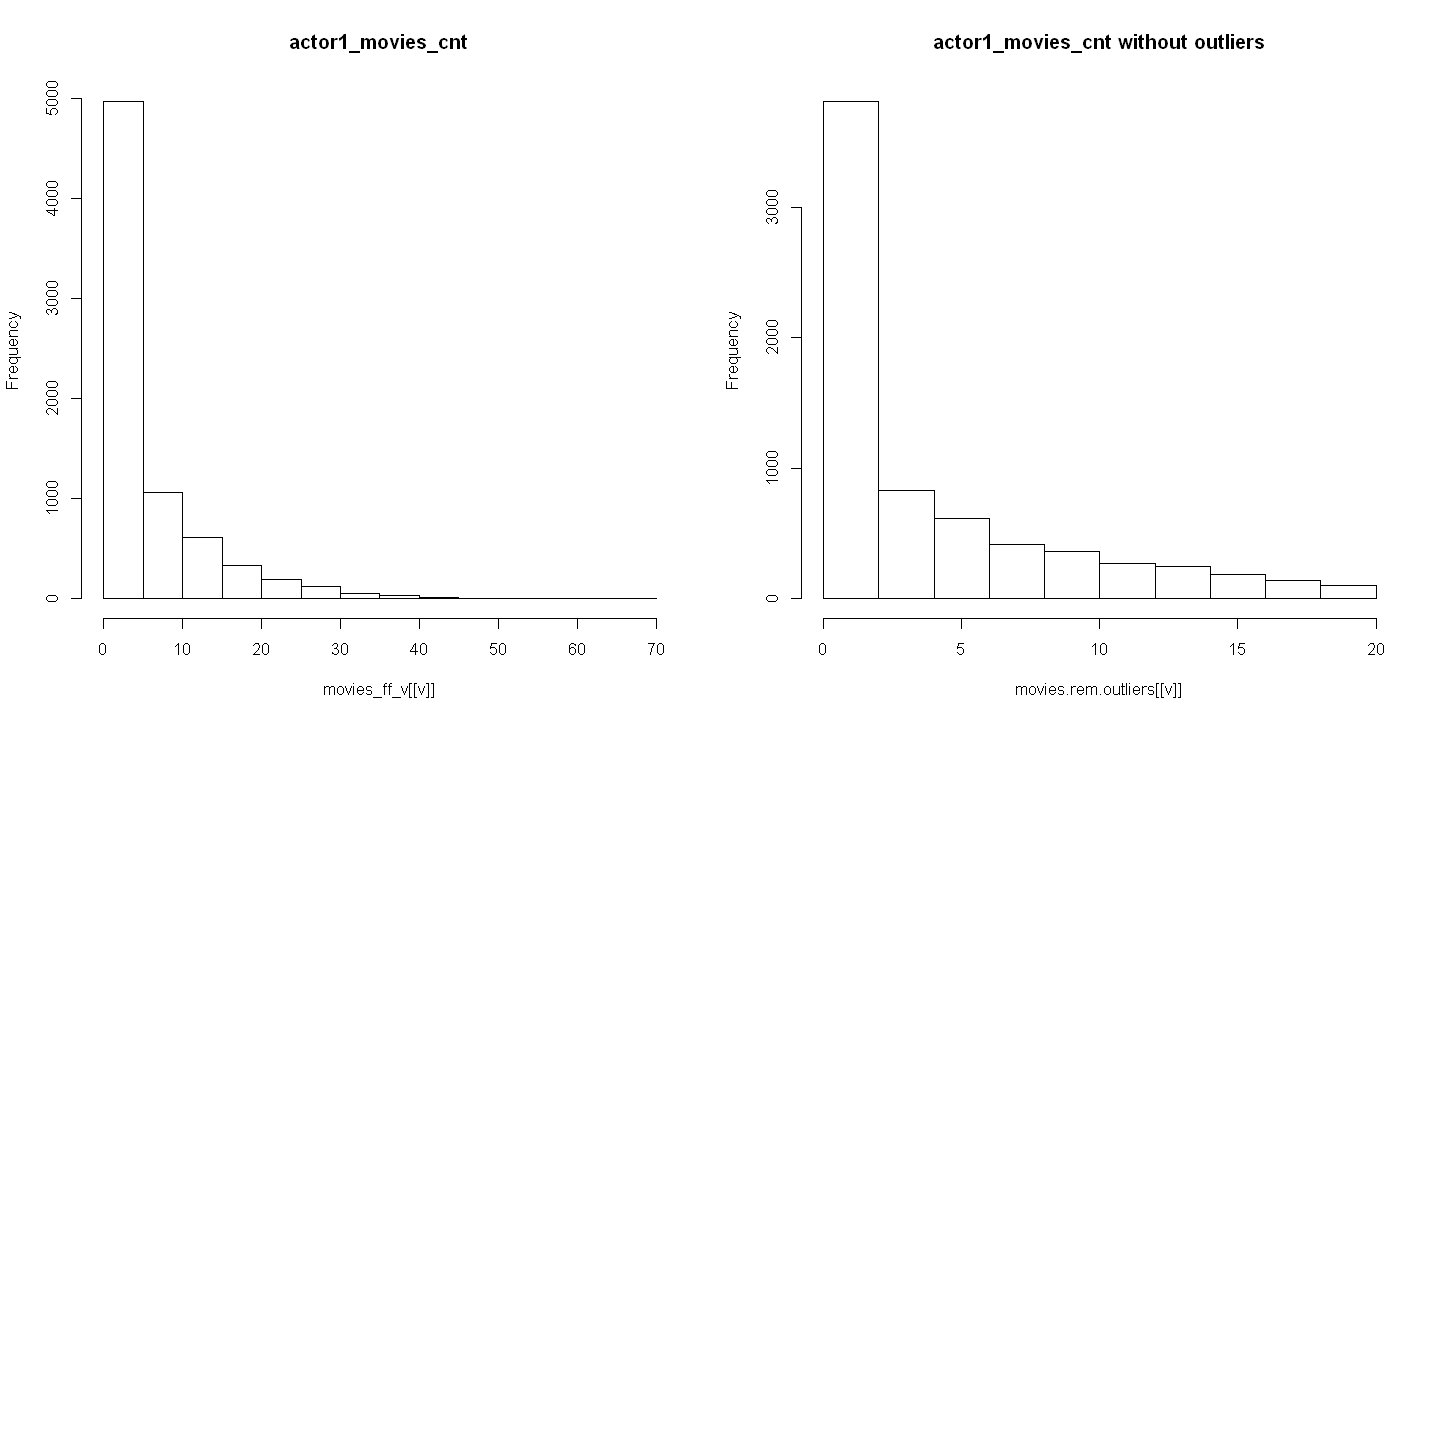

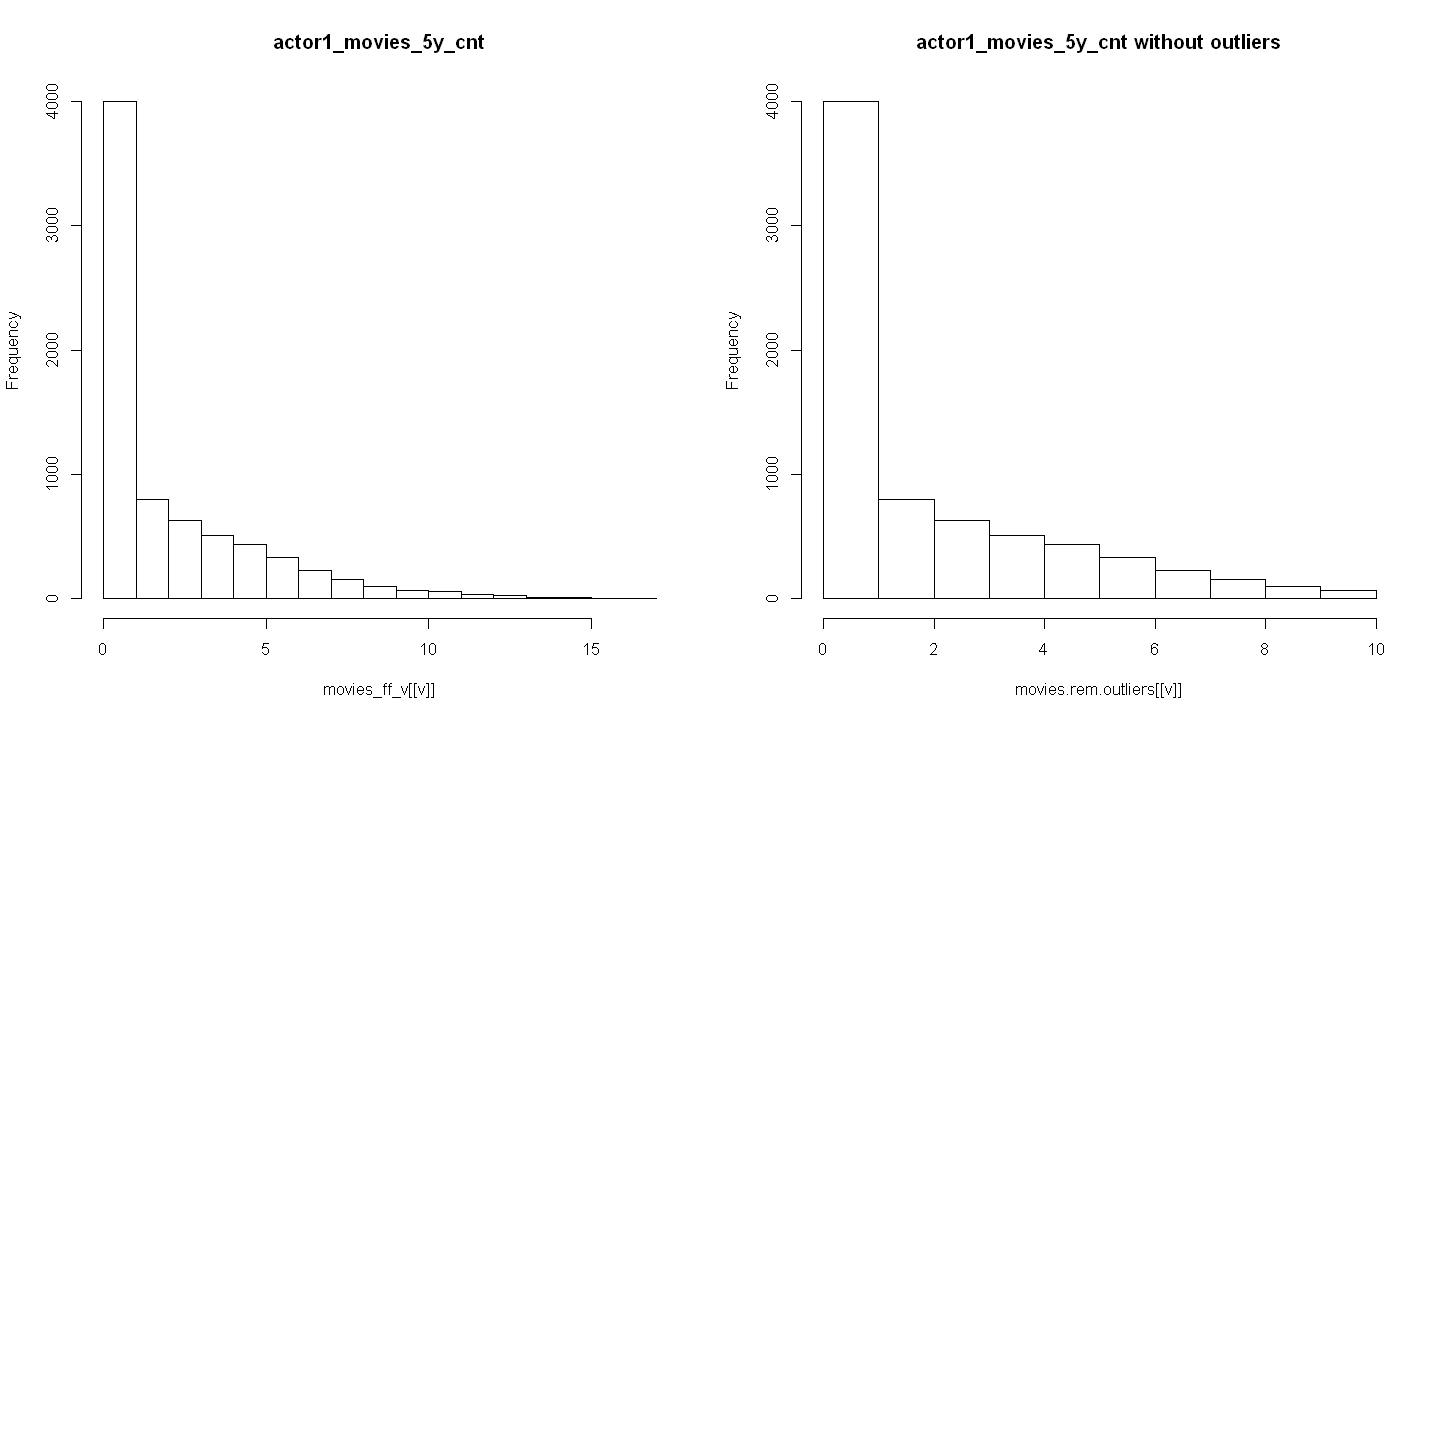

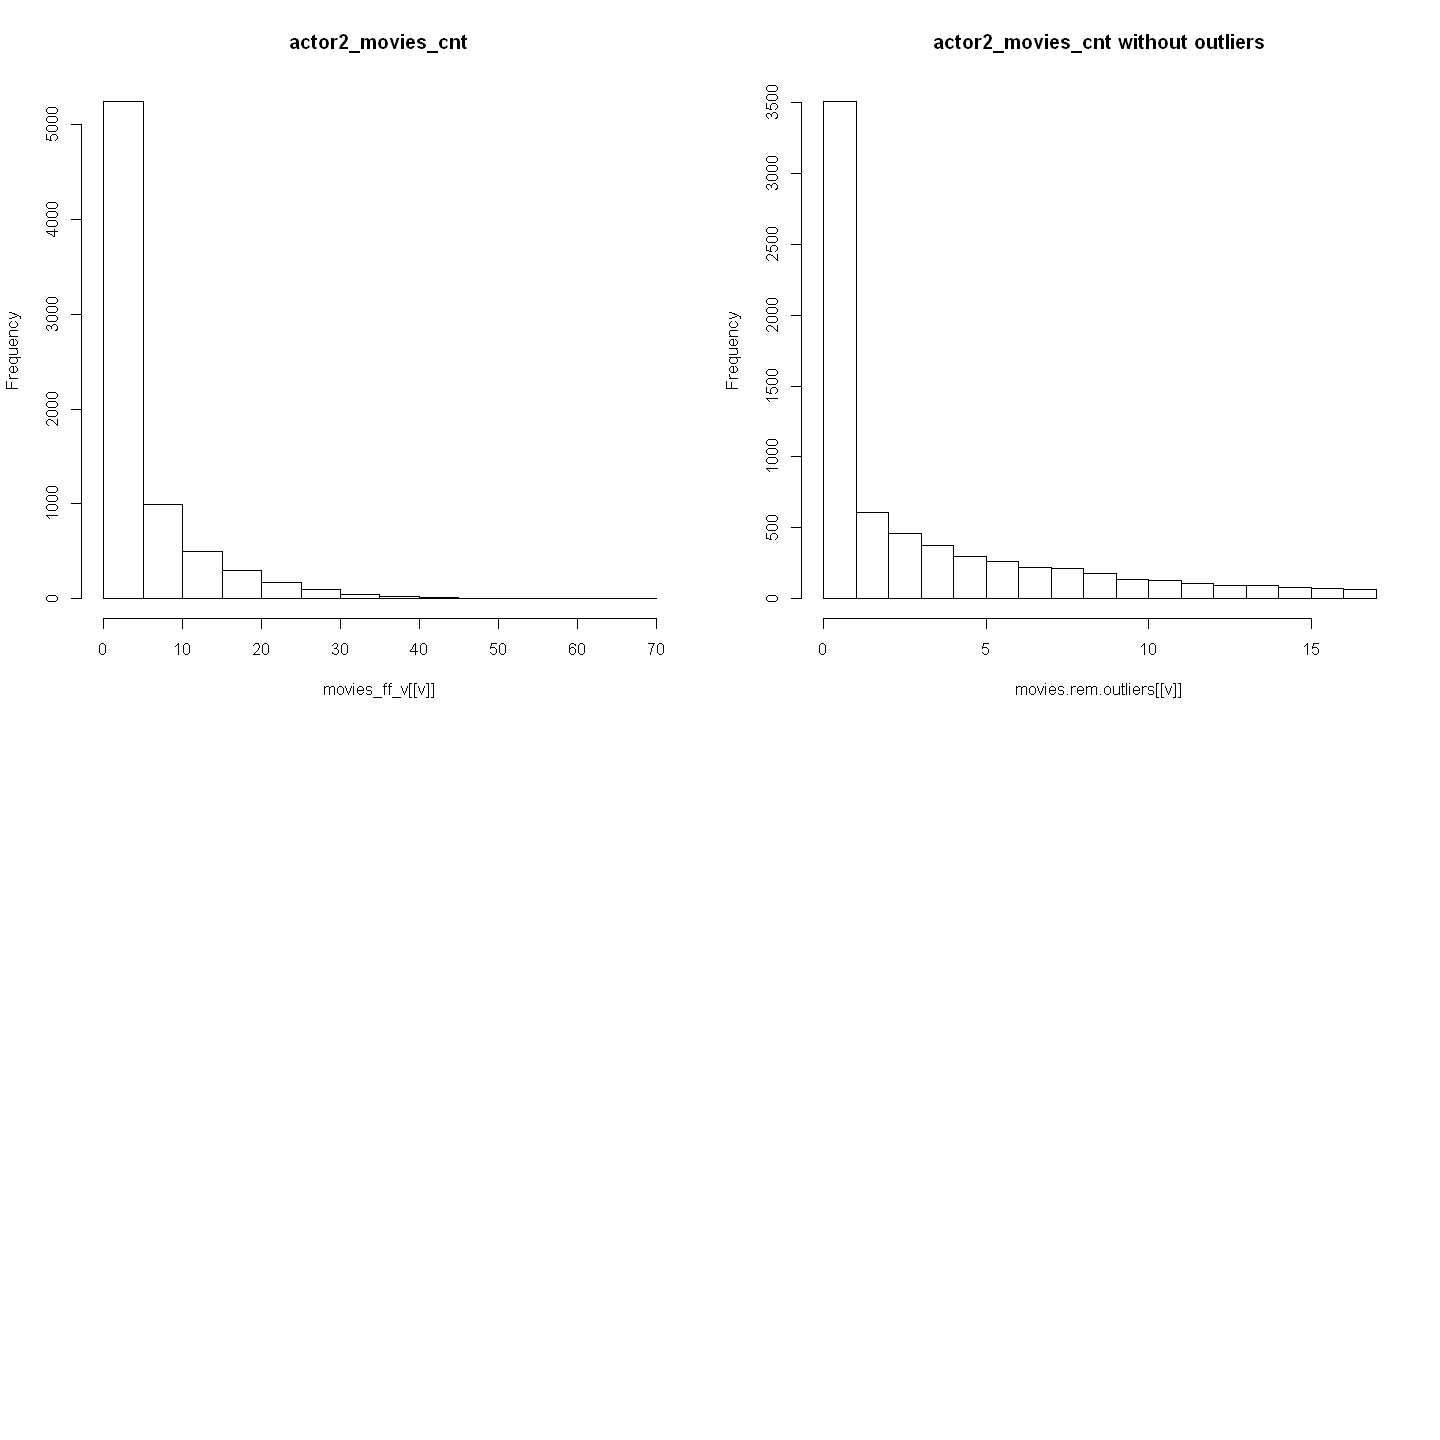

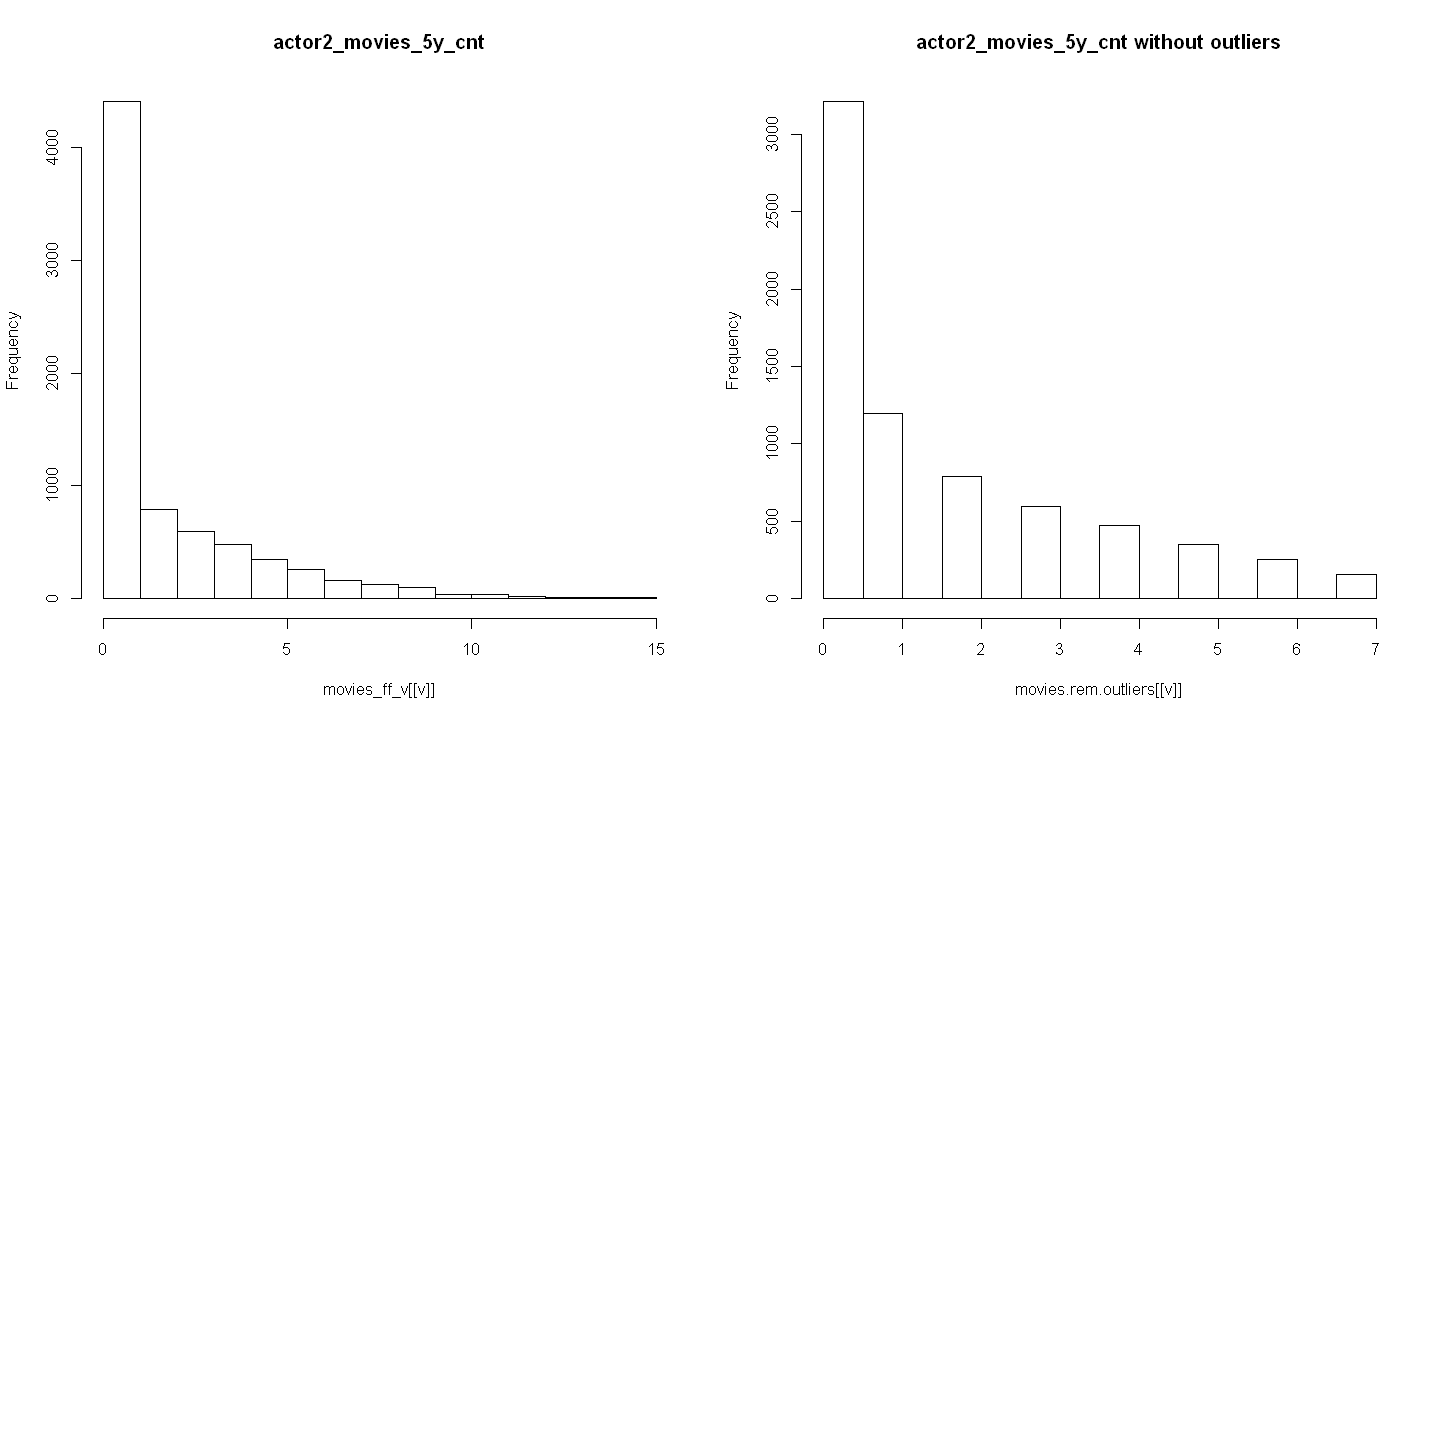

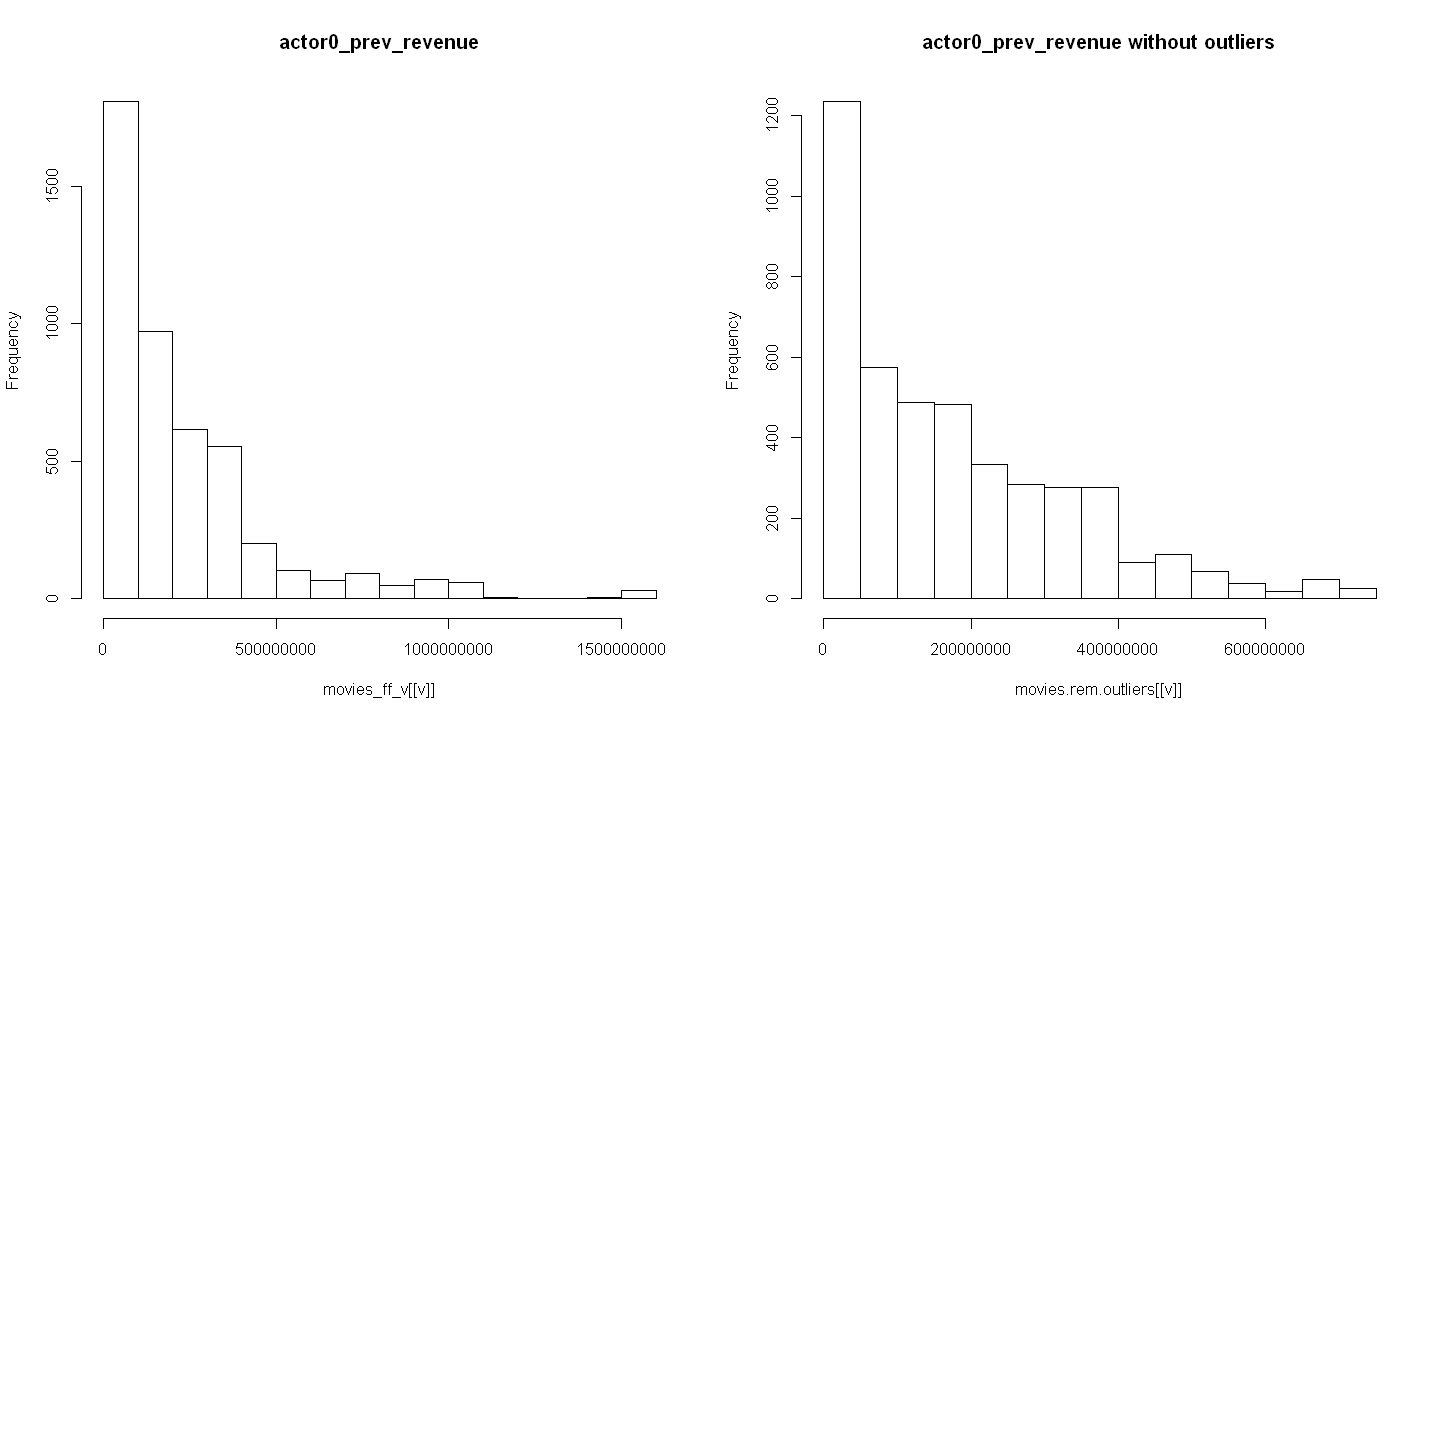

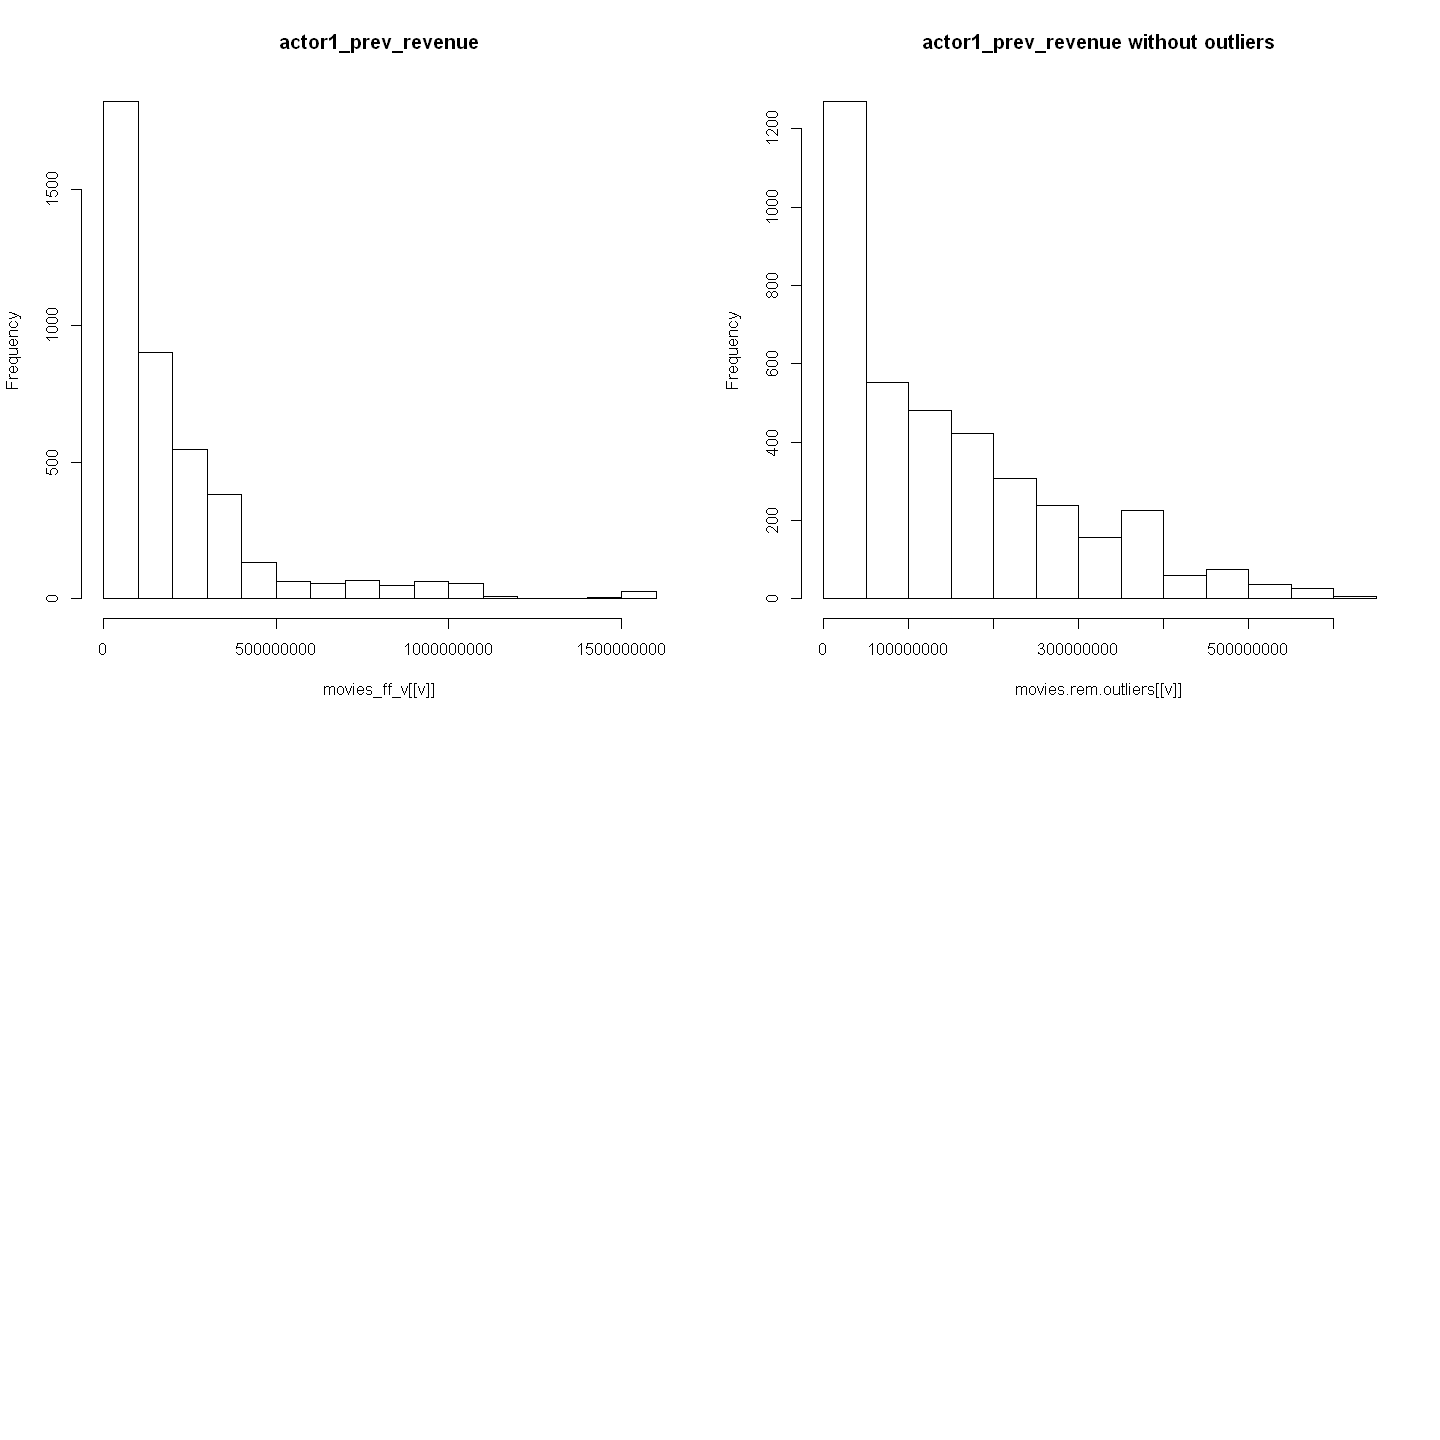

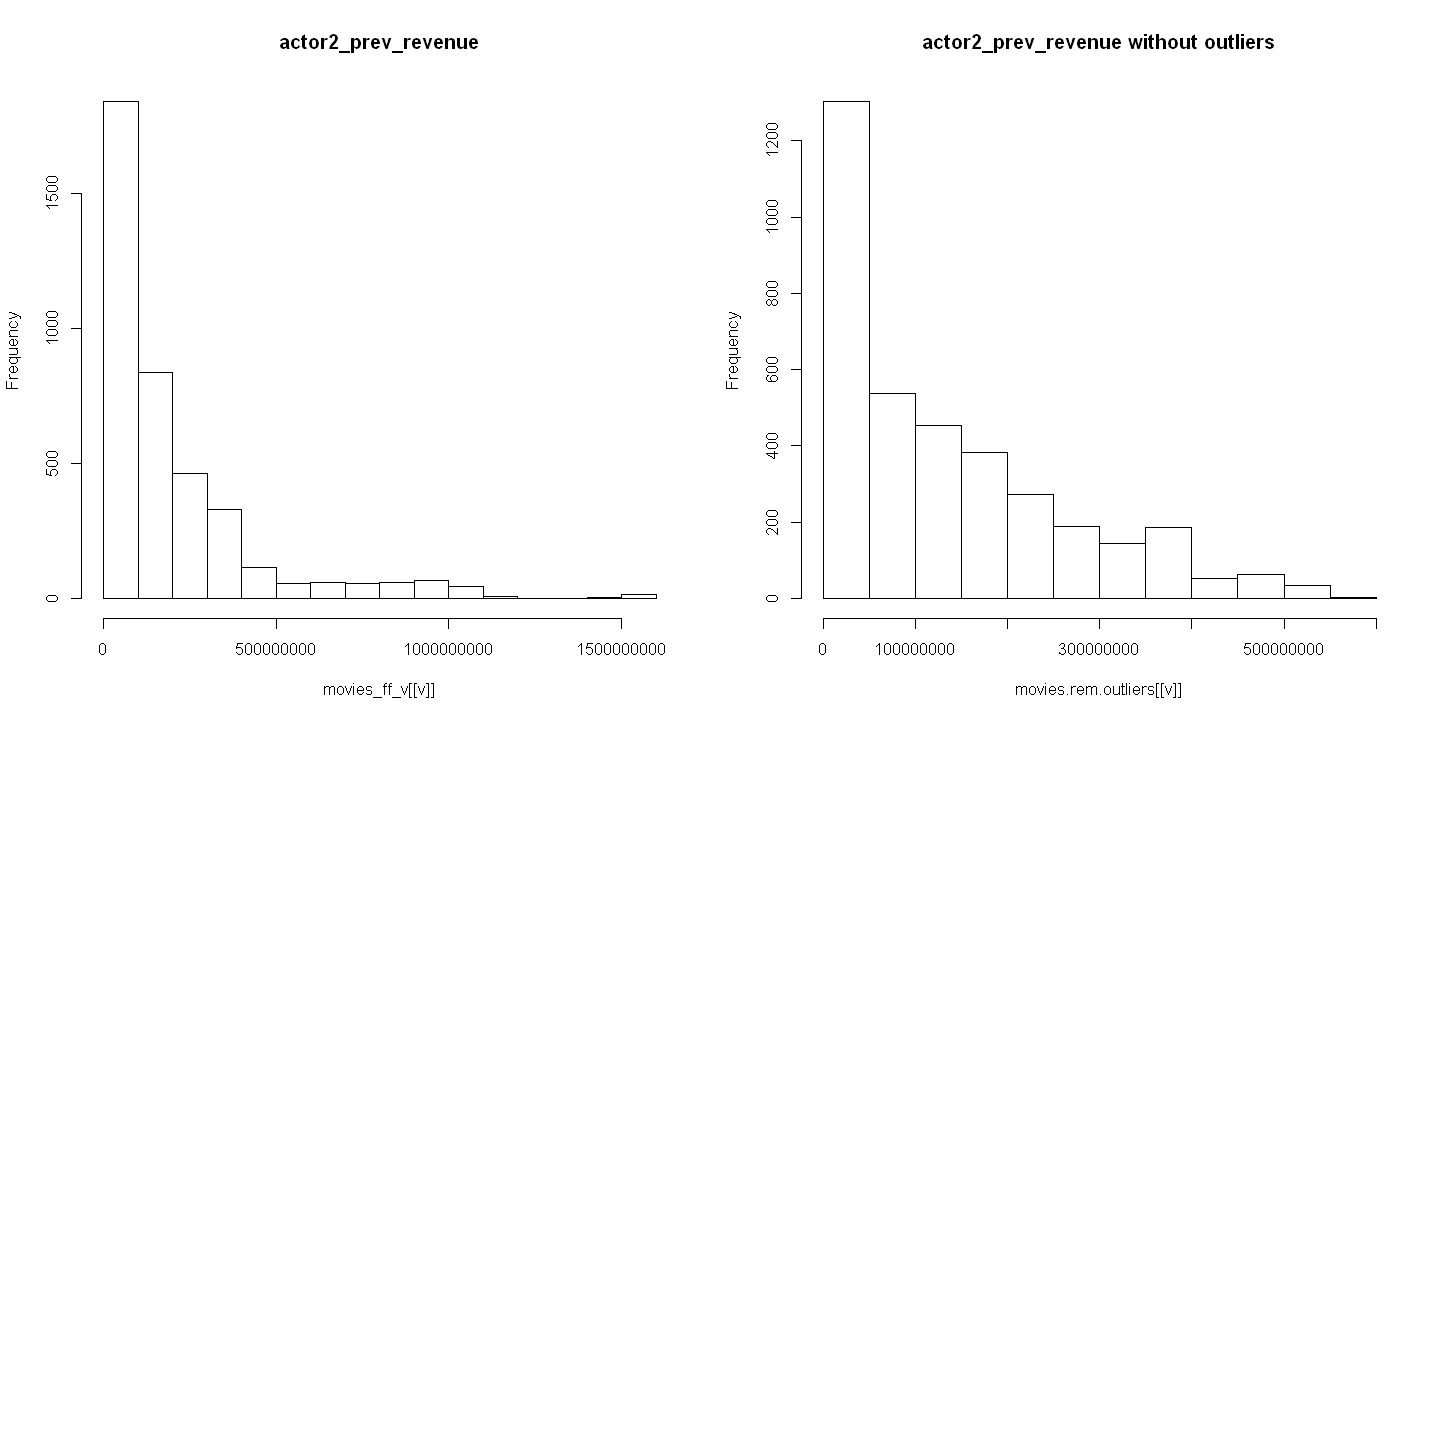

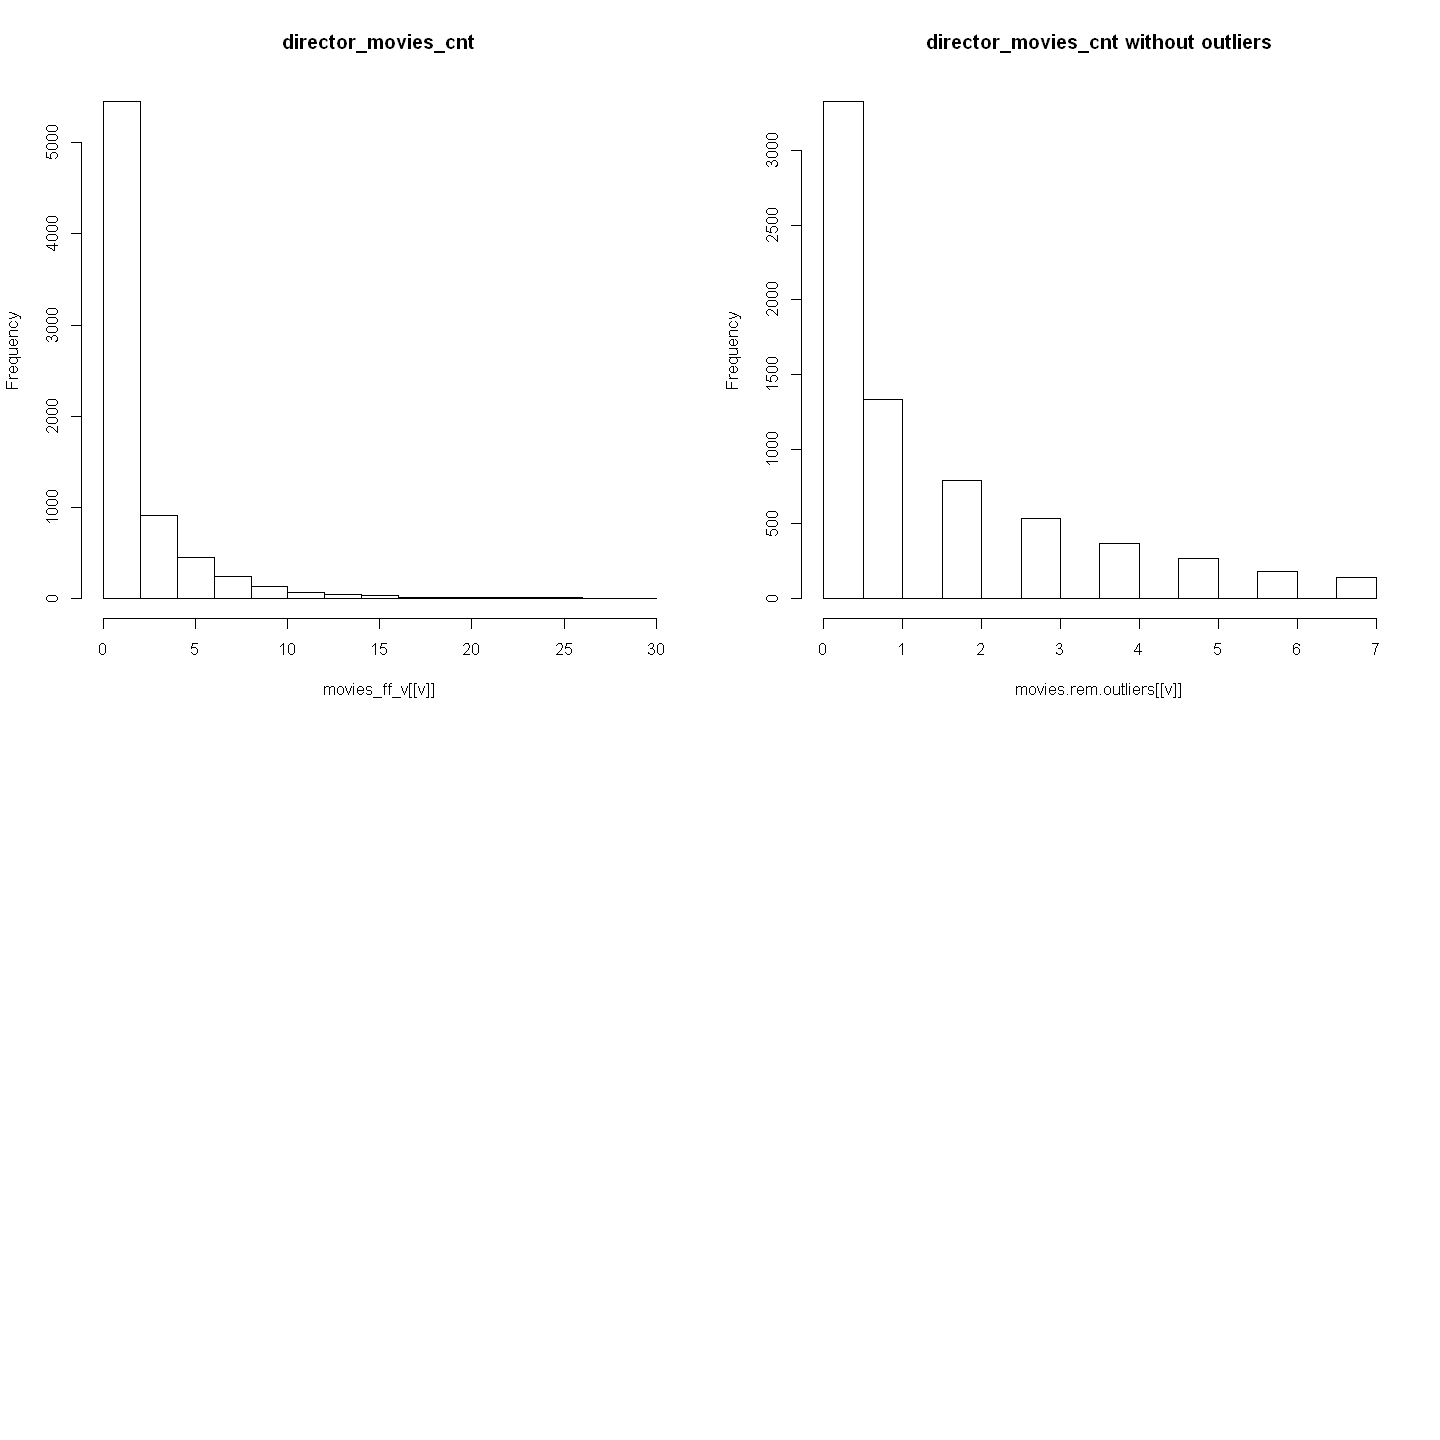

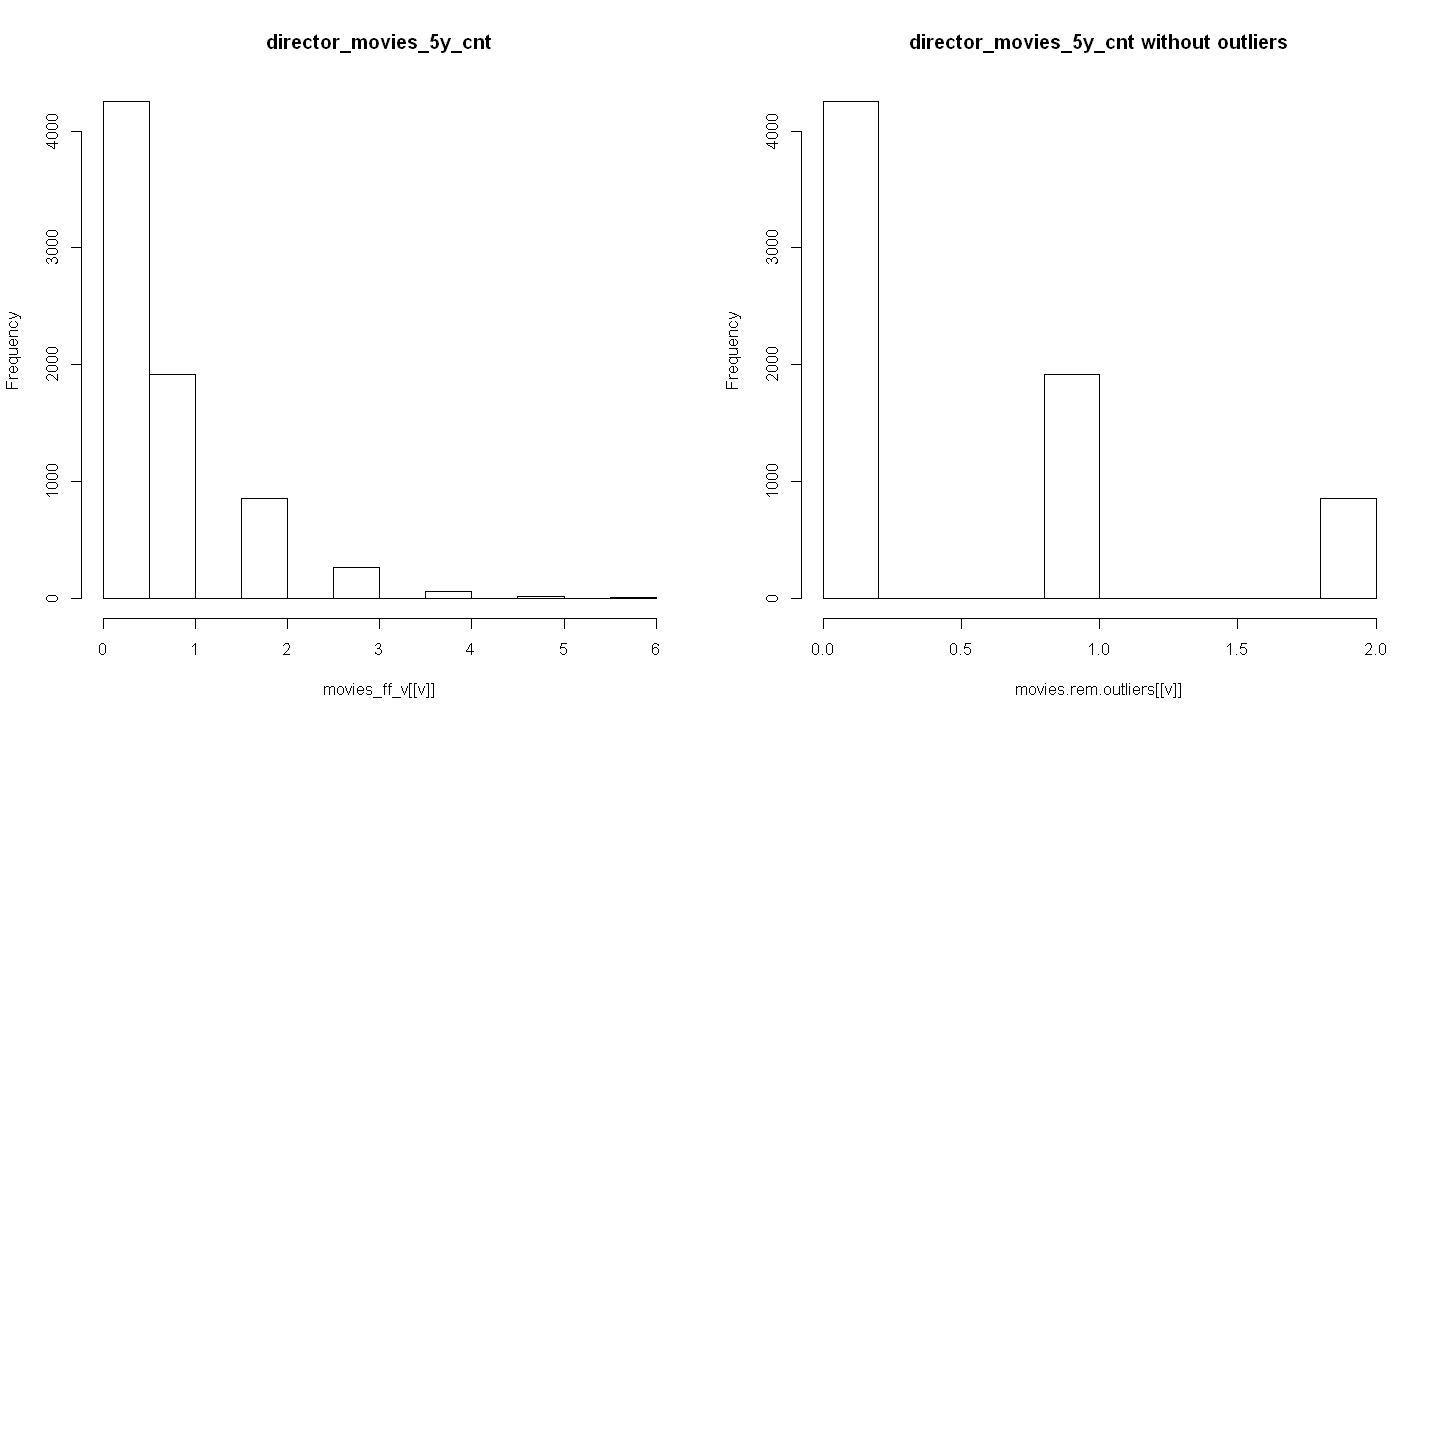

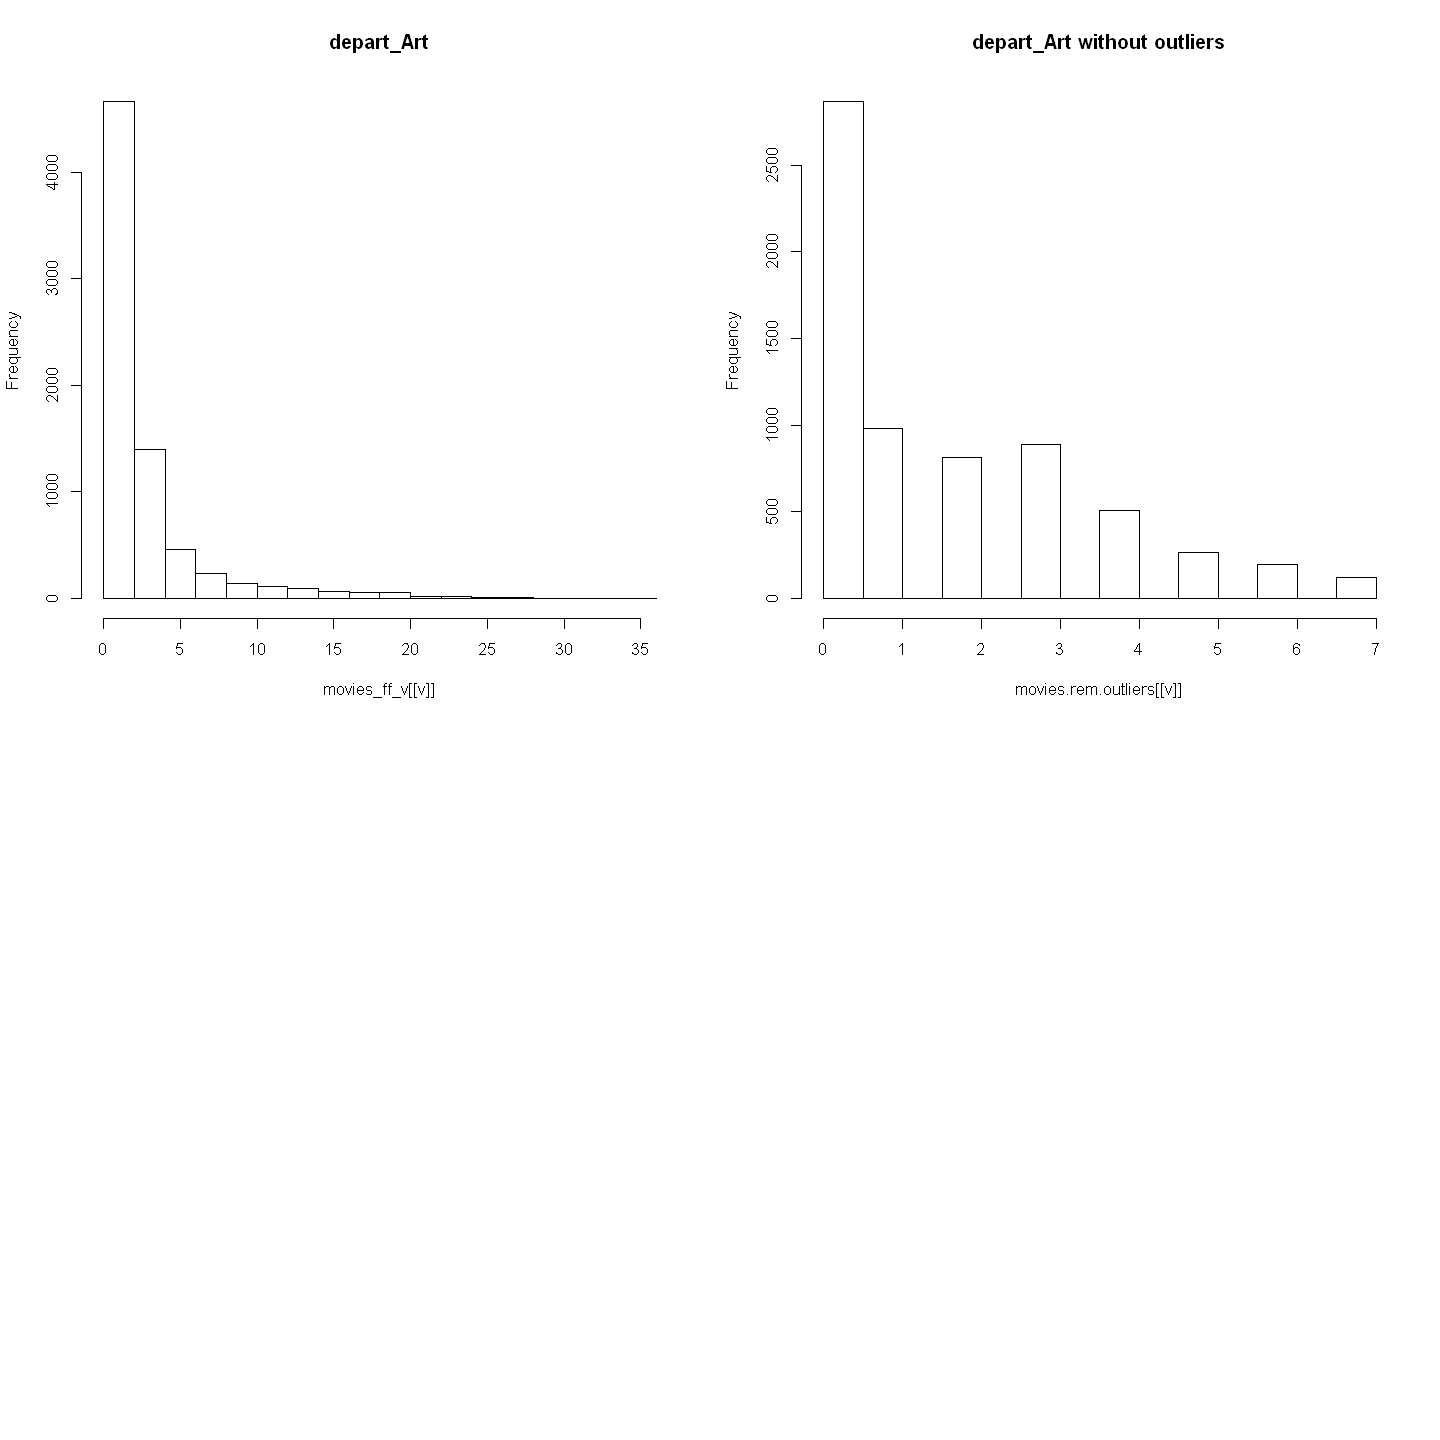

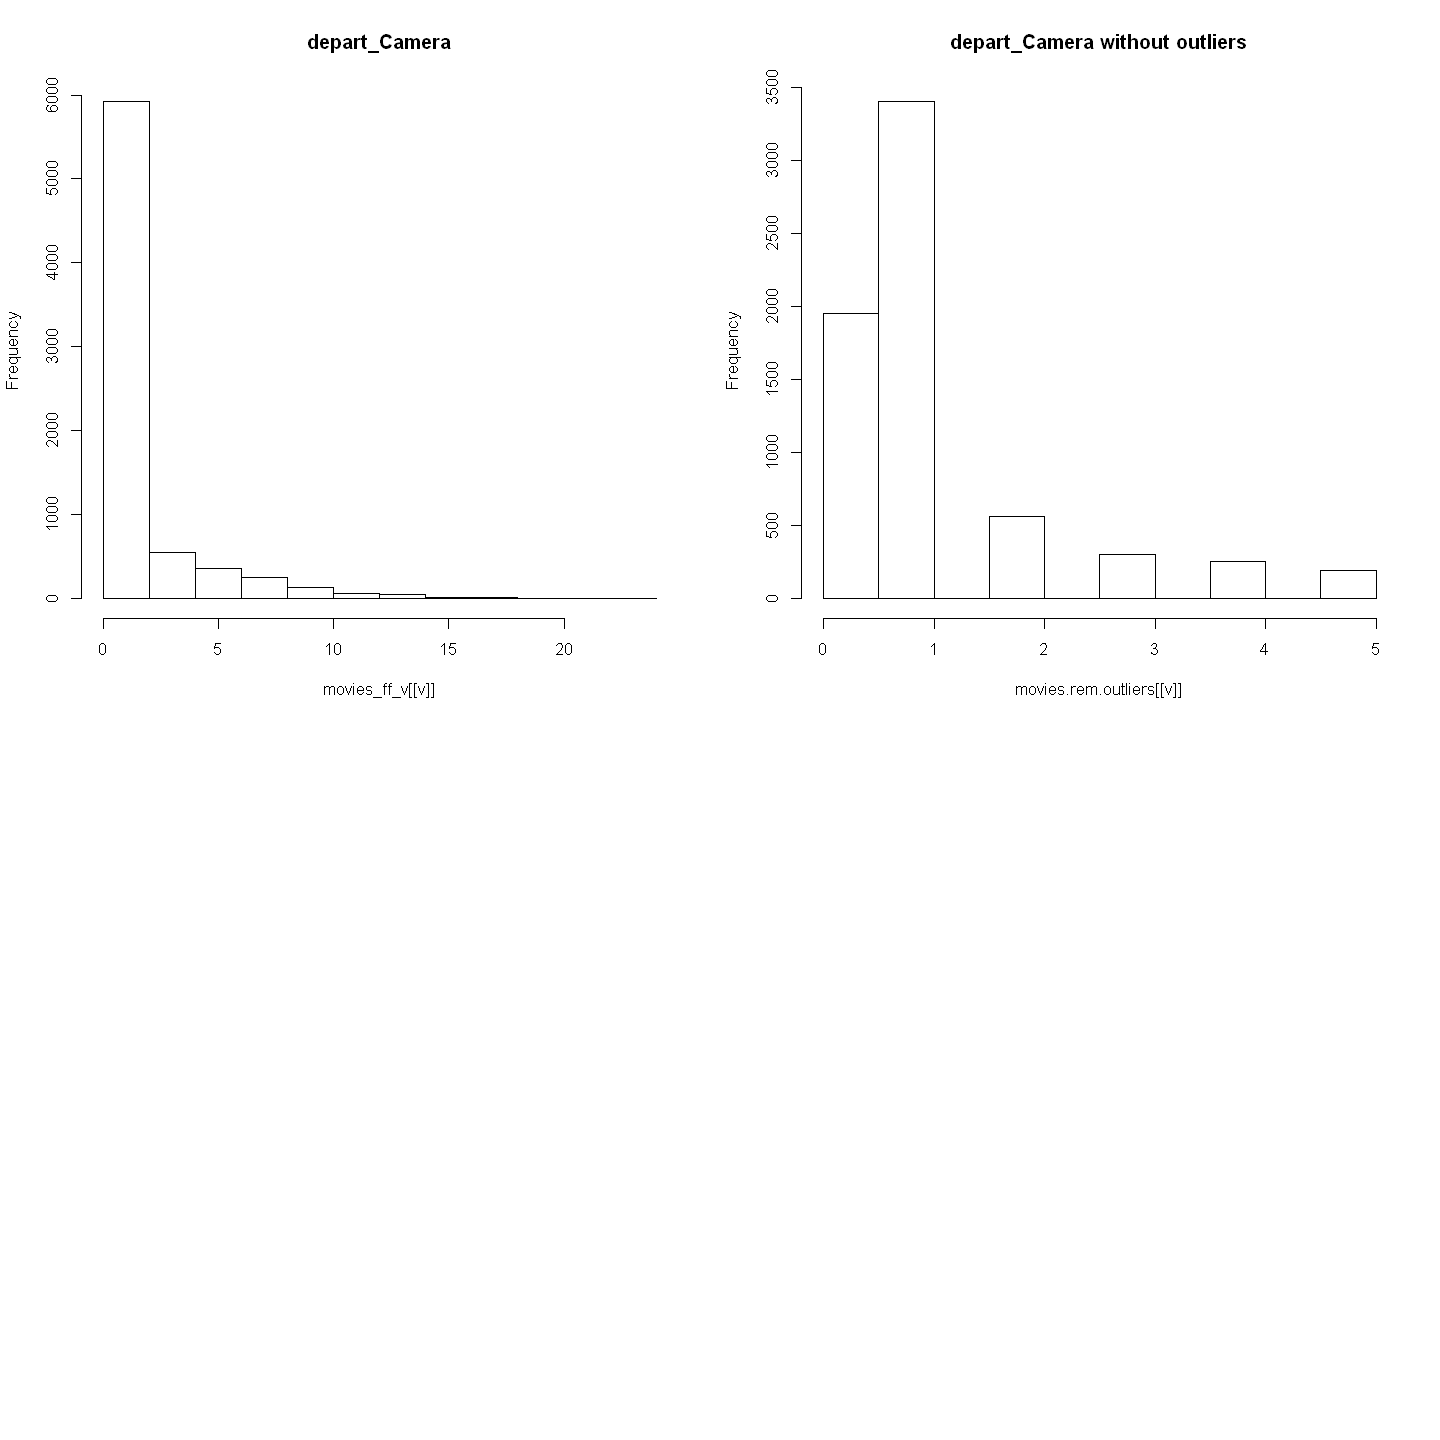

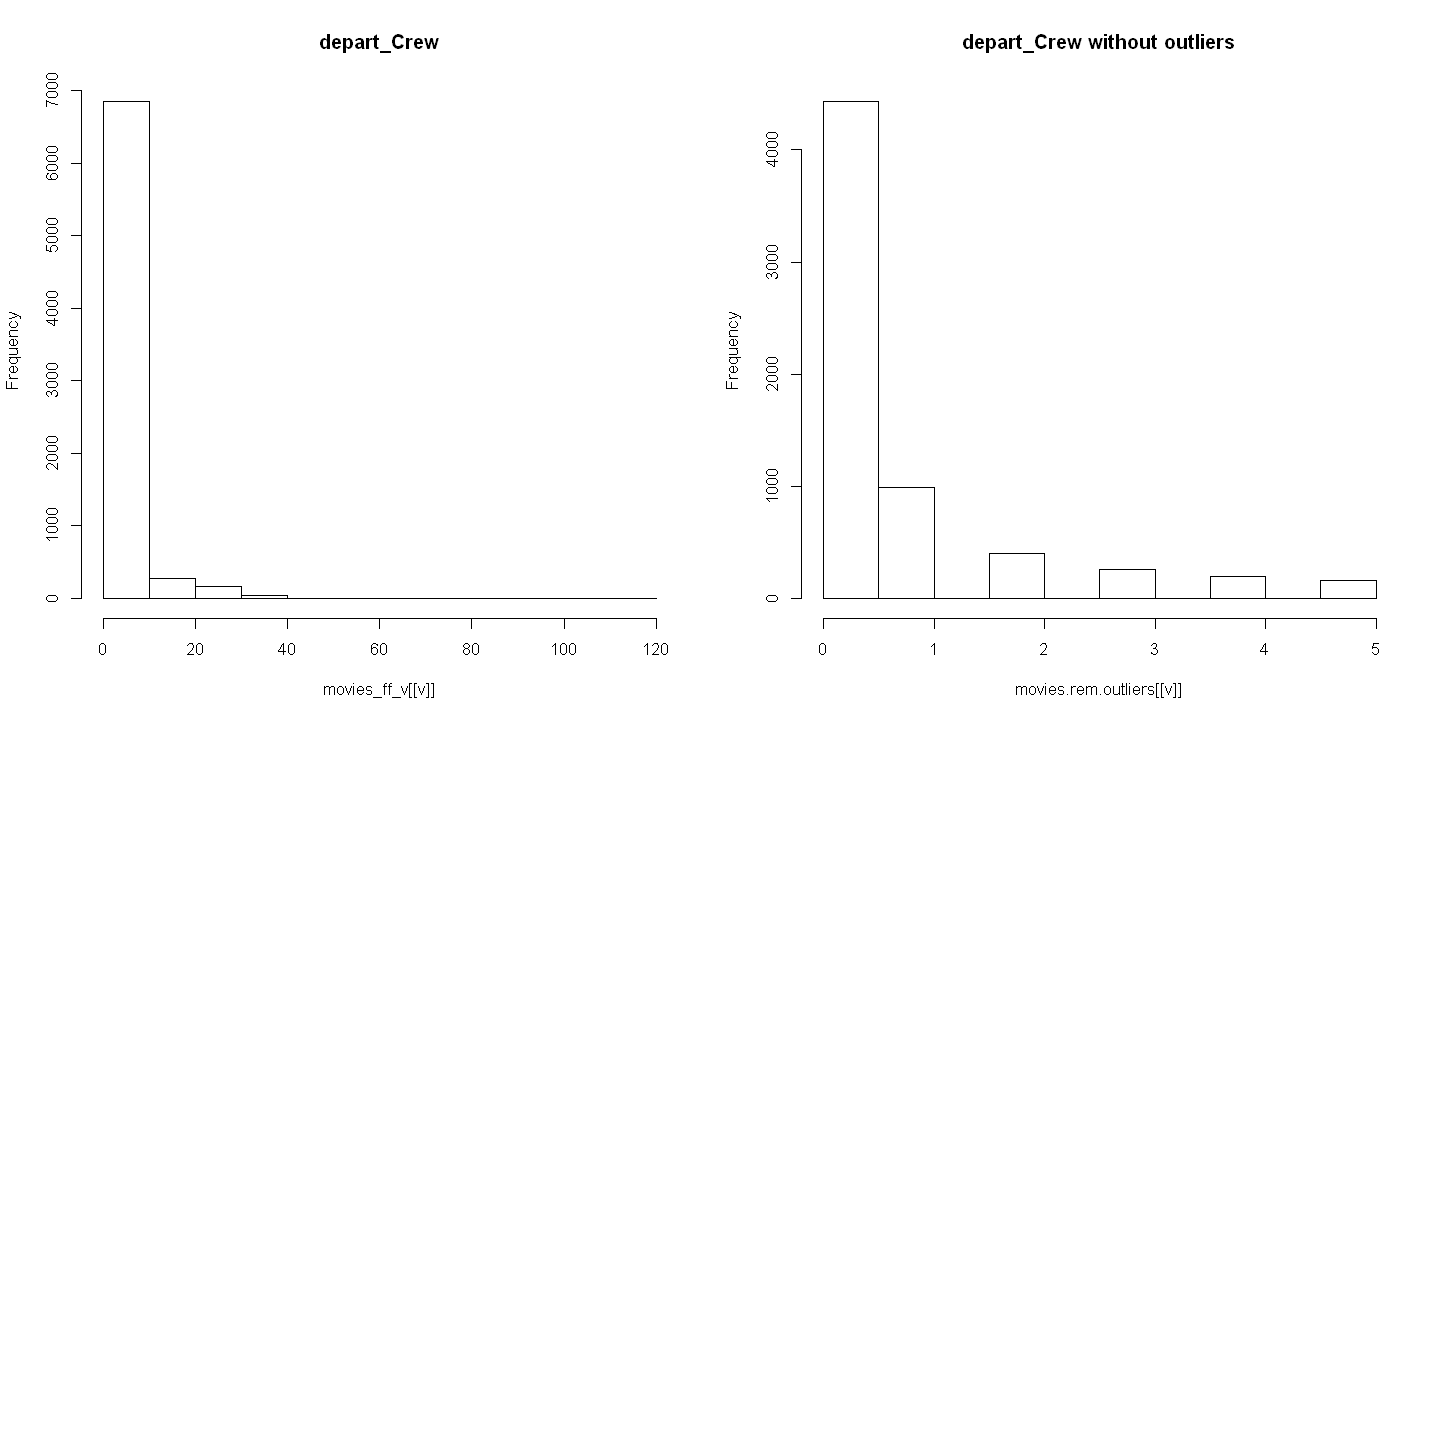

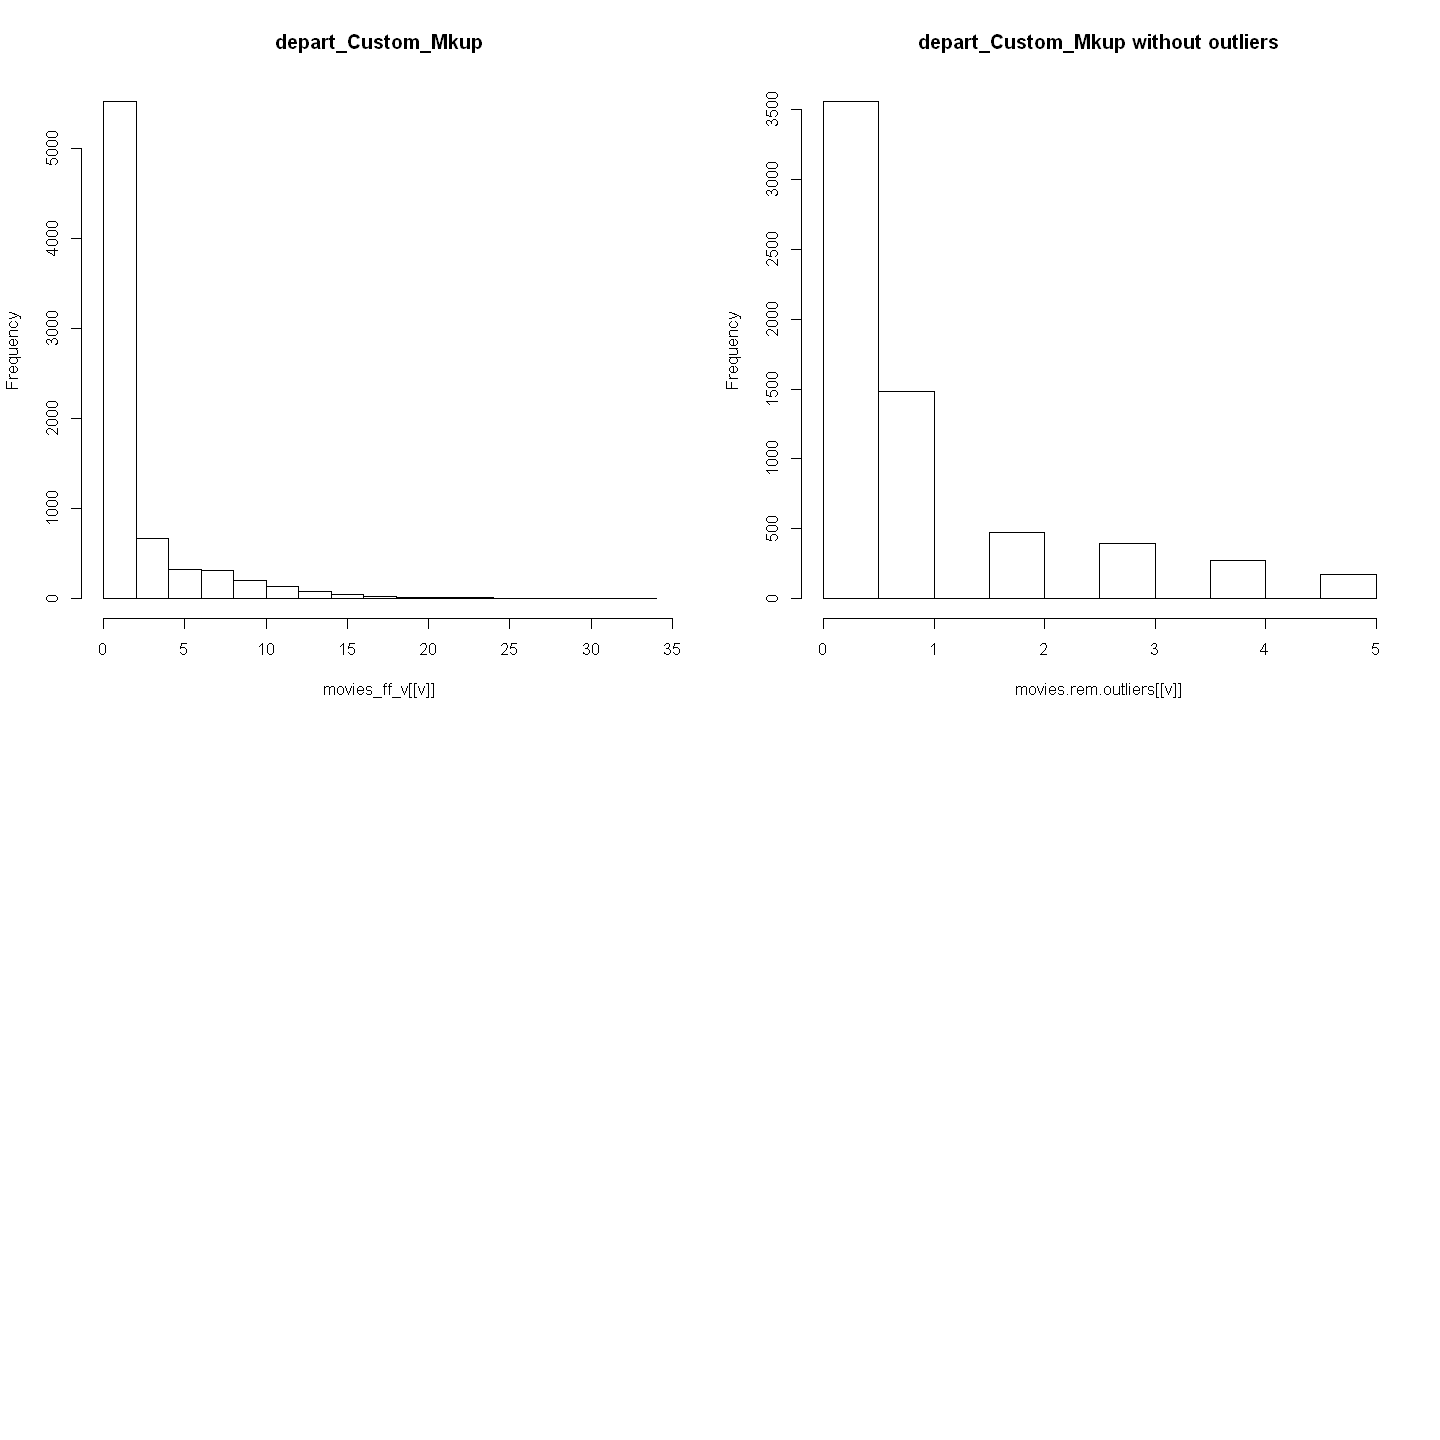

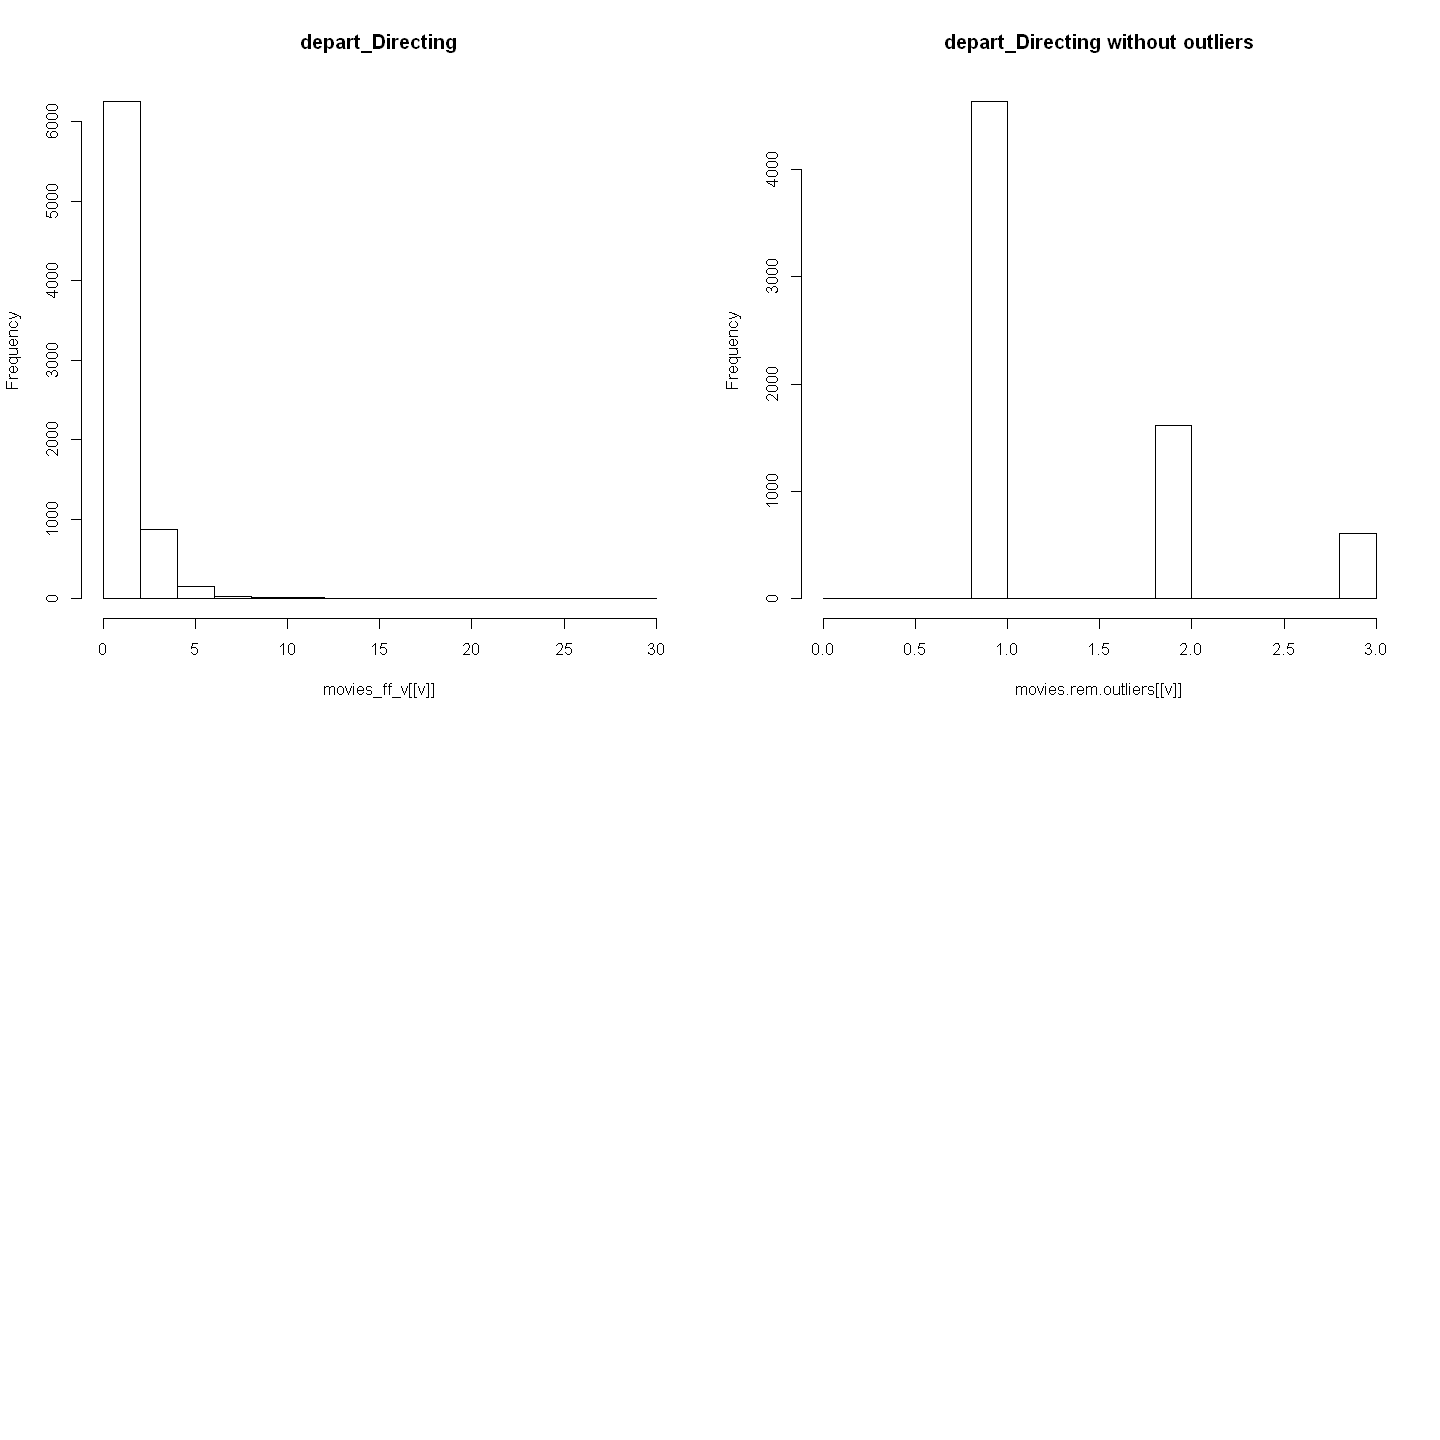

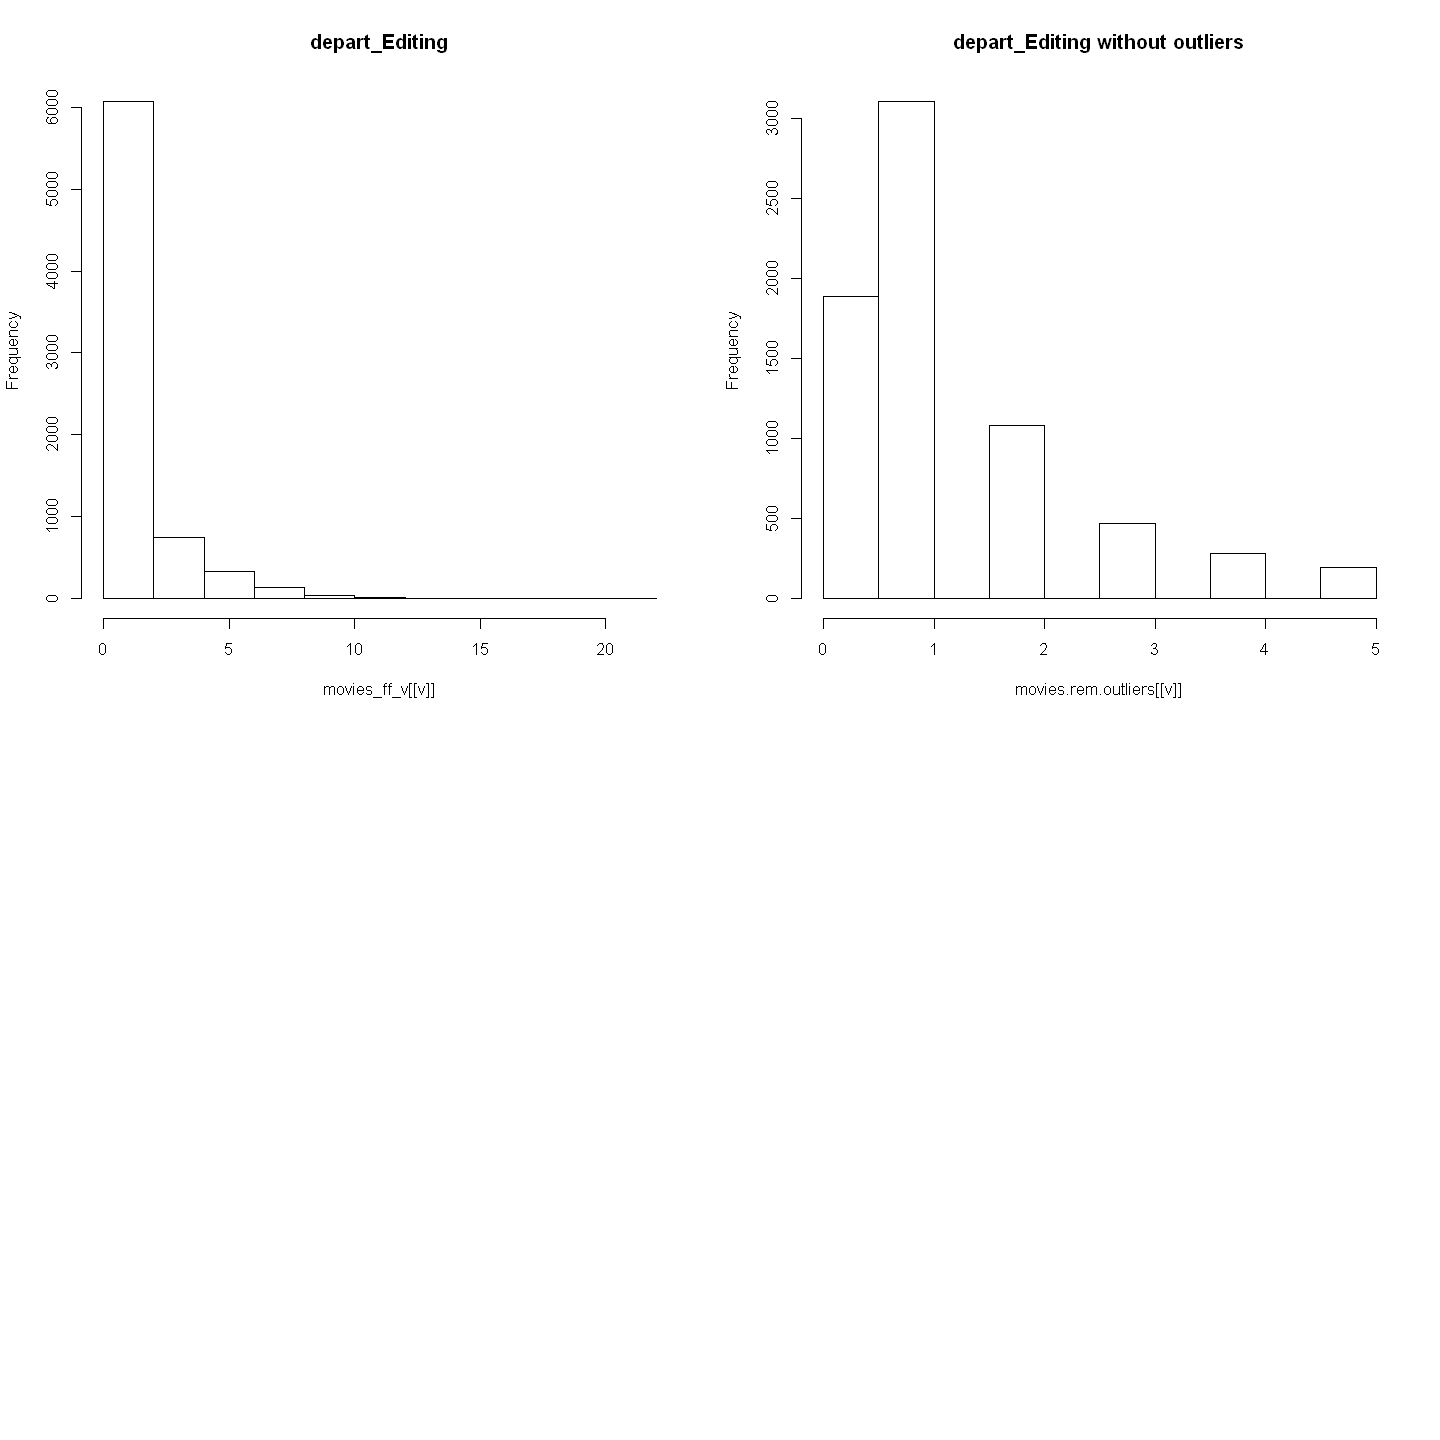

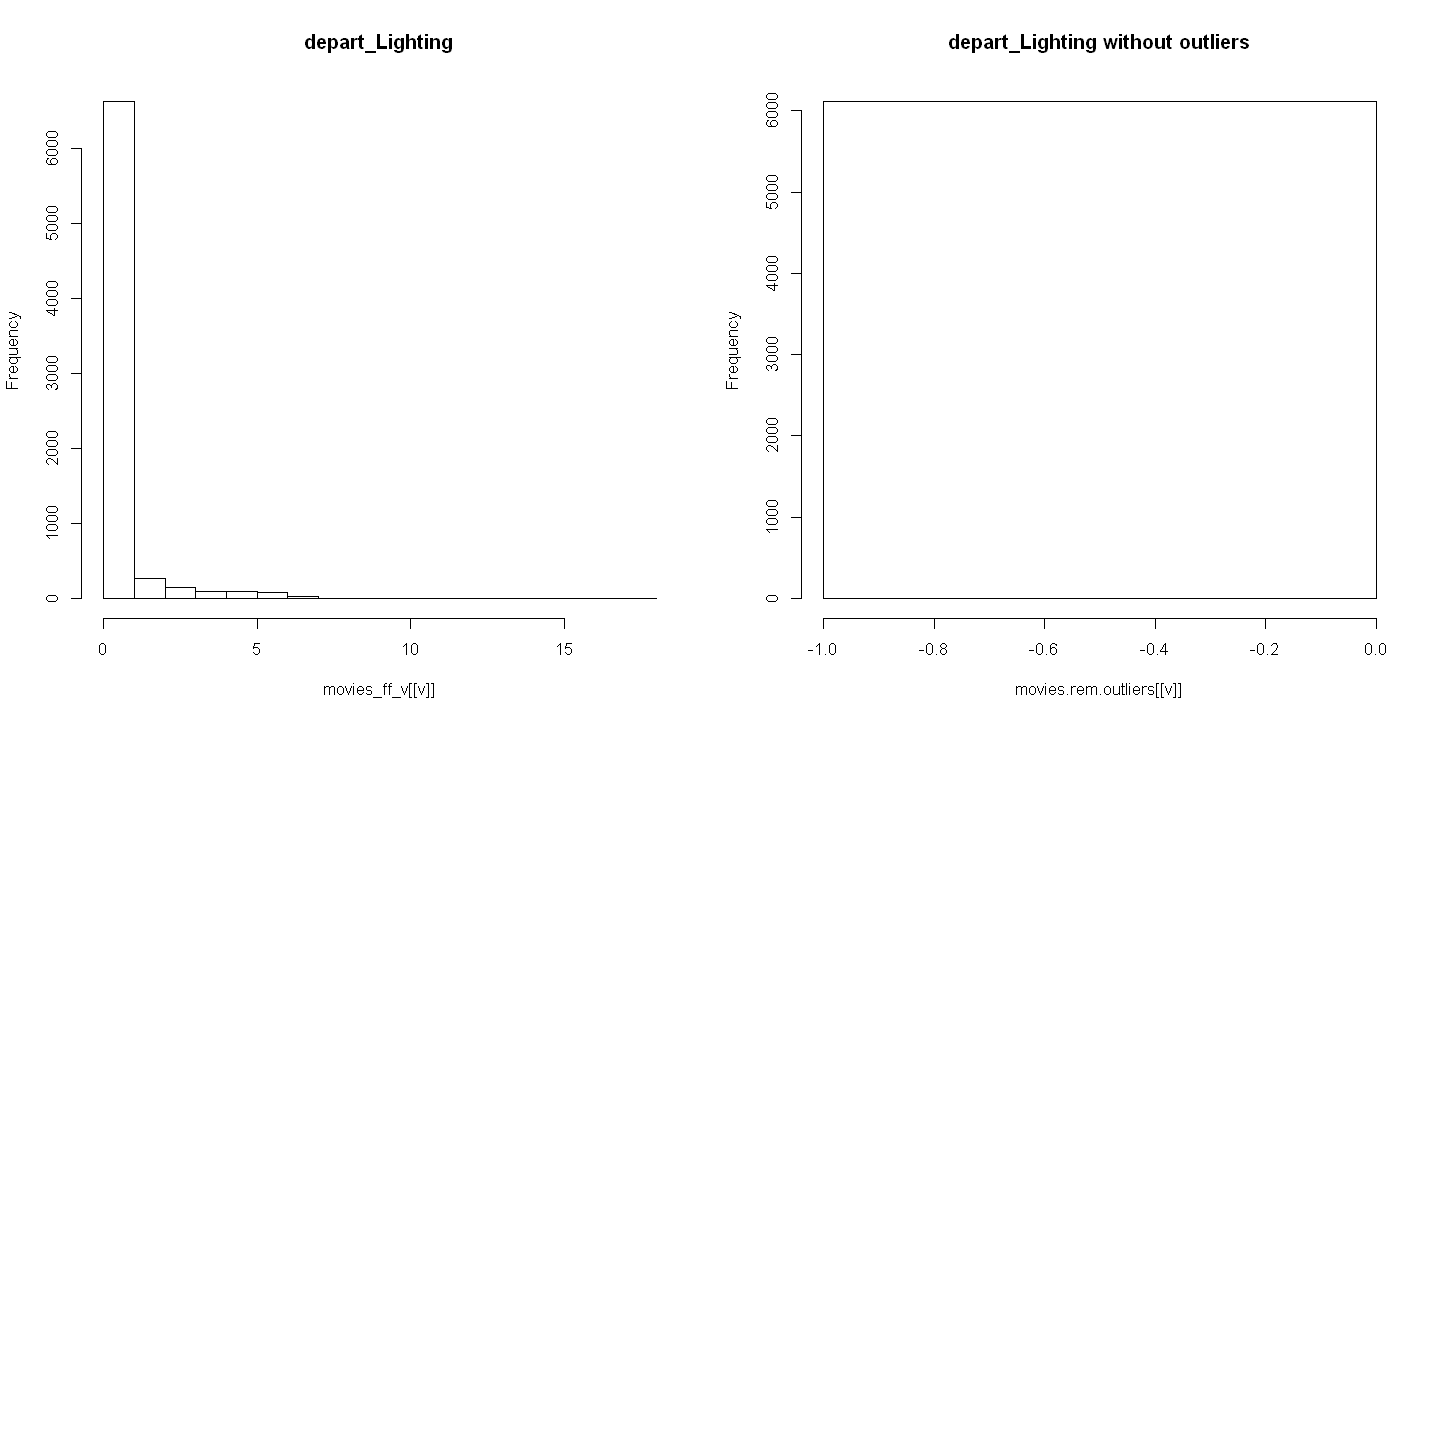

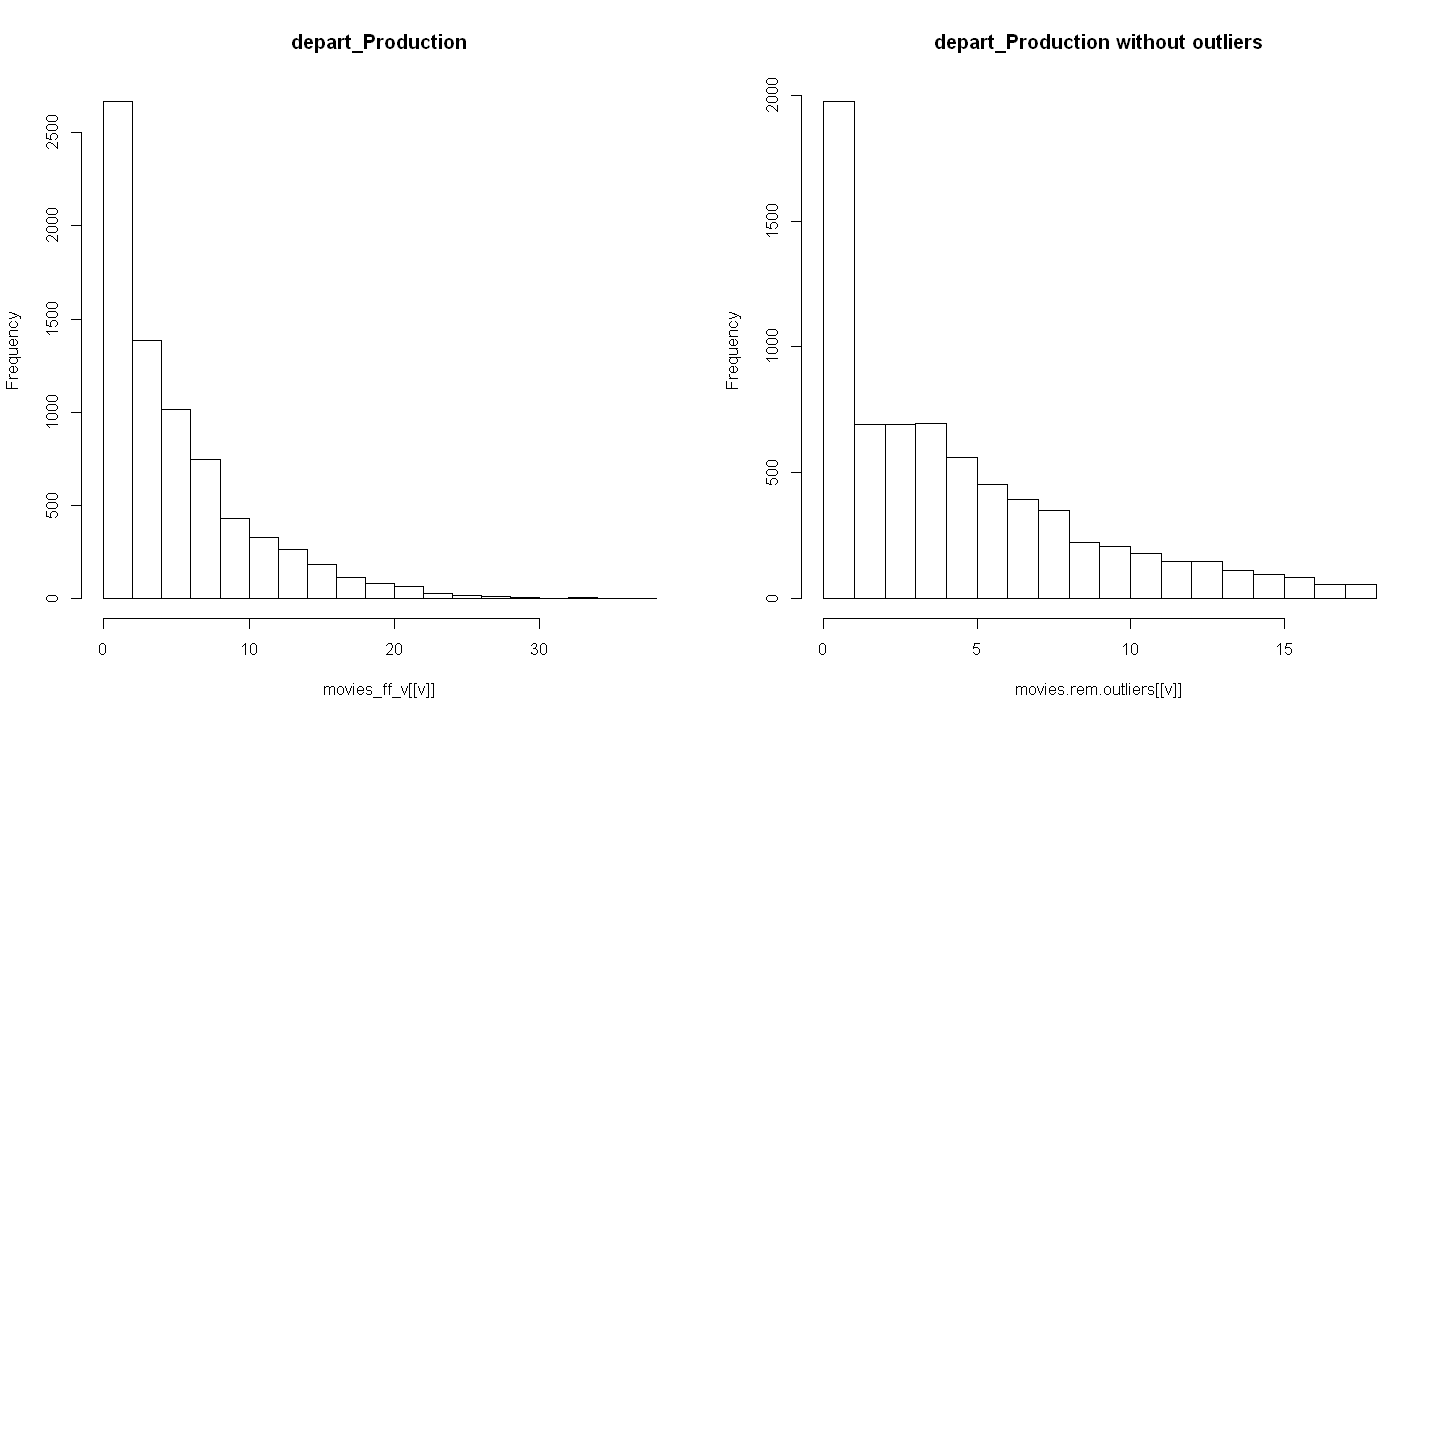

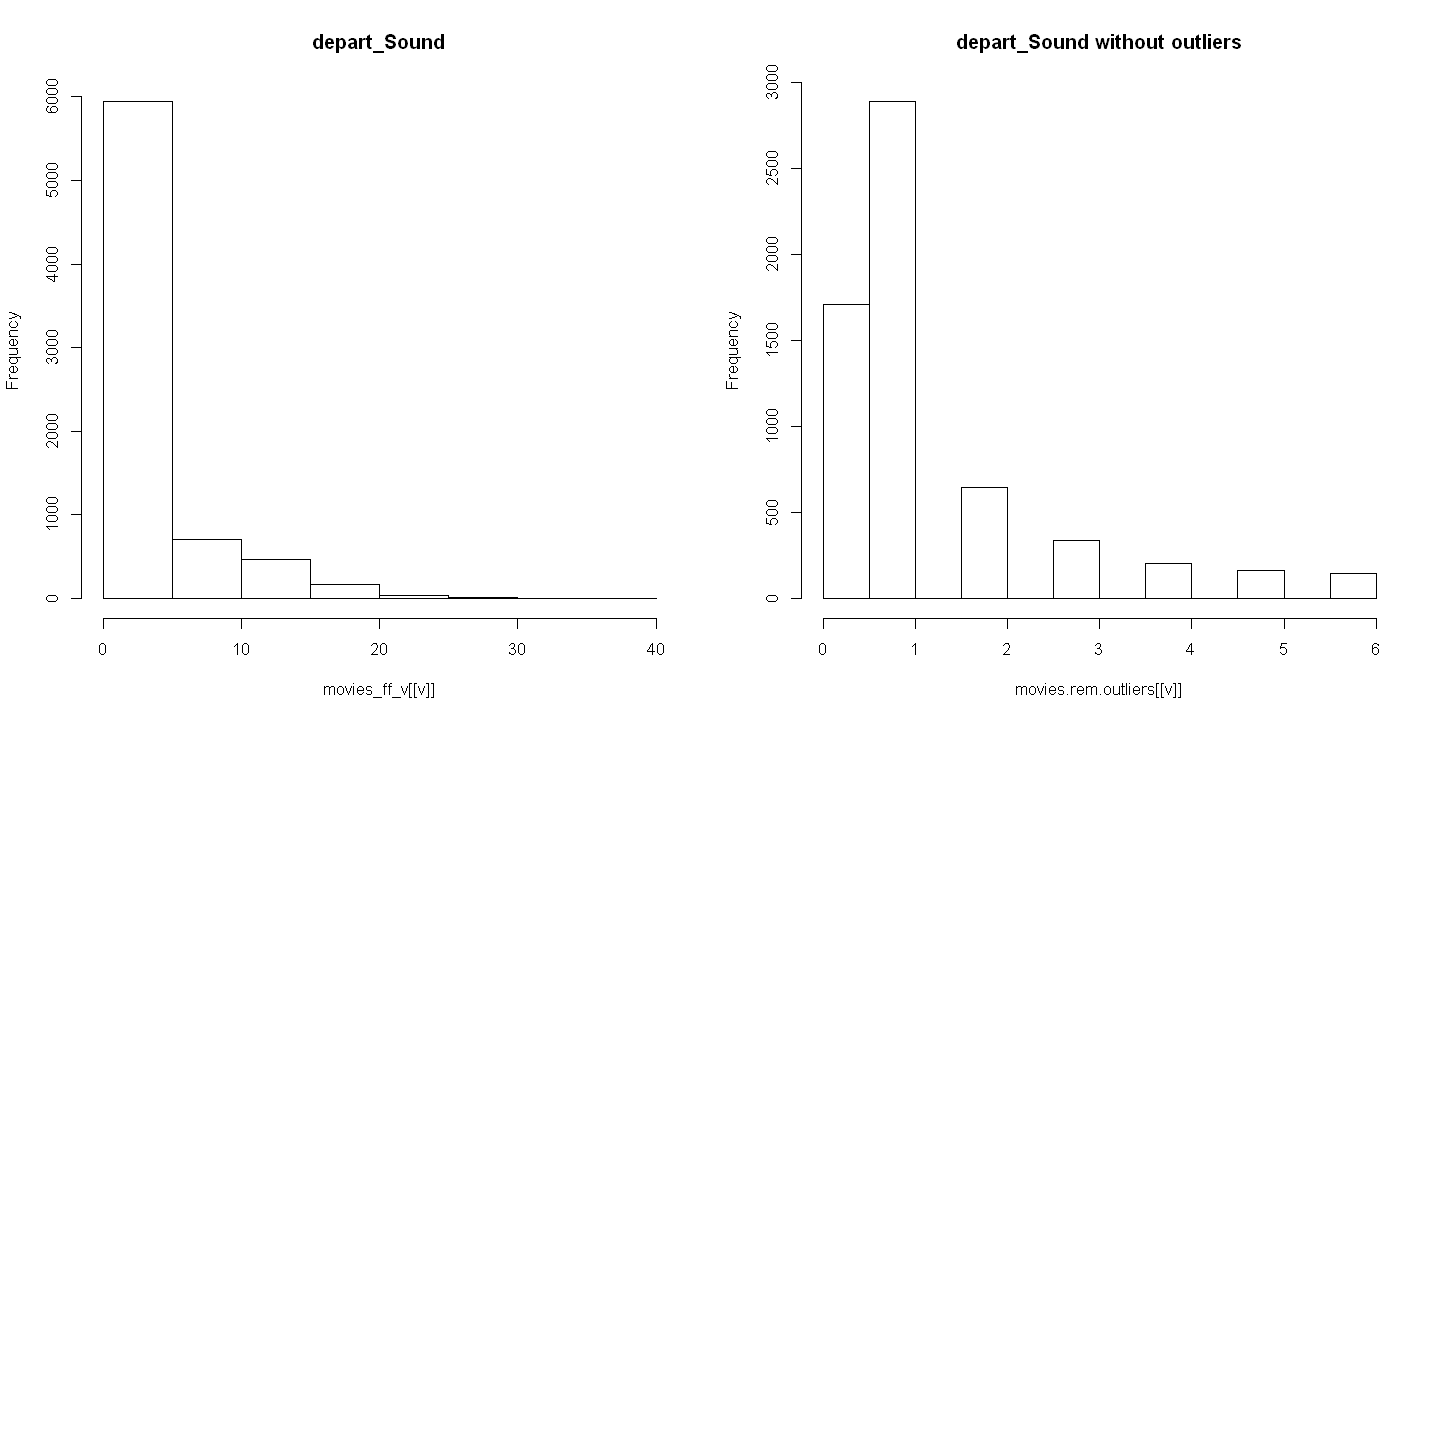

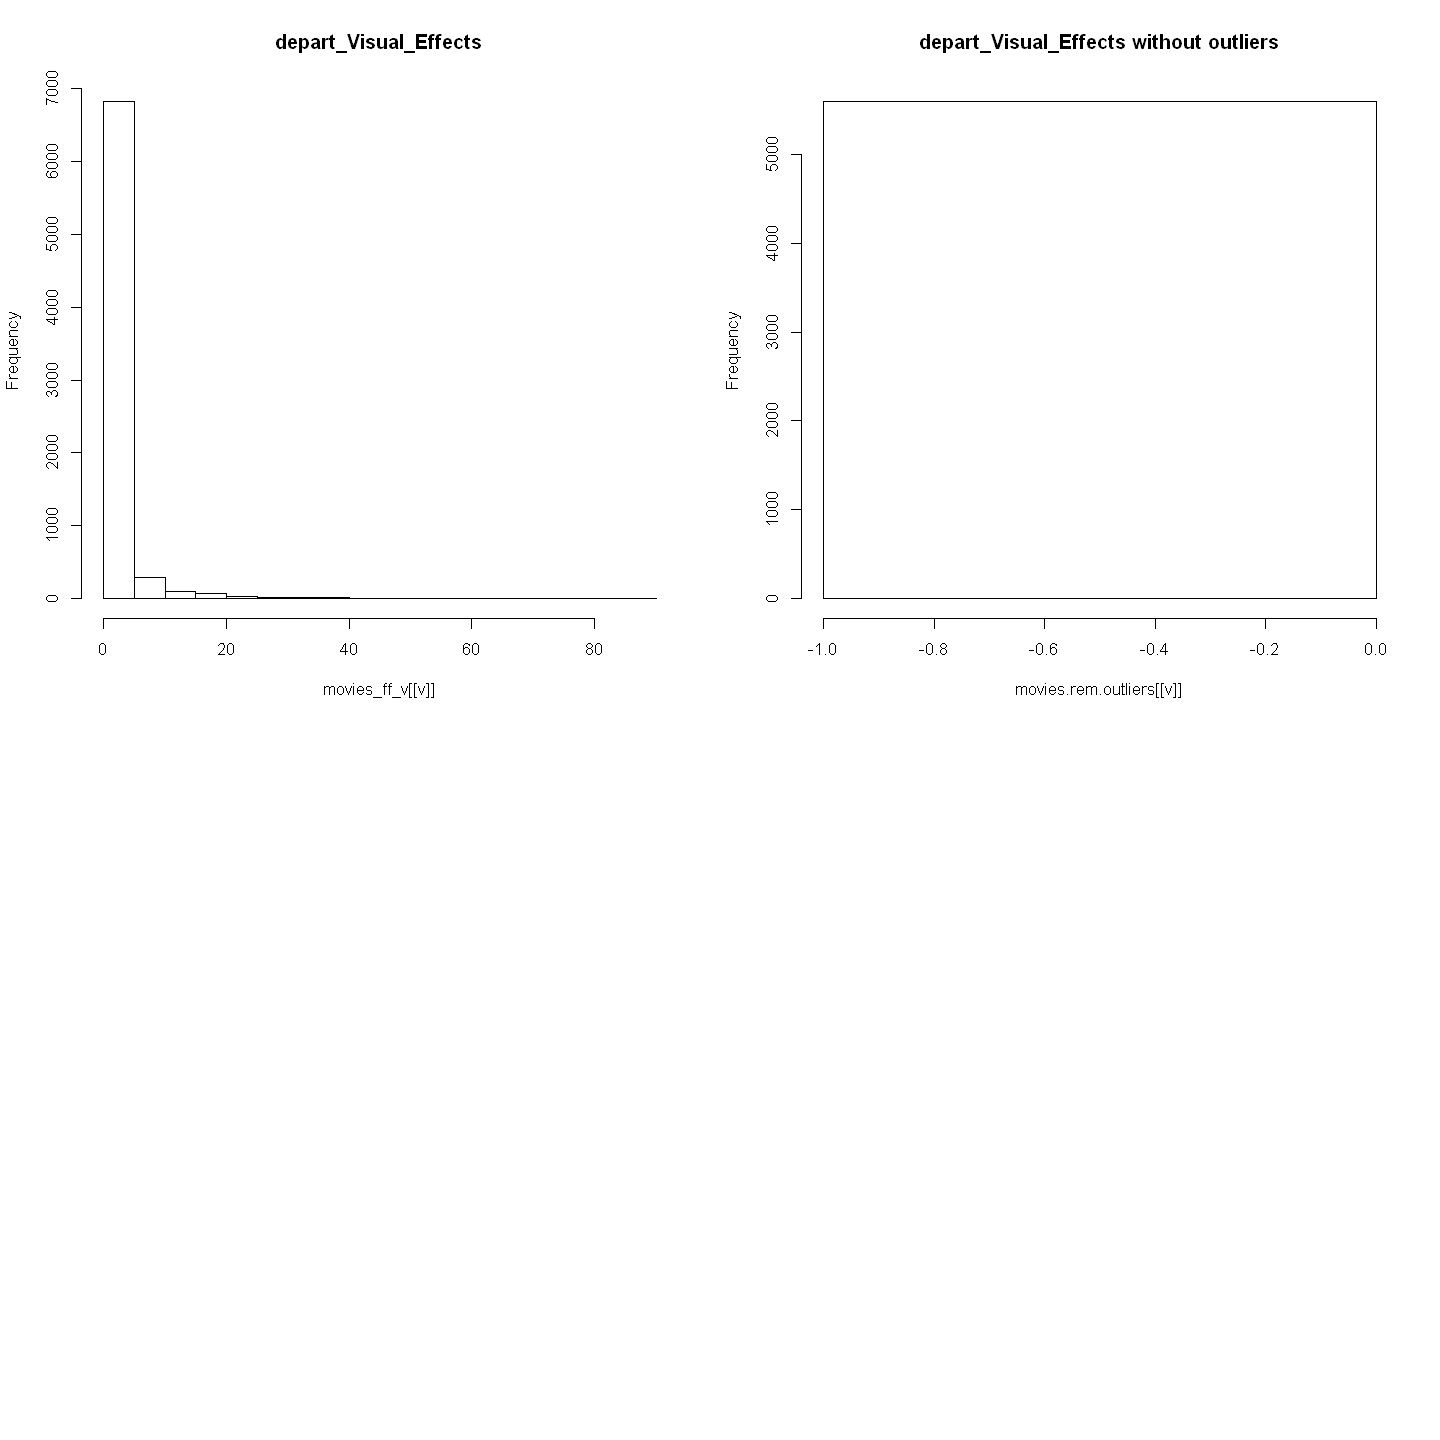

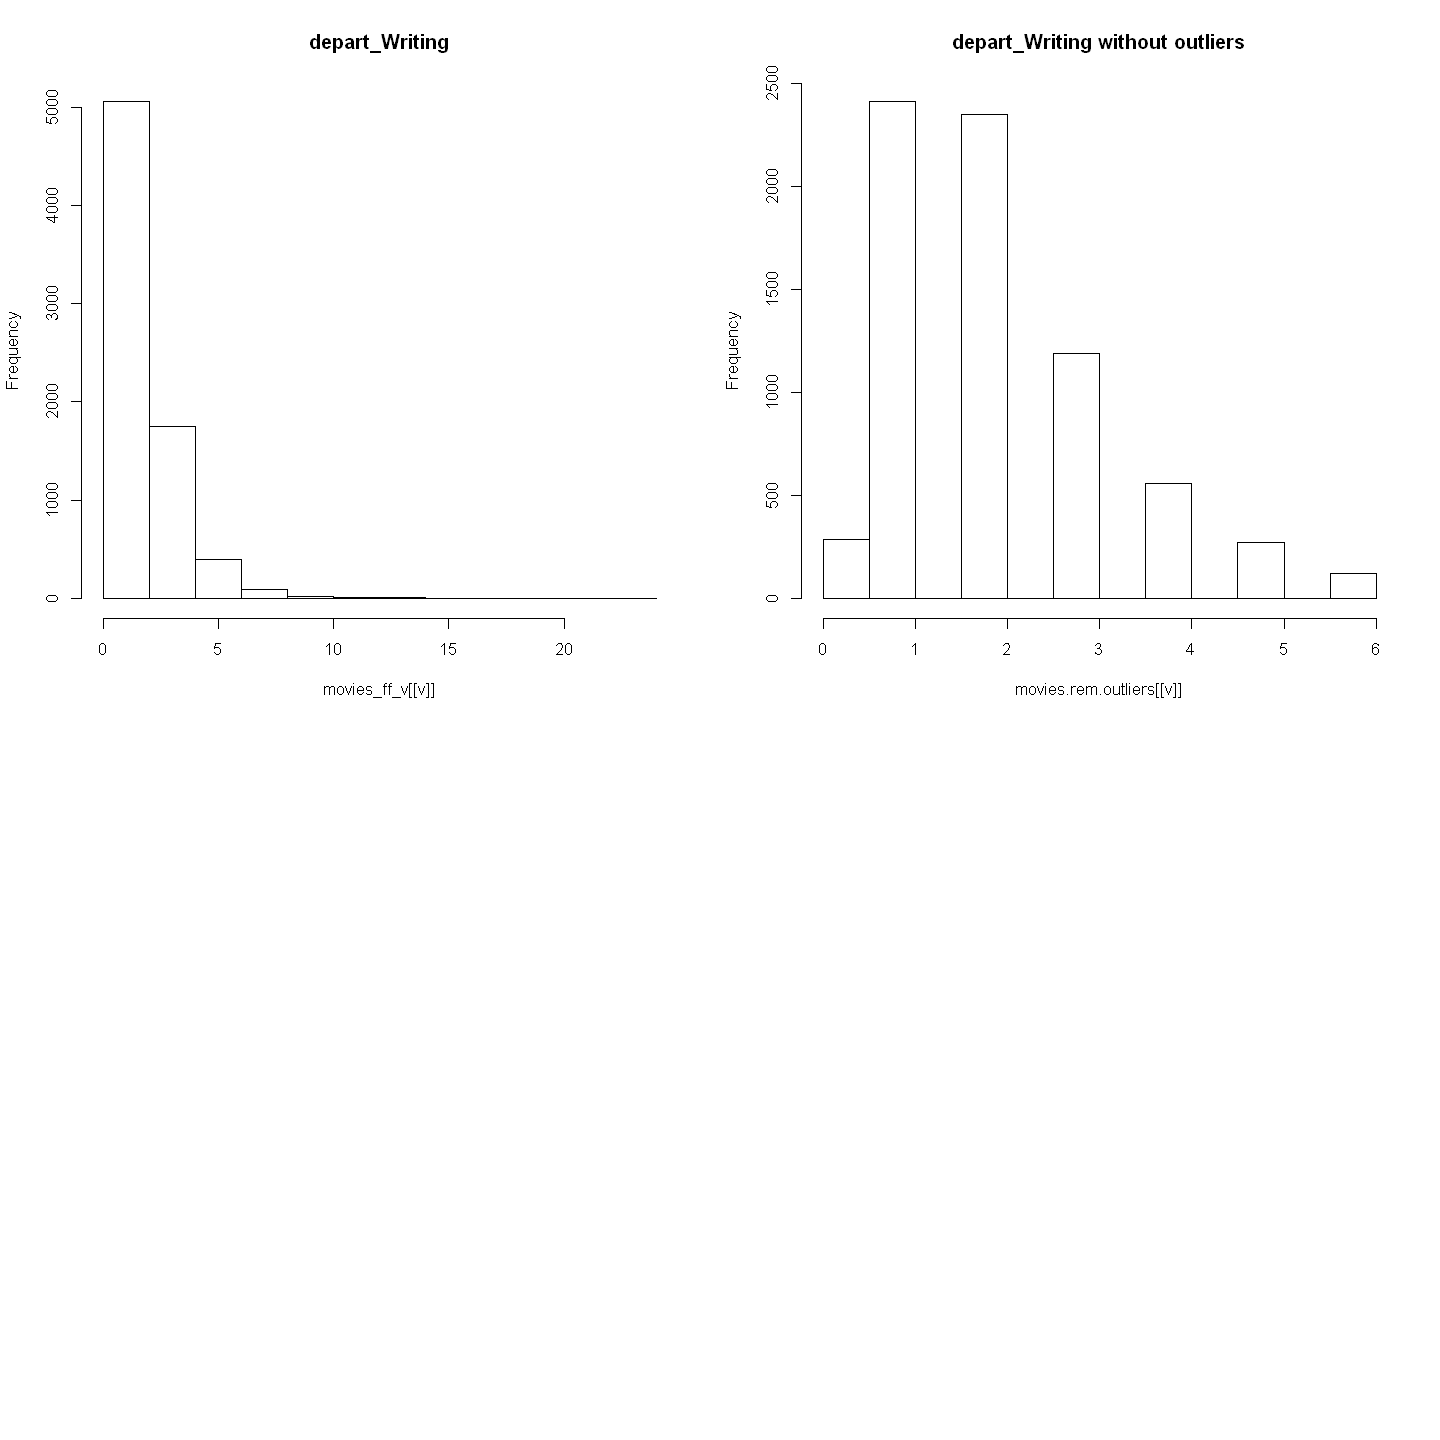

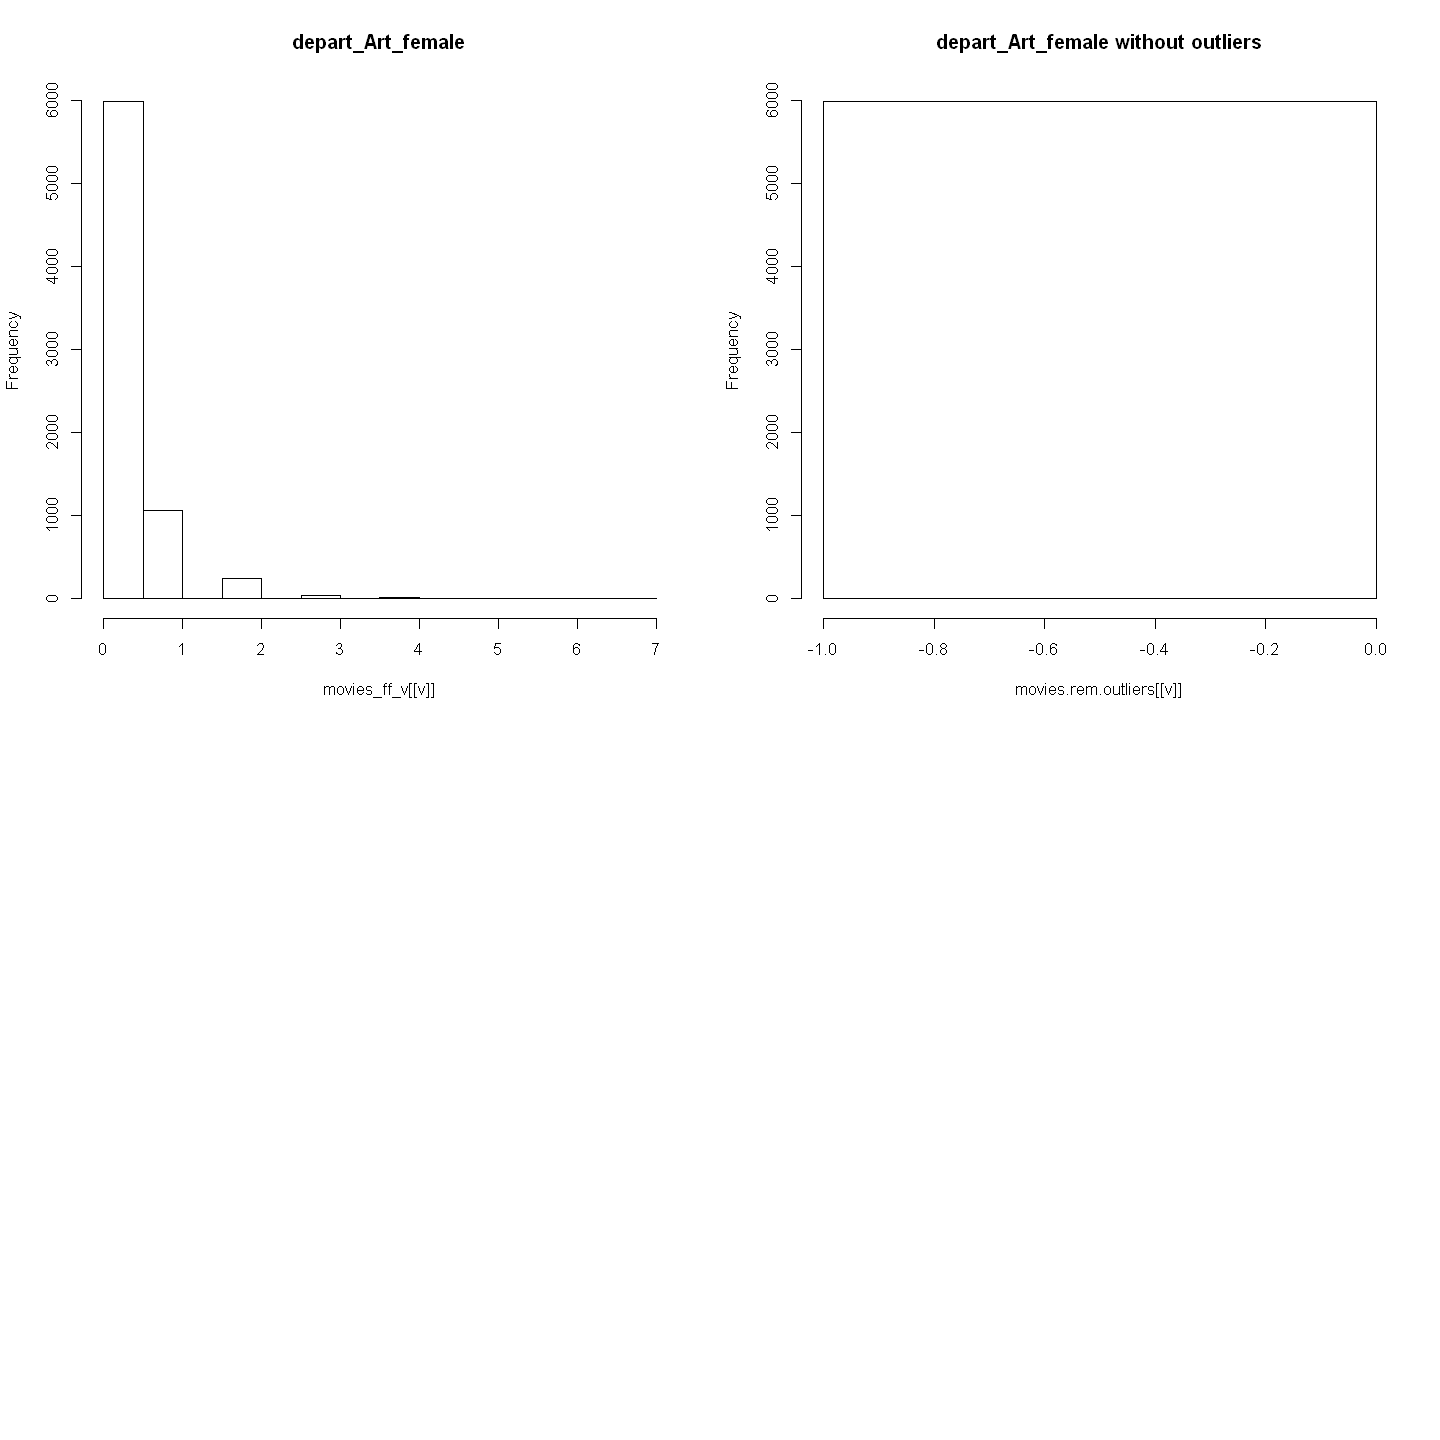

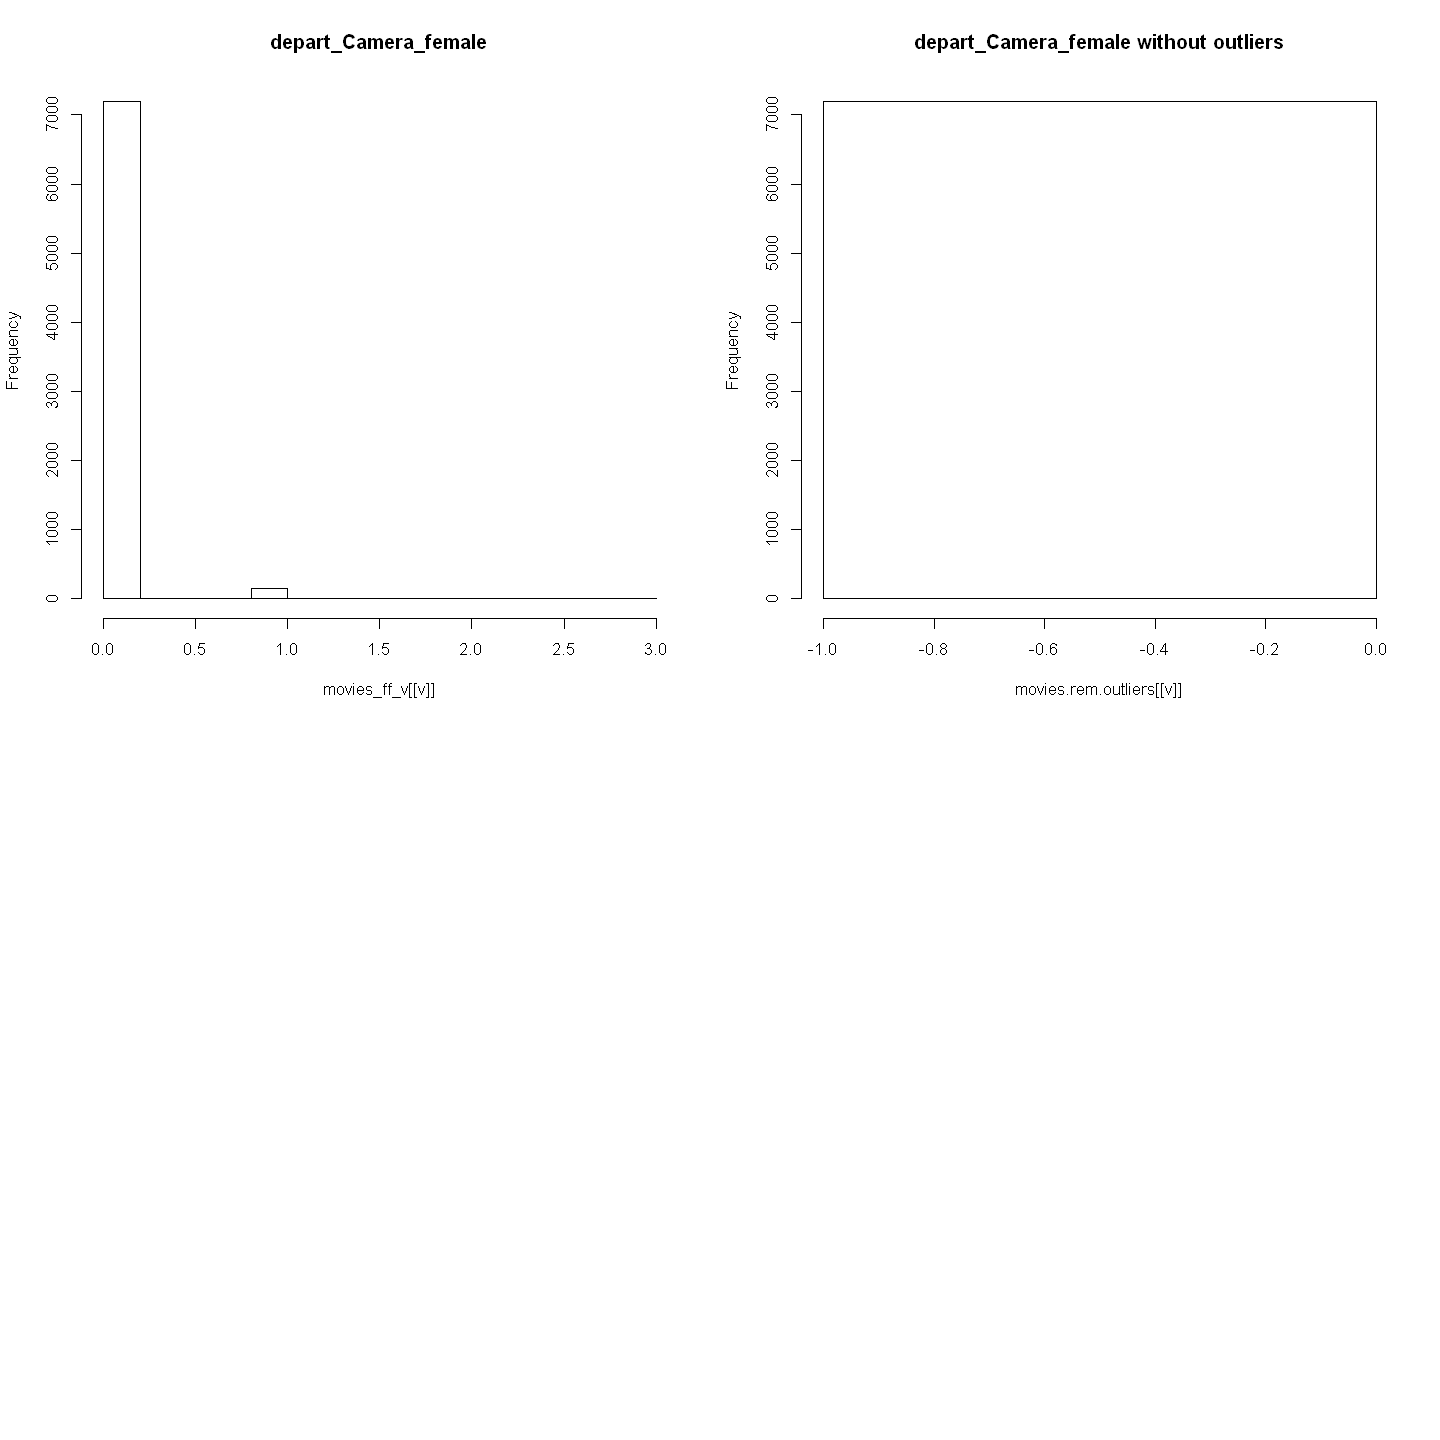

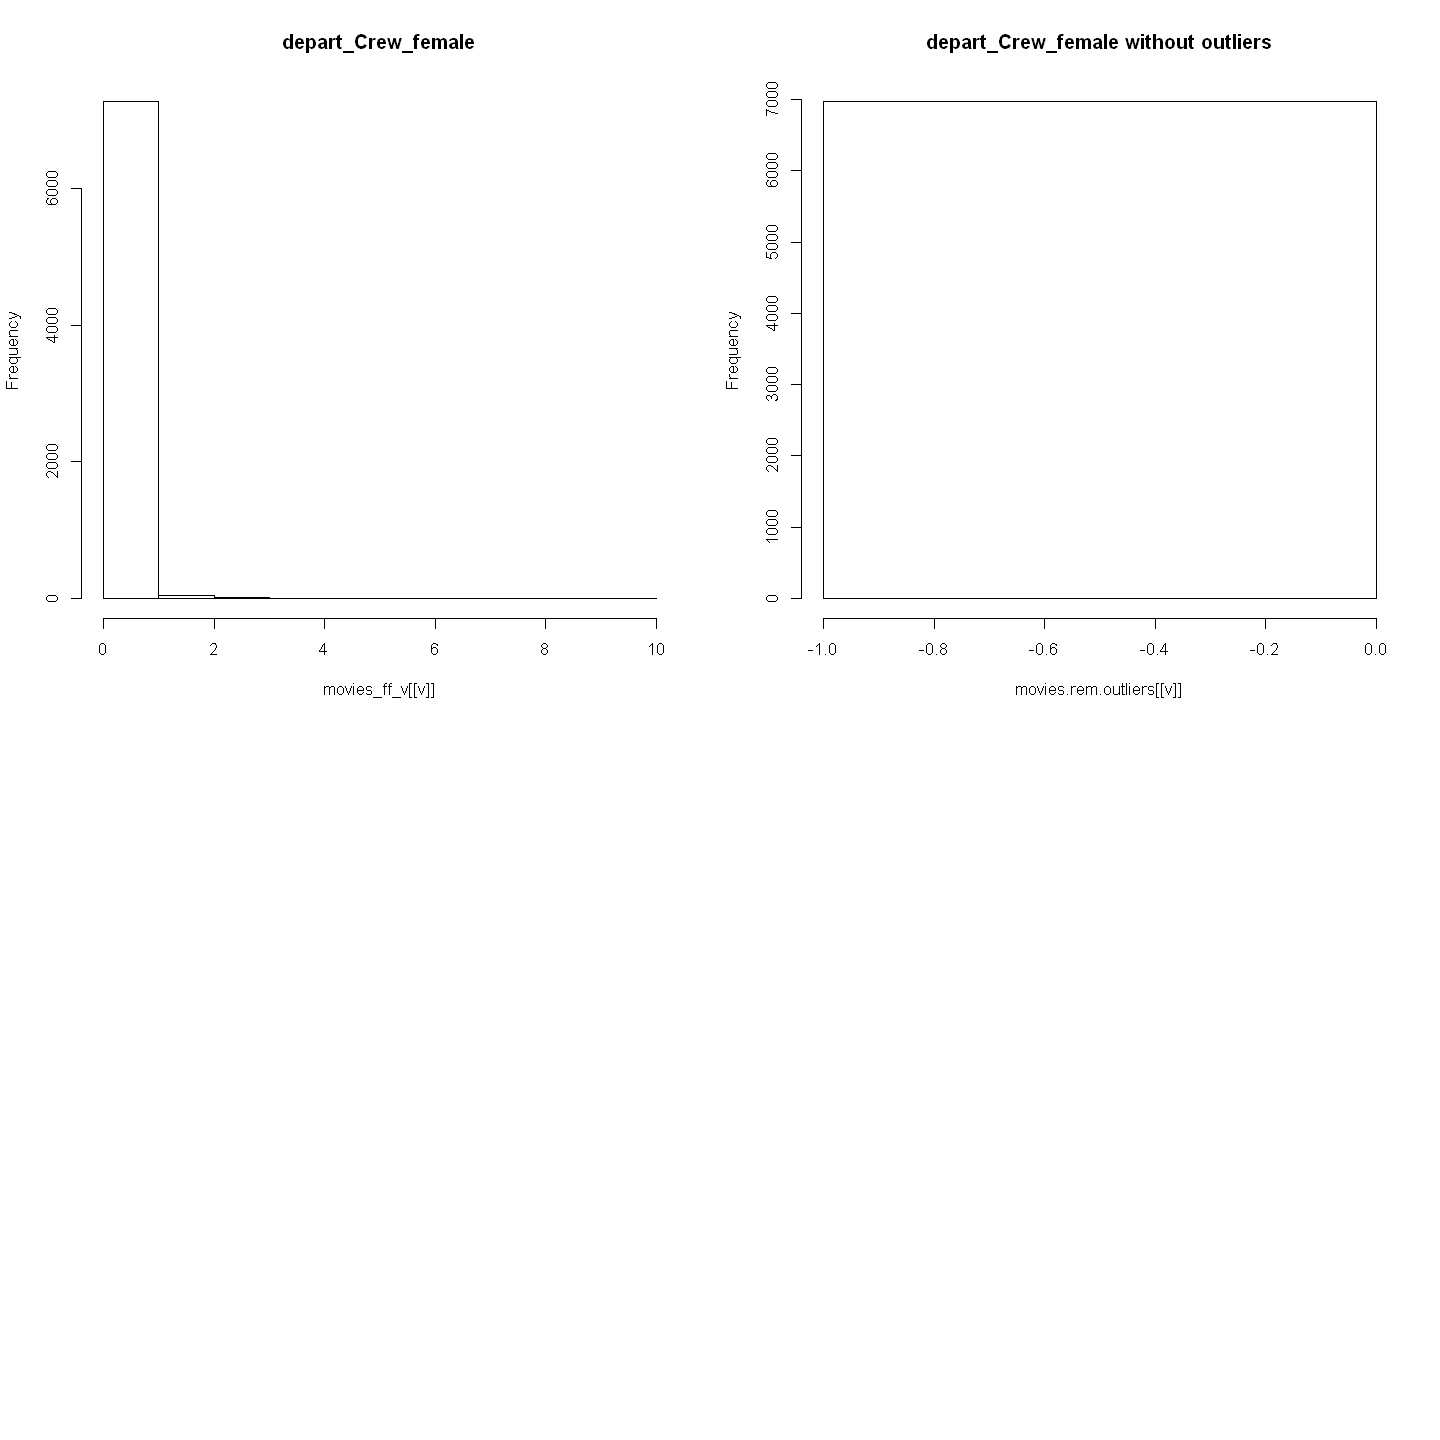

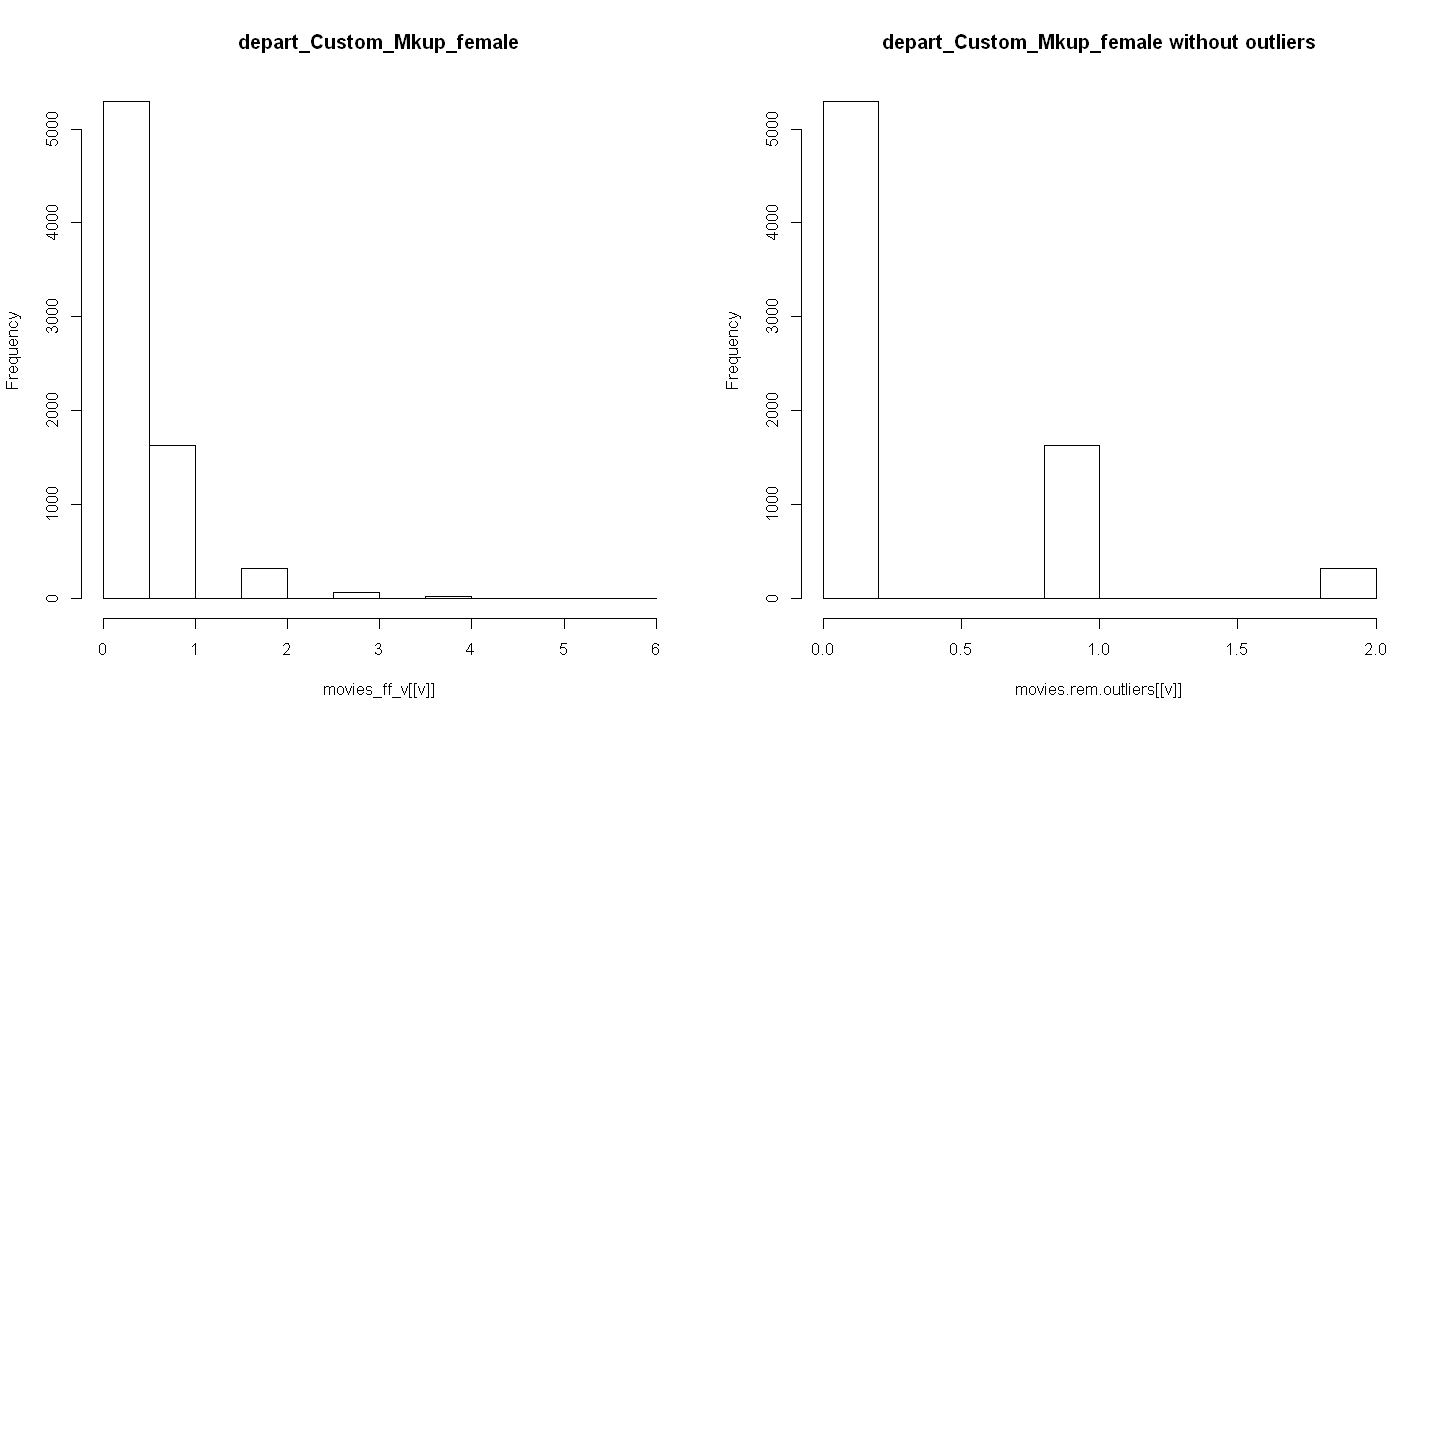

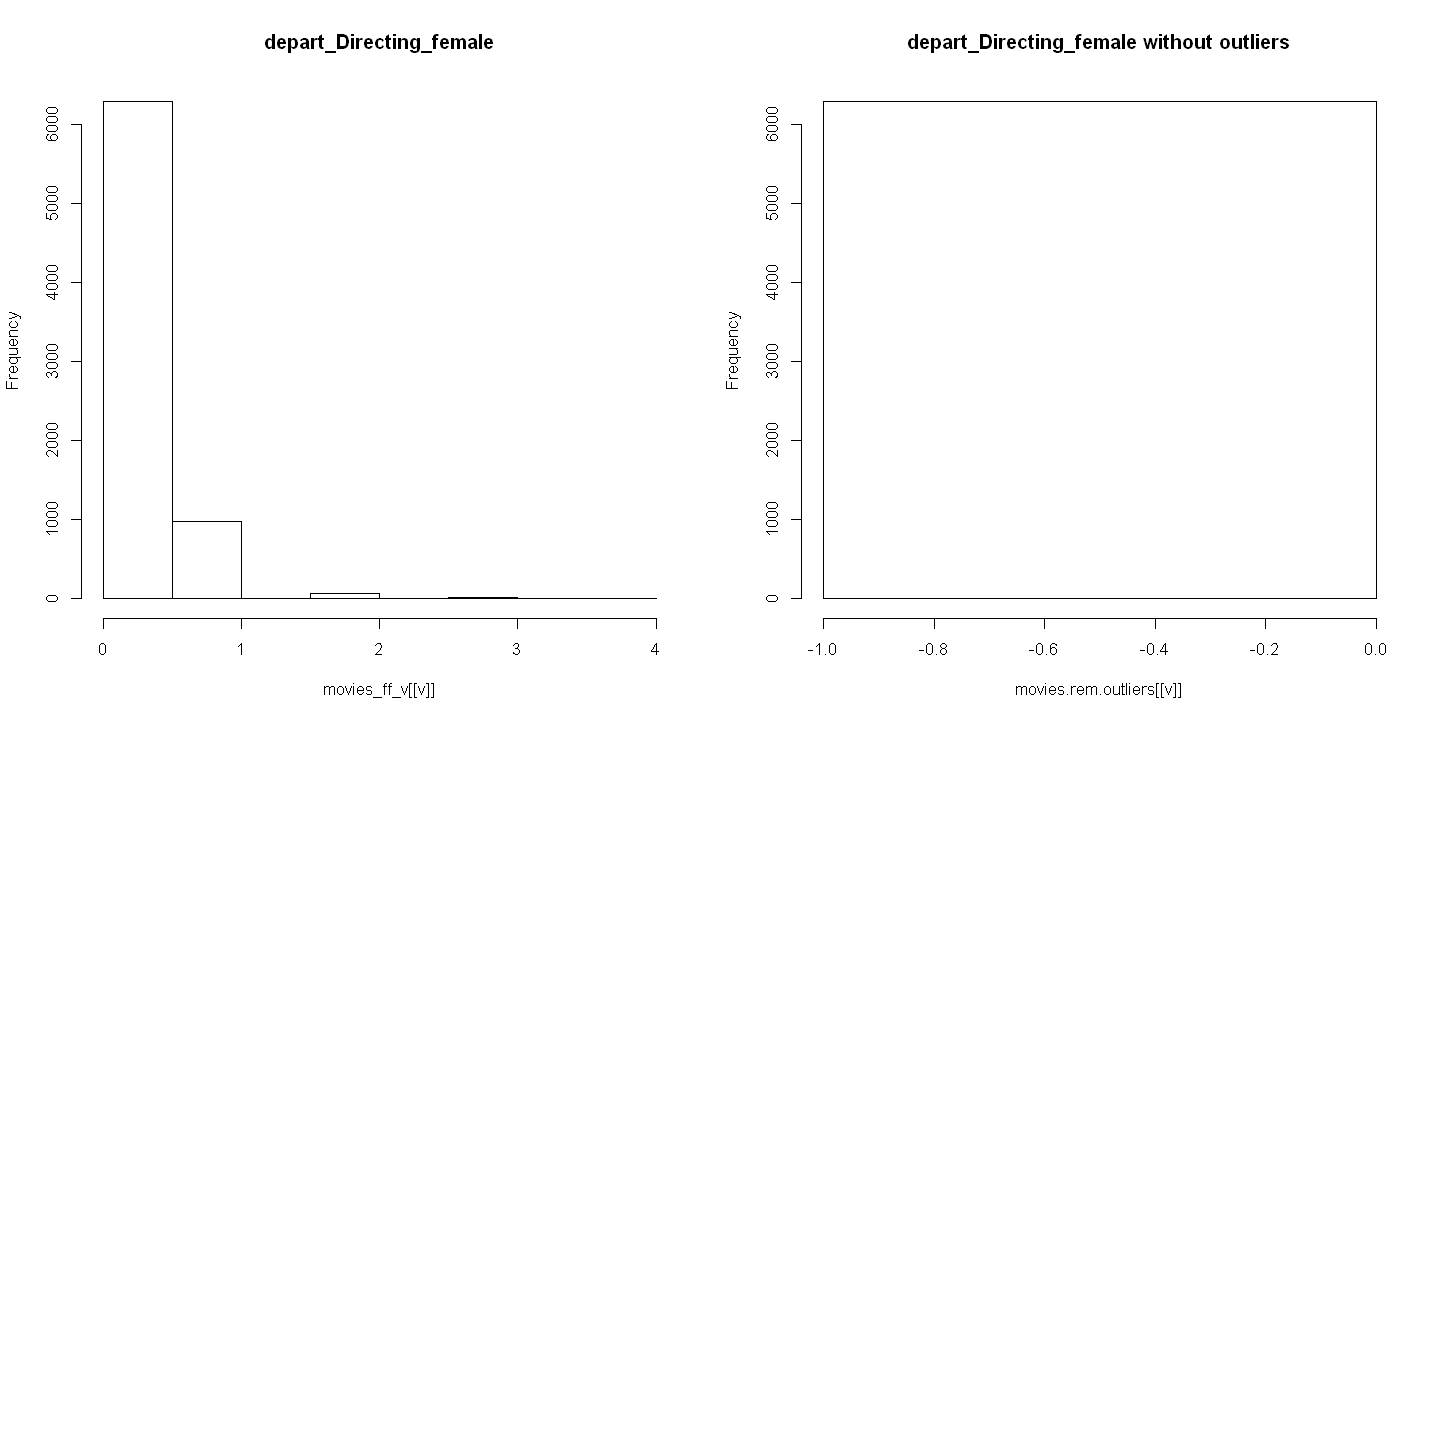

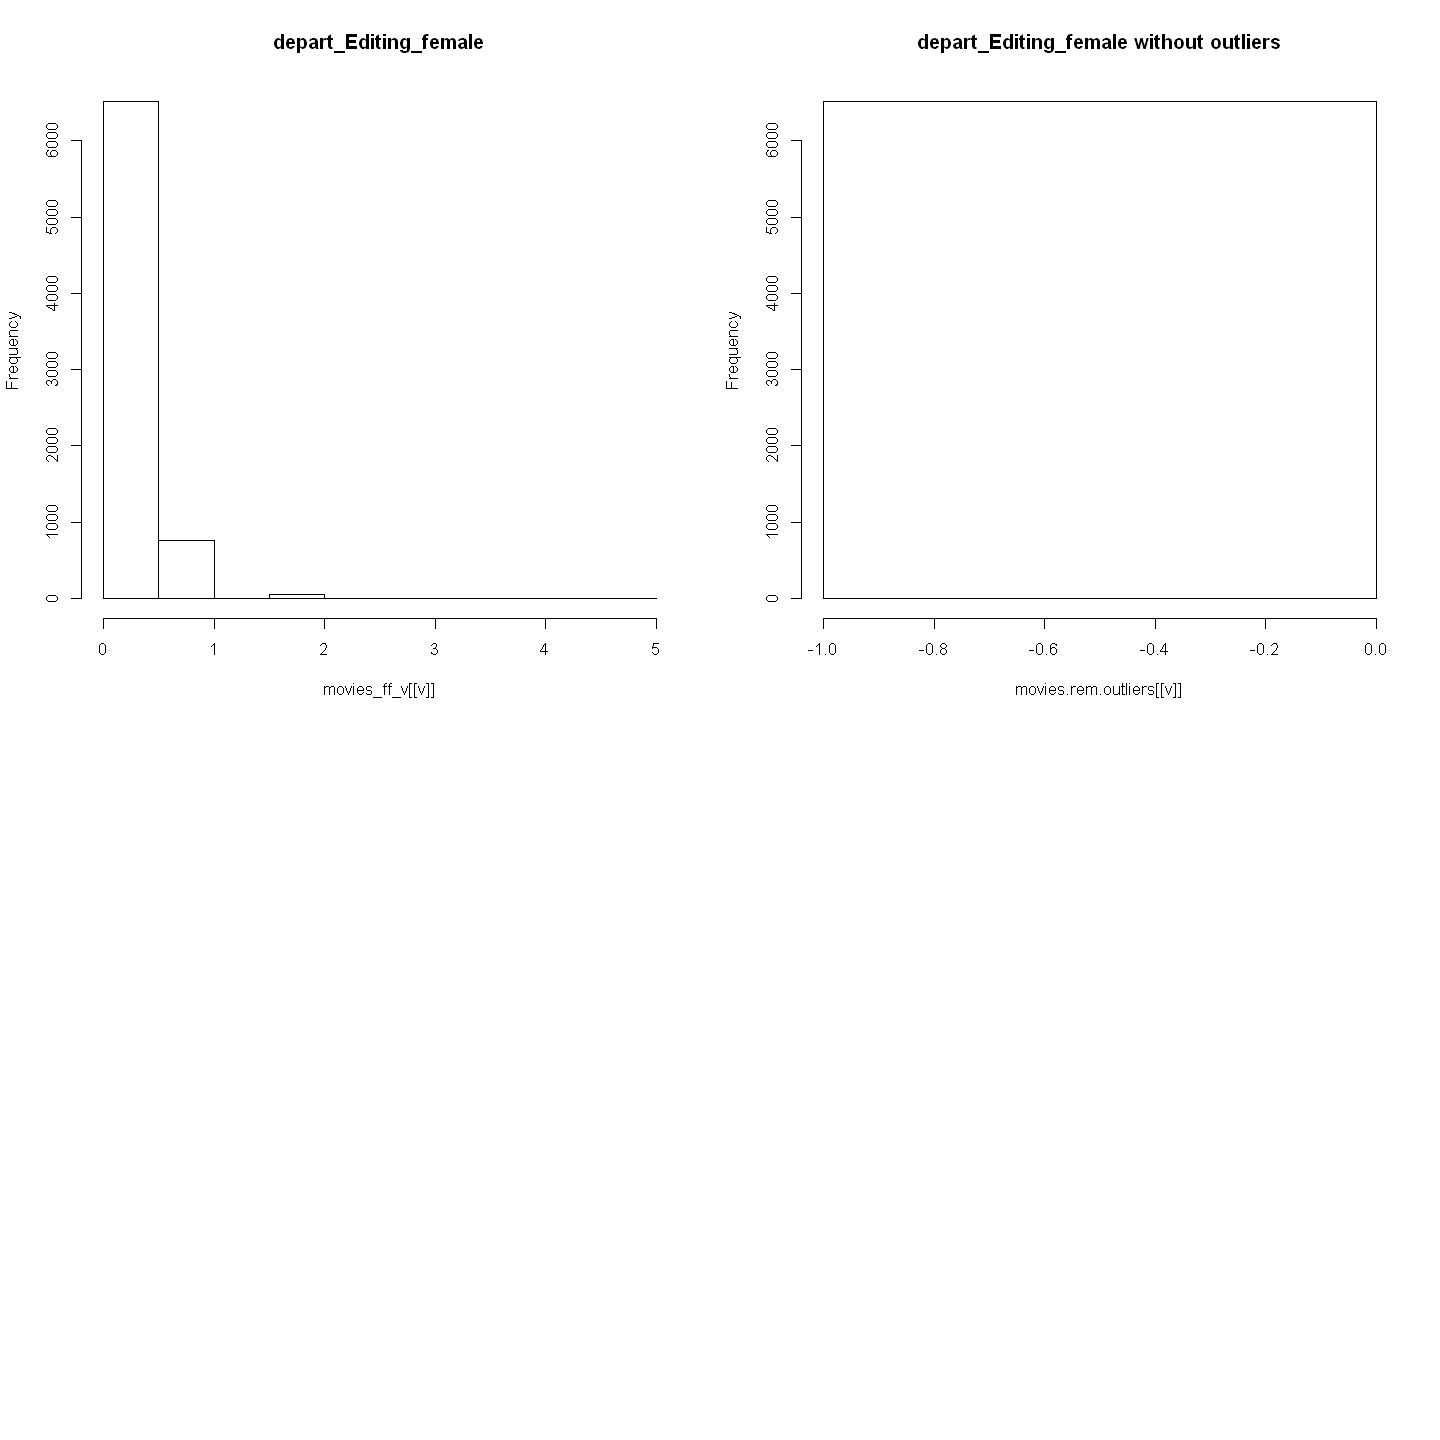

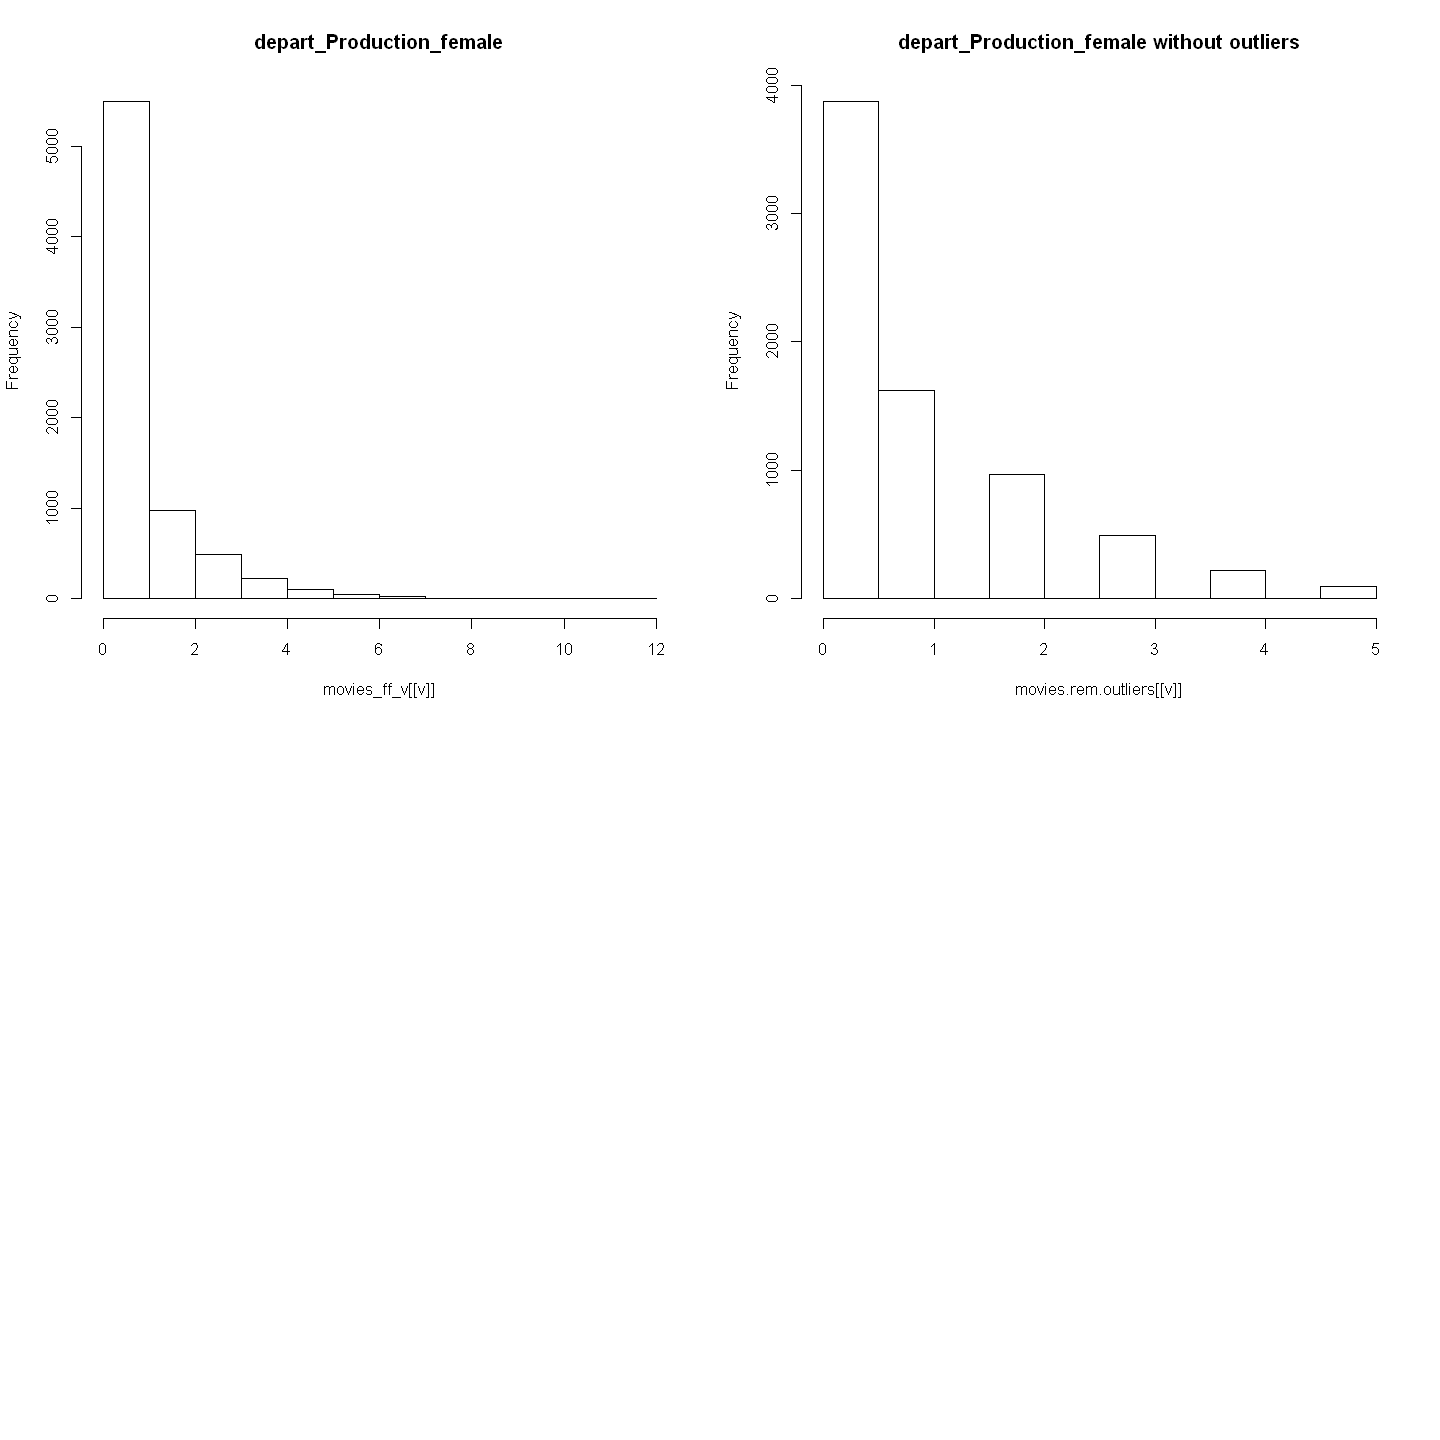

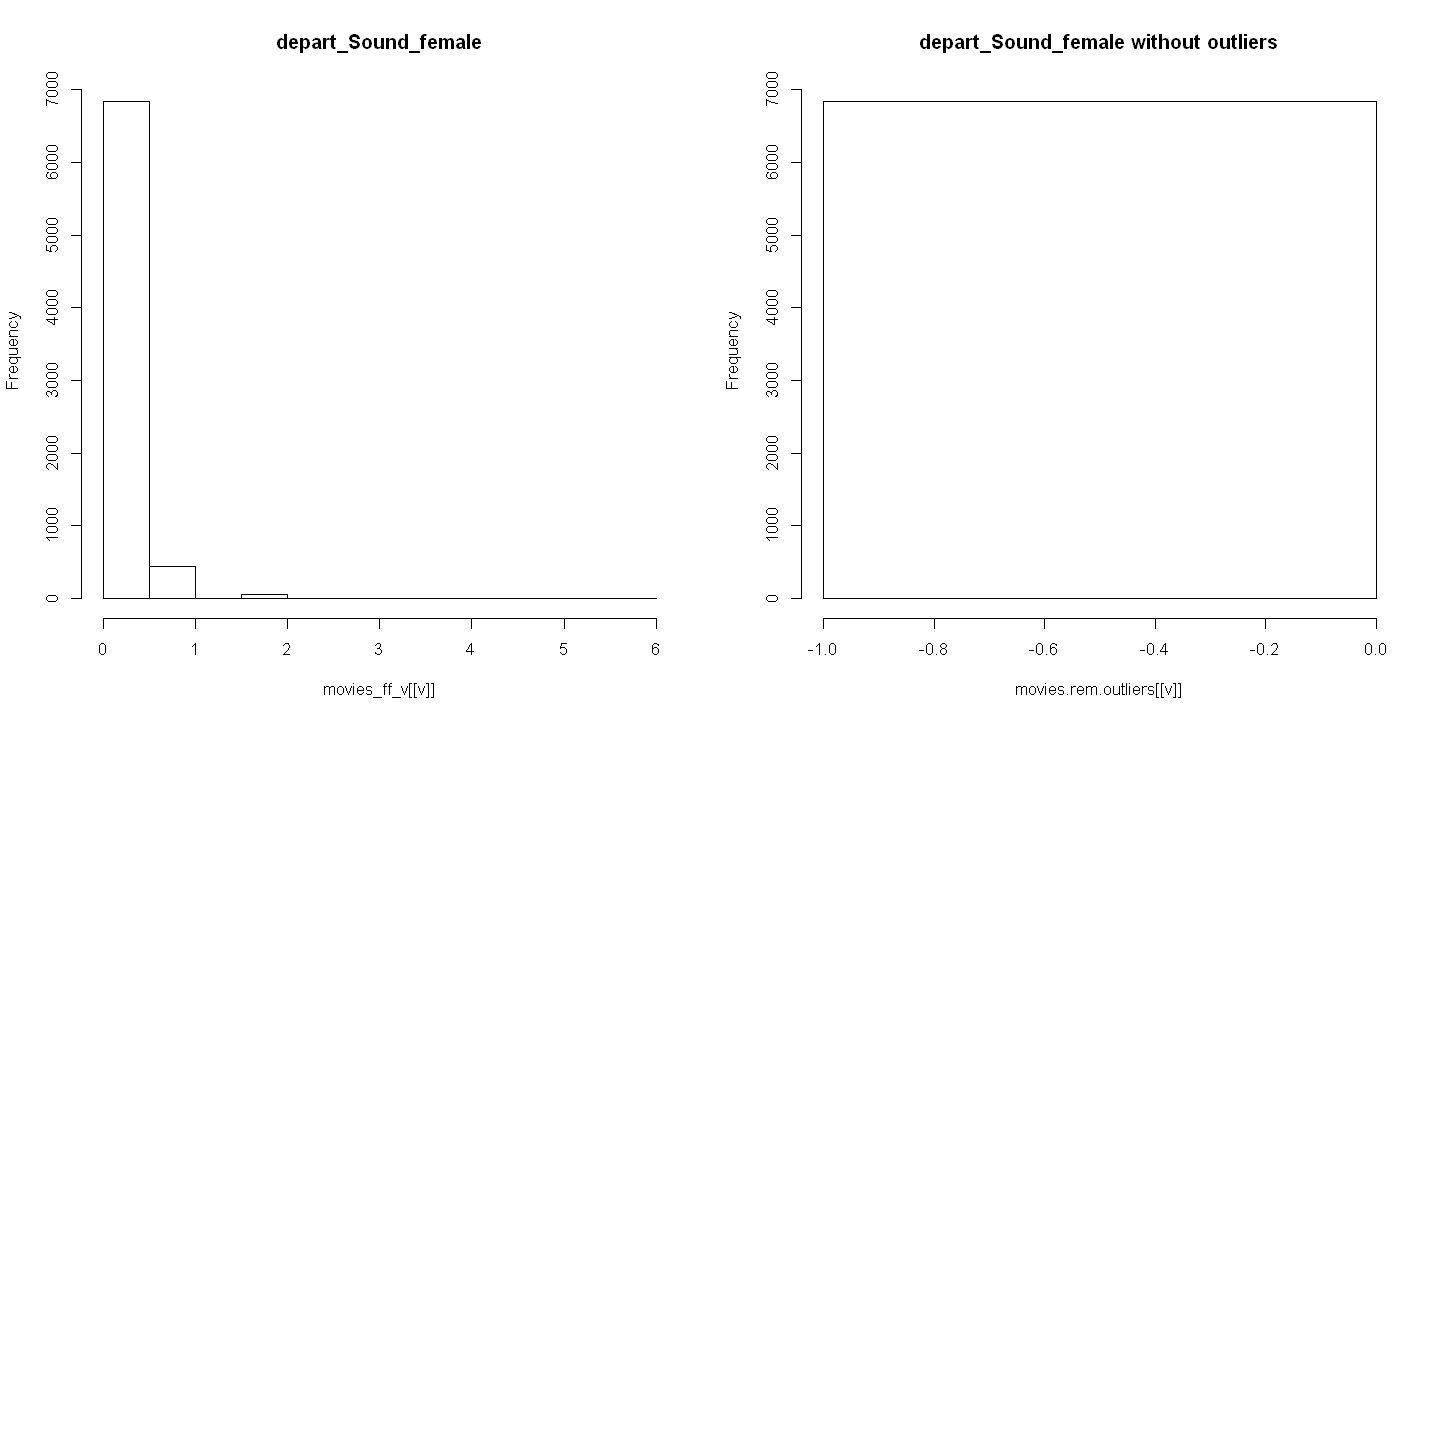

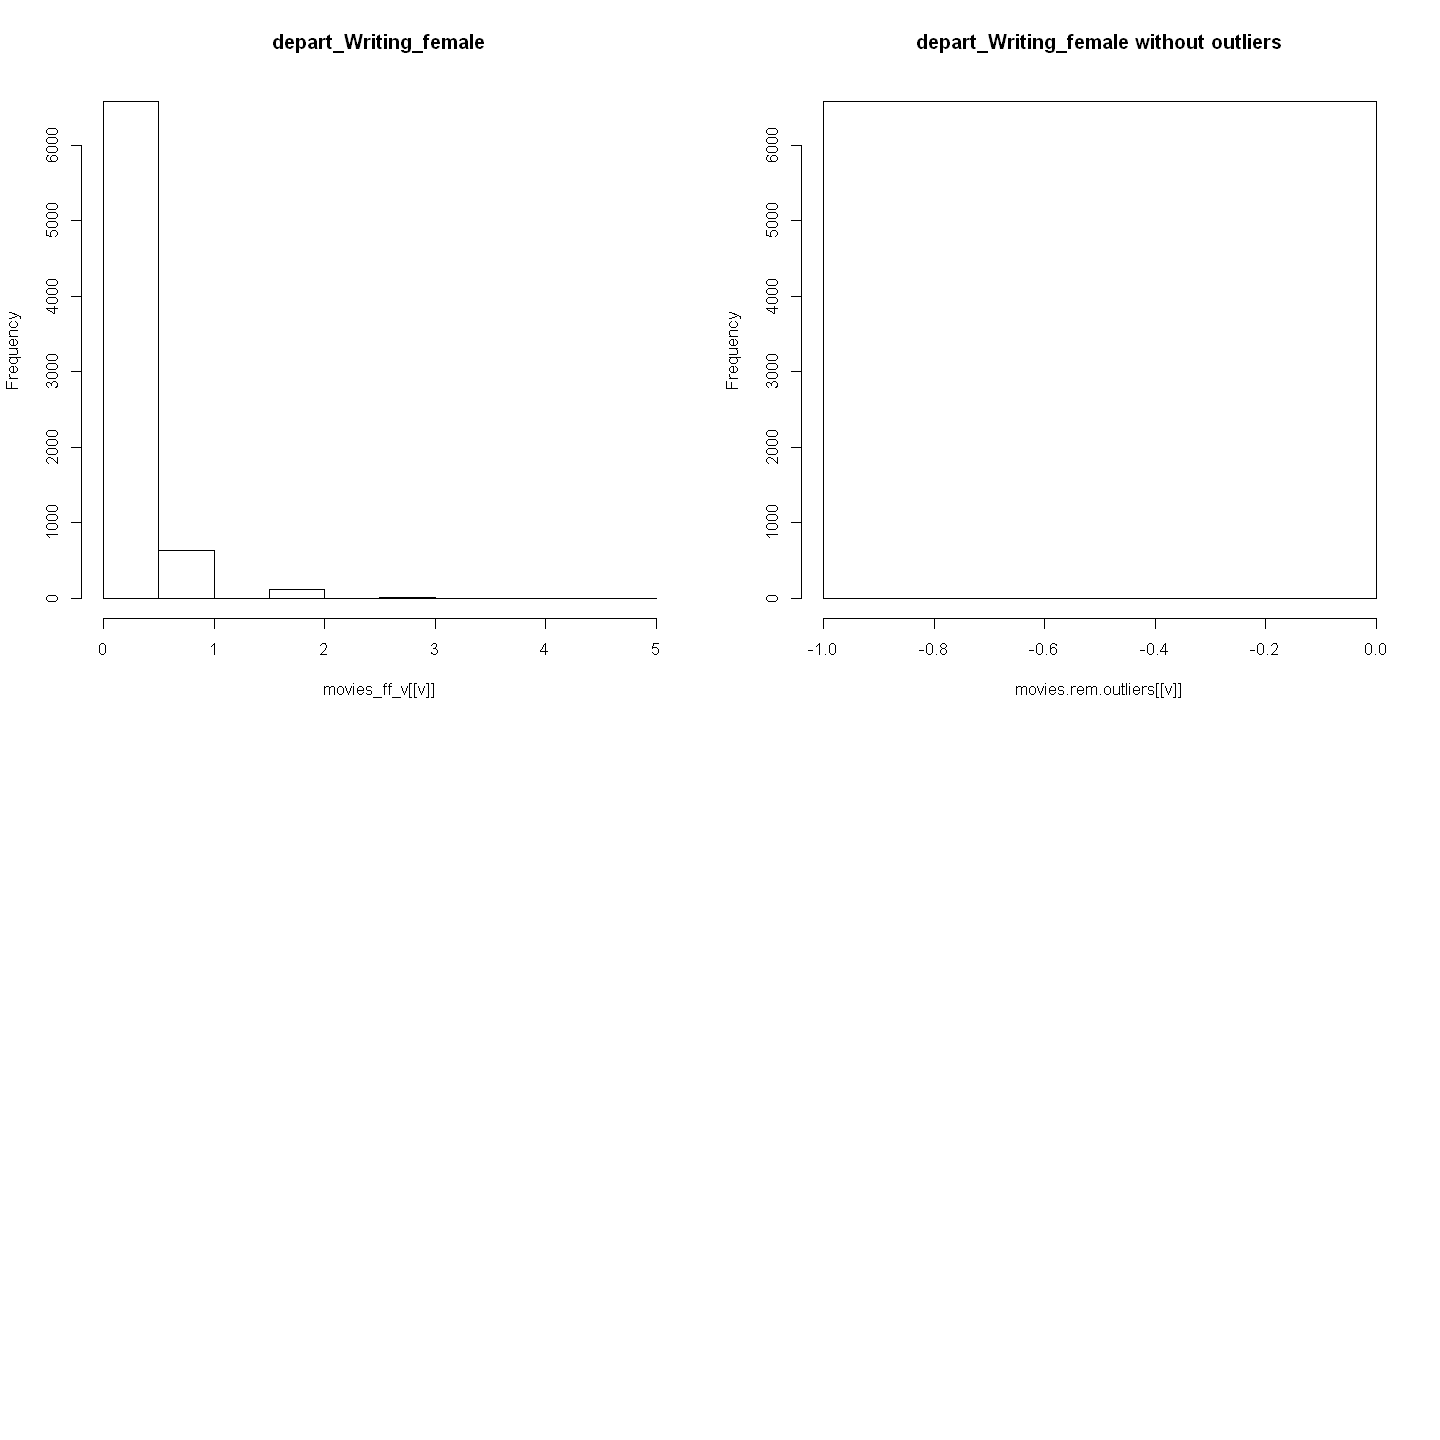

In [238]:
wo <- 'without outliers'
for (v in names(movies.rem.outliers[,2:ncol(movies.rem.outliers)])){
        if (max(movies_ff_v[v],na.rm=TRUE)>2) {
        options(repr.plot.width =12, repr.plot.height =12)
        par(mfrow=c(2,2))
        hist(movies_ff_v[[v]],main=v )
        hist(movies.rem.outliers[[v]],main=paste(v,wo) )
    }
}

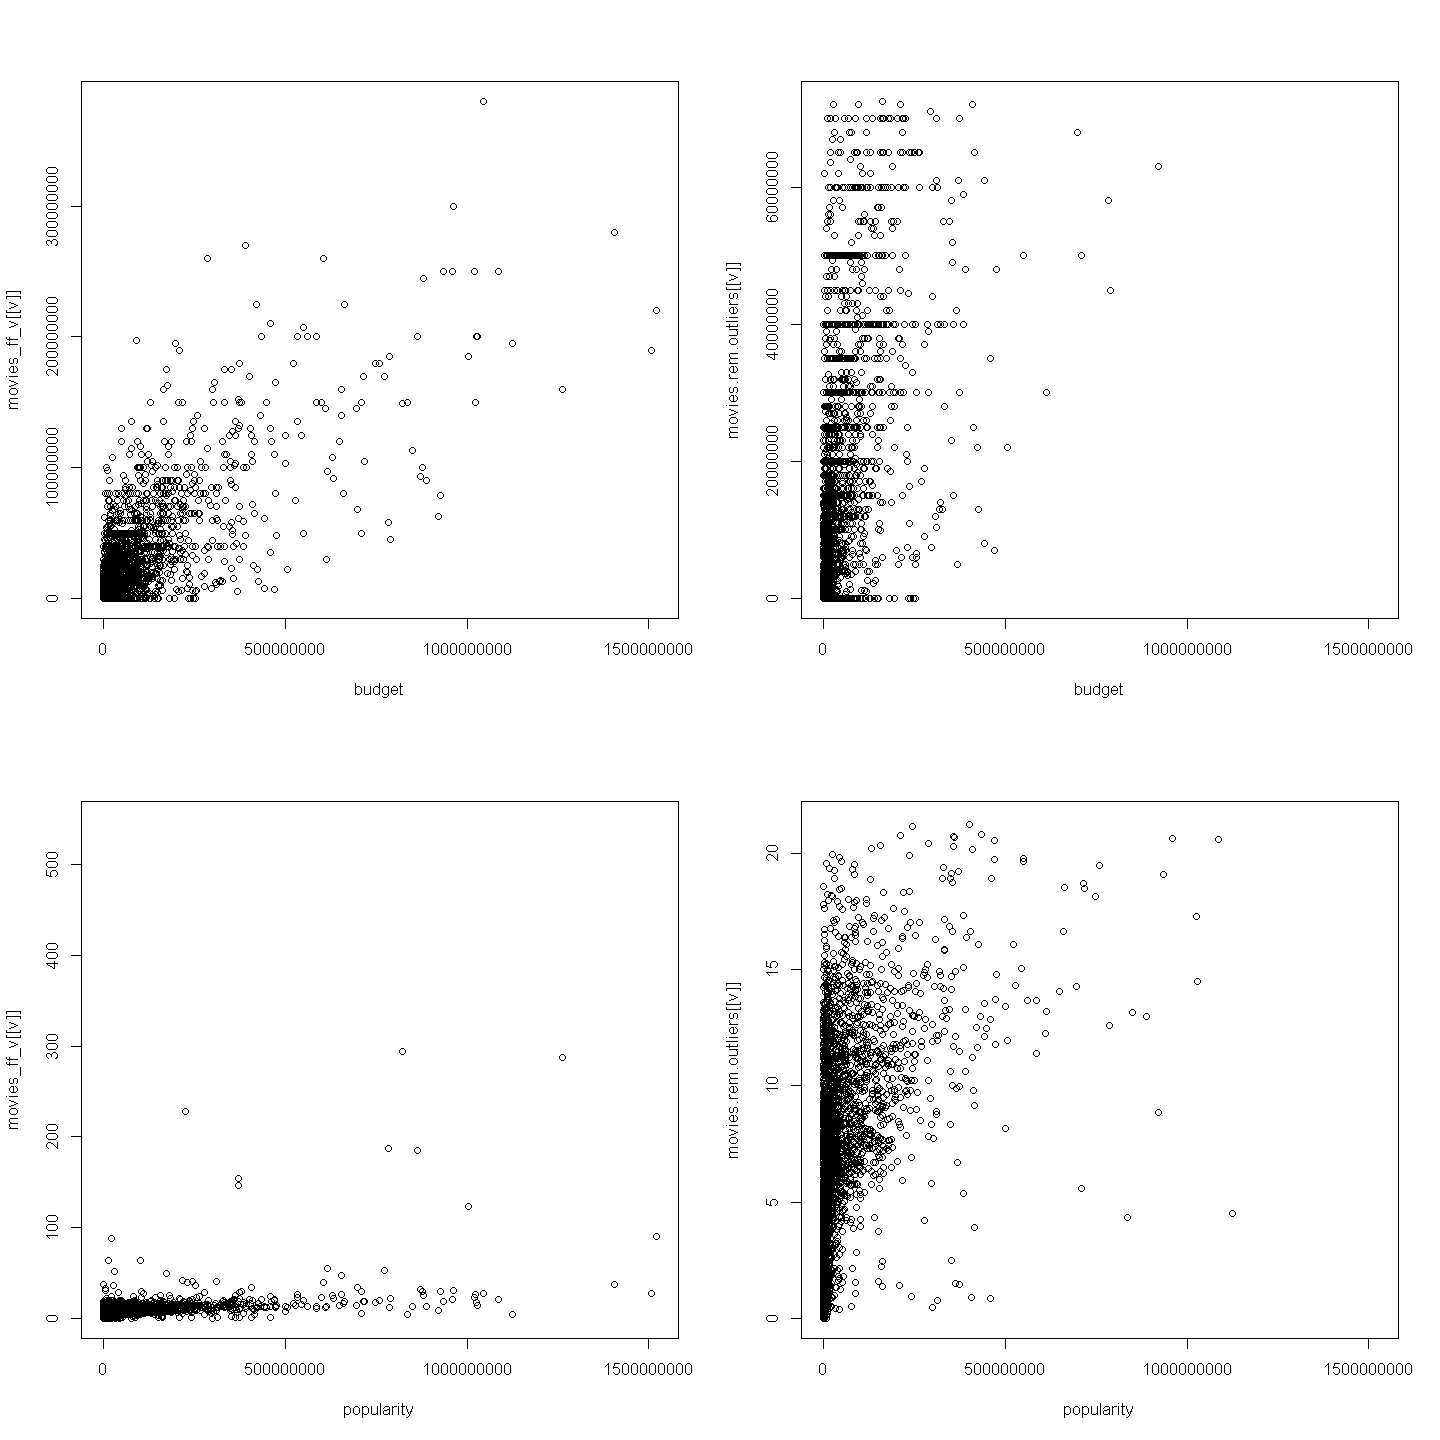

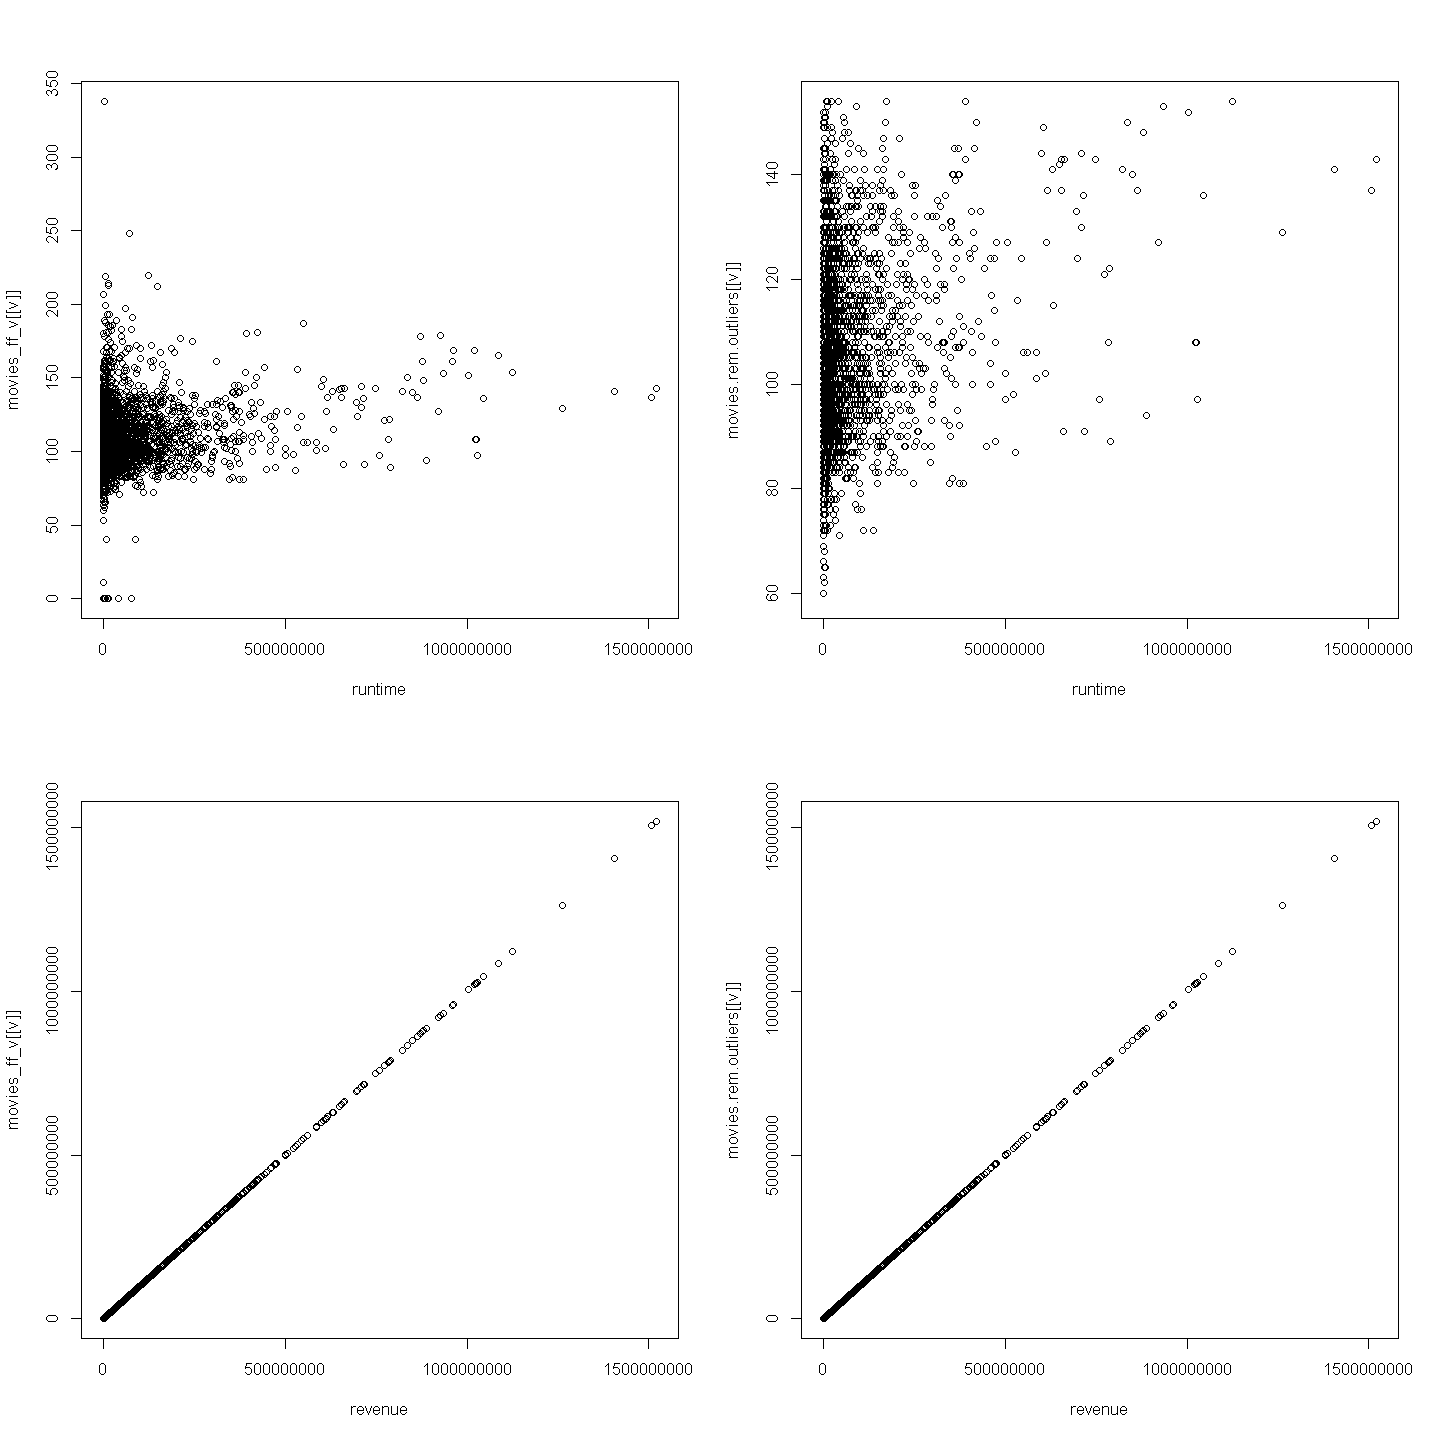

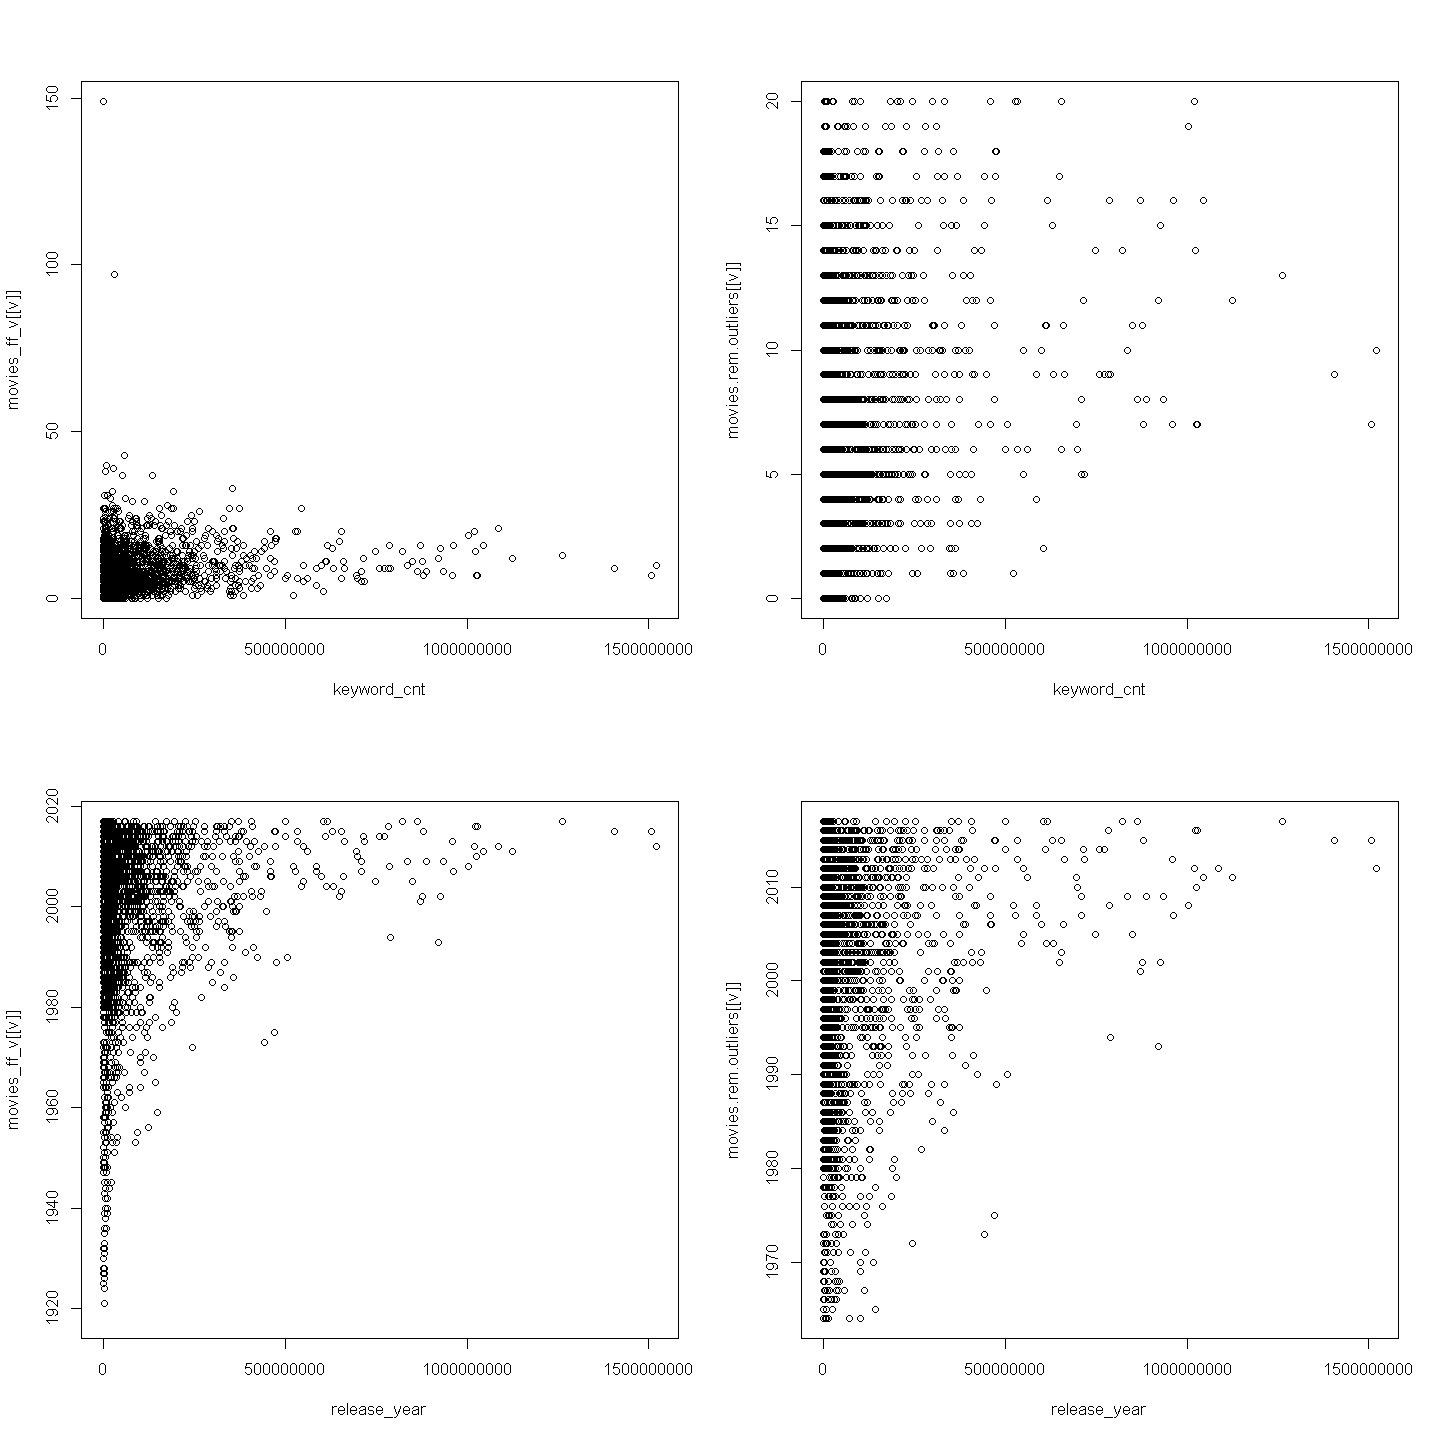

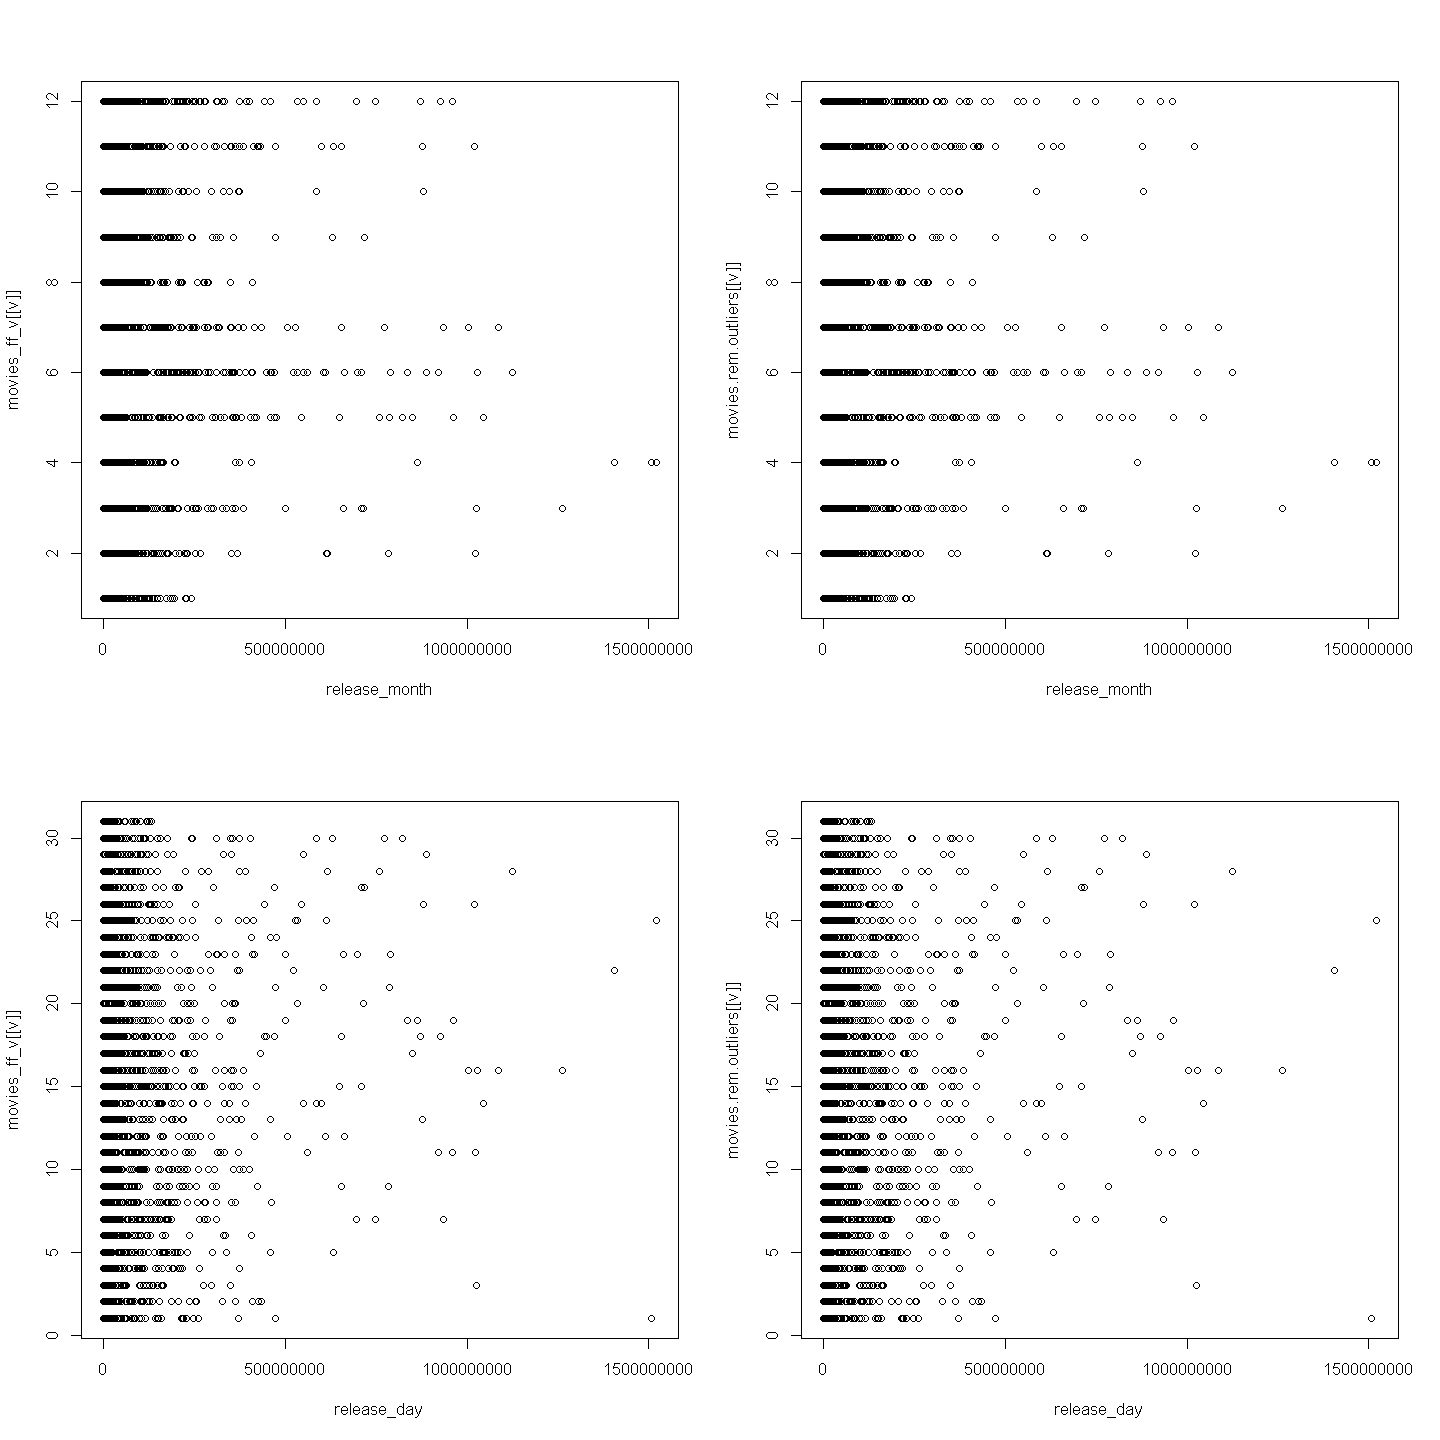

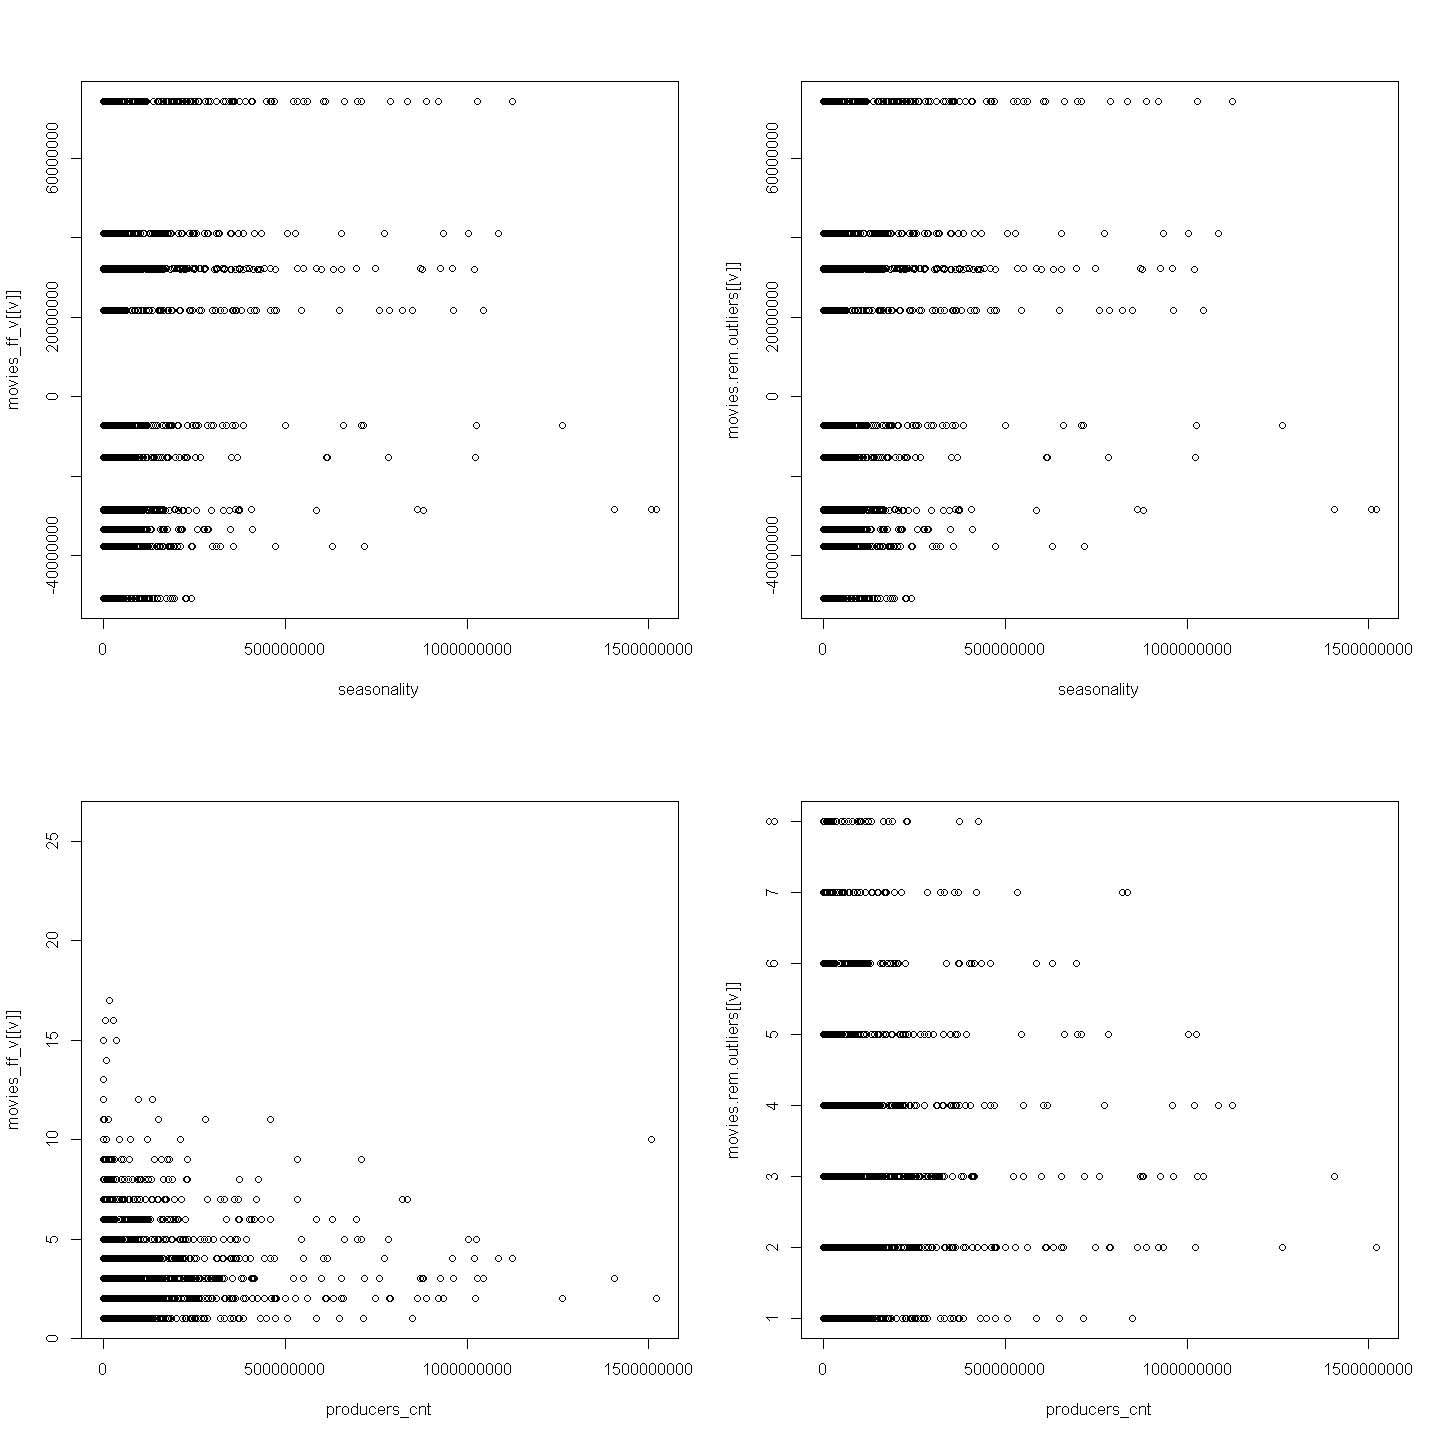

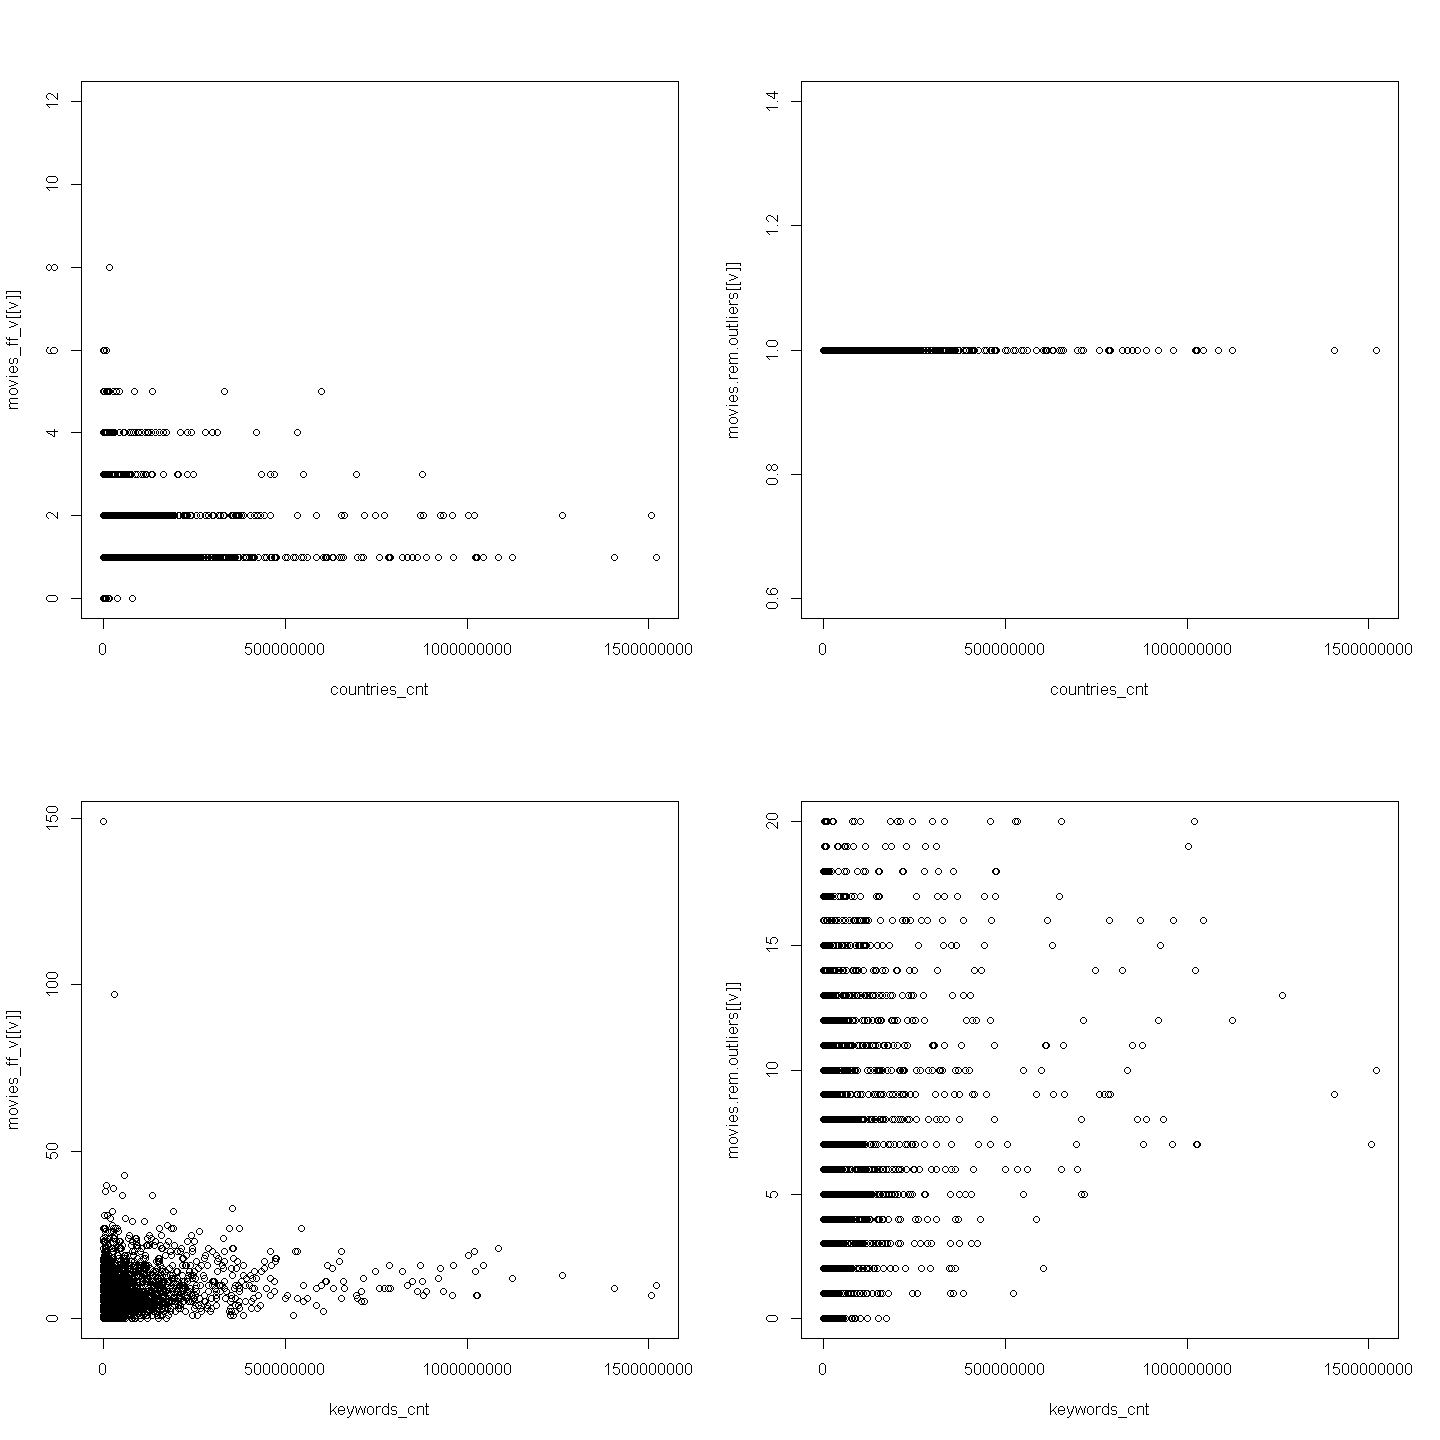

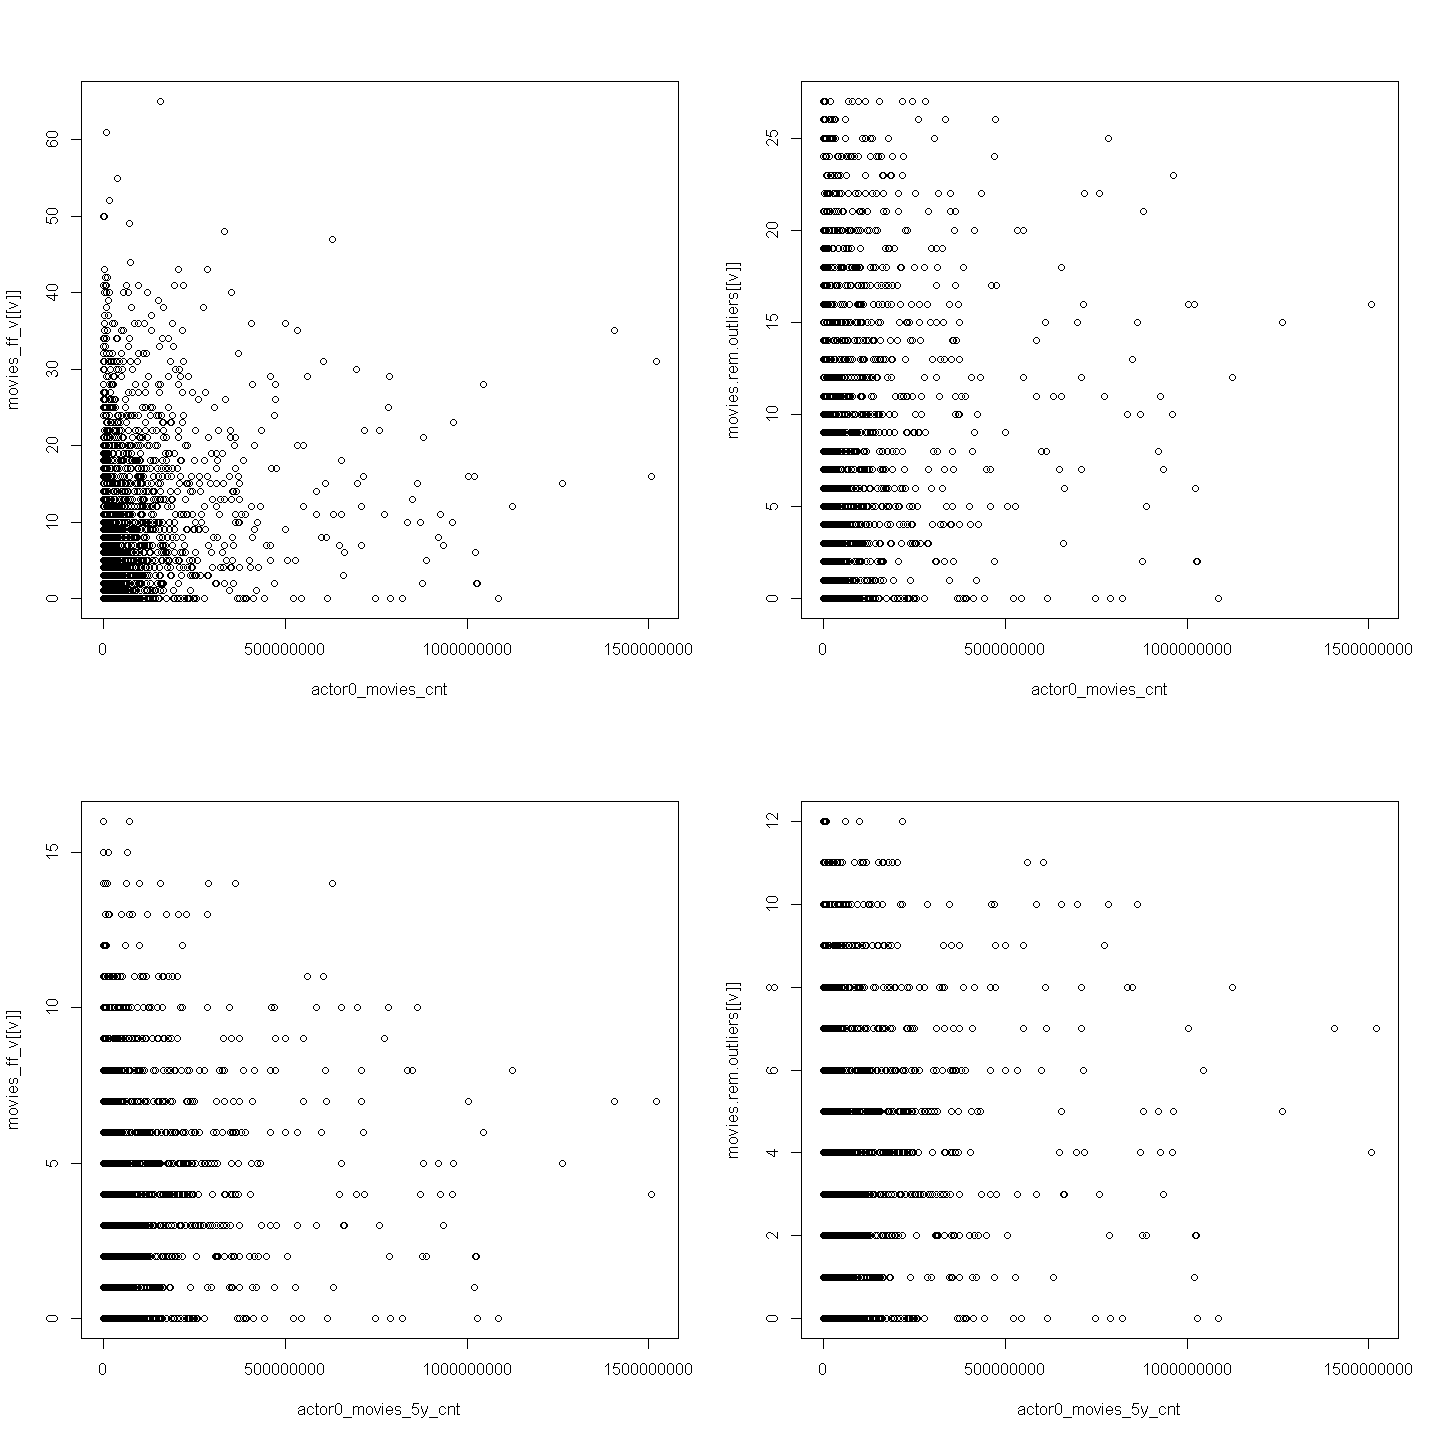

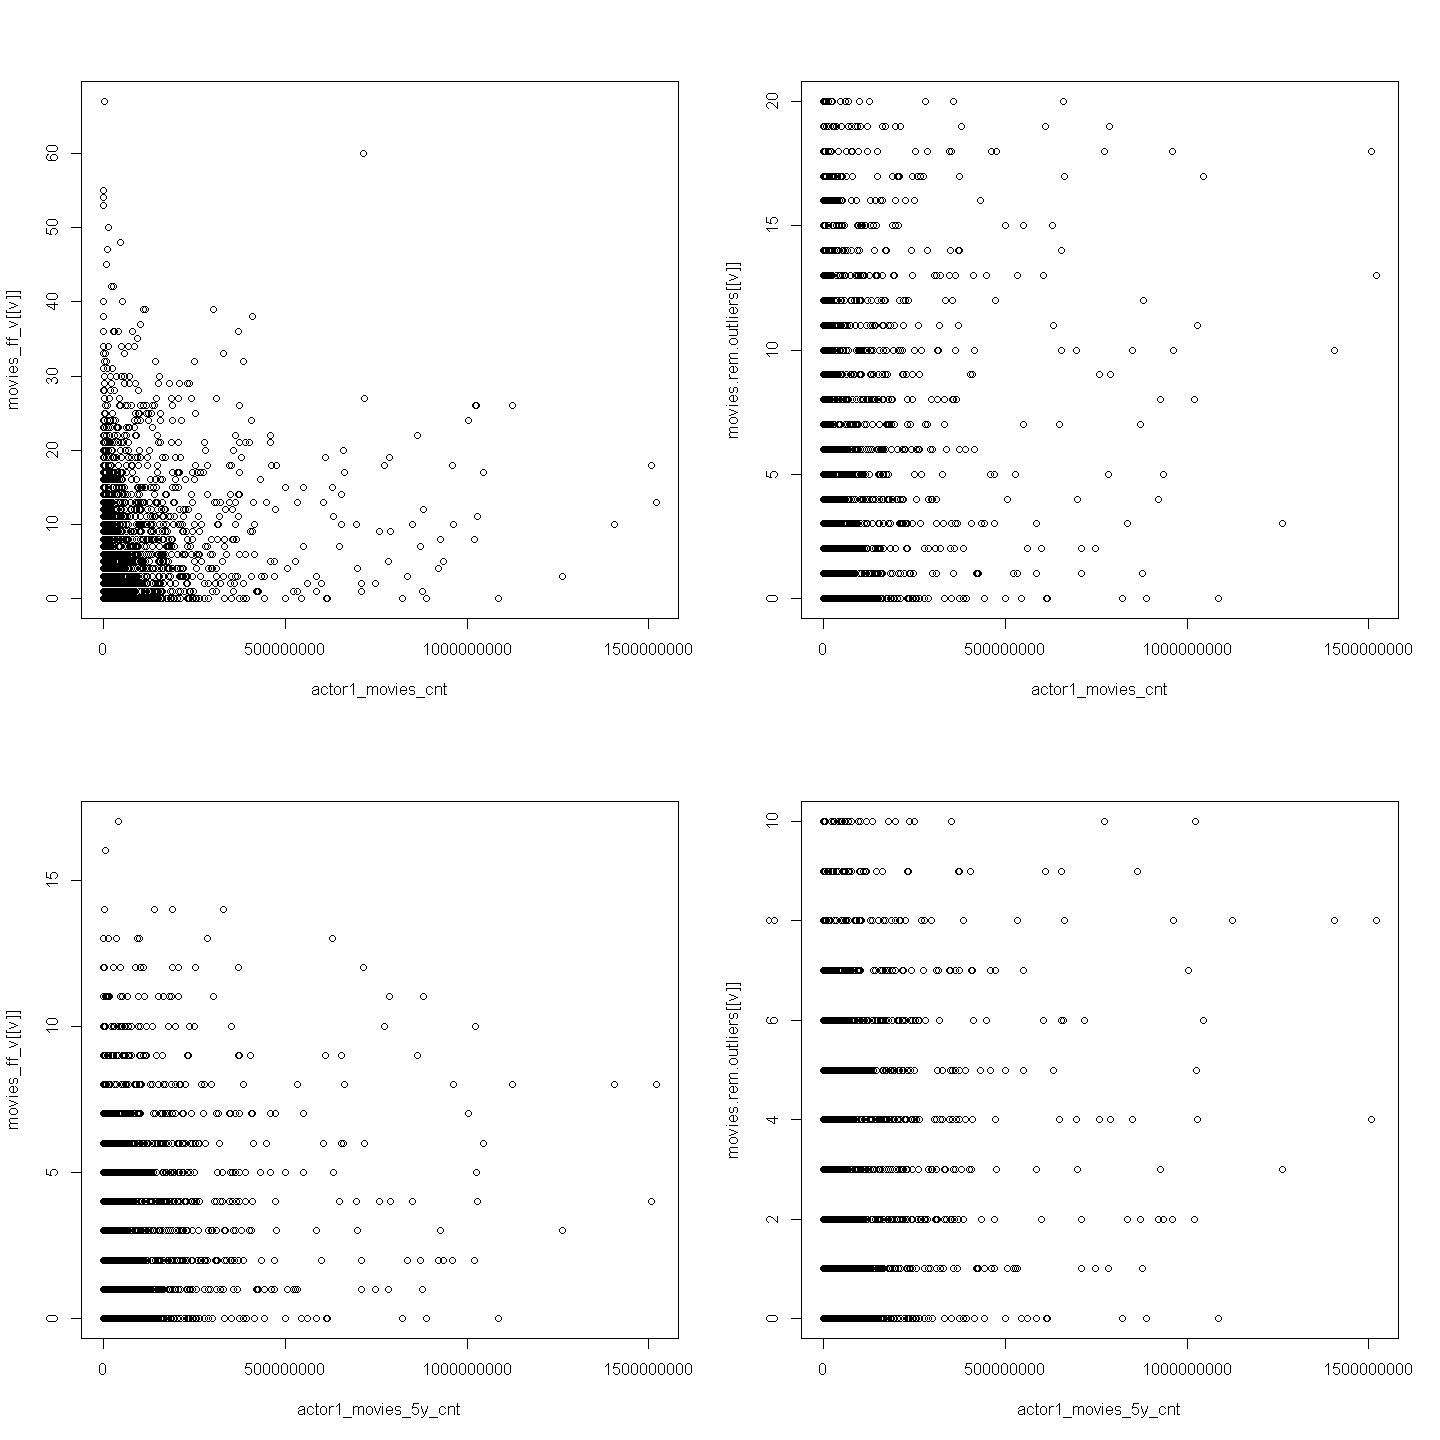

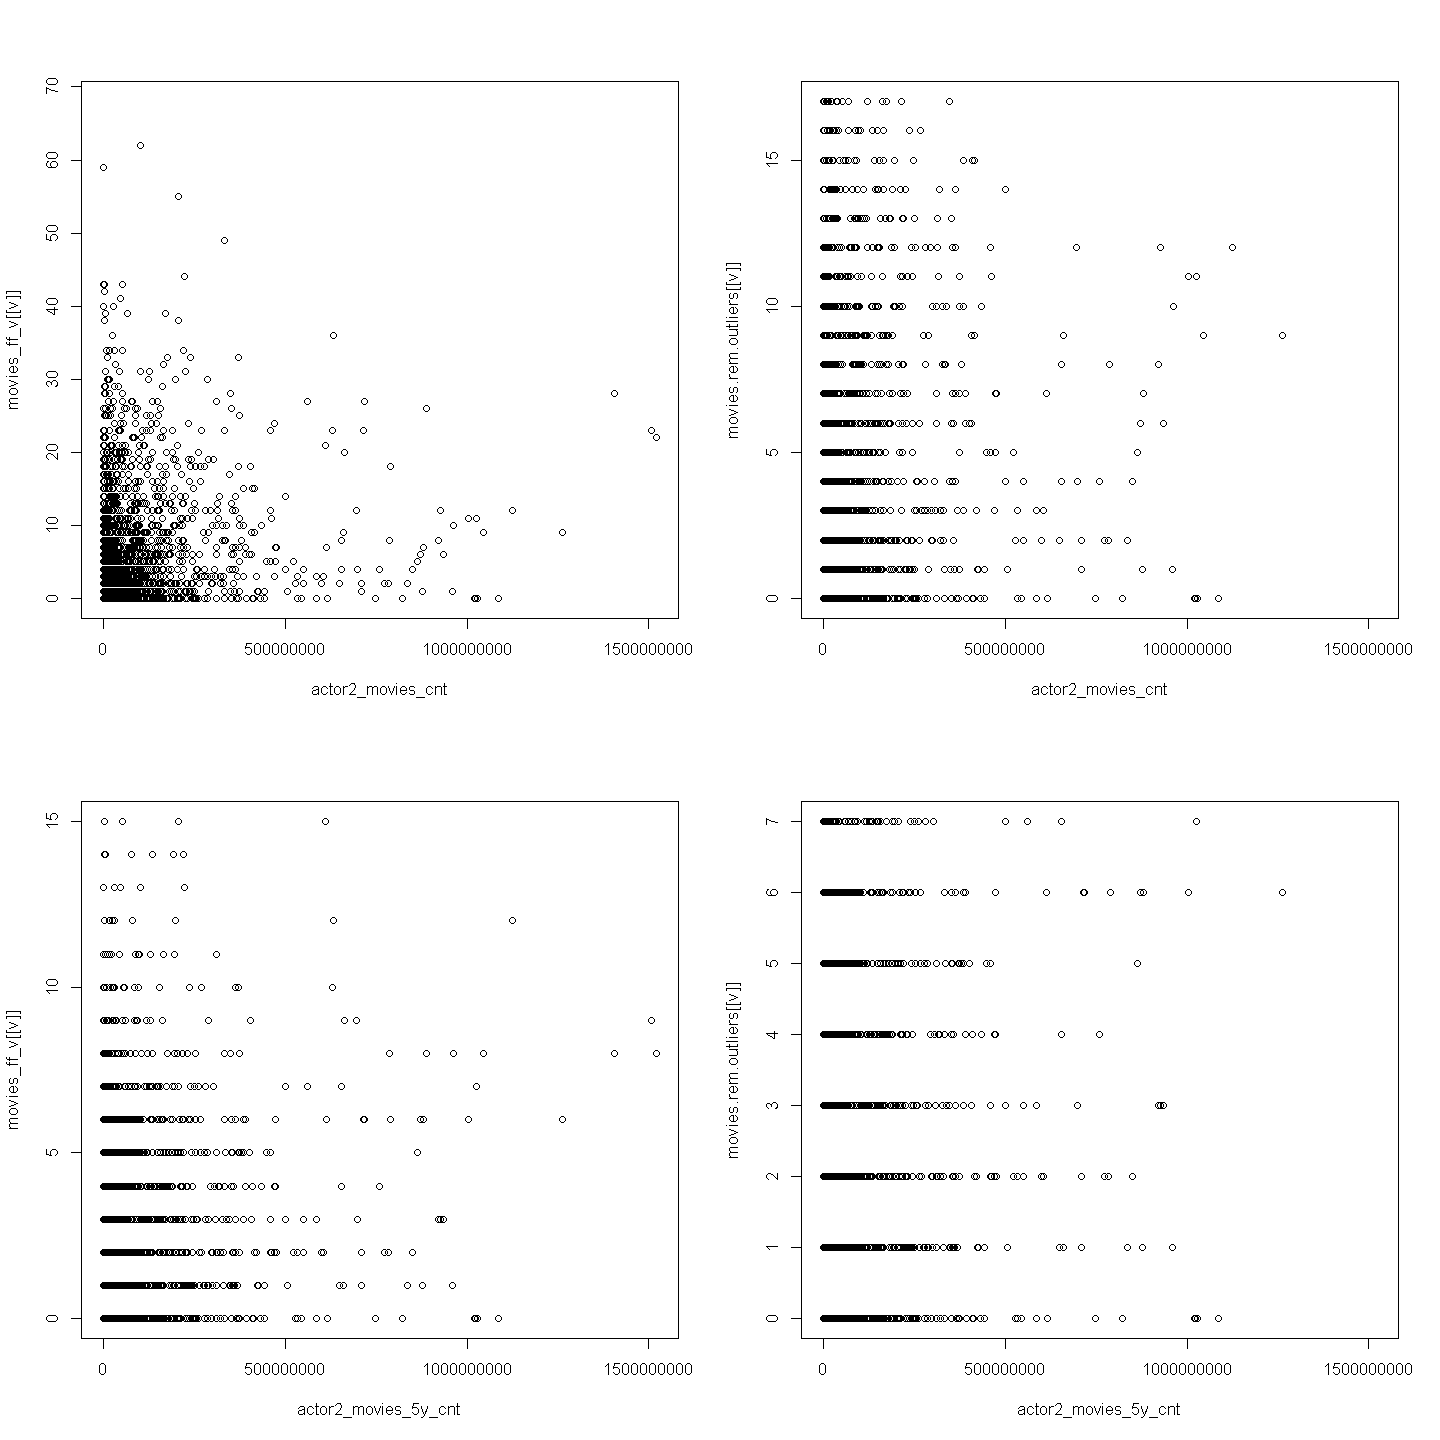

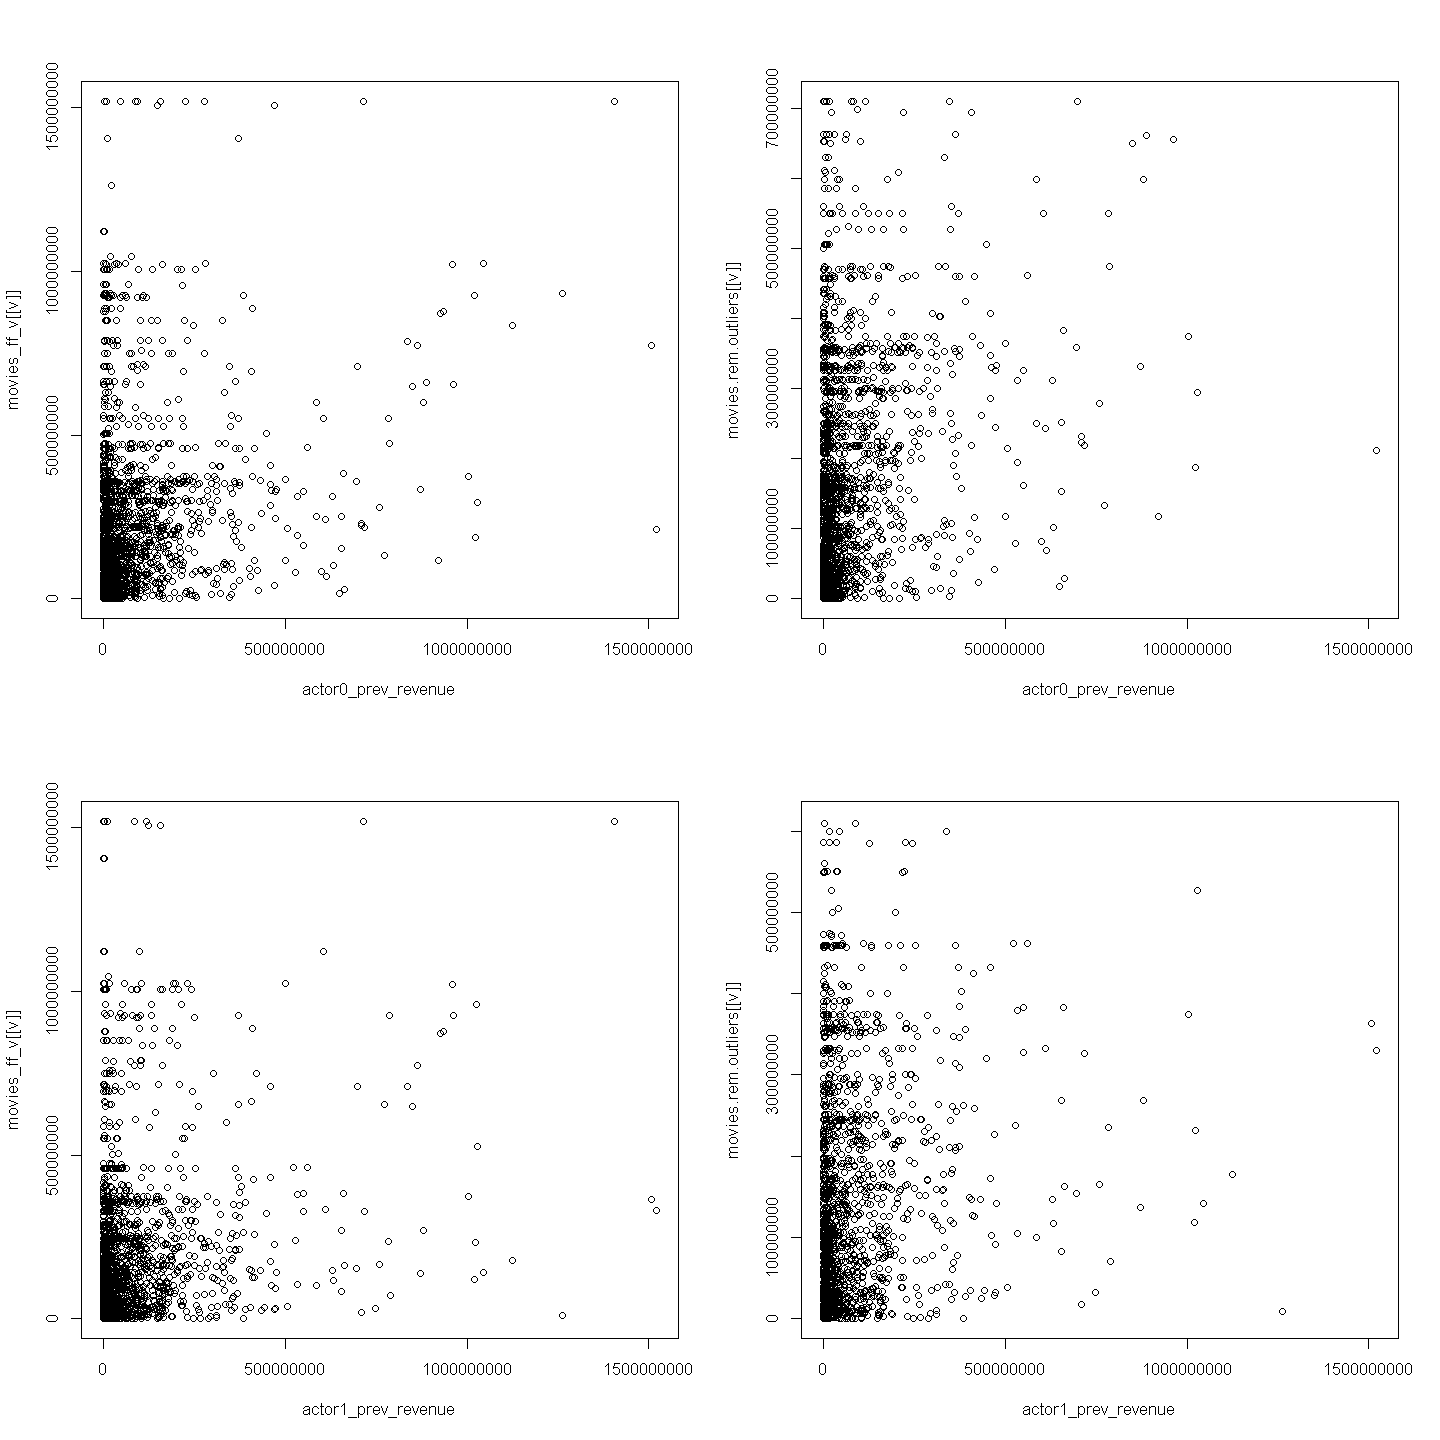

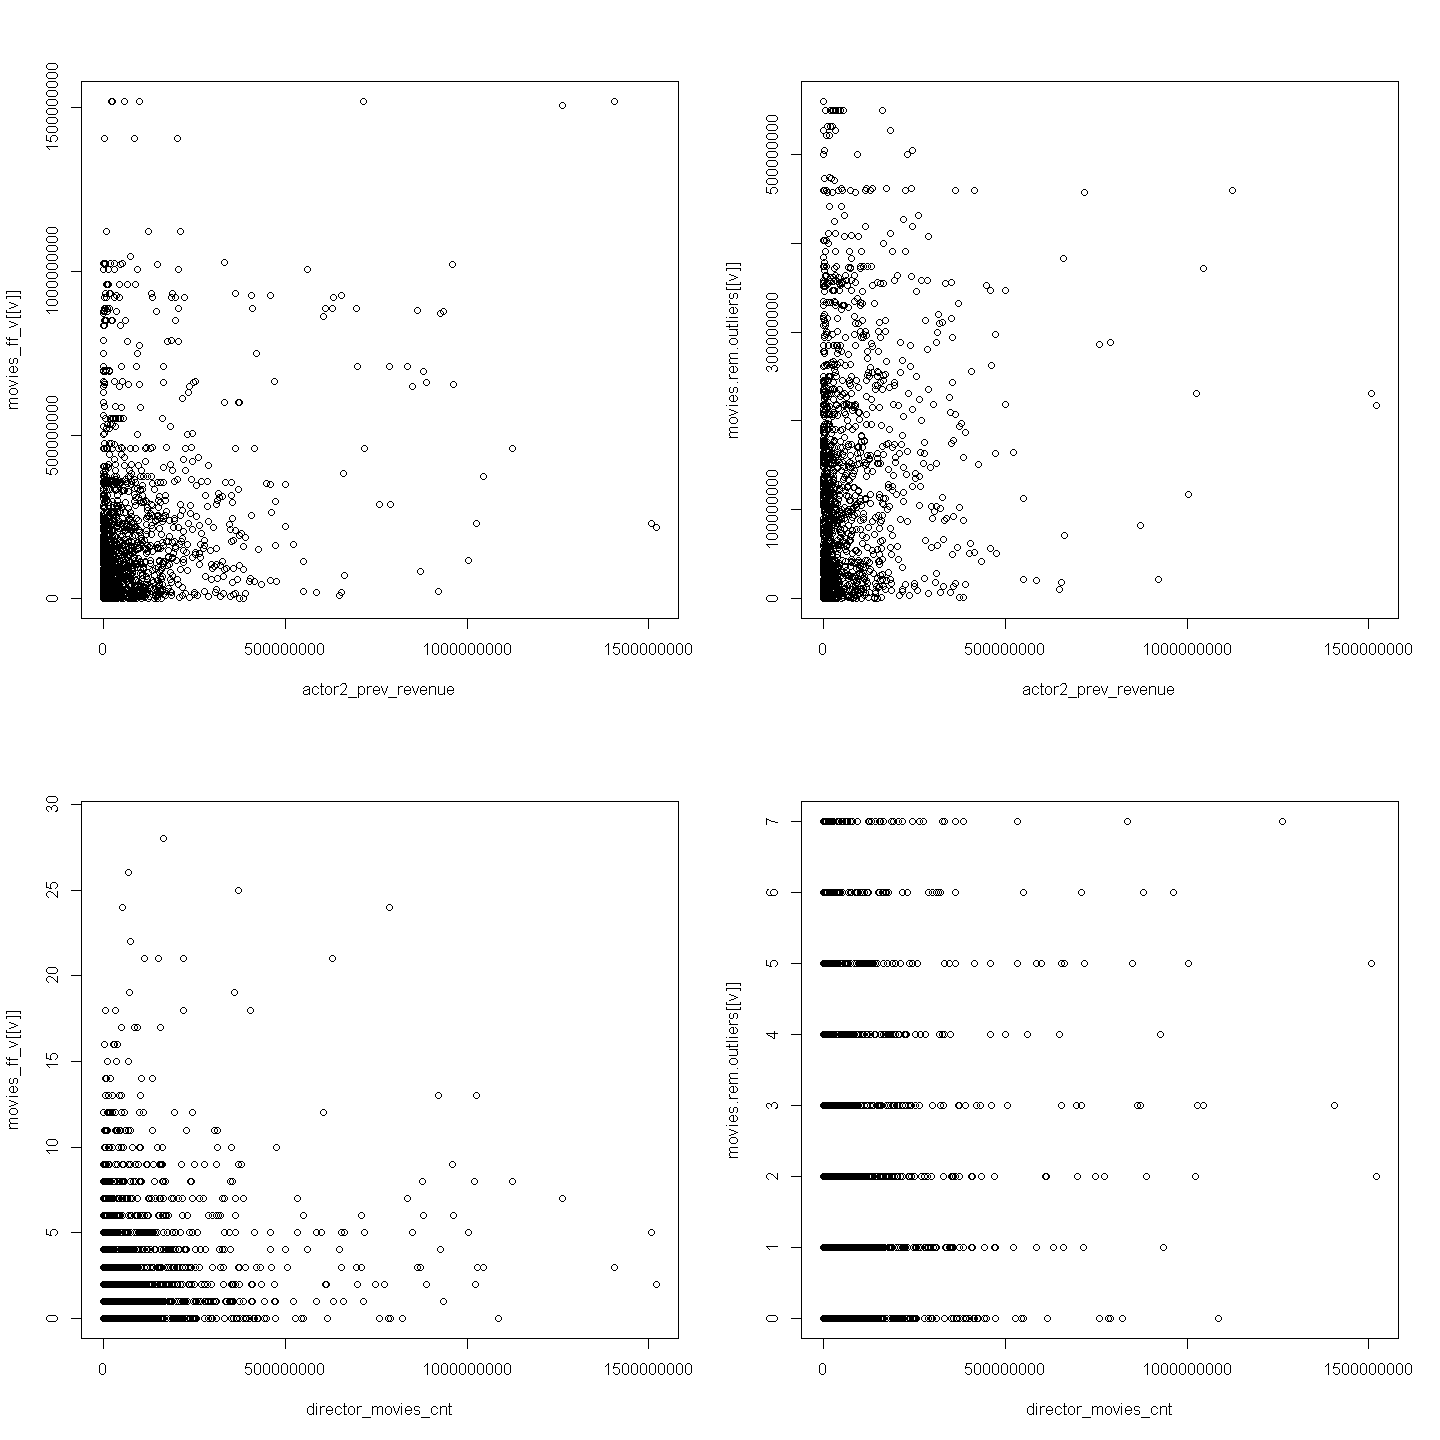

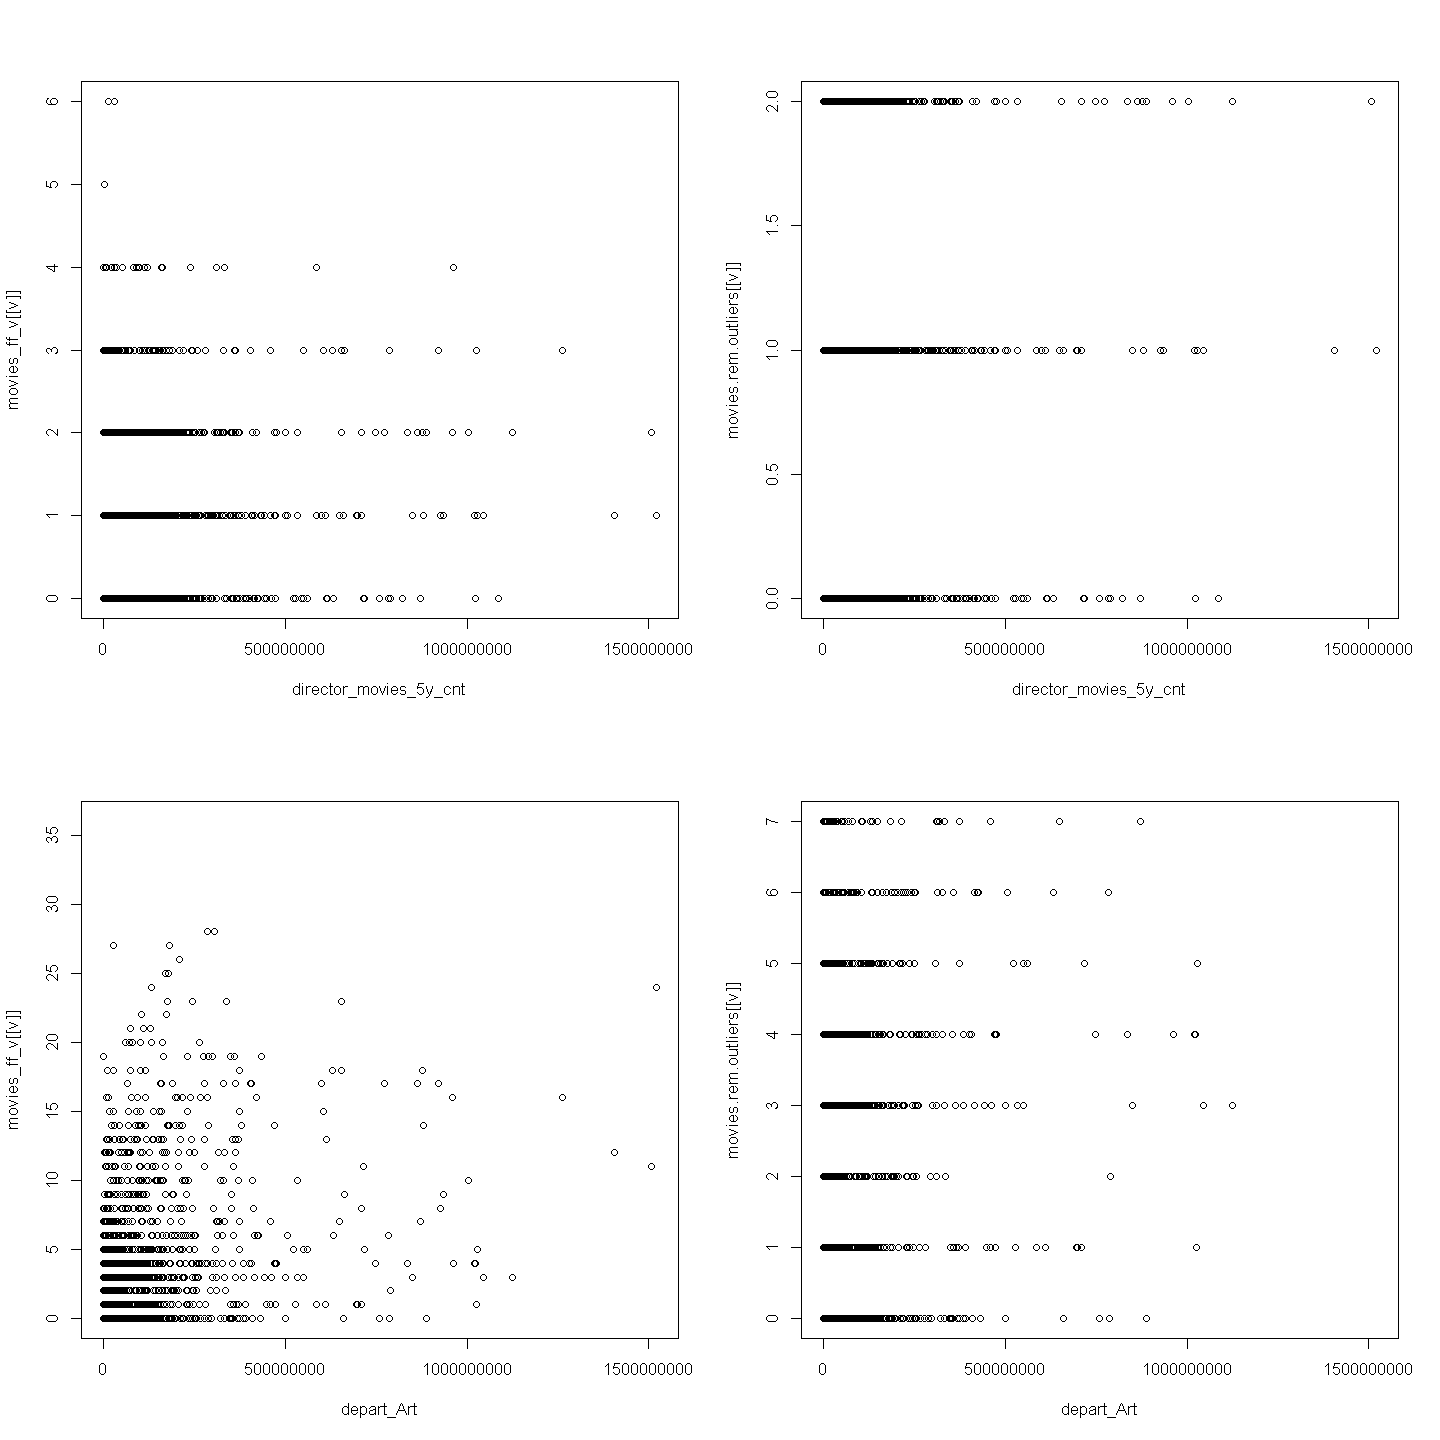

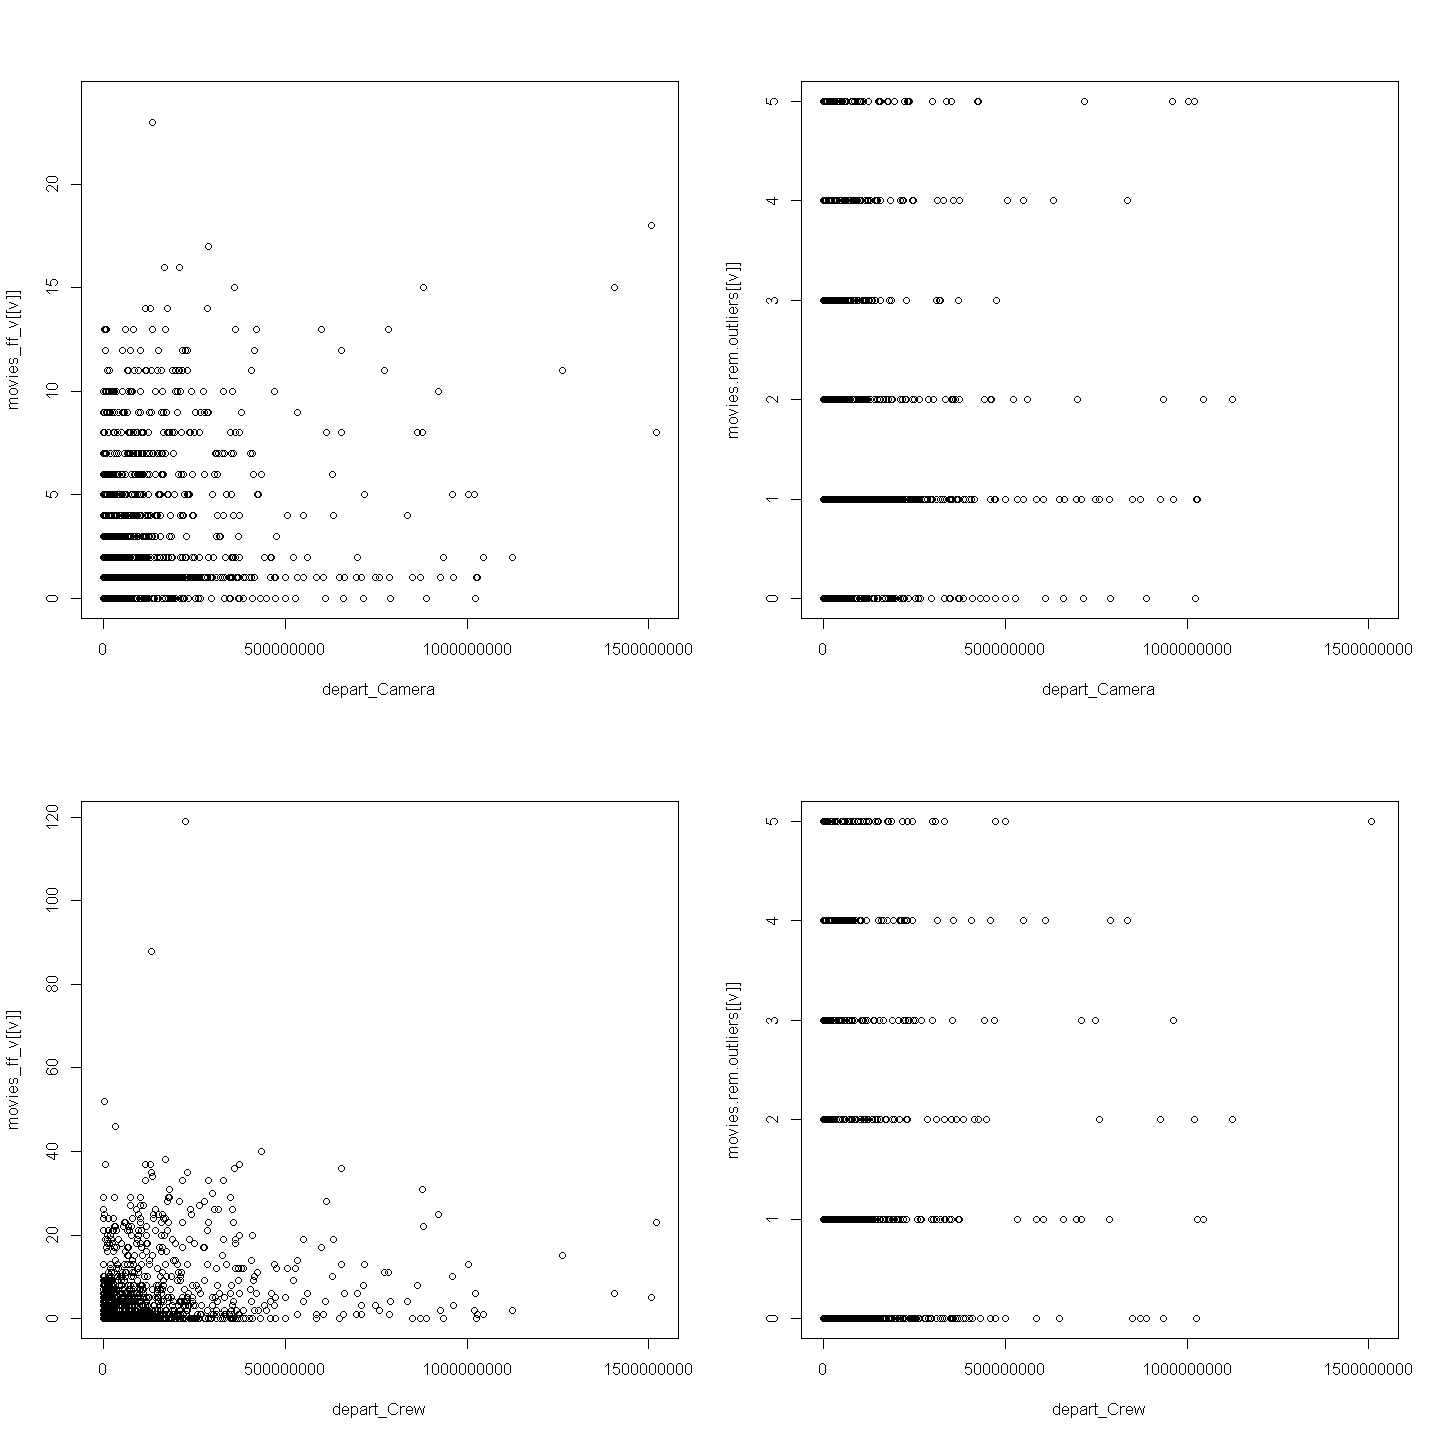

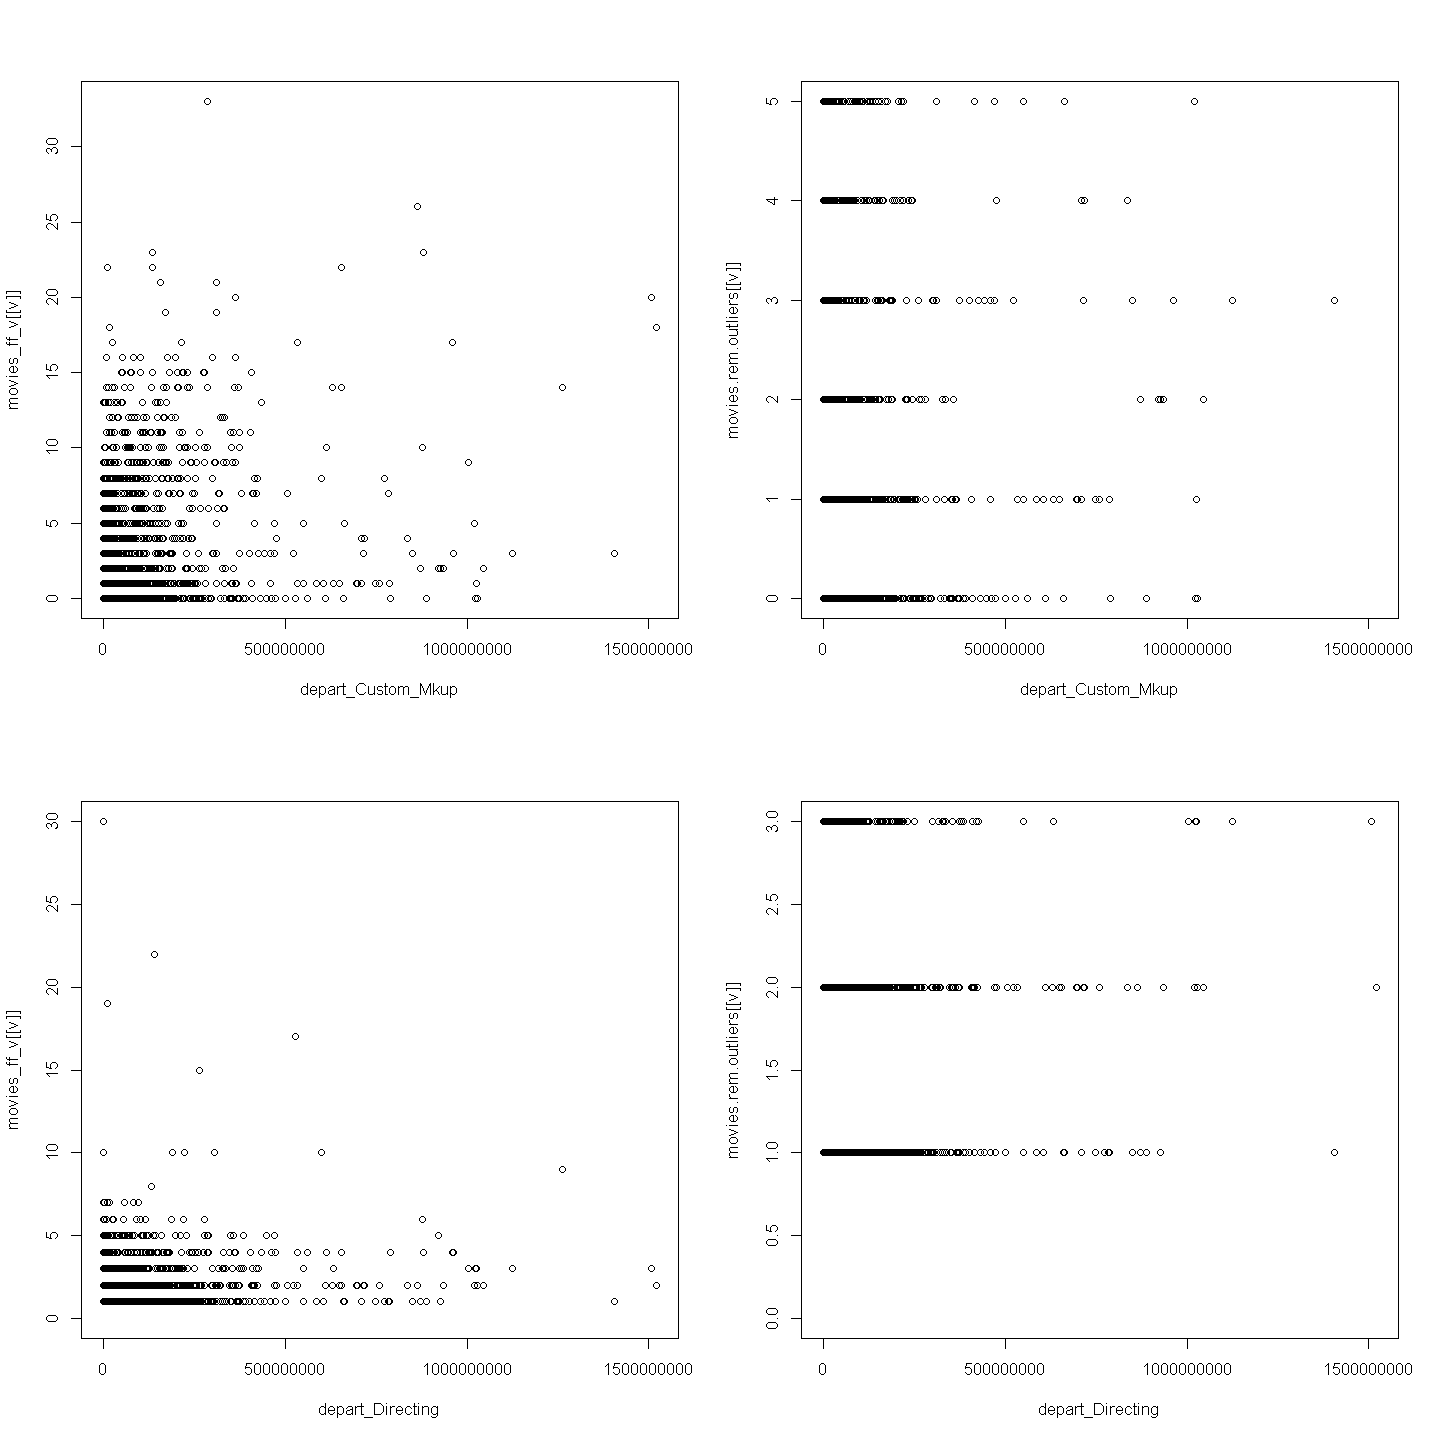

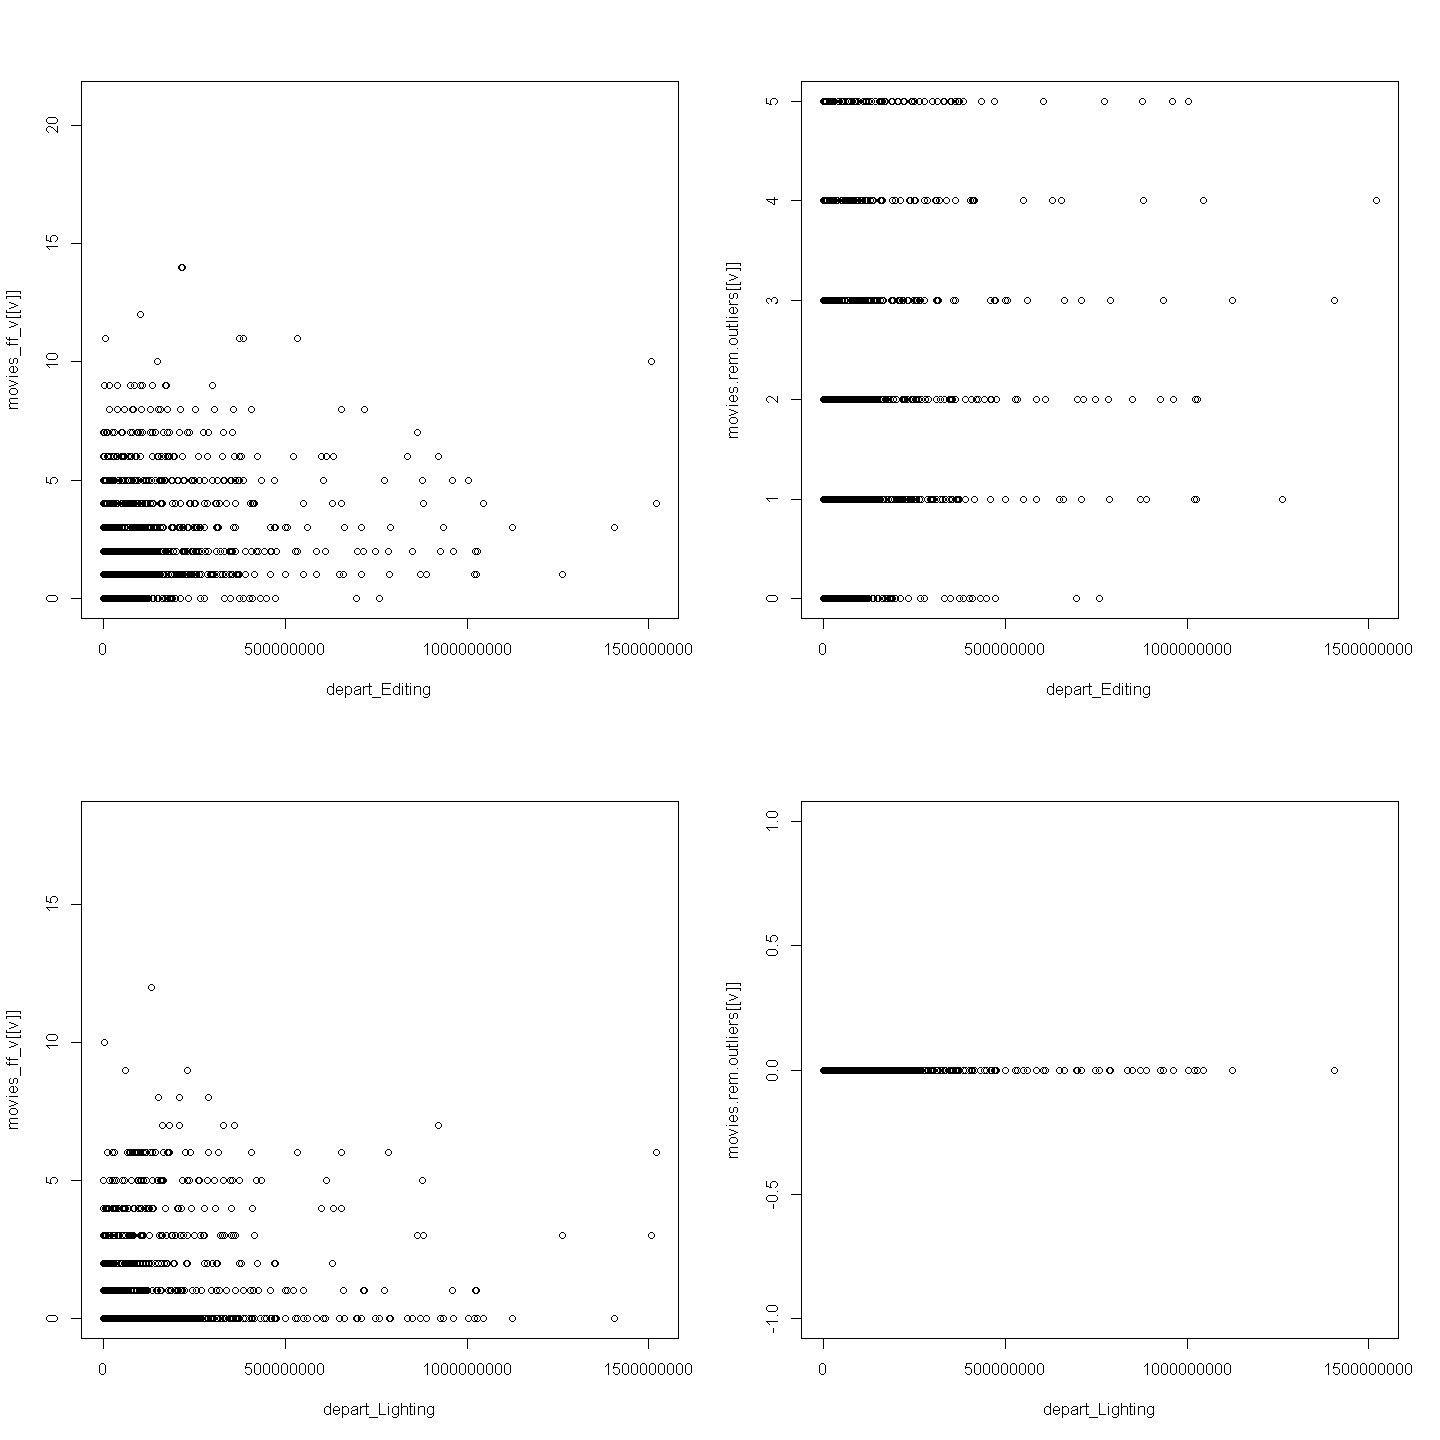

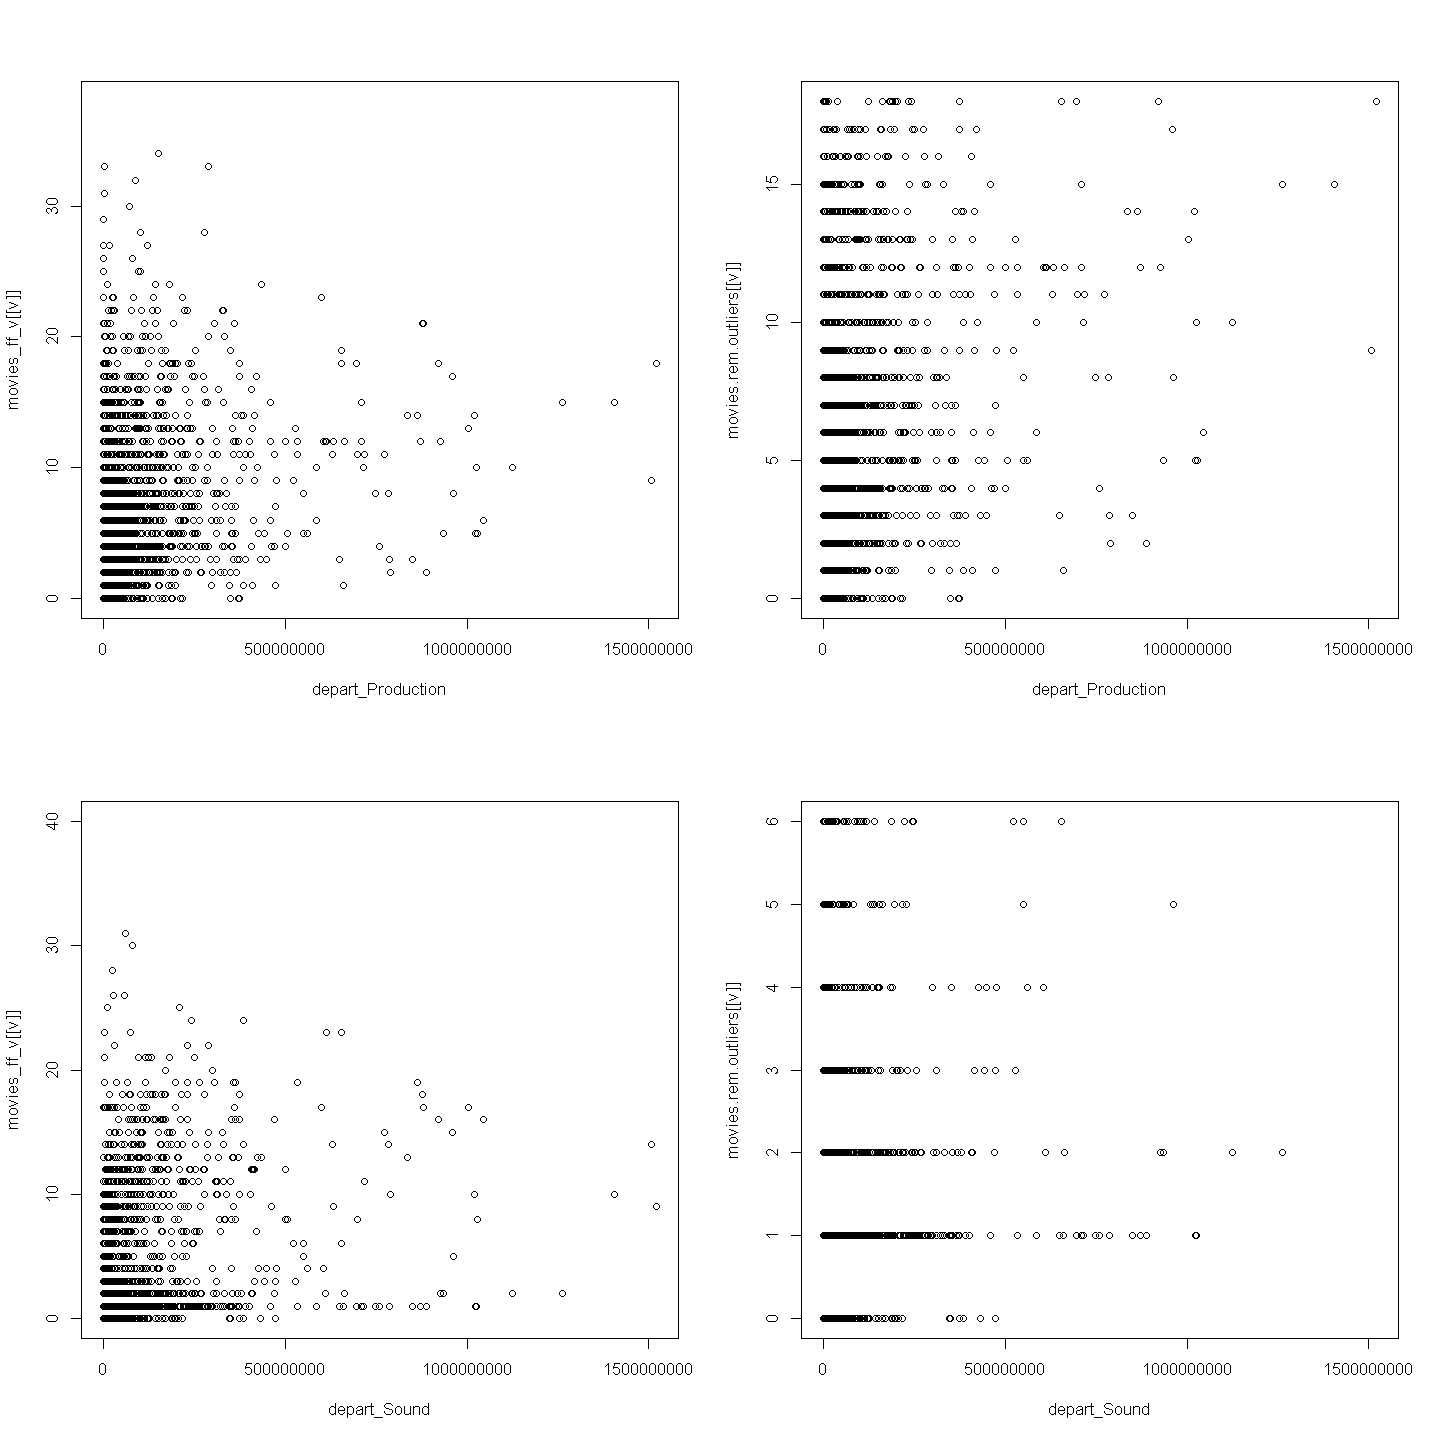

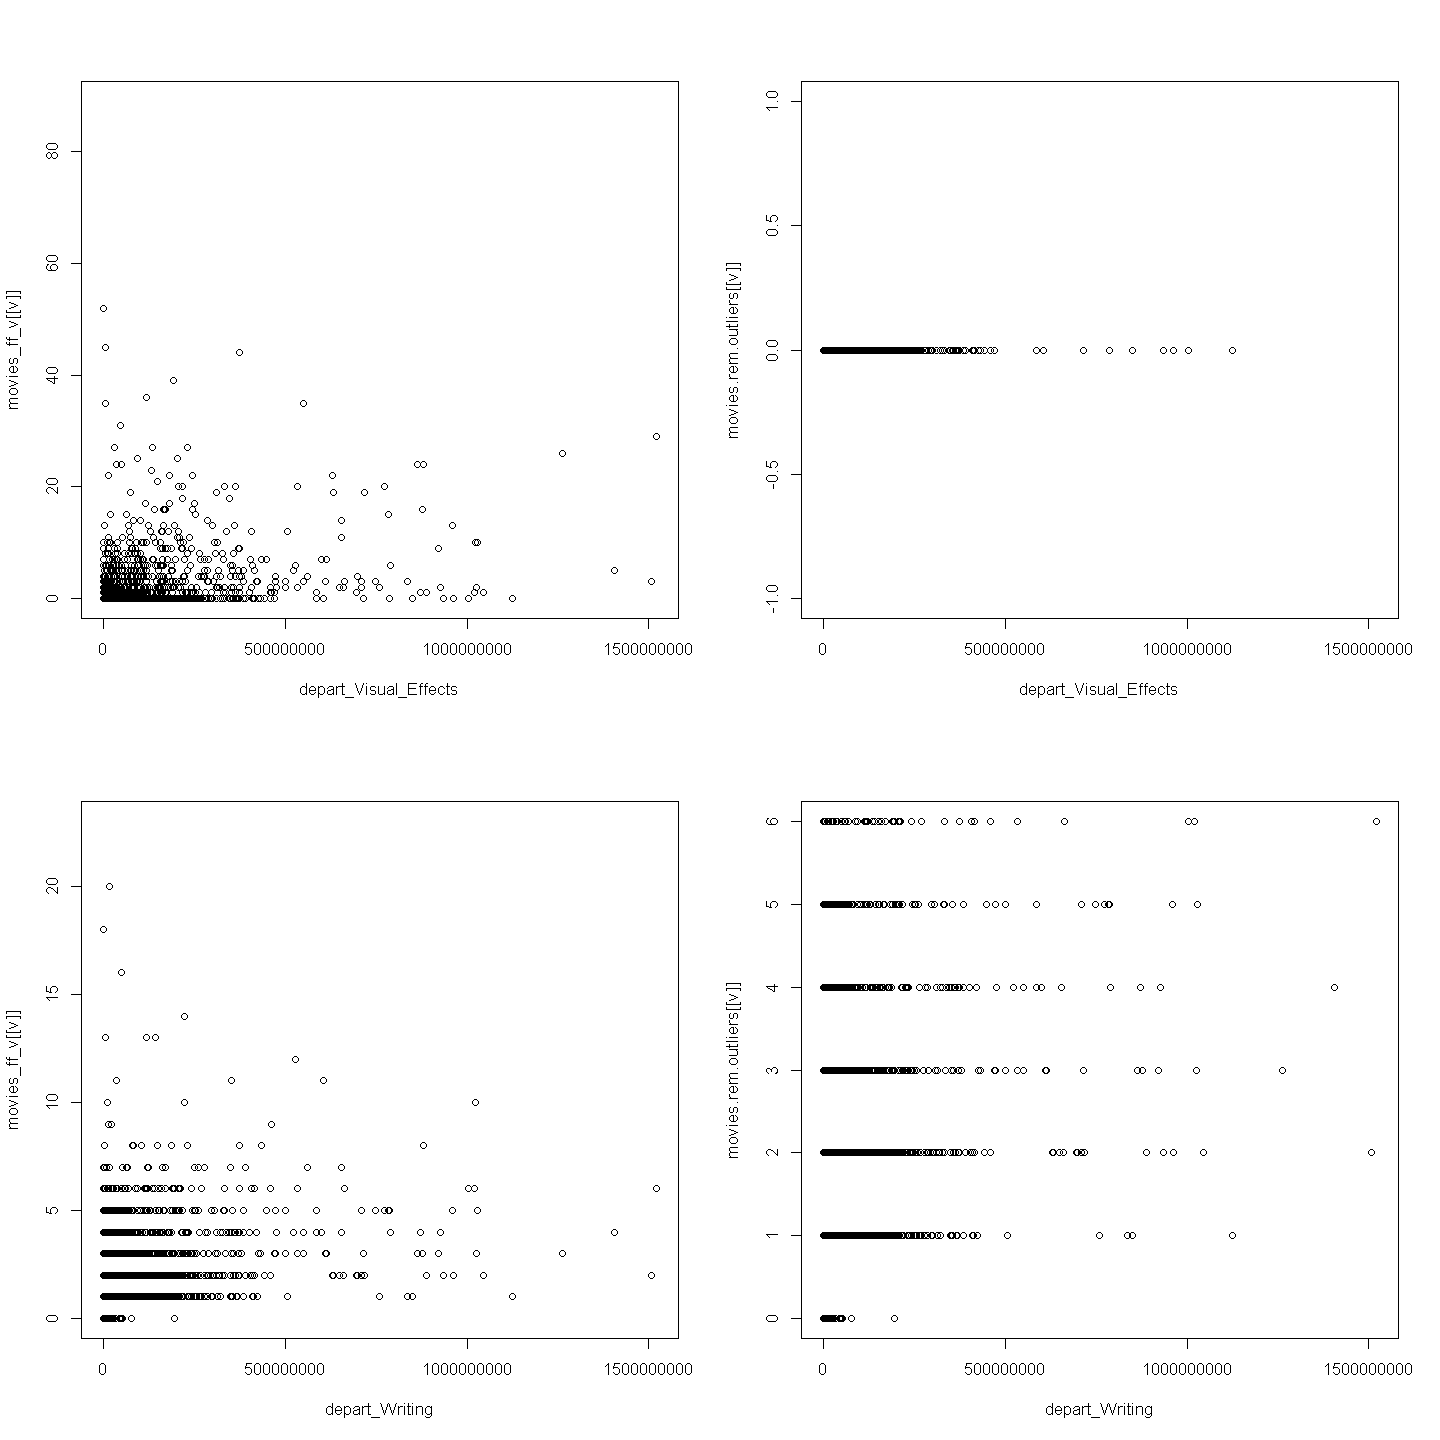

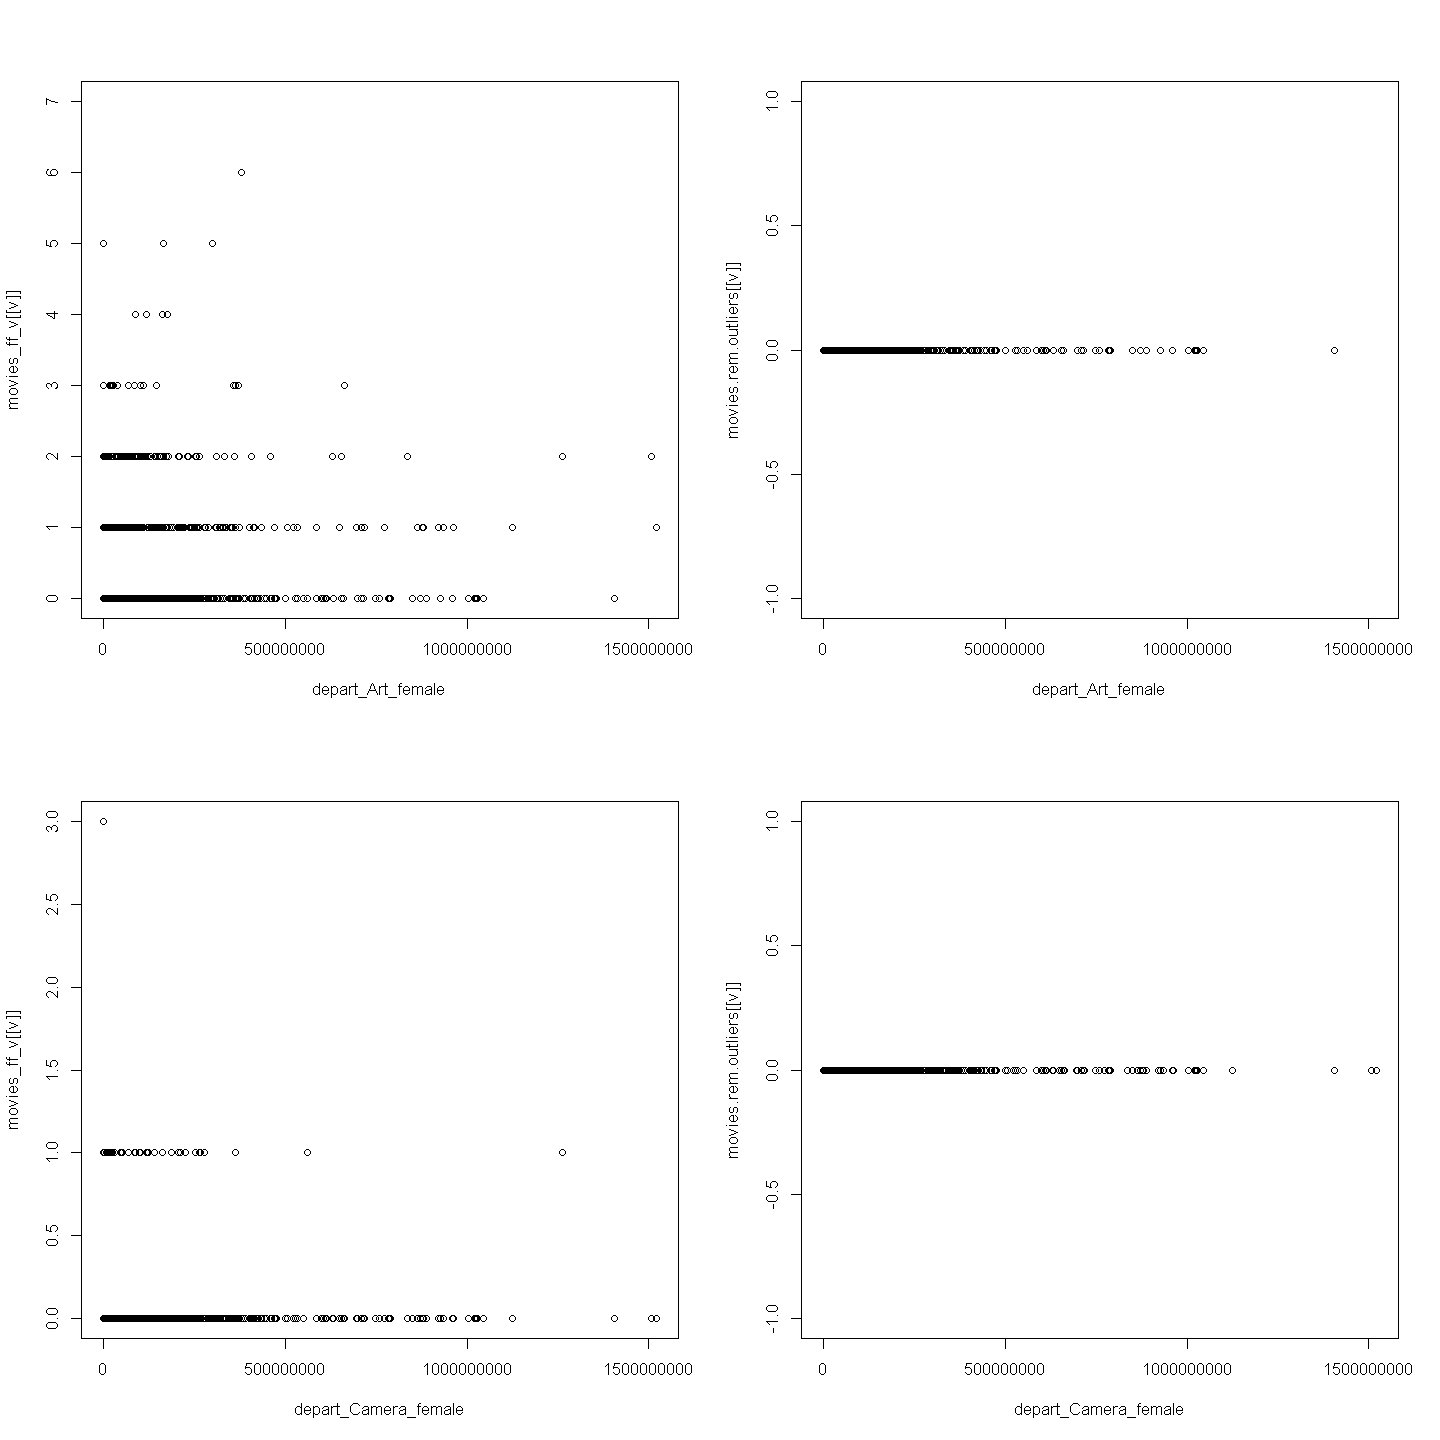

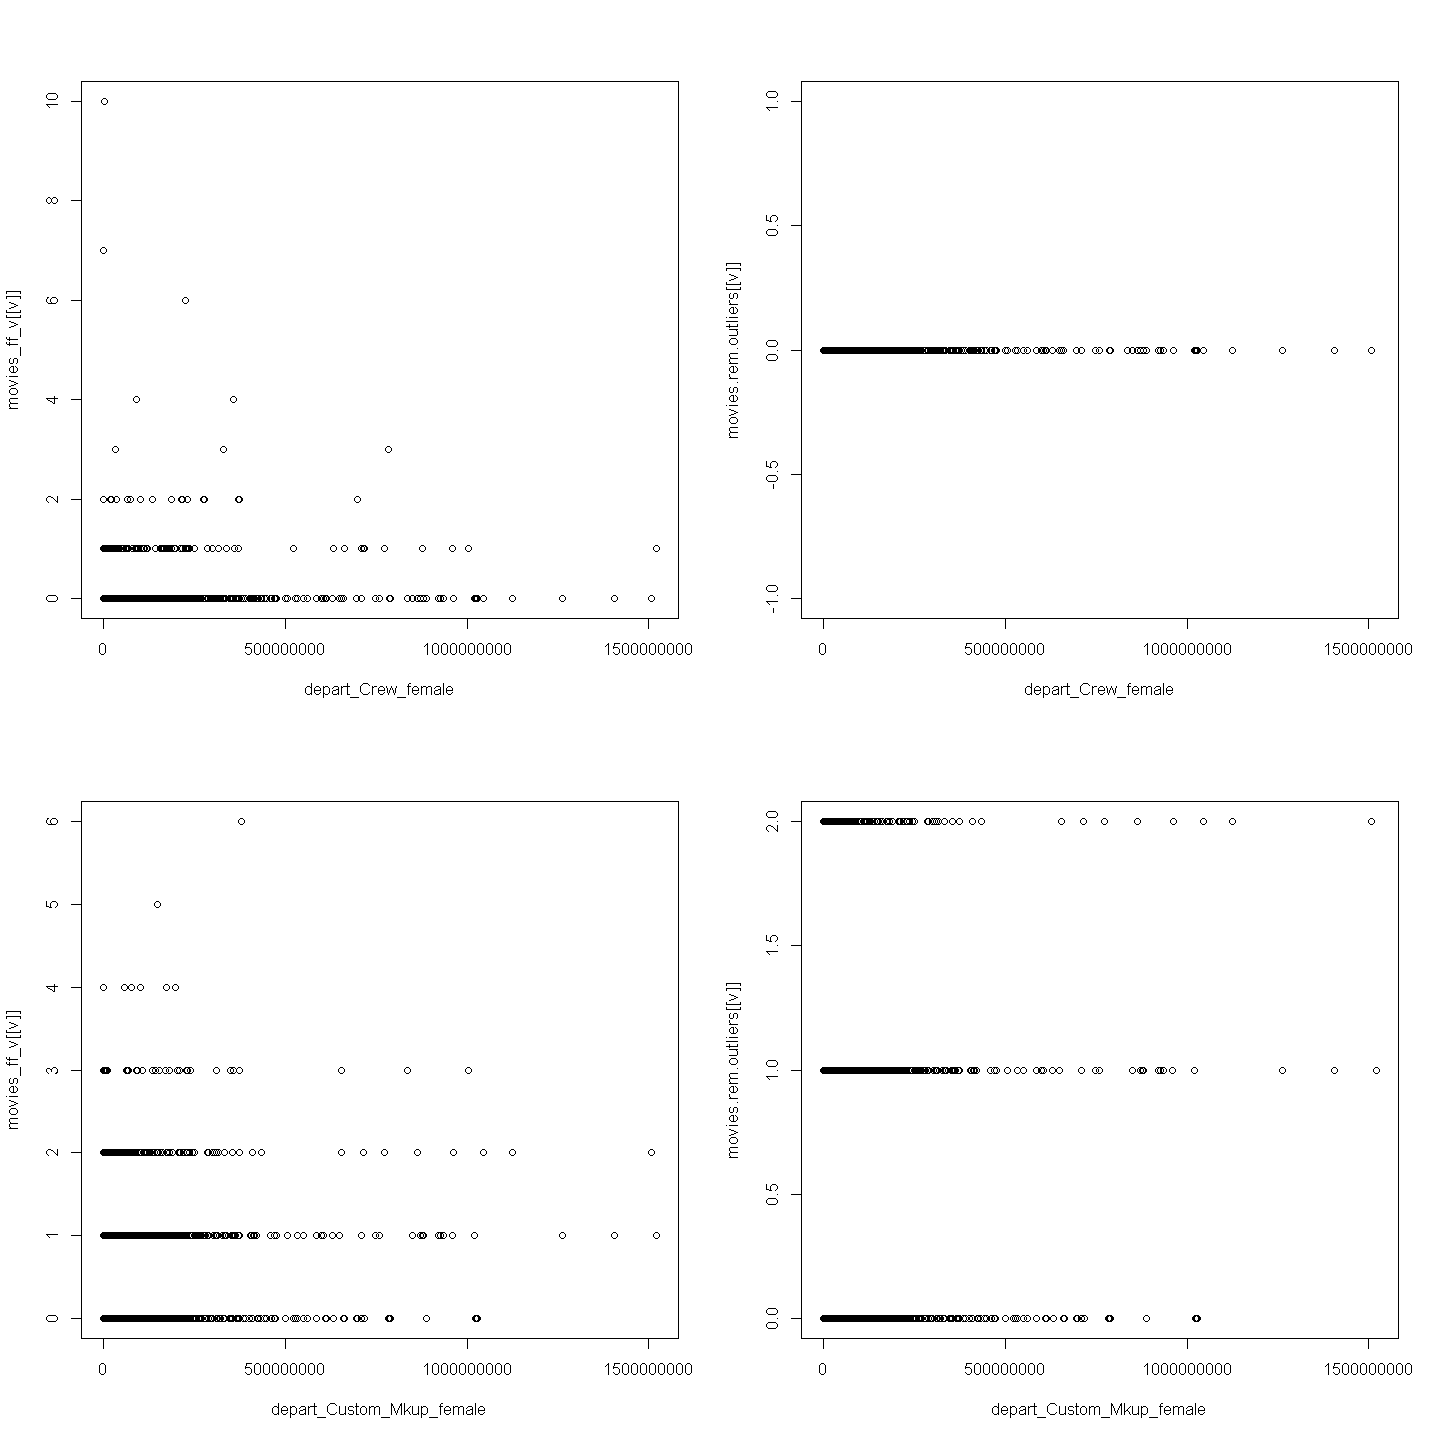

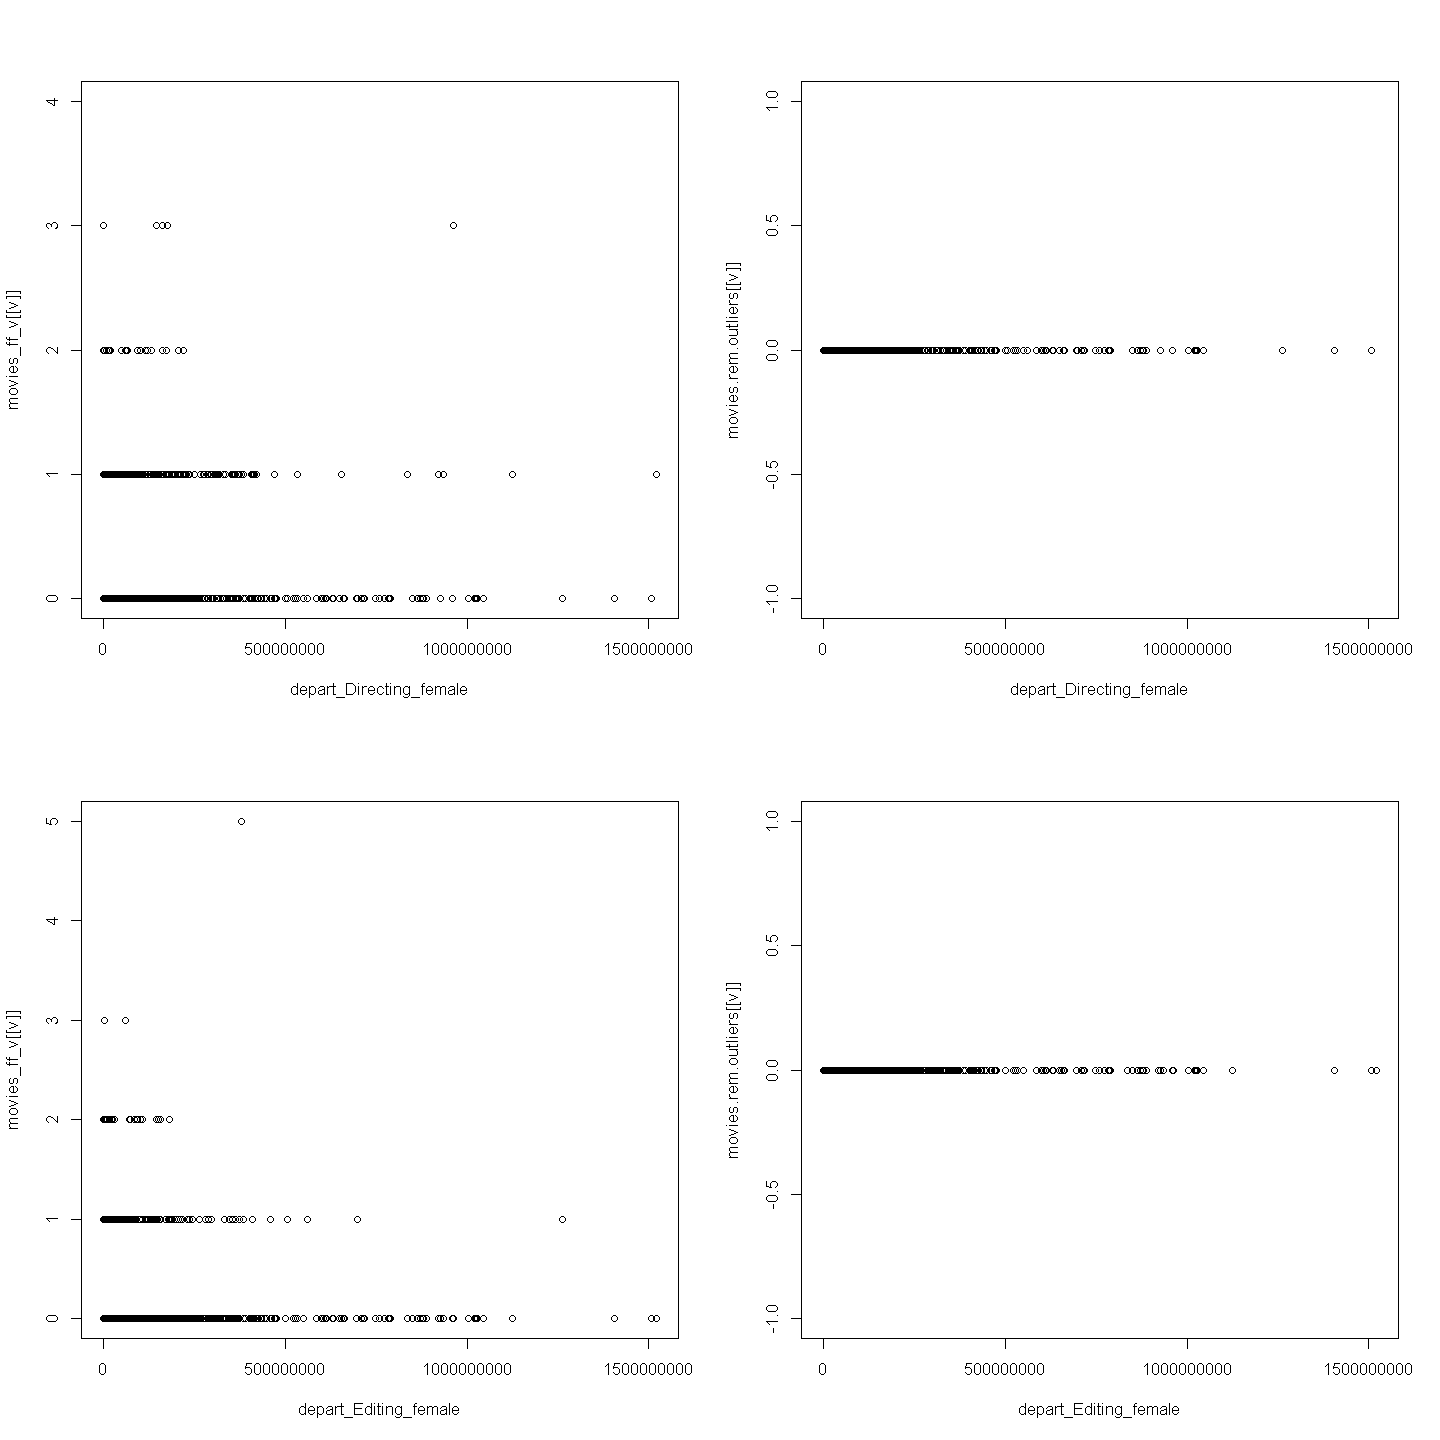

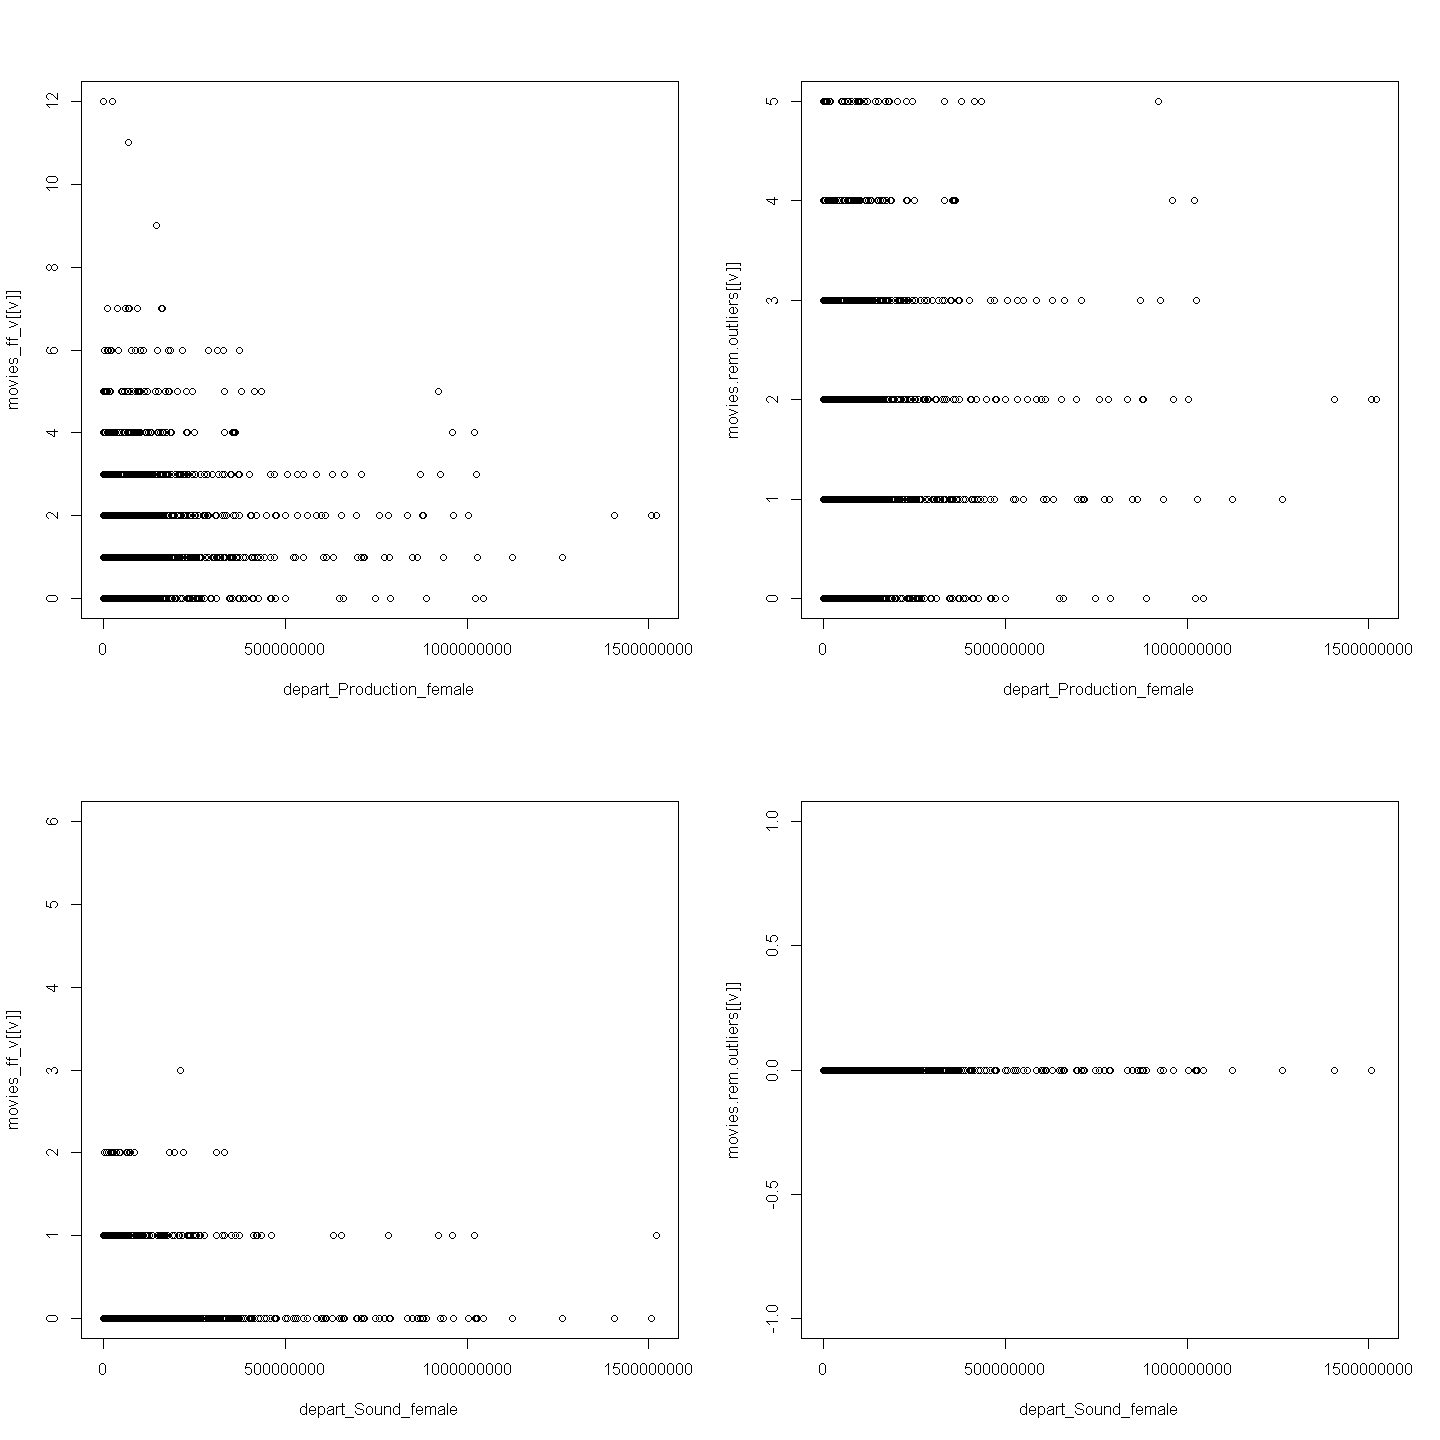

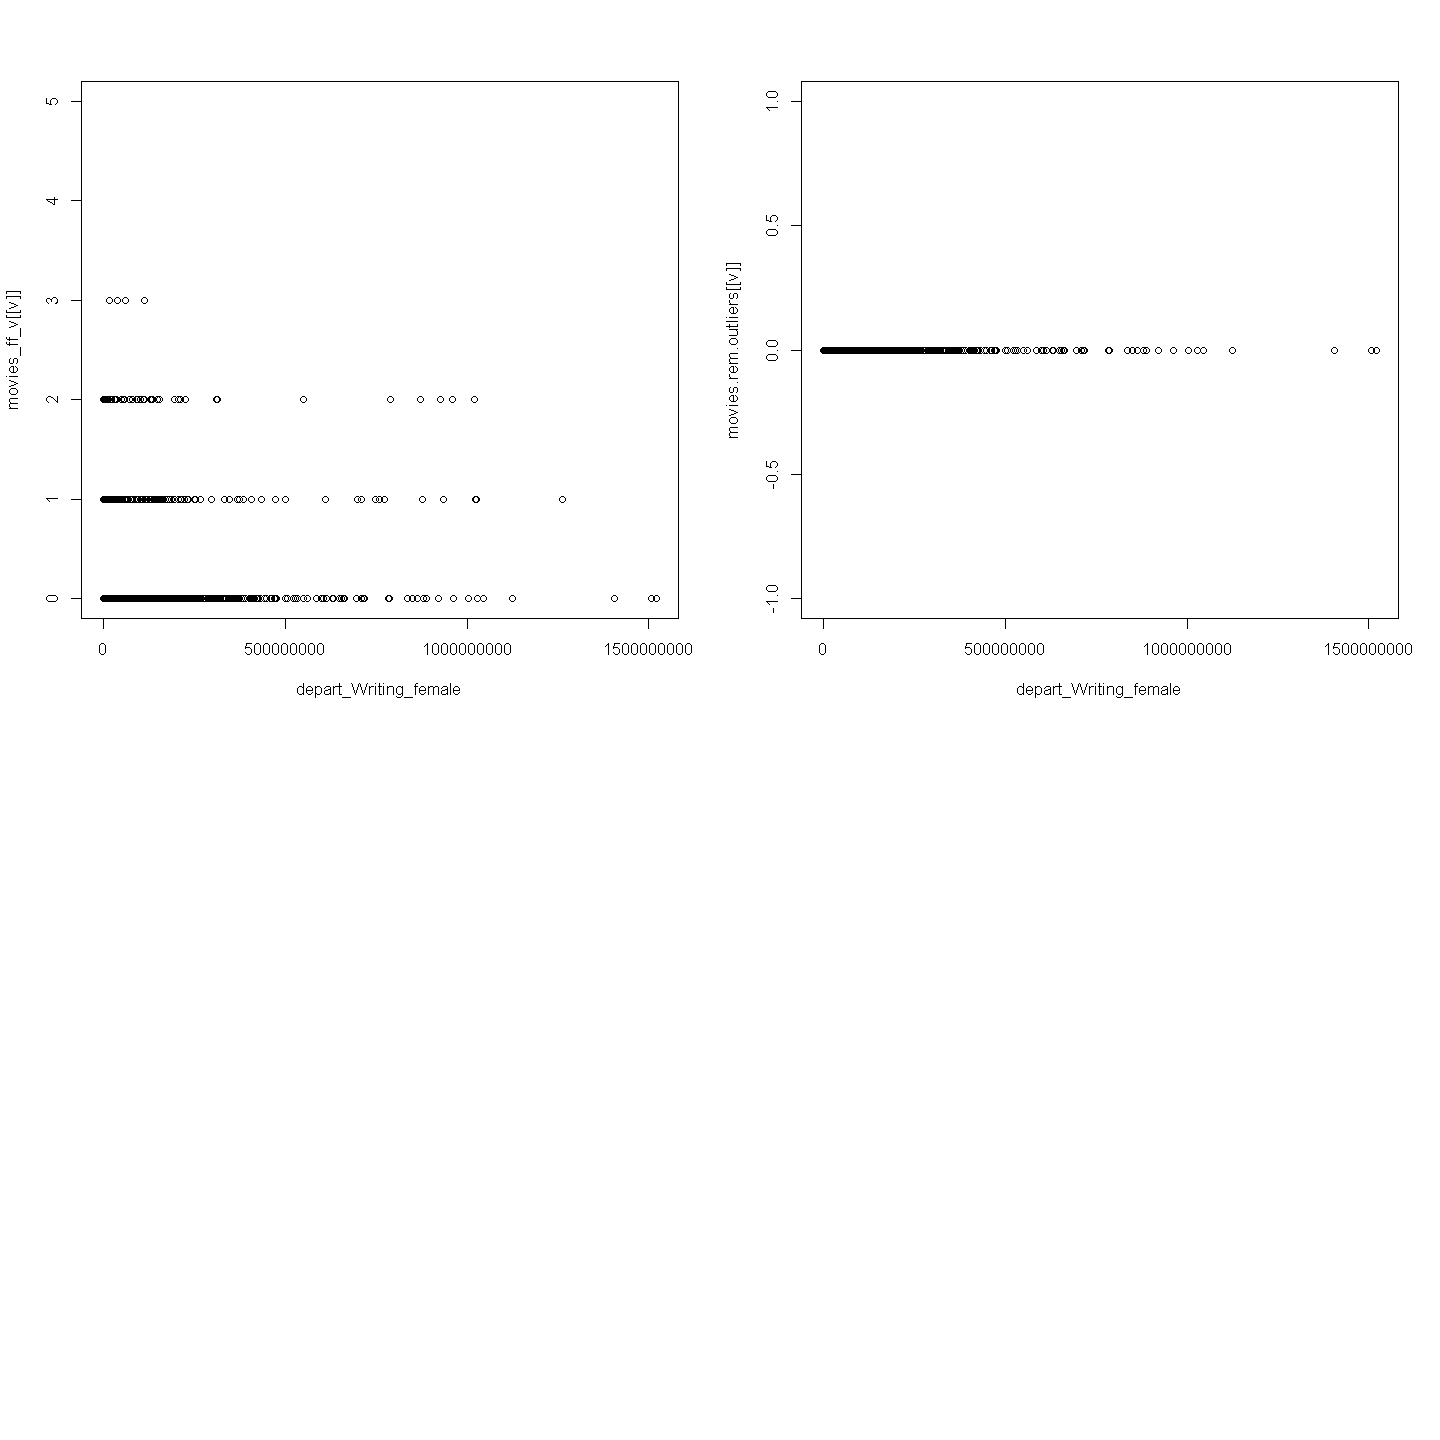

In [245]:
par(mfrow=c(2,2))
for (v in names(movies.rem.outliers[,2:ncol(movies.rem.outliers)])){
        if (max(movies_ff_v[v],na.rm=TRUE)>2) 
            {plot(movies_ff_v$revenue,movies_ff_v[[v]],xlab=v)
             plot(movies_ff_v$revenue,movies.rem.outliers[[v]],xlab=v)
    }}
